Name: Rana Nameer Hussain Khan

Class: BESE 10-B

CMS ID: 286271

CS-405: Deep Learning

Lab 6

# 1. Importing Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import random
from tqdm import tqdm

from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras import models, layers
from tensorflow import keras

from tensorflow.keras.applications import VGG16
from keras.applications.vgg16 import preprocess_input

print("Importing libraries completed.")

Importing libraries completed.


# 2. Data Gethering

In [ ]:
# Loading dataset from keras

(xtrain,ytrain),(xtest,ytest)= keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [ ]:
# Verifying dataset

print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)
print(ytrain)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
[5 0 4 ... 5 6 8]


## 2.1 Processing data to make it compitable with VGG16

In [ ]:
# Convert the images into 3 channels as MNIST images are Black and White so have 1 channel

xtrain=np.dstack([xtrain] * 3)
xtest=np.dstack([xtest]*3)
xtrain.shape,xtest.shape

((60000, 28, 84), (10000, 28, 84))

In [ ]:
# Reshape images as per the tensor format required by tensorflow

xtrain = xtrain.reshape(-1, 28,28,3)
xtest= xtest.reshape (-1,28,28,3)
xtrain.shape,xtest.shape

((60000, 28, 28, 3), (10000, 28, 28, 3))

In [ ]:
# Resize the images 48*48 as required by VGG16

#from keras.preprocessing.image import img_to_array, array_to_img
from tensorflow.keras.utils import img_to_array, array_to_img

xtrain = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in xtrain])
xtest = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in xtest])
#train_x = preprocess_input(x)
xtrain.shape, xtest.shape

((60000, 48, 48, 3), (10000, 48, 48, 3))

In [ ]:
# # listing the folders containing images

# preparing array that can be used later

class_names=['Zero', 'One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine']
print(class_names)

val_class_names =['Zero', 'One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine']
print(val_class_names)

test_class_names=['Zero', 'One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine']
print(test_class_names)

# Function to know the name of the element

def Get_Element_Name(argument):
    switcher = {
        0: "Zero",
        1: "One",
        2: "Two",
        3: "Three",
        4: "Four",
        5: "Five",
        6: "Six",
        7: "Seven",
        8: "Eight",
        9: "Nine",
    }
    return switcher.get(argument, "Invalid")

print(Get_Element_Name(0))

['Zero', 'One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine']
['Zero', 'One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine']
['Zero', 'One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine']
Zero


# 3. Preparing Data

In [ ]:
# Preparing data

x=[] # to store array value of the images
x=xtrain
y=[] # to store the labels of the images
y=ytrain

test_images=[]
test_images=xtest
test_images_Original=[]
test_images_Original=xtest
test_image_label=[] # to store the labels of the images
test_image_label=ytest

val_images=[]
val_images=xtest
val_images_Original=[]
val_images_Original=xtest
val_image_label=[] # to store the labels of the images
val_image_label=ytest # to store the labels of the images

print("Preparing Dataset Completed.")

Preparing Dataset Completed.


# 4. Verification of Data

In [ ]:
# Verifying the output

# Training Dataset
print("Training Dataset")

x=np.array(x) # Converting to np arrary to pass to the model
print(x.shape)

y=to_categorical(y) # onehot encoding of the labels
# print(y)
print(y.shape)

# Test Dataset
print("Test Dataset")

test_images=np.array(test_images)
print(test_images.shape)

test_image_label=to_categorical(test_image_label) # onehot encoding of the labels)
print(test_image_label.shape)

# Validation Dataset
print("Validation Dataset")

val_images=np.array(val_images)
print(val_images.shape)

val_image_label=to_categorical(val_image_label) # onehot encoding of the labels)
print(val_image_label.shape)

Training Dataset
(60000, 48, 48, 3)
(60000, 10)
Test Dataset
(10000, 48, 48, 3)
(10000, 10)
Validation Dataset
(10000, 48, 48, 3)
(10000, 10)


# 5. Building a Model: Using Transfer Learning

In [ ]:
# Check properties of the model that we are going to use for Transfer Learning

print("Summary of default VGG16 model.\n")

# we are using VGG16 for transfer learnin here. So we have imported it
from tensorflow.keras.applications import VGG16

# initializing model with weights='imagenet'i.e. we are carring its original weights
model_vgg16=VGG16(weights='imagenet')

# display the summary to see the properties of the model
model_vgg16.summary()

Summary of default VGG16 model.

553467096/553467096 [==============================] - 26s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                          

In [ ]:
# Modelling WITH Transfer Learning

# Here we will prepare model as per our requirements

print("Summary of Custom VGG16 model.\n")
print("1) We setup input layer and 2) We removed top (last) layer. \n")

# let us prepare our input_layer to pass our image size. default is (224,224,3). we will change it to (224,224,3)
input_layer=layers.Input(shape=(48,48,3))

# initialize the transfer model VGG16 with appropriate properties per our need.
# we are passing paramers as following
# 1) weights='imagenet' - Using this we are carring weights as of original weights.
# 2) input_tensor to pass the VGG16 using input_tensor
# 3) we want to change the last layer so we are not including top layer
model_vgg16=VGG16(weights='imagenet',input_tensor=input_layer,include_top=False)

# See the summary of the model with our properties.
model_vgg16.summary()

Summary of Custom VGG16 model.

1) We setup input layer and 2) We removed top (last) layer. 

58889256/58889256 [==============================] - 4s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None

**Observation:**

1. The first layer is having image size = (224,224,3) now as we defined.
1. Also, see the folloiwng 2 top (last) layers which were there in original VGG16 are now not the part of our customized layer because we set include_top=False:

block5_pool (MaxPooling2D)   (None, 7, 7, 512)         0         
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
fc1 (Dense)                  (None, 4096)              102764544
_________________________________________________________________
fc2 (Dense)                  (None, 4096)              16781312  
_________________________________________________________________
predictions (Dense)          (None, 1000)              4097000     

In [ ]:
# access the current last layer of the model and add flatten and dense after it

print("Summary of Custom VGG16 model.\n")
print("1) We flatten the last layer and added 1 Dense layer and 1 output layer.\n")

last_layer=model_vgg16.output # we are taking last layer of the model

# Add flatten layer: we are extending Neural Network by adding flattn layer
flatten=layers.Flatten()(last_layer)

# Add dense layer
dense1=layers.Dense(100,activation='relu')(flatten)
dense1=layers.Dense(100,activation='relu')(flatten)
dense1=layers.Dense(100,activation='relu')(flatten)


# Add dense layer to the final output layer
output_layer=layers.Dense(10,activation='softmax')(flatten)

# Creating modle with input and output layer
model=models.Model(inputs=input_layer,outputs=output_layer)

# Summarize the model
model.summary()

Summary of Custom VGG16 model.

1) We flatten the last layer and added 1 Dense layer and 1 output layer.

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                     

In [ ]:
# we will freez all the layers except the last layer

# we are making all the layers intrainable except the last layer
print("We are making all the layers intrainable except the last layer. \n")
for layer in model.layers[:-1]:
    layer.trainable=False
model.summary()

We are making all the layers intrainable except the last layer. 

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                             

In [ ]:
# Train the Model

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=5)
# print(xtrain)
# print(xtest)
# print(ytrain)
# print(ytest)

print("Splitting data for train and test completed.")

Splitting data for train and test completed.


In [ ]:
# Compiling Model

model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

print("Model compilation completed.")
model.summary()

Model compilation completed.
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (No

In [ ]:
# Fit the Model

history = model.fit(xtrain,ytrain,epochs=20,batch_size=128,verbose=True,validation_data=(xtest,ytest))

print("Fitting the model completed.")

Epoch 1/20
375/375 [==============================] - 27s 45ms/step - loss: 2.5256 - accuracy: 0.6915 - val_loss: 0.6055 - val_accuracy: 0.8547
Epoch 2/20
375/375 [==============================] - 16s 43ms/step - loss: 0.4875 - accuracy: 0.8777 - val_loss: 0.4007 - val_accuracy: 0.8884
Epoch 3/20
375/375 [==============================] - 14s 38ms/step - loss: 0.3521 - accuracy: 0.9035 - val_loss: 0.3256 - val_accuracy: 0.9060
Epoch 4/20
375/375 [==============================] - 17s 44ms/step - loss: 0.2943 - accuracy: 0.9141 - val_loss: 0.2968 - val_accuracy: 0.9147
Epoch 5/20
375/375 [==============================] - 14s 37ms/step - loss: 0.2703 - accuracy: 0.9197 - val_loss: 0.2735 - val_accuracy: 0.9200
Epoch 6/20
375/375 [==============================] - 14s 37ms/step - loss: 0.2490 - accuracy: 0.9248 - val_loss: 0.2838 - val_accuracy: 0.9149
Epoch 7/20
375/375 [==============================] - 14s 37ms/step - loss: 0.2427 - accuracy: 0.9258 - val_loss: 0.2662 - val_accuracy:

# 6. Model Evaluation

In [ ]:
# This function helps to predict individual image supplied to it

# Function 1

def predict(img_name):
    img=image.load_img(img_name,target_size=(48,48))
    img=image.img_to_array(img)
    plt.imshow(img.astype('int32'))
    plt.show()
    img=preprocess_input(img)

    prediction=model.predict(img.reshape(1,48,48,3))
    output=np.argmax(prediction)

    print(class_names[output] + ": " + Get_Element_Name(class_names[output]))


# Function 2

# This function plots the image supplied in array
def plot_image(i, predictions_array, true_label, img): # taking index and 3 arrays viz. prediction array, true label array and image array

    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]

    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img.astype('int32'))

    predicted_label=np.argmax(predictions_array)
    true_label=np.argmax(true_label)

    if predicted_label == true_label: #setting up label color
        color='green' # correct then blue colour
    else:
        color='red' # wrong then red colour

    plt.xlabel("{} {:2.0f}% \n ({})".format(Get_Element_Name(predicted_label),
                                            100*np.max(predictions_array), Get_Element_Name(true_label),
                                            color=color, horizontalalignment='left'))


# Function 3

# This function plots bar chart supplied in the array data
def plot_value_array(i, predictions_array, true_label): # taking index along with predictions and true label array
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    predicted_label=np.argmax(predictions_array)
    true_label=np.argmax(true_label)

    if predicted_label == 0:
        predicted_label=1
    if true_label == 0:
        true_label=1

    thisplot=plt.bar(range(10), predicted_label, color='seashell')
    plt.ylim([0,1])

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('green')

# 7. Predictions

In [ ]:
# Preparing prediction arrary
predictions=[]

for img in tqdm(val_images):
    img=img.reshape(1,48,48,3)
    predictions.append(model.predict(img))

  0%|          | 0/10000 [00:00<?, ?it/s]

1/1 [==============================] - 1s 518ms/step


  0%|          | 1/10000 [00:00<1:33:55,  1.77it/s]

1/1 [==============================] - 0s 17ms/step


  0%|          | 3/10000 [00:00<31:05,  5.36it/s]  

1/1 [==============================] - 0s 19ms/step


  0%|          | 5/10000 [00:00<19:30,  8.54it/s]

1/1 [==============================] - 0s 19ms/step


  0%|          | 7/10000 [00:00<15:13, 10.94it/s]

1/1 [==============================] - 0s 24ms/step


  0%|          | 9/10000 [00:01<13:18, 12.51it/s]

1/1 [==============================] - 0s 19ms/step


  0%|          | 11/10000 [00:01<11:43, 14.19it/s]

1/1 [==============================] - 0s 20ms/step


  0%|          | 13/10000 [00:01<10:49, 15.38it/s]

1/1 [==============================] - 0s 17ms/step


  0%|          | 15/10000 [00:01<10:11, 16.34it/s]

1/1 [==============================] - 0s 18ms/step


  0%|          | 17/10000 [00:01<09:53, 16.81it/s]

1/1 [==============================] - 0s 18ms/step


  0%|          | 19/10000 [00:01<09:31, 17.48it/s]

1/1 [==============================] - 0s 17ms/step


  0%|          | 21/10000 [00:01<09:15, 17.97it/s]

1/1 [==============================] - 0s 21ms/step


  0%|          | 23/10000 [00:01<09:04, 18.32it/s]

1/1 [==============================] - 0s 18ms/step


  0%|          | 25/10000 [00:01<09:05, 18.29it/s]

1/1 [==============================] - 0s 19ms/step


  0%|          | 27/10000 [00:01<09:13, 18.01it/s]

1/1 [==============================] - 0s 17ms/step


  0%|          | 29/10000 [00:02<09:18, 17.87it/s]

1/1 [==============================] - 0s 20ms/step


  0%|          | 31/10000 [00:02<09:05, 18.28it/s]

1/1 [==============================] - 0s 17ms/step


  0%|          | 33/10000 [00:02<08:56, 18.58it/s]

1/1 [==============================] - 0s 19ms/step


  0%|          | 35/10000 [00:02<09:01, 18.40it/s]

1/1 [==============================] - 0s 17ms/step


  0%|          | 37/10000 [00:02<08:54, 18.65it/s]

1/1 [==============================] - 0s 19ms/step


  0%|          | 39/10000 [00:02<08:44, 19.00it/s]

1/1 [==============================] - 0s 17ms/step


  0%|          | 42/10000 [00:02<08:26, 19.65it/s]

1/1 [==============================] - 0s 19ms/step


  0%|          | 44/10000 [00:02<08:41, 19.08it/s]

1/1 [==============================] - 0s 18ms/step


  0%|          | 46/10000 [00:02<08:46, 18.91it/s]

1/1 [==============================] - 0s 17ms/step


  0%|          | 48/10000 [00:03<09:03, 18.30it/s]

1/1 [==============================] - 0s 18ms/step


  0%|          | 50/10000 [00:03<09:00, 18.39it/s]

1/1 [==============================] - 0s 19ms/step


  1%|          | 52/10000 [00:03<09:27, 17.52it/s]

1/1 [==============================] - 0s 18ms/step


  1%|          | 54/10000 [00:03<09:17, 17.85it/s]

1/1 [==============================] - 0s 18ms/step


  1%|          | 56/10000 [00:03<09:04, 18.27it/s]

1/1 [==============================] - 0s 20ms/step


  1%|          | 58/10000 [00:03<09:25, 17.58it/s]

1/1 [==============================] - 0s 18ms/step


  1%|          | 60/10000 [00:03<09:20, 17.72it/s]

1/1 [==============================] - 0s 19ms/step


  1%|          | 62/10000 [00:03<09:36, 17.23it/s]

1/1 [==============================] - 0s 18ms/step


  1%|          | 64/10000 [00:04<09:18, 17.79it/s]

1/1 [==============================] - 0s 17ms/step


  1%|          | 66/10000 [00:04<09:18, 17.78it/s]

1/1 [==============================] - 0s 20ms/step


  1%|          | 68/10000 [00:04<09:28, 17.48it/s]

1/1 [==============================] - 0s 21ms/step


  1%|          | 70/10000 [00:04<09:57, 16.62it/s]

1/1 [==============================] - 0s 17ms/step


  1%|          | 72/10000 [00:04<09:45, 16.94it/s]

1/1 [==============================] - 0s 18ms/step


  1%|          | 74/10000 [00:04<09:25, 17.57it/s]

1/1 [==============================] - 0s 17ms/step


  1%|          | 76/10000 [00:04<09:06, 18.17it/s]

1/1 [==============================] - 0s 18ms/step


  1%|          | 78/10000 [00:04<09:00, 18.35it/s]

1/1 [==============================] - 0s 19ms/step


  1%|          | 80/10000 [00:04<09:00, 18.35it/s]

1/1 [==============================] - 0s 18ms/step


  1%|          | 82/10000 [00:05<08:48, 18.76it/s]

1/1 [==============================] - 0s 19ms/step


  1%|          | 84/10000 [00:05<08:55, 18.50it/s]

1/1 [==============================] - 0s 17ms/step


  1%|          | 86/10000 [00:05<08:45, 18.86it/s]

1/1 [==============================] - 0s 19ms/step


  1%|          | 88/10000 [00:05<08:49, 18.72it/s]

1/1 [==============================] - 0s 19ms/step


  1%|          | 90/10000 [00:05<08:54, 18.56it/s]

1/1 [==============================] - 0s 19ms/step


  1%|          | 92/10000 [00:05<08:47, 18.79it/s]

1/1 [==============================] - 0s 19ms/step


  1%|          | 94/10000 [00:05<08:47, 18.79it/s]

1/1 [==============================] - 0s 17ms/step


  1%|          | 96/10000 [00:05<08:42, 18.97it/s]

1/1 [==============================] - 0s 17ms/step


  1%|          | 98/10000 [00:05<08:53, 18.56it/s]

1/1 [==============================] - 0s 19ms/step


  1%|          | 100/10000 [00:05<08:50, 18.66it/s]

1/1 [==============================] - 0s 25ms/step


  1%|          | 102/10000 [00:06<09:19, 17.70it/s]

1/1 [==============================] - 0s 18ms/step


  1%|          | 104/10000 [00:06<09:00, 18.31it/s]

1/1 [==============================] - 0s 18ms/step


  1%|          | 106/10000 [00:06<09:11, 17.94it/s]

1/1 [==============================] - 0s 19ms/step


  1%|          | 108/10000 [00:06<09:03, 18.19it/s]

1/1 [==============================] - 0s 17ms/step


  1%|          | 110/10000 [00:06<08:49, 18.67it/s]

1/1 [==============================] - 0s 18ms/step


  1%|          | 112/10000 [00:06<08:42, 18.91it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 114/10000 [00:06<08:44, 18.84it/s]

1/1 [==============================] - 0s 20ms/step


  1%|          | 116/10000 [00:06<08:50, 18.62it/s]

1/1 [==============================] - 0s 18ms/step


  1%|          | 118/10000 [00:06<08:57, 18.40it/s]

1/1 [==============================] - 0s 17ms/step


  1%|          | 120/10000 [00:07<08:50, 18.64it/s]

1/1 [==============================] - 0s 18ms/step


  1%|          | 122/10000 [00:07<09:16, 17.76it/s]

1/1 [==============================] - 0s 19ms/step


  1%|          | 124/10000 [00:07<09:15, 17.79it/s]

1/1 [==============================] - 0s 23ms/step


  1%|▏         | 126/10000 [00:07<09:10, 17.93it/s]

1/1 [==============================] - 0s 17ms/step


  1%|▏         | 128/10000 [00:07<08:58, 18.34it/s]

1/1 [==============================] - 0s 17ms/step


  1%|▏         | 130/10000 [00:07<08:51, 18.56it/s]

1/1 [==============================] - 0s 18ms/step


  1%|▏         | 132/10000 [00:07<08:43, 18.83it/s]

1/1 [==============================] - 0s 17ms/step


  1%|▏         | 134/10000 [00:07<09:11, 17.88it/s]

1/1 [==============================] - 0s 17ms/step


  1%|▏         | 136/10000 [00:07<09:04, 18.13it/s]

1/1 [==============================] - 0s 17ms/step


  1%|▏         | 138/10000 [00:08<09:03, 18.15it/s]

1/1 [==============================] - 0s 17ms/step


  1%|▏         | 140/10000 [00:08<09:04, 18.10it/s]

1/1 [==============================] - 0s 18ms/step


  1%|▏         | 142/10000 [00:08<09:04, 18.10it/s]

1/1 [==============================] - 0s 17ms/step


  1%|▏         | 144/10000 [00:08<09:17, 17.69it/s]

1/1 [==============================] - 0s 17ms/step


  1%|▏         | 146/10000 [00:08<09:04, 18.10it/s]

1/1 [==============================] - 0s 17ms/step


  1%|▏         | 148/10000 [00:08<08:54, 18.45it/s]

1/1 [==============================] - 0s 18ms/step


  2%|▏         | 150/10000 [00:08<08:47, 18.66it/s]

1/1 [==============================] - 0s 29ms/step


  2%|▏         | 152/10000 [00:08<10:04, 16.30it/s]

1/1 [==============================] - 0s 34ms/step


  2%|▏         | 154/10000 [00:09<10:51, 15.11it/s]

1/1 [==============================] - 0s 34ms/step


  2%|▏         | 156/10000 [00:09<11:28, 14.31it/s]

1/1 [==============================] - 0s 26ms/step


  2%|▏         | 158/10000 [00:09<11:52, 13.81it/s]

1/1 [==============================] - 0s 25ms/step


  2%|▏         | 160/10000 [00:09<12:33, 13.07it/s]

1/1 [==============================] - 0s 37ms/step


  2%|▏         | 162/10000 [00:09<12:48, 12.81it/s]

1/1 [==============================] - 0s 26ms/step


  2%|▏         | 164/10000 [00:09<12:59, 12.61it/s]

1/1 [==============================] - 0s 25ms/step


  2%|▏         | 166/10000 [00:10<13:09, 12.46it/s]

1/1 [==============================] - 0s 25ms/step


  2%|▏         | 168/10000 [00:10<13:07, 12.48it/s]

1/1 [==============================] - 0s 26ms/step


  2%|▏         | 170/10000 [00:10<13:15, 12.35it/s]

1/1 [==============================] - 0s 27ms/step


  2%|▏         | 172/10000 [00:10<13:23, 12.23it/s]

1/1 [==============================] - 0s 26ms/step


  2%|▏         | 174/10000 [00:10<13:15, 12.35it/s]

1/1 [==============================] - 0s 28ms/step


  2%|▏         | 176/10000 [00:10<13:11, 12.41it/s]

1/1 [==============================] - 0s 17ms/step


  2%|▏         | 178/10000 [00:10<12:30, 13.09it/s]

1/1 [==============================] - 0s 18ms/step


  2%|▏         | 180/10000 [00:11<11:21, 14.41it/s]

1/1 [==============================] - 0s 19ms/step


  2%|▏         | 182/10000 [00:11<10:29, 15.60it/s]

1/1 [==============================] - 0s 18ms/step


  2%|▏         | 184/10000 [00:11<10:07, 16.17it/s]

1/1 [==============================] - 0s 18ms/step


  2%|▏         | 186/10000 [00:11<09:51, 16.60it/s]

1/1 [==============================] - 0s 18ms/step


  2%|▏         | 188/10000 [00:11<09:39, 16.93it/s]

1/1 [==============================] - 0s 20ms/step


  2%|▏         | 190/10000 [00:11<09:19, 17.54it/s]

1/1 [==============================] - 0s 18ms/step


  2%|▏         | 192/10000 [00:11<09:11, 17.78it/s]

1/1 [==============================] - 0s 20ms/step


  2%|▏         | 194/10000 [00:11<09:08, 17.89it/s]

1/1 [==============================] - 0s 20ms/step


  2%|▏         | 196/10000 [00:11<09:17, 17.58it/s]

1/1 [==============================] - 0s 20ms/step


  2%|▏         | 198/10000 [00:12<09:17, 17.58it/s]

1/1 [==============================] - 0s 17ms/step


  2%|▏         | 200/10000 [00:12<09:04, 18.01it/s]

1/1 [==============================] - 0s 19ms/step


  2%|▏         | 202/10000 [00:12<09:11, 17.78it/s]

1/1 [==============================] - 0s 18ms/step


  2%|▏         | 204/10000 [00:12<09:30, 17.16it/s]

1/1 [==============================] - 0s 19ms/step


  2%|▏         | 206/10000 [00:12<09:21, 17.44it/s]

1/1 [==============================] - 0s 19ms/step


  2%|▏         | 208/10000 [00:12<09:12, 17.74it/s]

1/1 [==============================] - 0s 18ms/step


  2%|▏         | 210/10000 [00:12<09:02, 18.04it/s]

1/1 [==============================] - 0s 19ms/step


  2%|▏         | 212/10000 [00:12<08:56, 18.23it/s]

1/1 [==============================] - 0s 19ms/step


  2%|▏         | 214/10000 [00:12<09:02, 18.03it/s]

1/1 [==============================] - 0s 17ms/step


  2%|▏         | 216/10000 [00:13<09:13, 17.68it/s]

1/1 [==============================] - 0s 17ms/step


  2%|▏         | 218/10000 [00:13<09:12, 17.70it/s]

1/1 [==============================] - 0s 17ms/step


  2%|▏         | 220/10000 [00:13<09:15, 17.60it/s]

1/1 [==============================] - 0s 18ms/step


  2%|▏         | 222/10000 [00:13<09:10, 17.75it/s]

1/1 [==============================] - 0s 18ms/step


  2%|▏         | 224/10000 [00:13<09:00, 18.10it/s]

1/1 [==============================] - 0s 17ms/step


  2%|▏         | 226/10000 [00:13<08:55, 18.27it/s]

1/1 [==============================] - 0s 19ms/step


  2%|▏         | 228/10000 [00:13<08:58, 18.15it/s]

1/1 [==============================] - 0s 19ms/step


  2%|▏         | 230/10000 [00:13<08:59, 18.11it/s]

1/1 [==============================] - 0s 17ms/step


  2%|▏         | 232/10000 [00:13<09:31, 17.08it/s]

1/1 [==============================] - 0s 19ms/step


  2%|▏         | 234/10000 [00:14<09:16, 17.54it/s]

1/1 [==============================] - 0s 17ms/step


  2%|▏         | 236/10000 [00:14<09:07, 17.84it/s]

1/1 [==============================] - 0s 19ms/step


  2%|▏         | 238/10000 [00:14<09:16, 17.53it/s]

1/1 [==============================] - 0s 19ms/step


  2%|▏         | 240/10000 [00:14<09:28, 17.16it/s]

1/1 [==============================] - 0s 20ms/step


  2%|▏         | 242/10000 [00:14<16:09, 10.07it/s]

1/1 [==============================] - 0s 20ms/step


  2%|▏         | 244/10000 [00:14<14:16, 11.39it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 246/10000 [00:15<13:02, 12.46it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 248/10000 [00:15<12:00, 13.53it/s]

1/1 [==============================] - 0s 24ms/step


  2%|▎         | 250/10000 [00:15<12:00, 13.54it/s]

1/1 [==============================] - 0s 20ms/step


  3%|▎         | 252/10000 [00:15<11:26, 14.20it/s]

1/1 [==============================] - 0s 20ms/step


  3%|▎         | 254/10000 [00:15<10:43, 15.15it/s]

1/1 [==============================] - 0s 19ms/step


  3%|▎         | 256/10000 [00:15<10:14, 15.85it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 258/10000 [00:15<10:08, 16.02it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 260/10000 [00:15<10:09, 15.98it/s]

1/1 [==============================] - 0s 19ms/step


  3%|▎         | 262/10000 [00:16<09:59, 16.24it/s]

1/1 [==============================] - 0s 19ms/step


  3%|▎         | 264/10000 [00:16<09:33, 16.97it/s]

1/1 [==============================] - 0s 20ms/step


  3%|▎         | 266/10000 [00:16<09:19, 17.41it/s]

1/1 [==============================] - 0s 18ms/step


  3%|▎         | 268/10000 [00:16<09:37, 16.84it/s]

1/1 [==============================] - 0s 20ms/step


  3%|▎         | 270/10000 [00:16<09:35, 16.89it/s]

1/1 [==============================] - 0s 18ms/step


  3%|▎         | 272/10000 [00:16<09:32, 16.99it/s]

1/1 [==============================] - 0s 17ms/step


  3%|▎         | 274/10000 [00:16<09:17, 17.45it/s]

1/1 [==============================] - 0s 18ms/step


  3%|▎         | 276/10000 [00:16<09:19, 17.38it/s]

1/1 [==============================] - 0s 18ms/step


  3%|▎         | 278/10000 [00:16<09:13, 17.55it/s]

1/1 [==============================] - 0s 19ms/step


  3%|▎         | 280/10000 [00:17<09:09, 17.67it/s]

1/1 [==============================] - 0s 18ms/step


  3%|▎         | 282/10000 [00:17<09:08, 17.73it/s]

1/1 [==============================] - 0s 18ms/step


  3%|▎         | 284/10000 [00:17<09:13, 17.54it/s]

1/1 [==============================] - 0s 18ms/step


  3%|▎         | 286/10000 [00:17<09:43, 16.66it/s]

1/1 [==============================] - 0s 18ms/step


  3%|▎         | 288/10000 [00:17<09:25, 17.18it/s]

1/1 [==============================] - 0s 19ms/step


  3%|▎         | 290/10000 [00:17<09:32, 16.95it/s]

1/1 [==============================] - 0s 19ms/step


  3%|▎         | 292/10000 [00:17<09:25, 17.17it/s]

1/1 [==============================] - 0s 19ms/step


  3%|▎         | 294/10000 [00:17<09:23, 17.22it/s]

1/1 [==============================] - 0s 17ms/step


  3%|▎         | 296/10000 [00:17<09:15, 17.45it/s]

1/1 [==============================] - 0s 17ms/step


  3%|▎         | 298/10000 [00:18<09:24, 17.20it/s]

1/1 [==============================] - 0s 17ms/step


  3%|▎         | 300/10000 [00:18<09:33, 16.92it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 302/10000 [00:18<09:29, 17.03it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 304/10000 [00:18<09:27, 17.09it/s]

1/1 [==============================] - 0s 20ms/step


  3%|▎         | 306/10000 [00:18<09:30, 16.98it/s]

1/1 [==============================] - 0s 19ms/step


  3%|▎         | 308/10000 [00:18<09:16, 17.42it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 310/10000 [00:18<09:19, 17.33it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 312/10000 [00:18<09:16, 17.41it/s]

1/1 [==============================] - 0s 17ms/step


  3%|▎         | 314/10000 [00:19<09:05, 17.74it/s]

1/1 [==============================] - 0s 18ms/step


  3%|▎         | 316/10000 [00:19<08:54, 18.12it/s]

1/1 [==============================] - 0s 20ms/step


  3%|▎         | 318/10000 [00:19<09:07, 17.70it/s]

1/1 [==============================] - 0s 25ms/step


  3%|▎         | 320/10000 [00:19<09:40, 16.69it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 322/10000 [00:19<09:34, 16.86it/s]

1/1 [==============================] - 0s 19ms/step


  3%|▎         | 324/10000 [00:19<09:18, 17.32it/s]

1/1 [==============================] - 0s 18ms/step


  3%|▎         | 326/10000 [00:19<09:21, 17.23it/s]

1/1 [==============================] - 0s 20ms/step


  3%|▎         | 328/10000 [00:19<09:12, 17.51it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 330/10000 [00:19<09:26, 17.06it/s]

1/1 [==============================] - 0s 17ms/step


  3%|▎         | 332/10000 [00:20<09:16, 17.36it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 334/10000 [00:20<09:11, 17.54it/s]

1/1 [==============================] - 0s 20ms/step


  3%|▎         | 336/10000 [00:20<09:14, 17.42it/s]

1/1 [==============================] - 0s 18ms/step


  3%|▎         | 338/10000 [00:20<09:26, 17.05it/s]

1/1 [==============================] - 0s 19ms/step


  3%|▎         | 340/10000 [00:20<09:19, 17.28it/s]

1/1 [==============================] - 0s 18ms/step


  3%|▎         | 342/10000 [00:20<09:11, 17.52it/s]

1/1 [==============================] - 0s 17ms/step


  3%|▎         | 344/10000 [00:20<09:05, 17.70it/s]

1/1 [==============================] - 0s 17ms/step


  3%|▎         | 346/10000 [00:20<09:03, 17.76it/s]

1/1 [==============================] - 0s 29ms/step


  3%|▎         | 348/10000 [00:21<10:33, 15.23it/s]

1/1 [==============================] - 0s 25ms/step


  4%|▎         | 350/10000 [00:21<11:11, 14.36it/s]

1/1 [==============================] - 0s 27ms/step


  4%|▎         | 352/10000 [00:21<11:56, 13.47it/s]

1/1 [==============================] - 0s 28ms/step


  4%|▎         | 354/10000 [00:21<12:34, 12.78it/s]

1/1 [==============================] - 0s 30ms/step


  4%|▎         | 356/10000 [00:21<13:20, 12.05it/s]

1/1 [==============================] - 0s 27ms/step


  4%|▎         | 358/10000 [00:21<13:20, 12.04it/s]

1/1 [==============================] - 0s 28ms/step


  4%|▎         | 360/10000 [00:22<13:22, 12.02it/s]

1/1 [==============================] - 0s 26ms/step


  4%|▎         | 362/10000 [00:22<13:14, 12.13it/s]

1/1 [==============================] - 0s 26ms/step


  4%|▎         | 364/10000 [00:22<13:19, 12.06it/s]

1/1 [==============================] - 0s 28ms/step


  4%|▎         | 366/10000 [00:22<13:42, 11.71it/s]

1/1 [==============================] - 0s 29ms/step


  4%|▎         | 368/10000 [00:22<13:25, 11.96it/s]

1/1 [==============================] - 0s 26ms/step


  4%|▎         | 370/10000 [00:22<13:39, 11.76it/s]

1/1 [==============================] - 0s 31ms/step


  4%|▎         | 372/10000 [00:23<13:30, 11.88it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▎         | 374/10000 [00:23<12:52, 12.47it/s]

1/1 [==============================] - 0s 20ms/step


  4%|▍         | 376/10000 [00:23<12:03, 13.31it/s]

1/1 [==============================] - 0s 25ms/step


  4%|▍         | 378/10000 [00:23<11:24, 14.05it/s]

1/1 [==============================] - 0s 18ms/step


  4%|▍         | 380/10000 [00:23<10:48, 14.83it/s]

1/1 [==============================] - 0s 17ms/step


  4%|▍         | 382/10000 [00:23<10:17, 15.57it/s]

1/1 [==============================] - 0s 17ms/step


  4%|▍         | 384/10000 [00:23<10:11, 15.72it/s]

1/1 [==============================] - 0s 31ms/step


  4%|▍         | 386/10000 [00:23<10:38, 15.06it/s]

1/1 [==============================] - 0s 26ms/step


  4%|▍         | 388/10000 [00:24<11:06, 14.41it/s]

1/1 [==============================] - 0s 28ms/step


  4%|▍         | 390/10000 [00:24<11:18, 14.16it/s]

1/1 [==============================] - 0s 27ms/step


  4%|▍         | 392/10000 [00:24<12:25, 12.89it/s]

1/1 [==============================] - 0s 26ms/step


  4%|▍         | 394/10000 [00:24<12:39, 12.64it/s]

1/1 [==============================] - 0s 26ms/step


  4%|▍         | 396/10000 [00:24<12:46, 12.54it/s]

1/1 [==============================] - 0s 32ms/step


  4%|▍         | 398/10000 [00:24<13:08, 12.18it/s]

1/1 [==============================] - 0s 26ms/step


  4%|▍         | 400/10000 [00:25<13:14, 12.08it/s]

1/1 [==============================] - 0s 27ms/step


  4%|▍         | 402/10000 [00:25<13:27, 11.89it/s]

1/1 [==============================] - 0s 26ms/step


  4%|▍         | 404/10000 [00:25<13:19, 12.00it/s]

1/1 [==============================] - 0s 26ms/step


  4%|▍         | 406/10000 [00:25<13:23, 11.94it/s]

1/1 [==============================] - 0s 27ms/step


  4%|▍         | 408/10000 [00:25<13:29, 11.85it/s]

1/1 [==============================] - 0s 32ms/step


  4%|▍         | 410/10000 [00:25<13:40, 11.69it/s]

1/1 [==============================] - 0s 29ms/step


  4%|▍         | 412/10000 [00:26<13:52, 11.52it/s]

1/1 [==============================] - 0s 18ms/step


  4%|▍         | 414/10000 [00:26<12:29, 12.78it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▍         | 416/10000 [00:26<11:46, 13.56it/s]

1/1 [==============================] - 0s 18ms/step


  4%|▍         | 418/10000 [00:26<11:04, 14.43it/s]

1/1 [==============================] - 0s 19ms/step


  4%|▍         | 420/10000 [00:26<10:53, 14.65it/s]

1/1 [==============================] - 0s 17ms/step


  4%|▍         | 422/10000 [00:26<10:25, 15.32it/s]

1/1 [==============================] - 0s 18ms/step


  4%|▍         | 424/10000 [00:26<10:14, 15.58it/s]

1/1 [==============================] - 0s 17ms/step


  4%|▍         | 426/10000 [00:27<09:55, 16.09it/s]

1/1 [==============================] - 0s 17ms/step


  4%|▍         | 428/10000 [00:27<09:56, 16.05it/s]

1/1 [==============================] - 0s 18ms/step


  4%|▍         | 430/10000 [00:27<09:37, 16.58it/s]

1/1 [==============================] - 0s 23ms/step


  4%|▍         | 432/10000 [00:27<09:24, 16.96it/s]

1/1 [==============================] - 0s 17ms/step


  4%|▍         | 434/10000 [00:27<09:12, 17.32it/s]

1/1 [==============================] - 0s 18ms/step


  4%|▍         | 436/10000 [00:27<09:10, 17.37it/s]

1/1 [==============================] - 0s 17ms/step


  4%|▍         | 438/10000 [00:27<09:08, 17.44it/s]

1/1 [==============================] - 0s 17ms/step


  4%|▍         | 440/10000 [00:27<09:05, 17.53it/s]

1/1 [==============================] - 0s 18ms/step


  4%|▍         | 442/10000 [00:27<09:05, 17.52it/s]

1/1 [==============================] - 0s 17ms/step


  4%|▍         | 444/10000 [00:28<09:16, 17.18it/s]

1/1 [==============================] - 0s 17ms/step


  4%|▍         | 446/10000 [00:28<09:21, 17.02it/s]

1/1 [==============================] - 0s 19ms/step


  4%|▍         | 448/10000 [00:28<09:15, 17.20it/s]

1/1 [==============================] - 0s 18ms/step


  4%|▍         | 450/10000 [00:28<09:09, 17.39it/s]

1/1 [==============================] - 0s 19ms/step


  5%|▍         | 452/10000 [00:28<09:00, 17.67it/s]

1/1 [==============================] - 0s 24ms/step


  5%|▍         | 454/10000 [00:28<09:14, 17.21it/s]

1/1 [==============================] - 0s 18ms/step


  5%|▍         | 456/10000 [00:28<09:12, 17.28it/s]

1/1 [==============================] - 0s 18ms/step


  5%|▍         | 458/10000 [00:28<09:10, 17.34it/s]

1/1 [==============================] - 0s 21ms/step


  5%|▍         | 460/10000 [00:28<09:31, 16.70it/s]

1/1 [==============================] - 0s 20ms/step


  5%|▍         | 462/10000 [00:29<10:08, 15.67it/s]

1/1 [==============================] - 0s 19ms/step


  5%|▍         | 464/10000 [00:29<10:06, 15.72it/s]

1/1 [==============================] - 0s 17ms/step


  5%|▍         | 466/10000 [00:29<09:52, 16.10it/s]

1/1 [==============================] - 0s 19ms/step


  5%|▍         | 468/10000 [00:29<09:40, 16.42it/s]

1/1 [==============================] - 0s 17ms/step


  5%|▍         | 470/10000 [00:29<09:34, 16.59it/s]

1/1 [==============================] - 0s 18ms/step


  5%|▍         | 472/10000 [00:29<09:45, 16.27it/s]

1/1 [==============================] - 0s 18ms/step


  5%|▍         | 474/10000 [00:29<09:39, 16.45it/s]

1/1 [==============================] - 0s 18ms/step


  5%|▍         | 476/10000 [00:29<09:42, 16.36it/s]

1/1 [==============================] - 0s 18ms/step


  5%|▍         | 478/10000 [00:30<09:25, 16.85it/s]

1/1 [==============================] - 0s 18ms/step


  5%|▍         | 480/10000 [00:30<09:29, 16.72it/s]

1/1 [==============================] - 0s 25ms/step


  5%|▍         | 482/10000 [00:30<09:52, 16.07it/s]

1/1 [==============================] - 0s 18ms/step


  5%|▍         | 484/10000 [00:30<09:42, 16.32it/s]

1/1 [==============================] - 0s 18ms/step


  5%|▍         | 486/10000 [00:30<09:31, 16.64it/s]

1/1 [==============================] - 0s 18ms/step


  5%|▍         | 488/10000 [00:30<09:34, 16.56it/s]

1/1 [==============================] - 0s 19ms/step


  5%|▍         | 490/10000 [00:30<09:38, 16.43it/s]

1/1 [==============================] - 0s 21ms/step


  5%|▍         | 492/10000 [00:30<09:33, 16.58it/s]

1/1 [==============================] - 0s 17ms/step


  5%|▍         | 494/10000 [00:31<09:26, 16.79it/s]

1/1 [==============================] - 0s 17ms/step


  5%|▍         | 496/10000 [00:31<09:15, 17.12it/s]

1/1 [==============================] - 0s 17ms/step


  5%|▍         | 498/10000 [00:31<08:58, 17.64it/s]

1/1 [==============================] - 0s 17ms/step


  5%|▌         | 500/10000 [00:31<09:16, 17.06it/s]

1/1 [==============================] - 0s 17ms/step


  5%|▌         | 502/10000 [00:31<08:59, 17.59it/s]

1/1 [==============================] - 0s 17ms/step


  5%|▌         | 504/10000 [00:31<09:06, 17.39it/s]

1/1 [==============================] - 0s 18ms/step


  5%|▌         | 506/10000 [00:31<09:11, 17.21it/s]

1/1 [==============================] - 0s 18ms/step


  5%|▌         | 508/10000 [00:31<09:15, 17.09it/s]

1/1 [==============================] - 0s 23ms/step


  5%|▌         | 510/10000 [00:31<09:25, 16.77it/s]

1/1 [==============================] - 0s 17ms/step


  5%|▌         | 512/10000 [00:32<09:14, 17.11it/s]

1/1 [==============================] - 0s 19ms/step


  5%|▌         | 514/10000 [00:32<09:10, 17.25it/s]

1/1 [==============================] - 0s 18ms/step


  5%|▌         | 516/10000 [00:32<09:11, 17.21it/s]

1/1 [==============================] - 0s 18ms/step


  5%|▌         | 518/10000 [00:32<09:16, 17.04it/s]

1/1 [==============================] - 0s 18ms/step


  5%|▌         | 520/10000 [00:32<09:17, 17.01it/s]

1/1 [==============================] - 0s 17ms/step


  5%|▌         | 522/10000 [00:32<09:09, 17.24it/s]

1/1 [==============================] - 0s 20ms/step


  5%|▌         | 524/10000 [00:32<09:17, 16.98it/s]

1/1 [==============================] - 0s 19ms/step


  5%|▌         | 526/10000 [00:32<09:25, 16.77it/s]

1/1 [==============================] - 0s 17ms/step


  5%|▌         | 528/10000 [00:33<09:13, 17.10it/s]

1/1 [==============================] - 0s 18ms/step


  5%|▌         | 530/10000 [00:33<09:04, 17.39it/s]

1/1 [==============================] - 0s 28ms/step


  5%|▌         | 532/10000 [00:33<10:14, 15.41it/s]

1/1 [==============================] - 0s 26ms/step


  5%|▌         | 534/10000 [00:33<11:35, 13.61it/s]

1/1 [==============================] - 0s 31ms/step


  5%|▌         | 536/10000 [00:33<12:36, 12.51it/s]

1/1 [==============================] - 0s 26ms/step


  5%|▌         | 538/10000 [00:33<13:04, 12.07it/s]

1/1 [==============================] - 0s 28ms/step


  5%|▌         | 540/10000 [00:34<13:10, 11.96it/s]

1/1 [==============================] - 0s 26ms/step


  5%|▌         | 542/10000 [00:34<13:08, 11.99it/s]

1/1 [==============================] - 0s 27ms/step


  5%|▌         | 544/10000 [00:34<13:10, 11.95it/s]

1/1 [==============================] - 0s 26ms/step


  5%|▌         | 546/10000 [00:34<13:04, 12.05it/s]

1/1 [==============================] - 0s 27ms/step


  5%|▌         | 548/10000 [00:34<13:01, 12.09it/s]

1/1 [==============================] - 0s 27ms/step


  6%|▌         | 550/10000 [00:34<13:23, 11.76it/s]

1/1 [==============================] - 0s 29ms/step


  6%|▌         | 552/10000 [00:35<13:48, 11.40it/s]

1/1 [==============================] - 0s 28ms/step


  6%|▌         | 554/10000 [00:35<13:35, 11.58it/s]

1/1 [==============================] - 0s 34ms/step


  6%|▌         | 556/10000 [00:35<13:45, 11.44it/s]

1/1 [==============================] - 0s 17ms/step


  6%|▌         | 558/10000 [00:35<12:50, 12.25it/s]

1/1 [==============================] - 0s 20ms/step


  6%|▌         | 560/10000 [00:35<11:32, 13.62it/s]

1/1 [==============================] - 0s 20ms/step


  6%|▌         | 562/10000 [00:35<10:55, 14.39it/s]

1/1 [==============================] - 0s 18ms/step


  6%|▌         | 564/10000 [00:35<11:03, 14.22it/s]

1/1 [==============================] - 0s 19ms/step


  6%|▌         | 566/10000 [00:36<10:23, 15.13it/s]

1/1 [==============================] - 0s 17ms/step


  6%|▌         | 568/10000 [00:36<10:08, 15.50it/s]

1/1 [==============================] - 0s 19ms/step


  6%|▌         | 570/10000 [00:36<10:02, 15.64it/s]

1/1 [==============================] - 0s 20ms/step


  6%|▌         | 572/10000 [00:36<09:52, 15.90it/s]

1/1 [==============================] - 0s 18ms/step


  6%|▌         | 574/10000 [00:36<10:03, 15.62it/s]

1/1 [==============================] - 0s 18ms/step


  6%|▌         | 576/10000 [00:36<09:56, 15.79it/s]

1/1 [==============================] - 0s 18ms/step


  6%|▌         | 578/10000 [00:36<09:48, 16.01it/s]

1/1 [==============================] - 0s 19ms/step


  6%|▌         | 580/10000 [00:36<09:52, 15.89it/s]

1/1 [==============================] - 0s 21ms/step


  6%|▌         | 582/10000 [00:37<09:52, 15.90it/s]

1/1 [==============================] - 0s 18ms/step


  6%|▌         | 584/10000 [00:37<09:56, 15.77it/s]

1/1 [==============================] - 0s 18ms/step


  6%|▌         | 586/10000 [00:37<09:47, 16.03it/s]

1/1 [==============================] - 0s 19ms/step


  6%|▌         | 588/10000 [00:37<09:47, 16.02it/s]

1/1 [==============================] - 0s 19ms/step


  6%|▌         | 590/10000 [00:37<09:33, 16.42it/s]

1/1 [==============================] - 0s 20ms/step


  6%|▌         | 592/10000 [00:37<09:28, 16.54it/s]

1/1 [==============================] - 0s 17ms/step


  6%|▌         | 594/10000 [00:37<09:26, 16.61it/s]

1/1 [==============================] - 0s 25ms/step


  6%|▌         | 596/10000 [00:37<09:41, 16.17it/s]

1/1 [==============================] - 0s 19ms/step


  6%|▌         | 598/10000 [00:38<09:52, 15.87it/s]

1/1 [==============================] - 0s 17ms/step


  6%|▌         | 600/10000 [00:38<09:35, 16.34it/s]

1/1 [==============================] - 0s 18ms/step


  6%|▌         | 602/10000 [00:38<09:30, 16.47it/s]

1/1 [==============================] - 0s 17ms/step


  6%|▌         | 604/10000 [00:38<09:52, 15.86it/s]

1/1 [==============================] - 0s 18ms/step


  6%|▌         | 606/10000 [00:38<09:46, 16.01it/s]

1/1 [==============================] - 0s 17ms/step


  6%|▌         | 608/10000 [00:38<09:36, 16.29it/s]

1/1 [==============================] - 0s 20ms/step


  6%|▌         | 610/10000 [00:38<09:29, 16.50it/s]

1/1 [==============================] - 0s 19ms/step


  6%|▌         | 612/10000 [00:38<09:37, 16.25it/s]

1/1 [==============================] - 0s 18ms/step


  6%|▌         | 614/10000 [00:39<10:00, 15.62it/s]

1/1 [==============================] - 0s 18ms/step


  6%|▌         | 616/10000 [00:39<09:46, 15.99it/s]

1/1 [==============================] - 0s 18ms/step


  6%|▌         | 618/10000 [00:39<09:44, 16.05it/s]

1/1 [==============================] - 0s 18ms/step


  6%|▌         | 620/10000 [00:39<09:32, 16.40it/s]

1/1 [==============================] - 0s 18ms/step


  6%|▌         | 622/10000 [00:39<09:32, 16.39it/s]

1/1 [==============================] - 0s 18ms/step


  6%|▌         | 624/10000 [00:39<09:41, 16.11it/s]

1/1 [==============================] - 0s 17ms/step


  6%|▋         | 626/10000 [00:39<09:45, 16.02it/s]

1/1 [==============================] - 0s 19ms/step


  6%|▋         | 628/10000 [00:39<09:45, 16.01it/s]

1/1 [==============================] - 0s 24ms/step


  6%|▋         | 630/10000 [00:40<09:41, 16.12it/s]

1/1 [==============================] - 0s 20ms/step


  6%|▋         | 632/10000 [00:40<09:42, 16.08it/s]

1/1 [==============================] - 0s 19ms/step


  6%|▋         | 634/10000 [00:40<09:32, 16.36it/s]

1/1 [==============================] - 0s 19ms/step


  6%|▋         | 636/10000 [00:40<09:20, 16.70it/s]

1/1 [==============================] - 0s 18ms/step


  6%|▋         | 638/10000 [00:40<09:25, 16.54it/s]

1/1 [==============================] - 0s 18ms/step


  6%|▋         | 640/10000 [00:40<09:13, 16.90it/s]

1/1 [==============================] - 0s 18ms/step


  6%|▋         | 642/10000 [00:40<09:17, 16.78it/s]

1/1 [==============================] - 0s 19ms/step


  6%|▋         | 644/10000 [00:40<09:14, 16.88it/s]

1/1 [==============================] - 0s 27ms/step


  6%|▋         | 646/10000 [00:40<09:16, 16.81it/s]

1/1 [==============================] - 0s 17ms/step


  6%|▋         | 648/10000 [00:41<09:10, 16.99it/s]

1/1 [==============================] - 0s 24ms/step


  6%|▋         | 650/10000 [00:41<09:25, 16.54it/s]

1/1 [==============================] - 0s 18ms/step


  7%|▋         | 652/10000 [00:41<09:16, 16.80it/s]

1/1 [==============================] - 0s 18ms/step


  7%|▋         | 654/10000 [00:41<09:07, 17.07it/s]

1/1 [==============================] - 0s 21ms/step


  7%|▋         | 656/10000 [00:41<09:10, 16.98it/s]

1/1 [==============================] - 0s 18ms/step


  7%|▋         | 658/10000 [00:41<09:01, 17.25it/s]

1/1 [==============================] - 0s 20ms/step


  7%|▋         | 660/10000 [00:41<09:32, 16.32it/s]

1/1 [==============================] - 0s 18ms/step


  7%|▋         | 662/10000 [00:41<09:41, 16.06it/s]

1/1 [==============================] - 0s 18ms/step


  7%|▋         | 664/10000 [00:42<09:33, 16.29it/s]

1/1 [==============================] - 0s 17ms/step


  7%|▋         | 666/10000 [00:42<09:25, 16.51it/s]

1/1 [==============================] - 0s 19ms/step


  7%|▋         | 668/10000 [00:42<09:28, 16.41it/s]

1/1 [==============================] - 0s 18ms/step


  7%|▋         | 670/10000 [00:42<09:12, 16.87it/s]

1/1 [==============================] - 0s 19ms/step


  7%|▋         | 672/10000 [00:42<09:22, 16.57it/s]

1/1 [==============================] - 0s 17ms/step


  7%|▋         | 674/10000 [00:42<09:15, 16.77it/s]

1/1 [==============================] - 0s 18ms/step


  7%|▋         | 676/10000 [00:42<09:06, 17.05it/s]

1/1 [==============================] - 0s 20ms/step


  7%|▋         | 678/10000 [00:42<09:28, 16.40it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 680/10000 [00:43<09:26, 16.46it/s]

1/1 [==============================] - 0s 19ms/step


  7%|▋         | 682/10000 [00:43<09:34, 16.23it/s]

1/1 [==============================] - 0s 21ms/step


  7%|▋         | 684/10000 [00:43<09:25, 16.48it/s]

1/1 [==============================] - 0s 19ms/step


  7%|▋         | 686/10000 [00:43<09:33, 16.23it/s]

1/1 [==============================] - 0s 18ms/step


  7%|▋         | 688/10000 [00:43<09:32, 16.27it/s]

1/1 [==============================] - 0s 19ms/step


  7%|▋         | 690/10000 [00:43<09:29, 16.36it/s]

1/1 [==============================] - 0s 21ms/step


  7%|▋         | 692/10000 [00:43<09:23, 16.53it/s]

1/1 [==============================] - 0s 19ms/step


  7%|▋         | 694/10000 [00:43<09:20, 16.60it/s]

1/1 [==============================] - 0s 20ms/step


  7%|▋         | 696/10000 [00:43<09:42, 15.98it/s]

1/1 [==============================] - 0s 17ms/step


  7%|▋         | 698/10000 [00:44<09:33, 16.22it/s]

1/1 [==============================] - 0s 18ms/step


  7%|▋         | 700/10000 [00:44<09:28, 16.37it/s]

1/1 [==============================] - 0s 21ms/step


  7%|▋         | 702/10000 [00:44<09:40, 16.01it/s]

1/1 [==============================] - 0s 20ms/step


  7%|▋         | 704/10000 [00:44<09:45, 15.87it/s]

1/1 [==============================] - 0s 18ms/step


  7%|▋         | 706/10000 [00:44<09:47, 15.83it/s]

1/1 [==============================] - 0s 19ms/step


  7%|▋         | 708/10000 [00:44<09:46, 15.85it/s]

1/1 [==============================] - 0s 20ms/step


  7%|▋         | 710/10000 [00:44<09:33, 16.20it/s]

1/1 [==============================] - 0s 18ms/step


  7%|▋         | 712/10000 [00:44<09:38, 16.05it/s]

1/1 [==============================] - 0s 23ms/step


  7%|▋         | 714/10000 [00:45<09:55, 15.58it/s]

1/1 [==============================] - 0s 19ms/step


  7%|▋         | 716/10000 [00:45<09:49, 15.75it/s]

1/1 [==============================] - 0s 21ms/step


  7%|▋         | 718/10000 [00:45<09:40, 15.99it/s]

1/1 [==============================] - 0s 17ms/step


  7%|▋         | 720/10000 [00:45<09:20, 16.55it/s]

1/1 [==============================] - 0s 32ms/step


  7%|▋         | 722/10000 [00:45<10:54, 14.18it/s]

1/1 [==============================] - 0s 29ms/step


  7%|▋         | 724/10000 [00:45<11:59, 12.89it/s]

1/1 [==============================] - 0s 26ms/step


  7%|▋         | 726/10000 [00:46<12:12, 12.67it/s]

1/1 [==============================] - 0s 26ms/step


  7%|▋         | 728/10000 [00:46<12:47, 12.09it/s]

1/1 [==============================] - 0s 27ms/step


  7%|▋         | 730/10000 [00:46<13:09, 11.75it/s]

1/1 [==============================] - 0s 30ms/step


  7%|▋         | 732/10000 [00:46<13:13, 11.68it/s]

1/1 [==============================] - 0s 32ms/step


  7%|▋         | 734/10000 [00:46<13:22, 11.55it/s]

1/1 [==============================] - 0s 26ms/step


  7%|▋         | 736/10000 [00:46<13:31, 11.41it/s]

1/1 [==============================] - 0s 26ms/step


  7%|▋         | 738/10000 [00:47<13:17, 11.62it/s]

1/1 [==============================] - 0s 27ms/step


  7%|▋         | 740/10000 [00:47<13:42, 11.26it/s]

1/1 [==============================] - 0s 29ms/step


  7%|▋         | 742/10000 [00:47<13:24, 11.51it/s]

1/1 [==============================] - 0s 26ms/step


  7%|▋         | 744/10000 [00:47<13:23, 11.51it/s]

1/1 [==============================] - 0s 25ms/step


  7%|▋         | 746/10000 [00:47<13:10, 11.71it/s]

1/1 [==============================] - 0s 18ms/step


  7%|▋         | 748/10000 [00:47<12:05, 12.75it/s]

1/1 [==============================] - 0s 19ms/step


  8%|▊         | 750/10000 [00:48<11:22, 13.56it/s]

1/1 [==============================] - 0s 26ms/step


  8%|▊         | 752/10000 [00:48<11:03, 13.93it/s]

1/1 [==============================] - 0s 17ms/step


  8%|▊         | 754/10000 [00:48<10:33, 14.59it/s]

1/1 [==============================] - 0s 17ms/step


  8%|▊         | 756/10000 [00:48<10:02, 15.34it/s]

1/1 [==============================] - 0s 21ms/step


  8%|▊         | 758/10000 [00:48<09:54, 15.55it/s]

1/1 [==============================] - 0s 18ms/step


  8%|▊         | 760/10000 [00:48<09:42, 15.85it/s]

1/1 [==============================] - 0s 20ms/step


  8%|▊         | 762/10000 [00:48<09:28, 16.24it/s]

1/1 [==============================] - 0s 20ms/step


  8%|▊         | 764/10000 [00:48<09:36, 16.01it/s]

1/1 [==============================] - 0s 21ms/step


  8%|▊         | 766/10000 [00:49<09:43, 15.81it/s]

1/1 [==============================] - 0s 20ms/step


  8%|▊         | 768/10000 [00:49<09:42, 15.85it/s]

1/1 [==============================] - 0s 17ms/step


  8%|▊         | 770/10000 [00:49<10:02, 15.31it/s]

1/1 [==============================] - 0s 18ms/step


  8%|▊         | 772/10000 [00:49<09:51, 15.61it/s]

1/1 [==============================] - 0s 18ms/step


  8%|▊         | 774/10000 [00:49<09:29, 16.20it/s]

1/1 [==============================] - 0s 18ms/step


  8%|▊         | 776/10000 [00:49<09:32, 16.11it/s]

1/1 [==============================] - 0s 19ms/step


  8%|▊         | 778/10000 [00:49<09:16, 16.56it/s]

1/1 [==============================] - 0s 17ms/step


  8%|▊         | 780/10000 [00:49<09:09, 16.77it/s]

1/1 [==============================] - 0s 19ms/step


  8%|▊         | 782/10000 [00:49<09:04, 16.93it/s]

1/1 [==============================] - 0s 18ms/step


  8%|▊         | 784/10000 [00:50<09:07, 16.83it/s]

1/1 [==============================] - 0s 24ms/step


  8%|▊         | 786/10000 [00:50<09:31, 16.13it/s]

1/1 [==============================] - 0s 28ms/step


  8%|▊         | 788/10000 [00:50<09:19, 16.47it/s]

1/1 [==============================] - 0s 17ms/step


  8%|▊         | 790/10000 [00:50<09:23, 16.33it/s]

1/1 [==============================] - 0s 18ms/step


  8%|▊         | 792/10000 [00:50<09:13, 16.64it/s]

1/1 [==============================] - 0s 19ms/step


  8%|▊         | 794/10000 [00:50<09:16, 16.53it/s]

1/1 [==============================] - 0s 19ms/step


  8%|▊         | 796/10000 [00:50<09:21, 16.40it/s]

1/1 [==============================] - 0s 18ms/step


  8%|▊         | 798/10000 [00:50<09:19, 16.44it/s]

1/1 [==============================] - 0s 17ms/step


  8%|▊         | 800/10000 [00:51<09:14, 16.59it/s]

1/1 [==============================] - 0s 24ms/step


  8%|▊         | 802/10000 [00:51<09:28, 16.18it/s]

1/1 [==============================] - 0s 18ms/step


  8%|▊         | 804/10000 [00:51<09:31, 16.09it/s]

1/1 [==============================] - 0s 18ms/step


  8%|▊         | 806/10000 [00:51<09:33, 16.04it/s]

1/1 [==============================] - 0s 19ms/step


  8%|▊         | 808/10000 [00:51<09:28, 16.16it/s]

1/1 [==============================] - 0s 17ms/step


  8%|▊         | 810/10000 [00:51<09:08, 16.76it/s]

1/1 [==============================] - 0s 19ms/step


  8%|▊         | 812/10000 [00:51<09:41, 15.80it/s]

1/1 [==============================] - 0s 18ms/step


  8%|▊         | 814/10000 [00:51<09:29, 16.13it/s]

1/1 [==============================] - 0s 18ms/step


  8%|▊         | 816/10000 [00:52<09:26, 16.20it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 818/10000 [00:52<09:24, 16.25it/s]

1/1 [==============================] - 0s 18ms/step


  8%|▊         | 820/10000 [00:52<09:32, 16.04it/s]

1/1 [==============================] - 0s 18ms/step


  8%|▊         | 822/10000 [00:52<09:26, 16.20it/s]

1/1 [==============================] - 0s 17ms/step


  8%|▊         | 824/10000 [00:52<09:20, 16.38it/s]

1/1 [==============================] - 0s 19ms/step


  8%|▊         | 826/10000 [00:52<09:19, 16.39it/s]

1/1 [==============================] - 0s 18ms/step


  8%|▊         | 828/10000 [00:52<09:18, 16.42it/s]

1/1 [==============================] - 0s 20ms/step


  8%|▊         | 830/10000 [00:52<09:24, 16.26it/s]

1/1 [==============================] - 0s 18ms/step


  8%|▊         | 832/10000 [00:53<09:14, 16.52it/s]

1/1 [==============================] - 0s 19ms/step


  8%|▊         | 834/10000 [00:53<09:15, 16.50it/s]

1/1 [==============================] - 0s 19ms/step


  8%|▊         | 836/10000 [00:53<09:21, 16.31it/s]

1/1 [==============================] - 0s 18ms/step


  8%|▊         | 838/10000 [00:53<09:22, 16.28it/s]

1/1 [==============================] - 0s 19ms/step


  8%|▊         | 840/10000 [00:53<09:19, 16.37it/s]

1/1 [==============================] - 0s 19ms/step


  8%|▊         | 842/10000 [00:53<09:16, 16.45it/s]

1/1 [==============================] - 0s 17ms/step


  8%|▊         | 844/10000 [00:53<09:23, 16.25it/s]

1/1 [==============================] - 0s 17ms/step


  8%|▊         | 846/10000 [00:53<09:24, 16.21it/s]

1/1 [==============================] - 0s 19ms/step


  8%|▊         | 848/10000 [00:54<09:26, 16.16it/s]

1/1 [==============================] - 0s 18ms/step


  8%|▊         | 850/10000 [00:54<09:23, 16.24it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▊         | 852/10000 [00:54<09:45, 15.63it/s]

1/1 [==============================] - 0s 17ms/step


  9%|▊         | 854/10000 [00:54<09:24, 16.20it/s]

1/1 [==============================] - 0s 26ms/step


  9%|▊         | 856/10000 [00:54<09:44, 15.64it/s]

1/1 [==============================] - 0s 18ms/step


  9%|▊         | 858/10000 [00:54<09:37, 15.83it/s]

1/1 [==============================] - 0s 17ms/step


  9%|▊         | 860/10000 [00:54<09:19, 16.34it/s]

1/1 [==============================] - 0s 18ms/step


  9%|▊         | 862/10000 [00:54<09:20, 16.29it/s]

1/1 [==============================] - 0s 23ms/step


  9%|▊         | 864/10000 [00:55<09:37, 15.82it/s]

1/1 [==============================] - 0s 19ms/step


  9%|▊         | 866/10000 [00:55<10:11, 14.94it/s]

1/1 [==============================] - 0s 18ms/step


  9%|▊         | 868/10000 [00:55<10:04, 15.11it/s]

1/1 [==============================] - 0s 19ms/step


  9%|▊         | 870/10000 [00:55<09:35, 15.85it/s]

1/1 [==============================] - 0s 17ms/step


  9%|▊         | 872/10000 [00:55<09:15, 16.44it/s]

1/1 [==============================] - 0s 17ms/step


  9%|▊         | 874/10000 [00:55<09:11, 16.55it/s]

1/1 [==============================] - 0s 17ms/step


  9%|▉         | 876/10000 [00:55<09:22, 16.23it/s]

1/1 [==============================] - 0s 17ms/step


  9%|▉         | 878/10000 [00:55<09:16, 16.39it/s]

1/1 [==============================] - 0s 21ms/step


  9%|▉         | 880/10000 [00:56<09:11, 16.55it/s]

1/1 [==============================] - 0s 19ms/step


  9%|▉         | 882/10000 [00:56<09:20, 16.26it/s]

1/1 [==============================] - 0s 20ms/step


  9%|▉         | 884/10000 [00:56<09:34, 15.88it/s]

1/1 [==============================] - 0s 18ms/step


  9%|▉         | 886/10000 [00:56<09:14, 16.44it/s]

1/1 [==============================] - 0s 19ms/step


  9%|▉         | 888/10000 [00:56<09:25, 16.12it/s]

1/1 [==============================] - 0s 19ms/step


  9%|▉         | 890/10000 [00:56<09:13, 16.46it/s]

1/1 [==============================] - 0s 18ms/step


  9%|▉         | 892/10000 [00:56<09:28, 16.03it/s]

1/1 [==============================] - 0s 18ms/step


  9%|▉         | 894/10000 [00:56<09:38, 15.75it/s]

1/1 [==============================] - 0s 19ms/step


  9%|▉         | 896/10000 [00:57<09:45, 15.54it/s]

1/1 [==============================] - 0s 18ms/step


  9%|▉         | 898/10000 [00:57<09:24, 16.13it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▉         | 900/10000 [00:57<09:45, 15.55it/s]

1/1 [==============================] - 0s 19ms/step


  9%|▉         | 902/10000 [00:57<09:58, 15.21it/s]

1/1 [==============================] - 0s 19ms/step


  9%|▉         | 904/10000 [00:57<09:43, 15.60it/s]

1/1 [==============================] - 0s 19ms/step


  9%|▉         | 906/10000 [00:57<09:28, 16.00it/s]

1/1 [==============================] - 0s 34ms/step


  9%|▉         | 908/10000 [00:57<10:06, 15.00it/s]

1/1 [==============================] - 0s 34ms/step


  9%|▉         | 910/10000 [00:58<11:22, 13.32it/s]

1/1 [==============================] - 0s 28ms/step


  9%|▉         | 912/10000 [00:58<11:59, 12.64it/s]

1/1 [==============================] - 0s 29ms/step


  9%|▉         | 914/10000 [00:58<12:16, 12.33it/s]

1/1 [==============================] - 0s 26ms/step


  9%|▉         | 916/10000 [00:58<12:25, 12.18it/s]

1/1 [==============================] - 0s 26ms/step


  9%|▉         | 918/10000 [00:58<12:21, 12.25it/s]

1/1 [==============================] - 0s 26ms/step


  9%|▉         | 920/10000 [00:58<12:43, 11.89it/s]

1/1 [==============================] - 0s 26ms/step


  9%|▉         | 922/10000 [00:59<12:38, 11.97it/s]

1/1 [==============================] - 0s 26ms/step


  9%|▉         | 924/10000 [00:59<12:17, 12.30it/s]

1/1 [==============================] - 0s 28ms/step


  9%|▉         | 926/10000 [00:59<12:43, 11.88it/s]

1/1 [==============================] - 0s 29ms/step


  9%|▉         | 928/10000 [00:59<13:17, 11.38it/s]

1/1 [==============================] - 0s 33ms/step


  9%|▉         | 930/10000 [00:59<14:12, 10.64it/s]

1/1 [==============================] - 0s 33ms/step


  9%|▉         | 932/10000 [00:59<14:21, 10.52it/s]

1/1 [==============================] - 0s 26ms/step


  9%|▉         | 934/10000 [01:00<14:06, 10.71it/s]

1/1 [==============================] - 0s 26ms/step


  9%|▉         | 936/10000 [01:00<13:32, 11.15it/s]

1/1 [==============================] - 0s 19ms/step


  9%|▉         | 938/10000 [01:00<12:19, 12.25it/s]

1/1 [==============================] - 0s 19ms/step


  9%|▉         | 940/10000 [01:00<11:48, 12.79it/s]

1/1 [==============================] - 0s 19ms/step


  9%|▉         | 942/10000 [01:00<11:01, 13.69it/s]

1/1 [==============================] - 0s 18ms/step


  9%|▉         | 944/10000 [01:00<10:22, 14.55it/s]

1/1 [==============================] - 0s 21ms/step


  9%|▉         | 946/10000 [01:00<10:44, 14.04it/s]

1/1 [==============================] - 0s 18ms/step


  9%|▉         | 948/10000 [01:01<10:03, 15.01it/s]

1/1 [==============================] - 0s 18ms/step


 10%|▉         | 950/10000 [01:01<09:41, 15.56it/s]

1/1 [==============================] - 0s 18ms/step


 10%|▉         | 952/10000 [01:01<09:49, 15.35it/s]

1/1 [==============================] - 0s 20ms/step


 10%|▉         | 954/10000 [01:01<09:49, 15.34it/s]

1/1 [==============================] - 0s 19ms/step


 10%|▉         | 956/10000 [01:01<09:47, 15.40it/s]

1/1 [==============================] - 0s 20ms/step


 10%|▉         | 958/10000 [01:01<09:43, 15.48it/s]

1/1 [==============================] - 0s 18ms/step


 10%|▉         | 960/10000 [01:01<09:48, 15.37it/s]

1/1 [==============================] - 0s 19ms/step


 10%|▉         | 962/10000 [01:01<09:33, 15.77it/s]

1/1 [==============================] - 0s 17ms/step


 10%|▉         | 964/10000 [01:02<09:43, 15.48it/s]

1/1 [==============================] - 0s 20ms/step


 10%|▉         | 966/10000 [01:02<09:31, 15.80it/s]

1/1 [==============================] - 0s 18ms/step


 10%|▉         | 968/10000 [01:02<09:16, 16.22it/s]

1/1 [==============================] - 0s 17ms/step


 10%|▉         | 970/10000 [01:02<09:08, 16.47it/s]

1/1 [==============================] - 0s 18ms/step


 10%|▉         | 972/10000 [01:02<09:42, 15.51it/s]

1/1 [==============================] - 0s 19ms/step


 10%|▉         | 974/10000 [01:02<09:12, 16.33it/s]

1/1 [==============================] - 0s 17ms/step


 10%|▉         | 976/10000 [01:02<09:08, 16.45it/s]

1/1 [==============================] - 0s 18ms/step


 10%|▉         | 978/10000 [01:02<09:06, 16.52it/s]

1/1 [==============================] - 0s 19ms/step


 10%|▉         | 980/10000 [01:03<09:20, 16.10it/s]

1/1 [==============================] - 0s 19ms/step


 10%|▉         | 982/10000 [01:03<09:17, 16.17it/s]

1/1 [==============================] - 0s 19ms/step


 10%|▉         | 984/10000 [01:03<09:27, 15.88it/s]

1/1 [==============================] - 0s 18ms/step


 10%|▉         | 986/10000 [01:03<09:10, 16.37it/s]

1/1 [==============================] - 0s 17ms/step


 10%|▉         | 988/10000 [01:03<09:18, 16.13it/s]

1/1 [==============================] - 0s 19ms/step


 10%|▉         | 990/10000 [01:03<09:30, 15.80it/s]

1/1 [==============================] - 0s 19ms/step


 10%|▉         | 992/10000 [01:03<09:11, 16.34it/s]

1/1 [==============================] - 0s 17ms/step


 10%|▉         | 994/10000 [01:03<09:15, 16.22it/s]

1/1 [==============================] - 0s 18ms/step


 10%|▉         | 996/10000 [01:04<08:59, 16.69it/s]

1/1 [==============================] - 0s 19ms/step


 10%|▉         | 998/10000 [01:04<09:07, 16.45it/s]

1/1 [==============================] - 0s 17ms/step


 10%|█         | 1000/10000 [01:04<09:16, 16.16it/s]

1/1 [==============================] - 0s 24ms/step


 10%|█         | 1002/10000 [01:04<09:09, 16.38it/s]

1/1 [==============================] - 0s 24ms/step


 10%|█         | 1004/10000 [01:04<09:37, 15.57it/s]

1/1 [==============================] - 0s 19ms/step


 10%|█         | 1006/10000 [01:04<09:21, 16.03it/s]

1/1 [==============================] - 0s 20ms/step


 10%|█         | 1008/10000 [01:04<09:37, 15.57it/s]

1/1 [==============================] - 0s 20ms/step


 10%|█         | 1010/10000 [01:04<09:20, 16.05it/s]

1/1 [==============================] - 0s 19ms/step


 10%|█         | 1012/10000 [01:05<09:17, 16.12it/s]

1/1 [==============================] - 0s 18ms/step


 10%|█         | 1014/10000 [01:05<09:33, 15.67it/s]

1/1 [==============================] - 0s 21ms/step


 10%|█         | 1016/10000 [01:05<09:40, 15.47it/s]

1/1 [==============================] - 0s 17ms/step


 10%|█         | 1018/10000 [01:05<09:28, 15.81it/s]

1/1 [==============================] - 0s 21ms/step


 10%|█         | 1020/10000 [01:05<09:12, 16.26it/s]

1/1 [==============================] - 0s 18ms/step


 10%|█         | 1022/10000 [01:05<09:08, 16.37it/s]

1/1 [==============================] - 0s 18ms/step


 10%|█         | 1024/10000 [01:05<09:13, 16.22it/s]

1/1 [==============================] - 0s 18ms/step


 10%|█         | 1026/10000 [01:05<09:23, 15.93it/s]

1/1 [==============================] - 0s 17ms/step


 10%|█         | 1028/10000 [01:06<09:10, 16.30it/s]

1/1 [==============================] - 0s 17ms/step


 10%|█         | 1030/10000 [01:06<09:03, 16.49it/s]

1/1 [==============================] - 0s 19ms/step


 10%|█         | 1032/10000 [01:06<09:13, 16.20it/s]

1/1 [==============================] - 0s 18ms/step


 10%|█         | 1034/10000 [01:06<09:18, 16.04it/s]

1/1 [==============================] - 0s 18ms/step


 10%|█         | 1036/10000 [01:06<09:16, 16.11it/s]

1/1 [==============================] - 0s 21ms/step


 10%|█         | 1038/10000 [01:06<09:24, 15.86it/s]

1/1 [==============================] - 0s 17ms/step


 10%|█         | 1040/10000 [01:06<09:12, 16.23it/s]

1/1 [==============================] - 0s 21ms/step


 10%|█         | 1042/10000 [01:06<09:18, 16.05it/s]

1/1 [==============================] - 0s 18ms/step


 10%|█         | 1044/10000 [01:07<09:03, 16.47it/s]

1/1 [==============================] - 0s 23ms/step


 10%|█         | 1046/10000 [01:07<09:15, 16.13it/s]

1/1 [==============================] - 0s 18ms/step


 10%|█         | 1048/10000 [01:07<09:16, 16.09it/s]

1/1 [==============================] - 0s 25ms/step


 10%|█         | 1050/10000 [01:07<09:30, 15.69it/s]

1/1 [==============================] - 0s 21ms/step


 11%|█         | 1052/10000 [01:07<09:50, 15.15it/s]

1/1 [==============================] - 0s 17ms/step


 11%|█         | 1054/10000 [01:07<09:30, 15.69it/s]

1/1 [==============================] - 0s 18ms/step


 11%|█         | 1056/10000 [01:07<09:12, 16.20it/s]

1/1 [==============================] - 0s 17ms/step


 11%|█         | 1058/10000 [01:07<09:16, 16.07it/s]

1/1 [==============================] - 0s 24ms/step


 11%|█         | 1060/10000 [01:08<09:24, 15.83it/s]

1/1 [==============================] - 0s 19ms/step


 11%|█         | 1062/10000 [01:08<09:19, 15.98it/s]

1/1 [==============================] - 0s 19ms/step


 11%|█         | 1064/10000 [01:08<09:06, 16.34it/s]

1/1 [==============================] - 0s 17ms/step


 11%|█         | 1066/10000 [01:08<09:18, 16.00it/s]

1/1 [==============================] - 0s 24ms/step


 11%|█         | 1068/10000 [01:08<09:14, 16.12it/s]

1/1 [==============================] - 0s 21ms/step


 11%|█         | 1070/10000 [01:08<09:31, 15.63it/s]

1/1 [==============================] - 0s 17ms/step


 11%|█         | 1072/10000 [01:08<09:22, 15.87it/s]

1/1 [==============================] - 0s 17ms/step


 11%|█         | 1074/10000 [01:08<09:07, 16.29it/s]

1/1 [==============================] - 0s 18ms/step


 11%|█         | 1076/10000 [01:09<09:19, 15.94it/s]

1/1 [==============================] - 0s 20ms/step


 11%|█         | 1078/10000 [01:09<09:25, 15.77it/s]

1/1 [==============================] - 0s 17ms/step


 11%|█         | 1080/10000 [01:09<09:36, 15.48it/s]

1/1 [==============================] - 0s 17ms/step


 11%|█         | 1082/10000 [01:09<09:24, 15.81it/s]

1/1 [==============================] - 0s 18ms/step


 11%|█         | 1084/10000 [01:09<09:27, 15.72it/s]

1/1 [==============================] - 0s 17ms/step


 11%|█         | 1086/10000 [01:09<09:16, 16.01it/s]

1/1 [==============================] - 0s 18ms/step


 11%|█         | 1088/10000 [01:09<09:28, 15.67it/s]

1/1 [==============================] - 0s 18ms/step


 11%|█         | 1090/10000 [01:09<09:29, 15.66it/s]

1/1 [==============================] - 0s 17ms/step


 11%|█         | 1092/10000 [01:10<09:22, 15.84it/s]

1/1 [==============================] - 0s 18ms/step


 11%|█         | 1094/10000 [01:10<09:19, 15.92it/s]

1/1 [==============================] - 0s 28ms/step


 11%|█         | 1096/10000 [01:10<09:38, 15.40it/s]

1/1 [==============================] - 0s 26ms/step


 11%|█         | 1098/10000 [01:10<10:32, 14.08it/s]

1/1 [==============================] - 0s 29ms/step


 11%|█         | 1100/10000 [01:10<10:59, 13.50it/s]

1/1 [==============================] - 0s 26ms/step


 11%|█         | 1102/10000 [01:10<11:43, 12.64it/s]

1/1 [==============================] - 0s 26ms/step


 11%|█         | 1104/10000 [01:11<11:41, 12.68it/s]

1/1 [==============================] - 0s 27ms/step


 11%|█         | 1106/10000 [01:11<11:59, 12.36it/s]

1/1 [==============================] - 0s 32ms/step


 11%|█         | 1108/10000 [01:11<12:27, 11.90it/s]

1/1 [==============================] - 0s 26ms/step


 11%|█         | 1110/10000 [01:11<12:22, 11.97it/s]

1/1 [==============================] - 0s 26ms/step


 11%|█         | 1112/10000 [01:11<11:50, 12.50it/s]

1/1 [==============================] - 0s 28ms/step


 11%|█         | 1114/10000 [01:11<12:42, 11.65it/s]

1/1 [==============================] - 0s 29ms/step


 11%|█         | 1116/10000 [01:12<12:41, 11.67it/s]

1/1 [==============================] - 0s 26ms/step


 11%|█         | 1118/10000 [01:12<12:20, 11.99it/s]

1/1 [==============================] - 0s 29ms/step


 11%|█         | 1120/10000 [01:12<12:51, 11.51it/s]

1/1 [==============================] - 0s 29ms/step


 11%|█         | 1122/10000 [01:12<12:20, 11.98it/s]

1/1 [==============================] - 0s 30ms/step


 11%|█         | 1124/10000 [01:12<12:44, 11.61it/s]

1/1 [==============================] - 0s 29ms/step


 11%|█▏        | 1126/10000 [01:12<12:47, 11.56it/s]

1/1 [==============================] - 0s 26ms/step


 11%|█▏        | 1128/10000 [01:13<12:58, 11.40it/s]

1/1 [==============================] - 0s 17ms/step


 11%|█▏        | 1130/10000 [01:13<11:38, 12.70it/s]

1/1 [==============================] - 0s 19ms/step


 11%|█▏        | 1132/10000 [01:13<11:09, 13.25it/s]

1/1 [==============================] - 0s 17ms/step


 11%|█▏        | 1134/10000 [01:13<10:24, 14.20it/s]

1/1 [==============================] - 0s 19ms/step


 11%|█▏        | 1136/10000 [01:13<09:57, 14.83it/s]

1/1 [==============================] - 0s 19ms/step


 11%|█▏        | 1138/10000 [01:13<09:41, 15.25it/s]

1/1 [==============================] - 0s 20ms/step


 11%|█▏        | 1140/10000 [01:13<09:34, 15.43it/s]

1/1 [==============================] - 0s 20ms/step


 11%|█▏        | 1142/10000 [01:13<09:37, 15.33it/s]

1/1 [==============================] - 0s 18ms/step


 11%|█▏        | 1144/10000 [01:14<09:27, 15.61it/s]

1/1 [==============================] - 0s 21ms/step


 11%|█▏        | 1146/10000 [01:14<09:27, 15.60it/s]

1/1 [==============================] - 0s 17ms/step


 11%|█▏        | 1148/10000 [01:14<09:07, 16.16it/s]

1/1 [==============================] - 0s 18ms/step


 12%|█▏        | 1150/10000 [01:14<09:16, 15.89it/s]

1/1 [==============================] - 0s 18ms/step


 12%|█▏        | 1152/10000 [01:14<09:18, 15.84it/s]

1/1 [==============================] - 0s 19ms/step


 12%|█▏        | 1154/10000 [01:14<09:15, 15.91it/s]

1/1 [==============================] - 0s 17ms/step


 12%|█▏        | 1156/10000 [01:14<09:15, 15.91it/s]

1/1 [==============================] - 0s 18ms/step


 12%|█▏        | 1158/10000 [01:14<09:16, 15.89it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 1160/10000 [01:15<15:54,  9.26it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 1162/10000 [01:15<14:03, 10.48it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█▏        | 1164/10000 [01:15<13:10, 11.17it/s]

1/1 [==============================] - 0s 26ms/step


 12%|█▏        | 1166/10000 [01:15<12:30, 11.78it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█▏        | 1168/10000 [01:15<12:00, 12.26it/s]

1/1 [==============================] - 0s 29ms/step


 12%|█▏        | 1170/10000 [01:16<11:35, 12.69it/s]

1/1 [==============================] - 0s 25ms/step


 12%|█▏        | 1172/10000 [01:16<11:15, 13.06it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 1174/10000 [01:16<10:55, 13.47it/s]

1/1 [==============================] - 0s 24ms/step


 12%|█▏        | 1176/10000 [01:16<10:48, 13.62it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█▏        | 1178/10000 [01:16<10:49, 13.58it/s]

1/1 [==============================] - 0s 24ms/step


 12%|█▏        | 1180/10000 [01:16<10:45, 13.66it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█▏        | 1182/10000 [01:16<10:42, 13.73it/s]

1/1 [==============================] - 0s 25ms/step


 12%|█▏        | 1184/10000 [01:17<10:44, 13.67it/s]

1/1 [==============================] - 0s 24ms/step


 12%|█▏        | 1186/10000 [01:17<10:51, 13.54it/s]

1/1 [==============================] - 0s 24ms/step


 12%|█▏        | 1188/10000 [01:17<10:31, 13.95it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 1190/10000 [01:17<10:22, 14.14it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█▏        | 1192/10000 [01:17<10:21, 14.18it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█▏        | 1194/10000 [01:17<10:43, 13.68it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█▏        | 1196/10000 [01:18<10:49, 13.55it/s]

1/1 [==============================] - 0s 24ms/step


 12%|█▏        | 1198/10000 [01:18<10:42, 13.70it/s]

1/1 [==============================] - 0s 24ms/step


 12%|█▏        | 1200/10000 [01:18<10:37, 13.80it/s]

1/1 [==============================] - 0s 24ms/step


 12%|█▏        | 1202/10000 [01:18<10:29, 13.98it/s]

1/1 [==============================] - 0s 25ms/step


 12%|█▏        | 1204/10000 [01:18<10:47, 13.58it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█▏        | 1206/10000 [01:18<10:42, 13.69it/s]

1/1 [==============================] - 0s 25ms/step


 12%|█▏        | 1208/10000 [01:18<10:45, 13.63it/s]

1/1 [==============================] - 0s 26ms/step


 12%|█▏        | 1210/10000 [01:19<11:02, 13.26it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 1212/10000 [01:19<11:08, 13.15it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█▏        | 1214/10000 [01:19<11:01, 13.27it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█▏        | 1216/10000 [01:19<10:58, 13.34it/s]

1/1 [==============================] - 0s 25ms/step


 12%|█▏        | 1218/10000 [01:19<10:39, 13.73it/s]

1/1 [==============================] - 0s 24ms/step


 12%|█▏        | 1220/10000 [01:19<10:51, 13.49it/s]

1/1 [==============================] - 0s 24ms/step


 12%|█▏        | 1222/10000 [01:19<10:58, 13.33it/s]

1/1 [==============================] - 0s 25ms/step


 12%|█▏        | 1224/10000 [01:20<10:52, 13.45it/s]

1/1 [==============================] - 0s 26ms/step


 12%|█▏        | 1226/10000 [01:20<10:37, 13.75it/s]

1/1 [==============================] - 0s 26ms/step


 12%|█▏        | 1228/10000 [01:20<10:38, 13.74it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█▏        | 1230/10000 [01:20<10:57, 13.34it/s]

1/1 [==============================] - 0s 24ms/step


 12%|█▏        | 1232/10000 [01:20<10:43, 13.63it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 1234/10000 [01:20<10:36, 13.76it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 1236/10000 [01:20<10:26, 13.98it/s]

1/1 [==============================] - 0s 20ms/step


 12%|█▏        | 1238/10000 [01:21<10:40, 13.69it/s]

1/1 [==============================] - 0s 26ms/step


 12%|█▏        | 1240/10000 [01:21<10:36, 13.76it/s]

1/1 [==============================] - 0s 20ms/step


 12%|█▏        | 1242/10000 [01:21<10:32, 13.84it/s]

1/1 [==============================] - 0s 19ms/step


 12%|█▏        | 1244/10000 [01:21<10:08, 14.38it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█▏        | 1246/10000 [01:21<09:50, 14.83it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█▏        | 1248/10000 [01:21<10:04, 14.48it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█▎        | 1250/10000 [01:21<10:06, 14.43it/s]

1/1 [==============================] - 0s 19ms/step


 13%|█▎        | 1252/10000 [01:22<10:16, 14.19it/s]

1/1 [==============================] - 0s 18ms/step


 13%|█▎        | 1254/10000 [01:22<09:55, 14.70it/s]

1/1 [==============================] - 0s 18ms/step


 13%|█▎        | 1256/10000 [01:22<09:31, 15.31it/s]

1/1 [==============================] - 0s 35ms/step


 13%|█▎        | 1258/10000 [01:22<09:56, 14.66it/s]

1/1 [==============================] - 0s 19ms/step


 13%|█▎        | 1260/10000 [01:22<09:50, 14.79it/s]

1/1 [==============================] - 0s 18ms/step


 13%|█▎        | 1262/10000 [01:22<09:40, 15.06it/s]

1/1 [==============================] - 0s 19ms/step


 13%|█▎        | 1264/10000 [01:22<09:39, 15.07it/s]

1/1 [==============================] - 0s 19ms/step


 13%|█▎        | 1266/10000 [01:23<09:55, 14.66it/s]

1/1 [==============================] - 0s 32ms/step


 13%|█▎        | 1268/10000 [01:23<10:27, 13.91it/s]

1/1 [==============================] - 0s 29ms/step


 13%|█▎        | 1270/10000 [01:23<11:01, 13.19it/s]

1/1 [==============================] - 0s 29ms/step


 13%|█▎        | 1272/10000 [01:23<12:08, 11.99it/s]

1/1 [==============================] - 0s 28ms/step


 13%|█▎        | 1274/10000 [01:23<12:37, 11.52it/s]

1/1 [==============================] - 0s 28ms/step


 13%|█▎        | 1276/10000 [01:23<12:27, 11.67it/s]

1/1 [==============================] - 0s 27ms/step


 13%|█▎        | 1278/10000 [01:24<12:16, 11.84it/s]

1/1 [==============================] - 0s 27ms/step


 13%|█▎        | 1280/10000 [01:24<12:31, 11.61it/s]

1/1 [==============================] - 0s 33ms/step


 13%|█▎        | 1282/10000 [01:24<12:33, 11.57it/s]

1/1 [==============================] - 0s 32ms/step


 13%|█▎        | 1284/10000 [01:24<13:13, 10.98it/s]

1/1 [==============================] - 0s 42ms/step


 13%|█▎        | 1286/10000 [01:24<13:26, 10.81it/s]

1/1 [==============================] - 0s 28ms/step


 13%|█▎        | 1288/10000 [01:25<14:08, 10.27it/s]

1/1 [==============================] - 0s 36ms/step


 13%|█▎        | 1290/10000 [01:25<14:08, 10.27it/s]

1/1 [==============================] - 0s 32ms/step


 13%|█▎        | 1292/10000 [01:25<14:26, 10.05it/s]

1/1 [==============================] - 0s 31ms/step


 13%|█▎        | 1294/10000 [01:25<13:32, 10.71it/s]

1/1 [==============================] - 0s 27ms/step


 13%|█▎        | 1296/10000 [01:25<13:32, 10.72it/s]

1/1 [==============================] - 0s 34ms/step


 13%|█▎        | 1298/10000 [01:25<13:09, 11.02it/s]

1/1 [==============================] - 0s 18ms/step


 13%|█▎        | 1300/10000 [01:26<12:03, 12.02it/s]

1/1 [==============================] - 0s 19ms/step


 13%|█▎        | 1302/10000 [01:26<11:09, 12.98it/s]

1/1 [==============================] - 0s 25ms/step


 13%|█▎        | 1304/10000 [01:26<10:39, 13.59it/s]

1/1 [==============================] - 0s 18ms/step


 13%|█▎        | 1306/10000 [01:26<10:30, 13.80it/s]

1/1 [==============================] - 0s 18ms/step


 13%|█▎        | 1308/10000 [01:26<10:05, 14.35it/s]

1/1 [==============================] - 0s 20ms/step


 13%|█▎        | 1310/10000 [01:26<10:04, 14.38it/s]

1/1 [==============================] - 0s 19ms/step


 13%|█▎        | 1312/10000 [01:26<09:57, 14.55it/s]

1/1 [==============================] - 0s 18ms/step


 13%|█▎        | 1314/10000 [01:26<09:38, 15.00it/s]

1/1 [==============================] - 0s 18ms/step


 13%|█▎        | 1316/10000 [01:27<09:37, 15.04it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█▎        | 1318/10000 [01:27<09:30, 15.23it/s]

1/1 [==============================] - 0s 20ms/step


 13%|█▎        | 1320/10000 [01:27<09:36, 15.06it/s]

1/1 [==============================] - 0s 18ms/step


 13%|█▎        | 1322/10000 [01:27<09:32, 15.16it/s]

1/1 [==============================] - 0s 18ms/step


 13%|█▎        | 1324/10000 [01:27<09:33, 15.13it/s]

1/1 [==============================] - 0s 19ms/step


 13%|█▎        | 1326/10000 [01:27<09:22, 15.42it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█▎        | 1328/10000 [01:27<09:47, 14.77it/s]

1/1 [==============================] - 0s 20ms/step


 13%|█▎        | 1330/10000 [01:28<09:40, 14.93it/s]

1/1 [==============================] - 0s 18ms/step


 13%|█▎        | 1332/10000 [01:28<09:19, 15.48it/s]

1/1 [==============================] - 0s 18ms/step


 13%|█▎        | 1334/10000 [01:28<09:27, 15.27it/s]

1/1 [==============================] - 0s 18ms/step


 13%|█▎        | 1336/10000 [01:28<09:20, 15.45it/s]

1/1 [==============================] - 0s 19ms/step


 13%|█▎        | 1338/10000 [01:28<09:20, 15.45it/s]

1/1 [==============================] - 0s 19ms/step


 13%|█▎        | 1340/10000 [01:28<09:24, 15.35it/s]

1/1 [==============================] - 0s 18ms/step


 13%|█▎        | 1342/10000 [01:28<09:23, 15.37it/s]

1/1 [==============================] - 0s 18ms/step


 13%|█▎        | 1344/10000 [01:28<09:32, 15.12it/s]

1/1 [==============================] - 0s 19ms/step


 13%|█▎        | 1346/10000 [01:29<09:22, 15.40it/s]

1/1 [==============================] - 0s 20ms/step


 13%|█▎        | 1348/10000 [01:29<09:24, 15.32it/s]

1/1 [==============================] - 0s 21ms/step


 14%|█▎        | 1350/10000 [01:29<09:22, 15.39it/s]

1/1 [==============================] - 0s 20ms/step


 14%|█▎        | 1352/10000 [01:29<09:34, 15.04it/s]

1/1 [==============================] - 0s 25ms/step


 14%|█▎        | 1354/10000 [01:29<09:39, 14.92it/s]

1/1 [==============================] - 0s 19ms/step


 14%|█▎        | 1356/10000 [01:29<09:33, 15.06it/s]

1/1 [==============================] - 0s 27ms/step


 14%|█▎        | 1358/10000 [01:29<09:37, 14.96it/s]

1/1 [==============================] - 0s 21ms/step


 14%|█▎        | 1360/10000 [01:30<10:06, 14.25it/s]

1/1 [==============================] - 0s 19ms/step


 14%|█▎        | 1362/10000 [01:30<10:04, 14.29it/s]

1/1 [==============================] - 0s 20ms/step


 14%|█▎        | 1364/10000 [01:30<10:09, 14.16it/s]

1/1 [==============================] - 0s 20ms/step


 14%|█▎        | 1366/10000 [01:30<10:25, 13.81it/s]

1/1 [==============================] - 0s 19ms/step


 14%|█▎        | 1368/10000 [01:30<10:15, 14.03it/s]

1/1 [==============================] - 0s 18ms/step


 14%|█▎        | 1370/10000 [01:30<10:02, 14.32it/s]

1/1 [==============================] - 0s 23ms/step


 14%|█▎        | 1372/10000 [01:30<09:47, 14.68it/s]

1/1 [==============================] - 0s 18ms/step


 14%|█▎        | 1374/10000 [01:31<09:49, 14.64it/s]

1/1 [==============================] - 0s 17ms/step


 14%|█▍        | 1376/10000 [01:31<09:39, 14.89it/s]

1/1 [==============================] - 0s 18ms/step


 14%|█▍        | 1378/10000 [01:31<09:41, 14.82it/s]

1/1 [==============================] - 0s 18ms/step


 14%|█▍        | 1380/10000 [01:31<09:37, 14.93it/s]

1/1 [==============================] - 0s 19ms/step


 14%|█▍        | 1382/10000 [01:31<09:55, 14.47it/s]

1/1 [==============================] - 0s 19ms/step


 14%|█▍        | 1384/10000 [01:31<09:38, 14.89it/s]

1/1 [==============================] - 0s 19ms/step


 14%|█▍        | 1386/10000 [01:31<09:26, 15.19it/s]

1/1 [==============================] - 0s 18ms/step


 14%|█▍        | 1388/10000 [01:31<09:27, 15.18it/s]

1/1 [==============================] - 0s 19ms/step


 14%|█▍        | 1390/10000 [01:32<09:40, 14.84it/s]

1/1 [==============================] - 0s 19ms/step


 14%|█▍        | 1392/10000 [01:32<09:34, 14.98it/s]

1/1 [==============================] - 0s 18ms/step


 14%|█▍        | 1394/10000 [01:32<09:11, 15.61it/s]

1/1 [==============================] - 0s 17ms/step


 14%|█▍        | 1396/10000 [01:32<08:56, 16.03it/s]

1/1 [==============================] - 0s 24ms/step


 14%|█▍        | 1398/10000 [01:32<09:12, 15.58it/s]

1/1 [==============================] - 0s 18ms/step


 14%|█▍        | 1400/10000 [01:32<09:06, 15.75it/s]

1/1 [==============================] - 0s 18ms/step


 14%|█▍        | 1402/10000 [01:32<09:04, 15.79it/s]

1/1 [==============================] - 0s 18ms/step


 14%|█▍        | 1404/10000 [01:32<08:57, 16.00it/s]

1/1 [==============================] - 0s 17ms/step


 14%|█▍        | 1406/10000 [01:33<08:52, 16.13it/s]

1/1 [==============================] - 0s 19ms/step


 14%|█▍        | 1408/10000 [01:33<09:11, 15.58it/s]

1/1 [==============================] - 0s 18ms/step


 14%|█▍        | 1410/10000 [01:33<09:04, 15.78it/s]

1/1 [==============================] - 0s 17ms/step


 14%|█▍        | 1412/10000 [01:33<09:21, 15.30it/s]

1/1 [==============================] - 0s 19ms/step


 14%|█▍        | 1414/10000 [01:33<09:30, 15.05it/s]

1/1 [==============================] - 0s 20ms/step


 14%|█▍        | 1416/10000 [01:33<09:16, 15.43it/s]

1/1 [==============================] - 0s 20ms/step


 14%|█▍        | 1418/10000 [01:33<09:28, 15.11it/s]

1/1 [==============================] - 0s 17ms/step


 14%|█▍        | 1420/10000 [01:33<09:15, 15.44it/s]

1/1 [==============================] - 0s 18ms/step


 14%|█▍        | 1422/10000 [01:34<09:00, 15.88it/s]

1/1 [==============================] - 0s 20ms/step


 14%|█▍        | 1424/10000 [01:34<09:15, 15.44it/s]

1/1 [==============================] - 0s 20ms/step


 14%|█▍        | 1426/10000 [01:34<09:20, 15.29it/s]

1/1 [==============================] - 0s 20ms/step


 14%|█▍        | 1428/10000 [01:34<09:15, 15.42it/s]

1/1 [==============================] - 0s 17ms/step


 14%|█▍        | 1430/10000 [01:34<09:26, 15.13it/s]

1/1 [==============================] - 0s 20ms/step


 14%|█▍        | 1432/10000 [01:34<09:34, 14.91it/s]

1/1 [==============================] - 0s 18ms/step


 14%|█▍        | 1434/10000 [01:34<09:40, 14.76it/s]

1/1 [==============================] - 0s 18ms/step


 14%|█▍        | 1436/10000 [01:35<09:29, 15.04it/s]

1/1 [==============================] - 0s 18ms/step


 14%|█▍        | 1438/10000 [01:35<09:31, 14.98it/s]

1/1 [==============================] - 0s 24ms/step


 14%|█▍        | 1440/10000 [01:35<09:33, 14.93it/s]

1/1 [==============================] - 0s 17ms/step


 14%|█▍        | 1442/10000 [01:35<09:14, 15.42it/s]

1/1 [==============================] - 0s 22ms/step


 14%|█▍        | 1444/10000 [01:35<09:30, 15.01it/s]

1/1 [==============================] - 0s 18ms/step


 14%|█▍        | 1446/10000 [01:35<09:27, 15.07it/s]

1/1 [==============================] - 0s 18ms/step


 14%|█▍        | 1448/10000 [01:35<09:11, 15.51it/s]

1/1 [==============================] - 0s 27ms/step


 14%|█▍        | 1450/10000 [01:35<09:08, 15.57it/s]

1/1 [==============================] - 0s 27ms/step


 15%|█▍        | 1452/10000 [01:36<10:21, 13.76it/s]

1/1 [==============================] - 0s 26ms/step


 15%|█▍        | 1454/10000 [01:36<10:51, 13.13it/s]

1/1 [==============================] - 0s 26ms/step


 15%|█▍        | 1456/10000 [01:36<11:32, 12.34it/s]

1/1 [==============================] - 0s 40ms/step


 15%|█▍        | 1458/10000 [01:36<12:08, 11.73it/s]

1/1 [==============================] - 0s 26ms/step


 15%|█▍        | 1460/10000 [01:36<12:23, 11.48it/s]

1/1 [==============================] - 0s 38ms/step


 15%|█▍        | 1462/10000 [01:37<12:41, 11.21it/s]

1/1 [==============================] - 0s 36ms/step


 15%|█▍        | 1464/10000 [01:37<12:38, 11.26it/s]

1/1 [==============================] - 0s 26ms/step


 15%|█▍        | 1466/10000 [01:37<12:09, 11.70it/s]

1/1 [==============================] - 0s 27ms/step


 15%|█▍        | 1468/10000 [01:37<12:21, 11.50it/s]

1/1 [==============================] - 0s 38ms/step


 15%|█▍        | 1470/10000 [01:37<12:51, 11.06it/s]

1/1 [==============================] - 0s 27ms/step


 15%|█▍        | 1472/10000 [01:37<12:44, 11.15it/s]

1/1 [==============================] - 0s 29ms/step


 15%|█▍        | 1474/10000 [01:38<12:06, 11.74it/s]

1/1 [==============================] - 0s 26ms/step


 15%|█▍        | 1476/10000 [01:38<12:28, 11.39it/s]

1/1 [==============================] - 0s 27ms/step


 15%|█▍        | 1478/10000 [01:38<12:07, 11.71it/s]

1/1 [==============================] - 0s 30ms/step


 15%|█▍        | 1480/10000 [01:38<12:16, 11.56it/s]

1/1 [==============================] - 0s 28ms/step


 15%|█▍        | 1482/10000 [01:38<12:22, 11.47it/s]

1/1 [==============================] - 0s 17ms/step


 15%|█▍        | 1484/10000 [01:38<11:38, 12.20it/s]

1/1 [==============================] - 0s 17ms/step


 15%|█▍        | 1486/10000 [01:39<10:51, 13.07it/s]

1/1 [==============================] - 0s 20ms/step


 15%|█▍        | 1488/10000 [01:39<10:30, 13.50it/s]

1/1 [==============================] - 0s 18ms/step


 15%|█▍        | 1490/10000 [01:39<10:12, 13.90it/s]

1/1 [==============================] - 0s 17ms/step


 15%|█▍        | 1492/10000 [01:39<09:47, 14.49it/s]

1/1 [==============================] - 0s 18ms/step


 15%|█▍        | 1494/10000 [01:39<09:21, 15.14it/s]

1/1 [==============================] - 0s 18ms/step


 15%|█▍        | 1496/10000 [01:39<09:22, 15.11it/s]

1/1 [==============================] - 0s 19ms/step


 15%|█▍        | 1498/10000 [01:39<09:37, 14.71it/s]

1/1 [==============================] - 0s 17ms/step


 15%|█▌        | 1500/10000 [01:39<09:34, 14.79it/s]

1/1 [==============================] - 0s 21ms/step


 15%|█▌        | 1502/10000 [01:40<09:23, 15.08it/s]

1/1 [==============================] - 0s 18ms/step


 15%|█▌        | 1504/10000 [01:40<09:22, 15.10it/s]

1/1 [==============================] - 0s 18ms/step


 15%|█▌        | 1506/10000 [01:40<09:11, 15.41it/s]

1/1 [==============================] - 0s 23ms/step


 15%|█▌        | 1508/10000 [01:40<09:11, 15.40it/s]

1/1 [==============================] - 0s 18ms/step


 15%|█▌        | 1510/10000 [01:40<09:00, 15.71it/s]

1/1 [==============================] - 0s 29ms/step


 15%|█▌        | 1512/10000 [01:40<09:13, 15.33it/s]

1/1 [==============================] - 0s 18ms/step


 15%|█▌        | 1514/10000 [01:40<09:17, 15.21it/s]

1/1 [==============================] - 0s 18ms/step


 15%|█▌        | 1516/10000 [01:41<09:20, 15.12it/s]

1/1 [==============================] - 0s 18ms/step


 15%|█▌        | 1518/10000 [01:41<09:19, 15.17it/s]

1/1 [==============================] - 0s 18ms/step


 15%|█▌        | 1520/10000 [01:41<09:06, 15.51it/s]

1/1 [==============================] - 0s 17ms/step


 15%|█▌        | 1522/10000 [01:41<09:08, 15.46it/s]

1/1 [==============================] - 0s 18ms/step


 15%|█▌        | 1524/10000 [01:41<09:10, 15.39it/s]

1/1 [==============================] - 0s 18ms/step


 15%|█▌        | 1526/10000 [01:41<09:02, 15.61it/s]

1/1 [==============================] - 0s 27ms/step


 15%|█▌        | 1528/10000 [01:41<09:13, 15.32it/s]

1/1 [==============================] - 0s 20ms/step


 15%|█▌        | 1530/10000 [01:41<09:13, 15.29it/s]

1/1 [==============================] - 0s 18ms/step


 15%|█▌        | 1532/10000 [01:42<09:13, 15.30it/s]

1/1 [==============================] - 0s 19ms/step


 15%|█▌        | 1534/10000 [01:42<09:19, 15.14it/s]

1/1 [==============================] - 0s 20ms/step


 15%|█▌        | 1536/10000 [01:42<09:07, 15.47it/s]

1/1 [==============================] - 0s 17ms/step


 15%|█▌        | 1538/10000 [01:42<08:55, 15.79it/s]

1/1 [==============================] - 0s 17ms/step


 15%|█▌        | 1540/10000 [01:42<08:47, 16.03it/s]

1/1 [==============================] - 0s 19ms/step


 15%|█▌        | 1542/10000 [01:42<09:06, 15.47it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█▌        | 1544/10000 [01:42<09:20, 15.09it/s]

1/1 [==============================] - 0s 18ms/step


 15%|█▌        | 1546/10000 [01:42<09:07, 15.45it/s]

1/1 [==============================] - 0s 18ms/step


 15%|█▌        | 1548/10000 [01:43<09:18, 15.14it/s]

1/1 [==============================] - 0s 18ms/step


 16%|█▌        | 1550/10000 [01:43<09:19, 15.11it/s]

1/1 [==============================] - 0s 25ms/step


 16%|█▌        | 1552/10000 [01:43<09:35, 14.68it/s]

1/1 [==============================] - 0s 17ms/step


 16%|█▌        | 1554/10000 [01:43<09:22, 15.01it/s]

1/1 [==============================] - 0s 18ms/step


 16%|█▌        | 1556/10000 [01:43<09:05, 15.47it/s]

1/1 [==============================] - 0s 18ms/step


 16%|█▌        | 1558/10000 [01:43<09:02, 15.55it/s]

1/1 [==============================] - 0s 18ms/step


 16%|█▌        | 1560/10000 [01:43<09:12, 15.29it/s]

1/1 [==============================] - 0s 20ms/step


 16%|█▌        | 1562/10000 [01:44<09:13, 15.24it/s]

1/1 [==============================] - 0s 18ms/step


 16%|█▌        | 1564/10000 [01:44<09:11, 15.29it/s]

1/1 [==============================] - 0s 21ms/step


 16%|█▌        | 1566/10000 [01:44<09:27, 14.87it/s]

1/1 [==============================] - 0s 17ms/step


 16%|█▌        | 1568/10000 [01:44<09:23, 14.96it/s]

1/1 [==============================] - 0s 18ms/step


 16%|█▌        | 1570/10000 [01:44<09:06, 15.41it/s]

1/1 [==============================] - 0s 17ms/step


 16%|█▌        | 1572/10000 [01:44<09:03, 15.50it/s]

1/1 [==============================] - 0s 19ms/step


 16%|█▌        | 1574/10000 [01:44<09:06, 15.41it/s]

1/1 [==============================] - 0s 20ms/step


 16%|█▌        | 1576/10000 [01:44<09:15, 15.16it/s]

1/1 [==============================] - 0s 19ms/step


 16%|█▌        | 1578/10000 [01:45<09:25, 14.88it/s]

1/1 [==============================] - 0s 20ms/step


 16%|█▌        | 1580/10000 [01:45<09:33, 14.68it/s]

1/1 [==============================] - 0s 18ms/step


 16%|█▌        | 1582/10000 [01:45<09:28, 14.82it/s]

1/1 [==============================] - 0s 20ms/step


 16%|█▌        | 1584/10000 [01:45<09:19, 15.04it/s]

1/1 [==============================] - 0s 24ms/step


 16%|█▌        | 1586/10000 [01:45<09:33, 14.67it/s]

1/1 [==============================] - 0s 20ms/step


 16%|█▌        | 1588/10000 [01:45<09:13, 15.19it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▌        | 1590/10000 [01:45<09:16, 15.12it/s]

1/1 [==============================] - 0s 19ms/step


 16%|█▌        | 1592/10000 [01:46<09:15, 15.15it/s]

1/1 [==============================] - 0s 17ms/step


 16%|█▌        | 1594/10000 [01:46<09:24, 14.89it/s]

1/1 [==============================] - 0s 19ms/step


 16%|█▌        | 1596/10000 [01:46<09:36, 14.57it/s]

1/1 [==============================] - 0s 19ms/step


 16%|█▌        | 1598/10000 [01:46<09:20, 15.00it/s]

1/1 [==============================] - 0s 18ms/step


 16%|█▌        | 1600/10000 [01:46<09:37, 14.55it/s]

1/1 [==============================] - 0s 17ms/step


 16%|█▌        | 1602/10000 [01:46<09:32, 14.68it/s]

1/1 [==============================] - 0s 18ms/step


 16%|█▌        | 1604/10000 [01:46<09:29, 14.75it/s]

1/1 [==============================] - 0s 18ms/step


 16%|█▌        | 1606/10000 [01:46<09:21, 14.94it/s]

1/1 [==============================] - 0s 17ms/step


 16%|█▌        | 1608/10000 [01:47<09:23, 14.89it/s]

1/1 [==============================] - 0s 17ms/step


 16%|█▌        | 1610/10000 [01:47<09:11, 15.20it/s]

1/1 [==============================] - 0s 18ms/step


 16%|█▌        | 1612/10000 [01:47<09:00, 15.51it/s]

1/1 [==============================] - 0s 17ms/step


 16%|█▌        | 1614/10000 [01:47<09:00, 15.51it/s]

1/1 [==============================] - 0s 18ms/step


 16%|█▌        | 1616/10000 [01:47<08:57, 15.59it/s]

1/1 [==============================] - 0s 17ms/step


 16%|█▌        | 1618/10000 [01:47<09:05, 15.38it/s]

1/1 [==============================] - 0s 20ms/step


 16%|█▌        | 1620/10000 [01:47<09:13, 15.14it/s]

1/1 [==============================] - 0s 19ms/step


 16%|█▌        | 1622/10000 [01:48<09:42, 14.38it/s]

1/1 [==============================] - 0s 20ms/step


 16%|█▌        | 1624/10000 [01:48<09:38, 14.49it/s]

1/1 [==============================] - 0s 18ms/step


 16%|█▋        | 1626/10000 [01:48<09:19, 14.98it/s]

1/1 [==============================] - 0s 17ms/step


 16%|█▋        | 1628/10000 [01:48<09:20, 14.93it/s]

1/1 [==============================] - 0s 21ms/step


 16%|█▋        | 1630/10000 [01:48<09:01, 15.46it/s]

1/1 [==============================] - 0s 18ms/step


 16%|█▋        | 1632/10000 [01:48<09:12, 15.14it/s]

1/1 [==============================] - 0s 17ms/step


 16%|█▋        | 1634/10000 [01:48<09:17, 15.01it/s]

1/1 [==============================] - 0s 45ms/step


 16%|█▋        | 1636/10000 [01:49<10:16, 13.57it/s]

1/1 [==============================] - 0s 37ms/step


 16%|█▋        | 1638/10000 [01:49<11:23, 12.24it/s]

1/1 [==============================] - 0s 27ms/step


 16%|█▋        | 1640/10000 [01:49<11:30, 12.11it/s]

1/1 [==============================] - 0s 31ms/step


 16%|█▋        | 1642/10000 [01:49<11:04, 12.57it/s]

1/1 [==============================] - 0s 34ms/step


 16%|█▋        | 1644/10000 [01:49<11:05, 12.56it/s]

1/1 [==============================] - 0s 26ms/step


 16%|█▋        | 1646/10000 [01:49<11:18, 12.31it/s]

1/1 [==============================] - 0s 33ms/step


 16%|█▋        | 1648/10000 [01:50<11:40, 11.93it/s]

1/1 [==============================] - 0s 26ms/step


 16%|█▋        | 1650/10000 [01:50<12:03, 11.54it/s]

1/1 [==============================] - 0s 29ms/step


 17%|█▋        | 1652/10000 [01:50<12:00, 11.59it/s]

1/1 [==============================] - 0s 26ms/step


 17%|█▋        | 1654/10000 [01:50<12:34, 11.06it/s]

1/1 [==============================] - 0s 27ms/step


 17%|█▋        | 1656/10000 [01:50<12:25, 11.19it/s]

1/1 [==============================] - 0s 37ms/step


 17%|█▋        | 1658/10000 [01:50<12:55, 10.76it/s]

1/1 [==============================] - 0s 26ms/step


 17%|█▋        | 1660/10000 [01:51<12:28, 11.15it/s]

1/1 [==============================] - 0s 30ms/step


 17%|█▋        | 1662/10000 [01:51<12:42, 10.93it/s]

1/1 [==============================] - 0s 31ms/step


 17%|█▋        | 1664/10000 [01:51<12:21, 11.24it/s]

1/1 [==============================] - 0s 30ms/step


 17%|█▋        | 1666/10000 [01:51<12:33, 11.06it/s]

1/1 [==============================] - 0s 19ms/step


 17%|█▋        | 1668/10000 [01:51<12:09, 11.42it/s]

1/1 [==============================] - 0s 17ms/step


 17%|█▋        | 1670/10000 [01:51<11:12, 12.39it/s]

1/1 [==============================] - 0s 29ms/step


 17%|█▋        | 1672/10000 [01:52<10:54, 12.72it/s]

1/1 [==============================] - 0s 17ms/step


 17%|█▋        | 1674/10000 [01:52<10:20, 13.43it/s]

1/1 [==============================] - 0s 18ms/step


 17%|█▋        | 1676/10000 [01:52<10:04, 13.77it/s]

1/1 [==============================] - 0s 19ms/step


 17%|█▋        | 1678/10000 [01:52<09:27, 14.66it/s]

1/1 [==============================] - 0s 18ms/step


 17%|█▋        | 1680/10000 [01:52<09:13, 15.04it/s]

1/1 [==============================] - 0s 17ms/step


 17%|█▋        | 1682/10000 [01:52<09:02, 15.35it/s]

1/1 [==============================] - 0s 20ms/step


 17%|█▋        | 1684/10000 [01:52<09:23, 14.75it/s]

1/1 [==============================] - 0s 18ms/step


 17%|█▋        | 1686/10000 [01:53<09:21, 14.81it/s]

1/1 [==============================] - 0s 18ms/step


 17%|█▋        | 1688/10000 [01:53<09:13, 15.02it/s]

1/1 [==============================] - 0s 17ms/step


 17%|█▋        | 1690/10000 [01:53<08:59, 15.41it/s]

1/1 [==============================] - 0s 17ms/step


 17%|█▋        | 1692/10000 [01:53<09:01, 15.34it/s]

1/1 [==============================] - 0s 17ms/step


 17%|█▋        | 1694/10000 [01:53<09:03, 15.27it/s]

1/1 [==============================] - 0s 19ms/step


 17%|█▋        | 1696/10000 [01:53<08:56, 15.46it/s]

1/1 [==============================] - 0s 17ms/step


 17%|█▋        | 1698/10000 [01:53<08:50, 15.64it/s]

1/1 [==============================] - 0s 19ms/step


 17%|█▋        | 1700/10000 [01:53<09:07, 15.15it/s]

1/1 [==============================] - 0s 19ms/step


 17%|█▋        | 1702/10000 [01:54<09:15, 14.95it/s]

1/1 [==============================] - 0s 18ms/step


 17%|█▋        | 1704/10000 [01:54<09:11, 15.05it/s]

1/1 [==============================] - 0s 18ms/step


 17%|█▋        | 1706/10000 [01:54<09:07, 15.14it/s]

1/1 [==============================] - 0s 17ms/step


 17%|█▋        | 1708/10000 [01:54<09:00, 15.35it/s]

1/1 [==============================] - 0s 17ms/step


 17%|█▋        | 1710/10000 [01:54<08:50, 15.62it/s]

1/1 [==============================] - 0s 18ms/step


 17%|█▋        | 1712/10000 [01:54<09:05, 15.20it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█▋        | 1714/10000 [01:54<09:18, 14.84it/s]

1/1 [==============================] - 0s 18ms/step


 17%|█▋        | 1716/10000 [01:54<09:17, 14.85it/s]

1/1 [==============================] - 0s 18ms/step


 17%|█▋        | 1718/10000 [01:55<09:16, 14.88it/s]

1/1 [==============================] - 0s 18ms/step


 17%|█▋        | 1720/10000 [01:55<09:26, 14.62it/s]

1/1 [==============================] - 0s 17ms/step


 17%|█▋        | 1722/10000 [01:55<09:22, 14.70it/s]

1/1 [==============================] - 0s 17ms/step


 17%|█▋        | 1724/10000 [01:55<09:27, 14.57it/s]

1/1 [==============================] - 0s 18ms/step


 17%|█▋        | 1726/10000 [01:55<09:06, 15.14it/s]

1/1 [==============================] - 0s 17ms/step


 17%|█▋        | 1728/10000 [01:55<09:04, 15.20it/s]

1/1 [==============================] - 0s 19ms/step


 17%|█▋        | 1730/10000 [01:55<09:11, 14.99it/s]

1/1 [==============================] - 0s 37ms/step


 17%|█▋        | 1732/10000 [01:56<09:42, 14.20it/s]

1/1 [==============================] - 0s 18ms/step


 17%|█▋        | 1734/10000 [01:56<09:48, 14.05it/s]

1/1 [==============================] - 0s 18ms/step


 17%|█▋        | 1736/10000 [01:56<09:32, 14.42it/s]

1/1 [==============================] - 0s 18ms/step


 17%|█▋        | 1738/10000 [01:56<09:29, 14.52it/s]

1/1 [==============================] - 0s 19ms/step


 17%|█▋        | 1740/10000 [01:56<09:20, 14.73it/s]

1/1 [==============================] - 0s 17ms/step


 17%|█▋        | 1742/10000 [01:56<09:00, 15.27it/s]

1/1 [==============================] - 0s 18ms/step


 17%|█▋        | 1744/10000 [01:56<08:54, 15.44it/s]

1/1 [==============================] - 0s 20ms/step


 17%|█▋        | 1746/10000 [01:57<09:26, 14.58it/s]

1/1 [==============================] - 0s 18ms/step


 17%|█▋        | 1748/10000 [01:57<09:02, 15.21it/s]

1/1 [==============================] - 0s 18ms/step


 18%|█▊        | 1750/10000 [01:57<09:18, 14.76it/s]

1/1 [==============================] - 0s 18ms/step


 18%|█▊        | 1752/10000 [01:57<09:13, 14.89it/s]

1/1 [==============================] - 0s 17ms/step


 18%|█▊        | 1754/10000 [01:57<09:07, 15.07it/s]

1/1 [==============================] - 0s 18ms/step


 18%|█▊        | 1756/10000 [01:57<09:07, 15.07it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█▊        | 1758/10000 [01:57<09:14, 14.85it/s]

1/1 [==============================] - 0s 20ms/step


 18%|█▊        | 1760/10000 [01:57<09:06, 15.09it/s]

1/1 [==============================] - 0s 19ms/step


 18%|█▊        | 1762/10000 [01:58<09:11, 14.93it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█▊        | 1764/10000 [01:58<09:17, 14.77it/s]

1/1 [==============================] - 0s 19ms/step


 18%|█▊        | 1766/10000 [01:58<09:23, 14.61it/s]

1/1 [==============================] - 0s 18ms/step


 18%|█▊        | 1768/10000 [01:58<09:19, 14.71it/s]

1/1 [==============================] - 0s 18ms/step


 18%|█▊        | 1770/10000 [01:58<09:01, 15.21it/s]

1/1 [==============================] - 0s 20ms/step


 18%|█▊        | 1772/10000 [01:58<09:17, 14.75it/s]

1/1 [==============================] - 0s 19ms/step


 18%|█▊        | 1774/10000 [01:58<09:16, 14.79it/s]

1/1 [==============================] - 0s 19ms/step


 18%|█▊        | 1776/10000 [01:59<09:05, 15.06it/s]

1/1 [==============================] - 0s 17ms/step


 18%|█▊        | 1778/10000 [01:59<08:56, 15.33it/s]

1/1 [==============================] - 0s 18ms/step


 18%|█▊        | 1780/10000 [01:59<09:17, 14.75it/s]

1/1 [==============================] - 0s 18ms/step


 18%|█▊        | 1782/10000 [01:59<09:24, 14.57it/s]

1/1 [==============================] - 0s 19ms/step


 18%|█▊        | 1784/10000 [01:59<09:17, 14.73it/s]

1/1 [==============================] - 0s 17ms/step


 18%|█▊        | 1786/10000 [01:59<09:17, 14.74it/s]

1/1 [==============================] - 0s 19ms/step


 18%|█▊        | 1788/10000 [01:59<09:03, 15.11it/s]

1/1 [==============================] - 0s 18ms/step


 18%|█▊        | 1790/10000 [01:59<09:11, 14.88it/s]

1/1 [==============================] - 0s 18ms/step


 18%|█▊        | 1792/10000 [02:00<09:24, 14.54it/s]

1/1 [==============================] - 0s 18ms/step


 18%|█▊        | 1794/10000 [02:00<09:30, 14.37it/s]

1/1 [==============================] - 0s 18ms/step


 18%|█▊        | 1796/10000 [02:00<09:17, 14.71it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█▊        | 1798/10000 [02:00<09:38, 14.19it/s]

1/1 [==============================] - 0s 25ms/step


 18%|█▊        | 1800/10000 [02:00<10:11, 13.41it/s]

1/1 [==============================] - 0s 20ms/step


 18%|█▊        | 1802/10000 [02:00<10:15, 13.33it/s]

1/1 [==============================] - 0s 18ms/step


 18%|█▊        | 1804/10000 [02:01<09:49, 13.91it/s]

1/1 [==============================] - 0s 17ms/step


 18%|█▊        | 1806/10000 [02:01<09:35, 14.25it/s]

1/1 [==============================] - 0s 20ms/step


 18%|█▊        | 1808/10000 [02:01<09:20, 14.61it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█▊        | 1810/10000 [02:01<09:28, 14.41it/s]

1/1 [==============================] - 0s 18ms/step


 18%|█▊        | 1812/10000 [02:01<09:32, 14.31it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 1814/10000 [02:01<09:07, 14.95it/s]

1/1 [==============================] - 0s 26ms/step


 18%|█▊        | 1816/10000 [02:01<09:21, 14.57it/s]

1/1 [==============================] - 0s 30ms/step


 18%|█▊        | 1818/10000 [02:01<10:06, 13.50it/s]

1/1 [==============================] - 0s 35ms/step


 18%|█▊        | 1820/10000 [02:02<10:43, 12.71it/s]

1/1 [==============================] - 0s 31ms/step


 18%|█▊        | 1822/10000 [02:02<10:54, 12.49it/s]

1/1 [==============================] - 0s 26ms/step


 18%|█▊        | 1824/10000 [02:02<11:23, 11.97it/s]

1/1 [==============================] - 0s 32ms/step


 18%|█▊        | 1826/10000 [02:02<11:34, 11.77it/s]

1/1 [==============================] - 0s 26ms/step


 18%|█▊        | 1828/10000 [02:02<11:43, 11.61it/s]

1/1 [==============================] - 0s 25ms/step


 18%|█▊        | 1830/10000 [02:03<12:16, 11.10it/s]

1/1 [==============================] - 0s 34ms/step


 18%|█▊        | 1832/10000 [02:03<11:39, 11.67it/s]

1/1 [==============================] - 0s 35ms/step


 18%|█▊        | 1834/10000 [02:03<11:43, 11.61it/s]

1/1 [==============================] - 0s 36ms/step


 18%|█▊        | 1836/10000 [02:03<11:57, 11.38it/s]

1/1 [==============================] - 0s 36ms/step


 18%|█▊        | 1838/10000 [02:03<11:54, 11.42it/s]

1/1 [==============================] - 0s 37ms/step


 18%|█▊        | 1840/10000 [02:03<12:16, 11.08it/s]

1/1 [==============================] - 0s 31ms/step


 18%|█▊        | 1842/10000 [02:04<12:01, 11.30it/s]

1/1 [==============================] - 0s 36ms/step


 18%|█▊        | 1844/10000 [02:04<12:23, 10.97it/s]

1/1 [==============================] - 0s 40ms/step


 18%|█▊        | 1846/10000 [02:04<12:44, 10.66it/s]

1/1 [==============================] - 0s 25ms/step


 18%|█▊        | 1848/10000 [02:04<12:58, 10.48it/s]

1/1 [==============================] - 0s 18ms/step


 18%|█▊        | 1850/10000 [02:04<11:43, 11.59it/s]

1/1 [==============================] - 0s 18ms/step


 19%|█▊        | 1852/10000 [02:04<10:44, 12.64it/s]

1/1 [==============================] - 0s 18ms/step


 19%|█▊        | 1854/10000 [02:05<10:28, 12.96it/s]

1/1 [==============================] - 0s 21ms/step


 19%|█▊        | 1856/10000 [02:05<10:03, 13.50it/s]

1/1 [==============================] - 0s 26ms/step


 19%|█▊        | 1858/10000 [02:05<09:51, 13.75it/s]

1/1 [==============================] - 0s 18ms/step


 19%|█▊        | 1860/10000 [02:05<09:43, 13.95it/s]

1/1 [==============================] - 0s 18ms/step


 19%|█▊        | 1862/10000 [02:05<09:37, 14.10it/s]

1/1 [==============================] - 0s 18ms/step


 19%|█▊        | 1864/10000 [02:05<09:17, 14.58it/s]

1/1 [==============================] - 0s 17ms/step


 19%|█▊        | 1866/10000 [02:05<09:08, 14.83it/s]

1/1 [==============================] - 0s 18ms/step


 19%|█▊        | 1868/10000 [02:06<09:06, 14.88it/s]

1/1 [==============================] - 0s 17ms/step


 19%|█▊        | 1870/10000 [02:06<08:51, 15.29it/s]

1/1 [==============================] - 0s 20ms/step


 19%|█▊        | 1872/10000 [02:06<09:13, 14.68it/s]

1/1 [==============================] - 0s 18ms/step


 19%|█▊        | 1874/10000 [02:06<09:07, 14.83it/s]

1/1 [==============================] - 0s 18ms/step


 19%|█▉        | 1876/10000 [02:06<09:10, 14.75it/s]

1/1 [==============================] - 0s 17ms/step


 19%|█▉        | 1878/10000 [02:06<08:52, 15.26it/s]

1/1 [==============================] - 0s 18ms/step


 19%|█▉        | 1880/10000 [02:06<08:57, 15.12it/s]

1/1 [==============================] - 0s 19ms/step


 19%|█▉        | 1882/10000 [02:06<09:02, 14.96it/s]

1/1 [==============================] - 0s 18ms/step


 19%|█▉        | 1884/10000 [02:07<08:48, 15.34it/s]

1/1 [==============================] - 0s 17ms/step


 19%|█▉        | 1886/10000 [02:07<08:54, 15.18it/s]

1/1 [==============================] - 0s 17ms/step


 19%|█▉        | 1888/10000 [02:07<08:56, 15.12it/s]

1/1 [==============================] - 0s 23ms/step


 19%|█▉        | 1890/10000 [02:07<08:52, 15.24it/s]

1/1 [==============================] - 0s 18ms/step


 19%|█▉        | 1892/10000 [02:07<08:55, 15.13it/s]

1/1 [==============================] - 0s 18ms/step


 19%|█▉        | 1894/10000 [02:07<08:55, 15.14it/s]

1/1 [==============================] - 0s 17ms/step


 19%|█▉        | 1896/10000 [02:07<09:06, 14.83it/s]

1/1 [==============================] - 0s 20ms/step


 19%|█▉        | 1898/10000 [02:08<09:11, 14.69it/s]

1/1 [==============================] - 0s 18ms/step


 19%|█▉        | 1900/10000 [02:08<09:19, 14.49it/s]

1/1 [==============================] - 0s 18ms/step


 19%|█▉        | 1902/10000 [02:08<09:24, 14.33it/s]

1/1 [==============================] - 0s 19ms/step


 19%|█▉        | 1904/10000 [02:08<09:09, 14.72it/s]

1/1 [==============================] - 0s 18ms/step


 19%|█▉        | 1906/10000 [02:08<09:08, 14.77it/s]

1/1 [==============================] - 0s 18ms/step


 19%|█▉        | 1908/10000 [02:08<09:07, 14.78it/s]

1/1 [==============================] - 0s 22ms/step


 19%|█▉        | 1910/10000 [02:08<09:01, 14.95it/s]

1/1 [==============================] - 0s 18ms/step


 19%|█▉        | 1912/10000 [02:08<09:01, 14.95it/s]

1/1 [==============================] - 0s 17ms/step


 19%|█▉        | 1914/10000 [02:09<08:51, 15.21it/s]

1/1 [==============================] - 0s 19ms/step


 19%|█▉        | 1916/10000 [02:09<08:57, 15.03it/s]

1/1 [==============================] - 0s 17ms/step


 19%|█▉        | 1918/10000 [02:09<08:48, 15.28it/s]

1/1 [==============================] - 0s 17ms/step


 19%|█▉        | 1920/10000 [02:09<08:47, 15.33it/s]

1/1 [==============================] - 0s 17ms/step


 19%|█▉        | 1922/10000 [02:09<08:44, 15.39it/s]

1/1 [==============================] - 0s 17ms/step


 19%|█▉        | 1924/10000 [02:09<08:35, 15.67it/s]

1/1 [==============================] - 0s 19ms/step


 19%|█▉        | 1926/10000 [02:09<09:04, 14.83it/s]

1/1 [==============================] - 0s 18ms/step


 19%|█▉        | 1928/10000 [02:10<09:03, 14.84it/s]

1/1 [==============================] - 0s 18ms/step


 19%|█▉        | 1930/10000 [02:10<09:05, 14.79it/s]

1/1 [==============================] - 0s 17ms/step


 19%|█▉        | 1932/10000 [02:10<08:51, 15.18it/s]

1/1 [==============================] - 0s 18ms/step


 19%|█▉        | 1934/10000 [02:10<09:02, 14.87it/s]

1/1 [==============================] - 0s 21ms/step


 19%|█▉        | 1936/10000 [02:10<08:54, 15.08it/s]

1/1 [==============================] - 0s 18ms/step


 19%|█▉        | 1938/10000 [02:10<08:54, 15.09it/s]

1/1 [==============================] - 0s 24ms/step


 19%|█▉        | 1940/10000 [02:10<08:59, 14.93it/s]

1/1 [==============================] - 0s 18ms/step


 19%|█▉        | 1942/10000 [02:10<09:20, 14.38it/s]

1/1 [==============================] - 0s 18ms/step


 19%|█▉        | 1944/10000 [02:11<09:20, 14.37it/s]

1/1 [==============================] - 0s 18ms/step


 19%|█▉        | 1946/10000 [02:11<09:11, 14.60it/s]

1/1 [==============================] - 0s 18ms/step


 19%|█▉        | 1948/10000 [02:11<09:04, 14.78it/s]

1/1 [==============================] - 0s 18ms/step


 20%|█▉        | 1950/10000 [02:11<08:54, 15.06it/s]

1/1 [==============================] - 0s 20ms/step


 20%|█▉        | 1952/10000 [02:11<09:19, 14.37it/s]

1/1 [==============================] - 0s 18ms/step


 20%|█▉        | 1954/10000 [02:11<09:17, 14.44it/s]

1/1 [==============================] - 0s 24ms/step


 20%|█▉        | 1956/10000 [02:11<09:04, 14.78it/s]

1/1 [==============================] - 0s 20ms/step


 20%|█▉        | 1958/10000 [02:12<09:16, 14.45it/s]

1/1 [==============================] - 0s 18ms/step


 20%|█▉        | 1960/10000 [02:12<09:03, 14.79it/s]

1/1 [==============================] - 0s 20ms/step


 20%|█▉        | 1962/10000 [02:12<09:16, 14.44it/s]

1/1 [==============================] - 0s 17ms/step


 20%|█▉        | 1964/10000 [02:12<09:12, 14.54it/s]

1/1 [==============================] - 0s 25ms/step


 20%|█▉        | 1966/10000 [02:12<09:08, 14.65it/s]

1/1 [==============================] - 0s 20ms/step


 20%|█▉        | 1968/10000 [02:12<09:06, 14.70it/s]

1/1 [==============================] - 0s 20ms/step


 20%|█▉        | 1970/10000 [02:12<09:03, 14.77it/s]

1/1 [==============================] - 0s 18ms/step


 20%|█▉        | 1972/10000 [02:13<09:04, 14.74it/s]

1/1 [==============================] - 0s 19ms/step


 20%|█▉        | 1974/10000 [02:13<08:53, 15.04it/s]

1/1 [==============================] - 0s 18ms/step


 20%|█▉        | 1976/10000 [02:13<08:41, 15.37it/s]

1/1 [==============================] - 0s 19ms/step


 20%|█▉        | 1978/10000 [02:13<08:43, 15.32it/s]

1/1 [==============================] - 0s 18ms/step


 20%|█▉        | 1980/10000 [02:13<08:38, 15.45it/s]

1/1 [==============================] - 0s 17ms/step


 20%|█▉        | 1982/10000 [02:13<08:47, 15.20it/s]

1/1 [==============================] - 0s 22ms/step


 20%|█▉        | 1984/10000 [02:13<08:53, 15.03it/s]

1/1 [==============================] - 0s 18ms/step


 20%|█▉        | 1986/10000 [02:13<08:40, 15.39it/s]

1/1 [==============================] - 0s 20ms/step


 20%|█▉        | 1988/10000 [02:14<08:40, 15.39it/s]

1/1 [==============================] - 0s 17ms/step


 20%|█▉        | 1990/10000 [02:14<08:57, 14.90it/s]

1/1 [==============================] - 0s 17ms/step


 20%|█▉        | 1992/10000 [02:14<08:45, 15.24it/s]

1/1 [==============================] - 0s 17ms/step


 20%|█▉        | 1994/10000 [02:14<08:42, 15.33it/s]

1/1 [==============================] - 0s 19ms/step


 20%|█▉        | 1996/10000 [02:14<08:51, 15.07it/s]

1/1 [==============================] - 0s 29ms/step


 20%|█▉        | 1998/10000 [02:14<09:33, 13.96it/s]

1/1 [==============================] - 0s 30ms/step


 20%|██        | 2000/10000 [02:14<09:51, 13.53it/s]

1/1 [==============================] - 0s 28ms/step


 20%|██        | 2002/10000 [02:15<09:57, 13.38it/s]

1/1 [==============================] - 0s 53ms/step


 20%|██        | 2004/10000 [02:15<11:07, 11.98it/s]

1/1 [==============================] - 0s 36ms/step


 20%|██        | 2006/10000 [02:15<11:18, 11.78it/s]

1/1 [==============================] - 0s 35ms/step


 20%|██        | 2008/10000 [02:15<11:28, 11.60it/s]

1/1 [==============================] - 0s 32ms/step


 20%|██        | 2010/10000 [02:15<11:58, 11.13it/s]

1/1 [==============================] - 0s 61ms/step


 20%|██        | 2012/10000 [02:16<12:34, 10.59it/s]

1/1 [==============================] - 0s 31ms/step


 20%|██        | 2014/10000 [02:16<12:36, 10.55it/s]

1/1 [==============================] - 0s 27ms/step


 20%|██        | 2016/10000 [02:16<12:02, 11.05it/s]

1/1 [==============================] - 0s 26ms/step


 20%|██        | 2018/10000 [02:16<12:25, 10.71it/s]

1/1 [==============================] - 0s 36ms/step


 20%|██        | 2020/10000 [02:16<11:57, 11.12it/s]

1/1 [==============================] - 0s 65ms/step


 20%|██        | 2022/10000 [02:16<12:05, 11.00it/s]

1/1 [==============================] - 0s 32ms/step


 20%|██        | 2024/10000 [02:17<11:57, 11.11it/s]

1/1 [==============================] - 0s 26ms/step


 20%|██        | 2026/10000 [02:17<11:36, 11.45it/s]

1/1 [==============================] - 0s 31ms/step


 20%|██        | 2028/10000 [02:17<11:45, 11.30it/s]

1/1 [==============================] - 0s 26ms/step


 20%|██        | 2030/10000 [02:17<11:36, 11.44it/s]

1/1 [==============================] - 0s 29ms/step


 20%|██        | 2032/10000 [02:17<11:49, 11.24it/s]

1/1 [==============================] - 0s 17ms/step


 20%|██        | 2034/10000 [02:17<11:29, 11.55it/s]

1/1 [==============================] - 0s 17ms/step


 20%|██        | 2036/10000 [02:18<10:38, 12.47it/s]

1/1 [==============================] - 0s 19ms/step


 20%|██        | 2038/10000 [02:18<10:09, 13.06it/s]

1/1 [==============================] - 0s 17ms/step


 20%|██        | 2040/10000 [02:18<09:30, 13.95it/s]

1/1 [==============================] - 0s 17ms/step


 20%|██        | 2042/10000 [02:18<09:31, 13.93it/s]

1/1 [==============================] - 0s 17ms/step


 20%|██        | 2044/10000 [02:18<09:15, 14.33it/s]

1/1 [==============================] - 0s 17ms/step


 20%|██        | 2046/10000 [02:18<09:11, 14.43it/s]

1/1 [==============================] - 0s 19ms/step


 20%|██        | 2048/10000 [02:18<09:03, 14.63it/s]

1/1 [==============================] - 0s 18ms/step


 20%|██        | 2050/10000 [02:19<09:10, 14.45it/s]

1/1 [==============================] - 0s 18ms/step


 21%|██        | 2052/10000 [02:19<08:52, 14.93it/s]

1/1 [==============================] - 0s 18ms/step


 21%|██        | 2054/10000 [02:19<09:05, 14.56it/s]

1/1 [==============================] - 0s 18ms/step


 21%|██        | 2056/10000 [02:19<09:08, 14.49it/s]

1/1 [==============================] - 0s 18ms/step


 21%|██        | 2058/10000 [02:19<09:06, 14.53it/s]

1/1 [==============================] - 0s 18ms/step


 21%|██        | 2060/10000 [02:19<08:55, 14.82it/s]

1/1 [==============================] - 0s 19ms/step


 21%|██        | 2062/10000 [02:19<08:59, 14.71it/s]

1/1 [==============================] - 0s 20ms/step


 21%|██        | 2064/10000 [02:20<08:57, 14.77it/s]

1/1 [==============================] - 0s 17ms/step


 21%|██        | 2066/10000 [02:20<08:53, 14.86it/s]

1/1 [==============================] - 0s 19ms/step


 21%|██        | 2068/10000 [02:20<09:01, 14.66it/s]

1/1 [==============================] - 0s 21ms/step


 21%|██        | 2070/10000 [02:20<09:09, 14.43it/s]

1/1 [==============================] - 0s 18ms/step


 21%|██        | 2072/10000 [02:20<09:04, 14.55it/s]

1/1 [==============================] - 0s 18ms/step


 21%|██        | 2074/10000 [02:20<08:59, 14.68it/s]

1/1 [==============================] - 0s 25ms/step


 21%|██        | 2076/10000 [02:20<09:03, 14.58it/s]

1/1 [==============================] - 0s 17ms/step


 21%|██        | 2078/10000 [02:20<09:03, 14.59it/s]

1/1 [==============================] - 0s 17ms/step


 21%|██        | 2080/10000 [02:21<09:01, 14.63it/s]

1/1 [==============================] - 0s 26ms/step


 21%|██        | 2082/10000 [02:21<08:57, 14.74it/s]

1/1 [==============================] - 0s 19ms/step


 21%|██        | 2084/10000 [02:21<08:50, 14.93it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██        | 2086/10000 [02:21<14:46,  8.93it/s]

1/1 [==============================] - 0s 23ms/step


 21%|██        | 2088/10000 [02:21<13:26,  9.81it/s]

1/1 [==============================] - 0s 25ms/step


 21%|██        | 2090/10000 [02:22<12:34, 10.49it/s]

1/1 [==============================] - 0s 25ms/step


 21%|██        | 2092/10000 [02:22<11:39, 11.31it/s]

1/1 [==============================] - 0s 29ms/step


 21%|██        | 2094/10000 [02:22<11:18, 11.65it/s]

1/1 [==============================] - 0s 24ms/step


 21%|██        | 2096/10000 [02:22<11:12, 11.76it/s]

1/1 [==============================] - 0s 23ms/step


 21%|██        | 2098/10000 [02:22<10:44, 12.27it/s]

1/1 [==============================] - 0s 33ms/step


 21%|██        | 2100/10000 [02:22<10:45, 12.23it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██        | 2102/10000 [02:23<10:19, 12.75it/s]

1/1 [==============================] - 0s 24ms/step


 21%|██        | 2104/10000 [02:23<10:30, 12.52it/s]

1/1 [==============================] - 0s 26ms/step


 21%|██        | 2106/10000 [02:23<10:23, 12.65it/s]

1/1 [==============================] - 0s 23ms/step


 21%|██        | 2108/10000 [02:23<10:15, 12.81it/s]

1/1 [==============================] - 0s 26ms/step


 21%|██        | 2110/10000 [02:23<10:08, 12.97it/s]

1/1 [==============================] - 0s 25ms/step


 21%|██        | 2112/10000 [02:23<10:20, 12.72it/s]

1/1 [==============================] - 0s 25ms/step


 21%|██        | 2114/10000 [02:23<10:19, 12.73it/s]

1/1 [==============================] - 0s 23ms/step


 21%|██        | 2116/10000 [02:24<10:09, 12.93it/s]

1/1 [==============================] - 0s 25ms/step


 21%|██        | 2118/10000 [02:24<10:13, 12.84it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██        | 2120/10000 [02:24<10:01, 13.10it/s]

1/1 [==============================] - 0s 23ms/step


 21%|██        | 2122/10000 [02:24<10:08, 12.96it/s]

1/1 [==============================] - 0s 24ms/step


 21%|██        | 2124/10000 [02:24<10:11, 12.89it/s]

1/1 [==============================] - 0s 23ms/step


 21%|██▏       | 2126/10000 [02:24<10:07, 12.96it/s]

1/1 [==============================] - 0s 23ms/step


 21%|██▏       | 2128/10000 [02:25<10:27, 12.55it/s]

1/1 [==============================] - 0s 23ms/step


 21%|██▏       | 2130/10000 [02:25<10:28, 12.51it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██▏       | 2132/10000 [02:25<10:24, 12.60it/s]

1/1 [==============================] - 0s 26ms/step


 21%|██▏       | 2134/10000 [02:25<10:24, 12.59it/s]

1/1 [==============================] - 0s 23ms/step


 21%|██▏       | 2136/10000 [02:25<10:12, 12.84it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██▏       | 2138/10000 [02:25<10:22, 12.64it/s]

1/1 [==============================] - 0s 24ms/step


 21%|██▏       | 2140/10000 [02:26<10:15, 12.76it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██▏       | 2142/10000 [02:26<09:50, 13.30it/s]

1/1 [==============================] - 0s 33ms/step


 21%|██▏       | 2144/10000 [02:26<10:03, 13.03it/s]

1/1 [==============================] - 0s 25ms/step


 21%|██▏       | 2146/10000 [02:26<10:04, 12.98it/s]

1/1 [==============================] - 0s 23ms/step


 21%|██▏       | 2148/10000 [02:26<10:17, 12.72it/s]

1/1 [==============================] - 0s 30ms/step


 22%|██▏       | 2150/10000 [02:26<10:25, 12.55it/s]

1/1 [==============================] - 0s 24ms/step


 22%|██▏       | 2152/10000 [02:26<10:29, 12.46it/s]

1/1 [==============================] - 0s 23ms/step


 22%|██▏       | 2154/10000 [02:27<10:35, 12.34it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 2156/10000 [02:27<10:29, 12.45it/s]

1/1 [==============================] - 0s 24ms/step


 22%|██▏       | 2158/10000 [02:27<10:20, 12.64it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 2160/10000 [02:27<10:12, 12.79it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 2162/10000 [02:27<09:57, 13.13it/s]

1/1 [==============================] - 0s 21ms/step


 22%|██▏       | 2164/10000 [02:27<09:38, 13.53it/s]

1/1 [==============================] - 0s 45ms/step


 22%|██▏       | 2166/10000 [02:28<10:59, 11.88it/s]

1/1 [==============================] - 0s 48ms/step


 22%|██▏       | 2168/10000 [02:28<11:46, 11.09it/s]

1/1 [==============================] - 0s 44ms/step


 22%|██▏       | 2170/10000 [02:28<11:47, 11.07it/s]

1/1 [==============================] - 0s 46ms/step


 22%|██▏       | 2172/10000 [02:28<12:16, 10.62it/s]

1/1 [==============================] - 0s 32ms/step


 22%|██▏       | 2174/10000 [02:28<12:06, 10.78it/s]

1/1 [==============================] - 0s 61ms/step


 22%|██▏       | 2176/10000 [02:29<12:36, 10.34it/s]

1/1 [==============================] - 0s 68ms/step


 22%|██▏       | 2178/10000 [02:29<13:01, 10.01it/s]

1/1 [==============================] - 0s 28ms/step


 22%|██▏       | 2180/10000 [02:29<12:11, 10.69it/s]

1/1 [==============================] - 0s 39ms/step


 22%|██▏       | 2182/10000 [02:29<12:42, 10.25it/s]

1/1 [==============================] - 0s 39ms/step


 22%|██▏       | 2184/10000 [02:29<12:25, 10.48it/s]

1/1 [==============================] - 0s 34ms/step


 22%|██▏       | 2186/10000 [02:30<12:20, 10.56it/s]

1/1 [==============================] - 0s 31ms/step


 22%|██▏       | 2188/10000 [02:30<12:02, 10.81it/s]

1/1 [==============================] - 0s 38ms/step


 22%|██▏       | 2190/10000 [02:30<11:59, 10.86it/s]

1/1 [==============================] - 0s 48ms/step


 22%|██▏       | 2192/10000 [02:30<12:44, 10.21it/s]

1/1 [==============================] - 0s 39ms/step


 22%|██▏       | 2194/10000 [02:30<12:41, 10.26it/s]

1/1 [==============================] - 0s 26ms/step


 22%|██▏       | 2196/10000 [02:31<12:47, 10.17it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 2198/10000 [02:31<11:50, 10.99it/s]

1/1 [==============================] - 0s 21ms/step


 22%|██▏       | 2200/10000 [02:31<11:04, 11.75it/s]

1/1 [==============================] - 0s 18ms/step


 22%|██▏       | 2202/10000 [02:31<10:33, 12.30it/s]

1/1 [==============================] - 0s 18ms/step


 22%|██▏       | 2204/10000 [02:31<09:58, 13.02it/s]

1/1 [==============================] - 0s 17ms/step


 22%|██▏       | 2206/10000 [02:31<09:51, 13.17it/s]

1/1 [==============================] - 0s 19ms/step


 22%|██▏       | 2208/10000 [02:31<09:18, 13.95it/s]

1/1 [==============================] - 0s 18ms/step


 22%|██▏       | 2210/10000 [02:31<09:16, 13.99it/s]

1/1 [==============================] - 0s 19ms/step


 22%|██▏       | 2212/10000 [02:32<09:02, 14.35it/s]

1/1 [==============================] - 0s 18ms/step


 22%|██▏       | 2214/10000 [02:32<09:00, 14.41it/s]

1/1 [==============================] - 0s 17ms/step


 22%|██▏       | 2216/10000 [02:32<09:04, 14.29it/s]

1/1 [==============================] - 0s 17ms/step


 22%|██▏       | 2218/10000 [02:32<08:46, 14.78it/s]

1/1 [==============================] - 0s 18ms/step


 22%|██▏       | 2220/10000 [02:32<08:56, 14.50it/s]

1/1 [==============================] - 0s 17ms/step


 22%|██▏       | 2222/10000 [02:32<08:41, 14.91it/s]

1/1 [==============================] - 0s 17ms/step


 22%|██▏       | 2224/10000 [02:32<08:41, 14.91it/s]

1/1 [==============================] - 0s 19ms/step


 22%|██▏       | 2226/10000 [02:33<08:37, 15.03it/s]

1/1 [==============================] - 0s 17ms/step


 22%|██▏       | 2228/10000 [02:33<08:44, 14.81it/s]

1/1 [==============================] - 0s 18ms/step


 22%|██▏       | 2230/10000 [02:33<08:52, 14.59it/s]

1/1 [==============================] - 0s 17ms/step


 22%|██▏       | 2232/10000 [02:33<08:43, 14.83it/s]

1/1 [==============================] - 0s 17ms/step


 22%|██▏       | 2234/10000 [02:33<08:41, 14.90it/s]

1/1 [==============================] - 0s 20ms/step


 22%|██▏       | 2236/10000 [02:33<09:29, 13.64it/s]

1/1 [==============================] - 0s 18ms/step


 22%|██▏       | 2238/10000 [02:33<08:57, 14.45it/s]

1/1 [==============================] - 0s 21ms/step


 22%|██▏       | 2240/10000 [02:34<09:08, 14.14it/s]

1/1 [==============================] - 0s 19ms/step


 22%|██▏       | 2242/10000 [02:34<08:54, 14.52it/s]

1/1 [==============================] - 0s 18ms/step


 22%|██▏       | 2244/10000 [02:34<09:03, 14.27it/s]

1/1 [==============================] - 0s 20ms/step


 22%|██▏       | 2246/10000 [02:34<08:57, 14.42it/s]

1/1 [==============================] - 0s 19ms/step


 22%|██▏       | 2248/10000 [02:34<08:48, 14.66it/s]

1/1 [==============================] - 0s 19ms/step


 22%|██▎       | 2250/10000 [02:34<08:56, 14.43it/s]

1/1 [==============================] - 0s 18ms/step


 23%|██▎       | 2252/10000 [02:34<08:51, 14.57it/s]

1/1 [==============================] - 0s 20ms/step


 23%|██▎       | 2254/10000 [02:35<09:11, 14.05it/s]

1/1 [==============================] - 0s 19ms/step


 23%|██▎       | 2256/10000 [02:35<09:14, 13.97it/s]

1/1 [==============================] - 0s 25ms/step


 23%|██▎       | 2258/10000 [02:35<09:16, 13.90it/s]

1/1 [==============================] - 0s 17ms/step


 23%|██▎       | 2260/10000 [02:35<09:13, 13.98it/s]

1/1 [==============================] - 0s 21ms/step


 23%|██▎       | 2262/10000 [02:35<09:13, 13.98it/s]

1/1 [==============================] - 0s 21ms/step


 23%|██▎       | 2264/10000 [02:35<09:12, 14.01it/s]

1/1 [==============================] - 0s 19ms/step


 23%|██▎       | 2266/10000 [02:35<09:19, 13.81it/s]

1/1 [==============================] - 0s 18ms/step


 23%|██▎       | 2268/10000 [02:36<09:05, 14.17it/s]

1/1 [==============================] - 0s 18ms/step


 23%|██▎       | 2270/10000 [02:36<08:55, 14.45it/s]

1/1 [==============================] - 0s 18ms/step


 23%|██▎       | 2272/10000 [02:36<08:50, 14.58it/s]

1/1 [==============================] - 0s 17ms/step


 23%|██▎       | 2274/10000 [02:36<09:02, 14.23it/s]

1/1 [==============================] - 0s 17ms/step


 23%|██▎       | 2276/10000 [02:36<08:56, 14.40it/s]

1/1 [==============================] - 0s 17ms/step


 23%|██▎       | 2278/10000 [02:36<08:52, 14.49it/s]

1/1 [==============================] - 0s 17ms/step


 23%|██▎       | 2280/10000 [02:36<08:46, 14.67it/s]

1/1 [==============================] - 0s 21ms/step


 23%|██▎       | 2282/10000 [02:36<09:01, 14.24it/s]

1/1 [==============================] - 0s 17ms/step


 23%|██▎       | 2284/10000 [02:37<09:00, 14.27it/s]

1/1 [==============================] - 0s 19ms/step


 23%|██▎       | 2286/10000 [02:37<08:46, 14.66it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 2288/10000 [02:37<08:44, 14.71it/s]

1/1 [==============================] - 0s 19ms/step


 23%|██▎       | 2290/10000 [02:37<08:52, 14.47it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 2292/10000 [02:37<09:09, 14.02it/s]

1/1 [==============================] - 0s 17ms/step


 23%|██▎       | 2294/10000 [02:37<09:06, 14.09it/s]

1/1 [==============================] - 0s 21ms/step


 23%|██▎       | 2296/10000 [02:38<09:44, 13.18it/s]

1/1 [==============================] - 0s 20ms/step


 23%|██▎       | 2298/10000 [02:38<09:34, 13.40it/s]

1/1 [==============================] - 0s 18ms/step


 23%|██▎       | 2300/10000 [02:38<09:19, 13.75it/s]

1/1 [==============================] - 0s 18ms/step


 23%|██▎       | 2302/10000 [02:38<09:14, 13.88it/s]

1/1 [==============================] - 0s 19ms/step


 23%|██▎       | 2304/10000 [02:38<09:20, 13.72it/s]

1/1 [==============================] - 0s 17ms/step


 23%|██▎       | 2306/10000 [02:38<09:01, 14.20it/s]

1/1 [==============================] - 0s 19ms/step


 23%|██▎       | 2308/10000 [02:38<09:00, 14.24it/s]

1/1 [==============================] - 0s 20ms/step


 23%|██▎       | 2310/10000 [02:38<08:55, 14.36it/s]

1/1 [==============================] - 0s 17ms/step


 23%|██▎       | 2312/10000 [02:39<08:38, 14.83it/s]

1/1 [==============================] - 0s 19ms/step


 23%|██▎       | 2314/10000 [02:39<08:35, 14.90it/s]

1/1 [==============================] - 0s 19ms/step


 23%|██▎       | 2316/10000 [02:39<08:48, 14.55it/s]

1/1 [==============================] - 0s 20ms/step


 23%|██▎       | 2318/10000 [02:39<09:08, 14.01it/s]

1/1 [==============================] - 0s 17ms/step


 23%|██▎       | 2320/10000 [02:39<08:52, 14.42it/s]

1/1 [==============================] - 0s 17ms/step


 23%|██▎       | 2322/10000 [02:39<08:59, 14.24it/s]

1/1 [==============================] - 0s 18ms/step


 23%|██▎       | 2324/10000 [02:39<08:52, 14.42it/s]

1/1 [==============================] - 0s 18ms/step


 23%|██▎       | 2326/10000 [02:40<09:02, 14.14it/s]

1/1 [==============================] - 0s 17ms/step


 23%|██▎       | 2328/10000 [02:40<08:52, 14.41it/s]

1/1 [==============================] - 0s 17ms/step


 23%|██▎       | 2330/10000 [02:40<08:49, 14.48it/s]

1/1 [==============================] - 0s 18ms/step


 23%|██▎       | 2332/10000 [02:40<09:04, 14.09it/s]

1/1 [==============================] - 0s 18ms/step


 23%|██▎       | 2334/10000 [02:40<09:14, 13.82it/s]

1/1 [==============================] - 0s 24ms/step


 23%|██▎       | 2336/10000 [02:40<08:54, 14.34it/s]

1/1 [==============================] - 0s 18ms/step


 23%|██▎       | 2338/10000 [02:40<09:02, 14.12it/s]

1/1 [==============================] - 0s 25ms/step


 23%|██▎       | 2340/10000 [02:41<08:59, 14.20it/s]

1/1 [==============================] - 0s 26ms/step


 23%|██▎       | 2342/10000 [02:41<09:06, 14.01it/s]

1/1 [==============================] - 0s 26ms/step


 23%|██▎       | 2344/10000 [02:41<09:30, 13.42it/s]

1/1 [==============================] - 0s 29ms/step


 23%|██▎       | 2346/10000 [02:41<10:03, 12.69it/s]

1/1 [==============================] - 0s 41ms/step


 23%|██▎       | 2348/10000 [02:41<10:39, 11.96it/s]

1/1 [==============================] - 0s 41ms/step


 24%|██▎       | 2350/10000 [02:41<11:10, 11.41it/s]

1/1 [==============================] - 0s 39ms/step


 24%|██▎       | 2352/10000 [02:42<11:24, 11.17it/s]

1/1 [==============================] - 0s 35ms/step


 24%|██▎       | 2354/10000 [02:42<11:48, 10.79it/s]

1/1 [==============================] - 0s 35ms/step


 24%|██▎       | 2356/10000 [02:42<11:29, 11.09it/s]

1/1 [==============================] - 0s 37ms/step


 24%|██▎       | 2358/10000 [02:42<11:34, 11.00it/s]

1/1 [==============================] - 0s 38ms/step


 24%|██▎       | 2360/10000 [02:42<11:48, 10.78it/s]

1/1 [==============================] - 0s 40ms/step


 24%|██▎       | 2362/10000 [02:43<12:03, 10.56it/s]

1/1 [==============================] - 0s 35ms/step


 24%|██▎       | 2364/10000 [02:43<12:34, 10.12it/s]

1/1 [==============================] - 0s 39ms/step


 24%|██▎       | 2366/10000 [02:43<12:22, 10.28it/s]

1/1 [==============================] - 0s 33ms/step


 24%|██▎       | 2368/10000 [02:43<12:04, 10.54it/s]

1/1 [==============================] - 0s 41ms/step


 24%|██▎       | 2370/10000 [02:43<12:21, 10.29it/s]

1/1 [==============================] - 0s 37ms/step


 24%|██▎       | 2372/10000 [02:44<12:18, 10.33it/s]

1/1 [==============================] - 0s 25ms/step


 24%|██▎       | 2374/10000 [02:44<12:01, 10.57it/s]

1/1 [==============================] - 0s 25ms/step


 24%|██▍       | 2376/10000 [02:44<10:57, 11.60it/s]

1/1 [==============================] - 0s 24ms/step


 24%|██▍       | 2378/10000 [02:44<10:12, 12.45it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██▍       | 2380/10000 [02:44<10:11, 12.47it/s]

1/1 [==============================] - 0s 18ms/step


 24%|██▍       | 2382/10000 [02:44<09:43, 13.07it/s]

1/1 [==============================] - 0s 20ms/step


 24%|██▍       | 2384/10000 [02:44<09:17, 13.66it/s]

1/1 [==============================] - 0s 17ms/step


 24%|██▍       | 2386/10000 [02:45<08:55, 14.21it/s]

1/1 [==============================] - 0s 20ms/step


 24%|██▍       | 2388/10000 [02:45<09:00, 14.08it/s]

1/1 [==============================] - 0s 29ms/step


 24%|██▍       | 2390/10000 [02:45<09:34, 13.25it/s]

1/1 [==============================] - 0s 33ms/step


 24%|██▍       | 2392/10000 [02:45<09:53, 12.82it/s]

1/1 [==============================] - 0s 38ms/step


 24%|██▍       | 2394/10000 [02:45<10:40, 11.87it/s]

1/1 [==============================] - 0s 34ms/step


 24%|██▍       | 2396/10000 [02:45<11:09, 11.37it/s]

1/1 [==============================] - 0s 37ms/step


 24%|██▍       | 2398/10000 [02:46<11:18, 11.20it/s]

1/1 [==============================] - 0s 25ms/step


 24%|██▍       | 2400/10000 [02:46<11:28, 11.04it/s]

1/1 [==============================] - 0s 32ms/step


 24%|██▍       | 2402/10000 [02:46<11:59, 10.56it/s]

1/1 [==============================] - 0s 27ms/step


 24%|██▍       | 2404/10000 [02:46<11:37, 10.88it/s]

1/1 [==============================] - 0s 33ms/step


 24%|██▍       | 2406/10000 [02:46<11:53, 10.65it/s]

1/1 [==============================] - 0s 27ms/step


 24%|██▍       | 2408/10000 [02:47<11:35, 10.92it/s]

1/1 [==============================] - 0s 26ms/step


 24%|██▍       | 2410/10000 [02:47<10:49, 11.69it/s]

1/1 [==============================] - 0s 26ms/step


 24%|██▍       | 2412/10000 [02:47<10:29, 12.05it/s]

1/1 [==============================] - 0s 26ms/step


 24%|██▍       | 2414/10000 [02:47<10:34, 11.95it/s]

1/1 [==============================] - 0s 26ms/step


 24%|██▍       | 2416/10000 [02:47<10:09, 12.44it/s]

1/1 [==============================] - 0s 46ms/step


 24%|██▍       | 2418/10000 [02:47<10:37, 11.90it/s]

1/1 [==============================] - 0s 32ms/step


 24%|██▍       | 2420/10000 [02:48<11:19, 11.16it/s]

1/1 [==============================] - 0s 36ms/step


 24%|██▍       | 2422/10000 [02:48<11:54, 10.61it/s]

1/1 [==============================] - 0s 38ms/step


 24%|██▍       | 2424/10000 [02:48<12:09, 10.39it/s]

1/1 [==============================] - 0s 28ms/step


 24%|██▍       | 2426/10000 [02:48<11:10, 11.29it/s]

1/1 [==============================] - 0s 25ms/step


 24%|██▍       | 2428/10000 [02:48<10:26, 12.08it/s]

1/1 [==============================] - 0s 32ms/step


 24%|██▍       | 2430/10000 [02:48<10:30, 12.01it/s]

1/1 [==============================] - 0s 27ms/step


 24%|██▍       | 2432/10000 [02:49<10:16, 12.28it/s]

1/1 [==============================] - 0s 27ms/step


 24%|██▍       | 2434/10000 [02:49<10:25, 12.09it/s]

1/1 [==============================] - 0s 25ms/step


 24%|██▍       | 2436/10000 [02:49<09:58, 12.64it/s]

1/1 [==============================] - 0s 24ms/step


 24%|██▍       | 2438/10000 [02:49<09:28, 13.30it/s]

1/1 [==============================] - 0s 25ms/step


 24%|██▍       | 2440/10000 [02:49<09:08, 13.78it/s]

1/1 [==============================] - 0s 20ms/step


 24%|██▍       | 2442/10000 [02:49<09:04, 13.88it/s]

1/1 [==============================] - 0s 19ms/step


 24%|██▍       | 2444/10000 [02:49<09:16, 13.57it/s]

1/1 [==============================] - 0s 19ms/step


 24%|██▍       | 2446/10000 [02:50<08:56, 14.08it/s]

1/1 [==============================] - 0s 17ms/step


 24%|██▍       | 2448/10000 [02:50<08:43, 14.43it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▍       | 2450/10000 [02:50<08:45, 14.37it/s]

1/1 [==============================] - 0s 18ms/step


 25%|██▍       | 2452/10000 [02:50<08:40, 14.50it/s]

1/1 [==============================] - 0s 21ms/step


 25%|██▍       | 2454/10000 [02:50<08:47, 14.30it/s]

1/1 [==============================] - 0s 18ms/step


 25%|██▍       | 2456/10000 [02:50<08:46, 14.33it/s]

1/1 [==============================] - 0s 19ms/step


 25%|██▍       | 2458/10000 [02:50<08:50, 14.23it/s]

1/1 [==============================] - 0s 18ms/step


 25%|██▍       | 2460/10000 [02:51<09:05, 13.82it/s]

1/1 [==============================] - 0s 18ms/step


 25%|██▍       | 2462/10000 [02:51<08:47, 14.30it/s]

1/1 [==============================] - 0s 18ms/step


 25%|██▍       | 2464/10000 [02:51<08:42, 14.41it/s]

1/1 [==============================] - 0s 24ms/step


 25%|██▍       | 2466/10000 [02:51<08:44, 14.36it/s]

1/1 [==============================] - 0s 19ms/step


 25%|██▍       | 2468/10000 [02:51<08:57, 14.03it/s]

1/1 [==============================] - 0s 18ms/step


 25%|██▍       | 2470/10000 [02:51<08:35, 14.61it/s]

1/1 [==============================] - 0s 20ms/step


 25%|██▍       | 2472/10000 [02:51<08:39, 14.50it/s]

1/1 [==============================] - 0s 20ms/step


 25%|██▍       | 2474/10000 [02:52<08:44, 14.34it/s]

1/1 [==============================] - 0s 19ms/step


 25%|██▍       | 2476/10000 [02:52<08:58, 13.98it/s]

1/1 [==============================] - 0s 18ms/step


 25%|██▍       | 2478/10000 [02:52<08:54, 14.07it/s]

1/1 [==============================] - 0s 18ms/step


 25%|██▍       | 2480/10000 [02:52<08:46, 14.27it/s]

1/1 [==============================] - 0s 17ms/step


 25%|██▍       | 2482/10000 [02:52<08:33, 14.63it/s]

1/1 [==============================] - 0s 20ms/step


 25%|██▍       | 2484/10000 [02:52<08:38, 14.50it/s]

1/1 [==============================] - 0s 19ms/step


 25%|██▍       | 2486/10000 [02:52<08:56, 14.00it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▍       | 2488/10000 [02:53<08:54, 14.06it/s]

1/1 [==============================] - 0s 17ms/step


 25%|██▍       | 2490/10000 [02:53<08:48, 14.21it/s]

1/1 [==============================] - 0s 19ms/step


 25%|██▍       | 2492/10000 [02:53<08:47, 14.23it/s]

1/1 [==============================] - 0s 20ms/step


 25%|██▍       | 2494/10000 [02:53<08:51, 14.11it/s]

1/1 [==============================] - 0s 18ms/step


 25%|██▍       | 2496/10000 [02:53<09:07, 13.72it/s]

1/1 [==============================] - 0s 18ms/step


 25%|██▍       | 2498/10000 [02:53<09:21, 13.36it/s]

1/1 [==============================] - 0s 19ms/step


 25%|██▌       | 2500/10000 [02:53<09:02, 13.83it/s]

1/1 [==============================] - 0s 18ms/step


 25%|██▌       | 2502/10000 [02:54<09:15, 13.49it/s]

1/1 [==============================] - 0s 30ms/step


 25%|██▌       | 2504/10000 [02:54<09:18, 13.43it/s]

1/1 [==============================] - 0s 34ms/step


 25%|██▌       | 2506/10000 [02:54<09:32, 13.08it/s]

1/1 [==============================] - 0s 30ms/step


 25%|██▌       | 2508/10000 [02:54<10:27, 11.93it/s]

1/1 [==============================] - 0s 31ms/step


 25%|██▌       | 2510/10000 [02:54<10:36, 11.76it/s]

1/1 [==============================] - 0s 27ms/step


 25%|██▌       | 2512/10000 [02:54<10:28, 11.92it/s]

1/1 [==============================] - 0s 27ms/step


 25%|██▌       | 2514/10000 [02:55<10:42, 11.64it/s]

1/1 [==============================] - 0s 25ms/step


 25%|██▌       | 2516/10000 [02:55<09:59, 12.48it/s]

1/1 [==============================] - 0s 25ms/step


 25%|██▌       | 2518/10000 [02:55<09:57, 12.53it/s]

1/1 [==============================] - 0s 26ms/step


 25%|██▌       | 2520/10000 [02:55<09:54, 12.57it/s]

1/1 [==============================] - 0s 26ms/step


 25%|██▌       | 2522/10000 [02:55<09:36, 12.96it/s]

1/1 [==============================] - 0s 30ms/step


 25%|██▌       | 2524/10000 [02:55<09:30, 13.09it/s]

1/1 [==============================] - 0s 30ms/step


 25%|██▌       | 2526/10000 [02:55<09:25, 13.23it/s]

1/1 [==============================] - 0s 26ms/step


 25%|██▌       | 2528/10000 [02:56<09:34, 13.00it/s]

1/1 [==============================] - 0s 27ms/step


 25%|██▌       | 2530/10000 [02:56<09:28, 13.14it/s]

1/1 [==============================] - 0s 40ms/step


 25%|██▌       | 2532/10000 [02:56<09:51, 12.62it/s]

1/1 [==============================] - 0s 28ms/step


 25%|██▌       | 2534/10000 [02:56<10:25, 11.94it/s]

1/1 [==============================] - 0s 30ms/step


 25%|██▌       | 2536/10000 [02:56<10:32, 11.79it/s]

1/1 [==============================] - 0s 30ms/step


 25%|██▌       | 2538/10000 [02:56<10:11, 12.21it/s]

1/1 [==============================] - 0s 46ms/step


 25%|██▌       | 2540/10000 [02:57<11:30, 10.80it/s]

1/1 [==============================] - 0s 61ms/step


 25%|██▌       | 2542/10000 [02:57<12:43,  9.76it/s]

1/1 [==============================] - 0s 27ms/step


 25%|██▌       | 2544/10000 [02:57<12:07, 10.25it/s]

1/1 [==============================] - 0s 33ms/step


 25%|██▌       | 2546/10000 [02:57<11:45, 10.56it/s]

1/1 [==============================] - 0s 40ms/step


 25%|██▌       | 2548/10000 [02:58<12:19, 10.08it/s]

1/1 [==============================] - 0s 31ms/step


 26%|██▌       | 2550/10000 [02:58<11:34, 10.72it/s]

1/1 [==============================] - 0s 25ms/step


 26%|██▌       | 2552/10000 [02:58<10:44, 11.56it/s]

1/1 [==============================] - 0s 28ms/step


 26%|██▌       | 2554/10000 [02:58<10:29, 11.84it/s]

1/1 [==============================] - 0s 27ms/step


 26%|██▌       | 2556/10000 [02:58<10:02, 12.35it/s]

1/1 [==============================] - 0s 26ms/step


 26%|██▌       | 2558/10000 [02:58<09:53, 12.54it/s]

1/1 [==============================] - 0s 27ms/step


 26%|██▌       | 2560/10000 [02:58<09:39, 12.84it/s]

1/1 [==============================] - 0s 33ms/step


 26%|██▌       | 2562/10000 [02:59<09:43, 12.74it/s]

1/1 [==============================] - 0s 26ms/step


 26%|██▌       | 2564/10000 [02:59<09:34, 12.93it/s]

1/1 [==============================] - 0s 27ms/step


 26%|██▌       | 2566/10000 [02:59<09:25, 13.14it/s]

1/1 [==============================] - 0s 30ms/step


 26%|██▌       | 2568/10000 [02:59<09:19, 13.28it/s]

1/1 [==============================] - 0s 22ms/step


 26%|██▌       | 2570/10000 [02:59<09:23, 13.18it/s]

1/1 [==============================] - 0s 18ms/step


 26%|██▌       | 2572/10000 [02:59<09:13, 13.43it/s]

1/1 [==============================] - 0s 20ms/step


 26%|██▌       | 2574/10000 [02:59<09:02, 13.69it/s]

1/1 [==============================] - 0s 25ms/step


 26%|██▌       | 2576/10000 [03:00<09:25, 13.13it/s]

1/1 [==============================] - 0s 22ms/step


 26%|██▌       | 2578/10000 [03:00<09:24, 13.15it/s]

1/1 [==============================] - 0s 20ms/step


 26%|██▌       | 2580/10000 [03:00<09:05, 13.60it/s]

1/1 [==============================] - 0s 18ms/step


 26%|██▌       | 2582/10000 [03:00<08:56, 13.82it/s]

1/1 [==============================] - 0s 19ms/step


 26%|██▌       | 2584/10000 [03:00<08:46, 14.09it/s]

1/1 [==============================] - 0s 19ms/step


 26%|██▌       | 2586/10000 [03:00<08:39, 14.26it/s]

1/1 [==============================] - 0s 19ms/step


 26%|██▌       | 2588/10000 [03:00<08:45, 14.09it/s]

1/1 [==============================] - 0s 21ms/step


 26%|██▌       | 2590/10000 [03:01<08:45, 14.10it/s]

1/1 [==============================] - 0s 20ms/step


 26%|██▌       | 2592/10000 [03:01<09:01, 13.69it/s]

1/1 [==============================] - 0s 20ms/step


 26%|██▌       | 2594/10000 [03:01<09:16, 13.30it/s]

1/1 [==============================] - 0s 21ms/step


 26%|██▌       | 2596/10000 [03:01<09:28, 13.03it/s]

1/1 [==============================] - 0s 18ms/step


 26%|██▌       | 2598/10000 [03:01<09:08, 13.49it/s]

1/1 [==============================] - 0s 18ms/step


 26%|██▌       | 2600/10000 [03:01<09:14, 13.35it/s]

1/1 [==============================] - 0s 21ms/step


 26%|██▌       | 2602/10000 [03:02<09:10, 13.44it/s]

1/1 [==============================] - 0s 18ms/step


 26%|██▌       | 2604/10000 [03:02<09:17, 13.28it/s]

1/1 [==============================] - 0s 20ms/step


 26%|██▌       | 2606/10000 [03:02<09:04, 13.58it/s]

1/1 [==============================] - 0s 19ms/step


 26%|██▌       | 2608/10000 [03:02<08:59, 13.70it/s]

1/1 [==============================] - 0s 18ms/step


 26%|██▌       | 2610/10000 [03:02<08:48, 13.98it/s]

1/1 [==============================] - 0s 20ms/step


 26%|██▌       | 2612/10000 [03:02<08:52, 13.88it/s]

1/1 [==============================] - 0s 19ms/step


 26%|██▌       | 2614/10000 [03:02<08:49, 13.96it/s]

1/1 [==============================] - 0s 20ms/step


 26%|██▌       | 2616/10000 [03:03<08:47, 13.99it/s]

1/1 [==============================] - 0s 23ms/step


 26%|██▌       | 2618/10000 [03:03<08:57, 13.73it/s]

1/1 [==============================] - 0s 20ms/step


 26%|██▌       | 2620/10000 [03:03<09:08, 13.46it/s]

1/1 [==============================] - 0s 20ms/step


 26%|██▌       | 2622/10000 [03:03<08:54, 13.81it/s]

1/1 [==============================] - 0s 22ms/step


 26%|██▌       | 2624/10000 [03:03<08:47, 13.98it/s]

1/1 [==============================] - 0s 21ms/step


 26%|██▋       | 2626/10000 [03:03<08:35, 14.29it/s]

1/1 [==============================] - 0s 17ms/step


 26%|██▋       | 2628/10000 [03:03<08:26, 14.54it/s]

1/1 [==============================] - 0s 21ms/step


 26%|██▋       | 2630/10000 [03:04<08:51, 13.85it/s]

1/1 [==============================] - 0s 20ms/step


 26%|██▋       | 2632/10000 [03:04<08:52, 13.84it/s]

1/1 [==============================] - 0s 28ms/step


 26%|██▋       | 2634/10000 [03:04<08:56, 13.73it/s]

1/1 [==============================] - 0s 22ms/step


 26%|██▋       | 2636/10000 [03:04<08:48, 13.92it/s]

1/1 [==============================] - 0s 23ms/step


 26%|██▋       | 2638/10000 [03:04<08:48, 13.93it/s]

1/1 [==============================] - 0s 22ms/step


 26%|██▋       | 2640/10000 [03:04<08:51, 13.85it/s]

1/1 [==============================] - 0s 18ms/step


 26%|██▋       | 2642/10000 [03:04<08:32, 14.37it/s]

1/1 [==============================] - 0s 18ms/step


 26%|██▋       | 2644/10000 [03:05<08:29, 14.43it/s]

1/1 [==============================] - 0s 23ms/step


 26%|██▋       | 2646/10000 [03:05<08:28, 14.46it/s]

1/1 [==============================] - 0s 18ms/step


 26%|██▋       | 2648/10000 [03:05<08:43, 14.05it/s]

1/1 [==============================] - 0s 20ms/step


 26%|██▋       | 2650/10000 [03:05<08:50, 13.85it/s]

1/1 [==============================] - 0s 20ms/step


 27%|██▋       | 2652/10000 [03:05<08:46, 13.94it/s]

1/1 [==============================] - 0s 21ms/step


 27%|██▋       | 2654/10000 [03:05<08:29, 14.40it/s]

1/1 [==============================] - 0s 18ms/step


 27%|██▋       | 2656/10000 [03:05<08:38, 14.15it/s]

1/1 [==============================] - 0s 21ms/step


 27%|██▋       | 2658/10000 [03:06<08:35, 14.25it/s]

1/1 [==============================] - 0s 18ms/step


 27%|██▋       | 2660/10000 [03:06<08:40, 14.09it/s]

1/1 [==============================] - 0s 20ms/step


 27%|██▋       | 2662/10000 [03:06<09:00, 13.59it/s]

1/1 [==============================] - 0s 20ms/step


 27%|██▋       | 2664/10000 [03:06<08:51, 13.80it/s]

1/1 [==============================] - 0s 18ms/step


 27%|██▋       | 2666/10000 [03:06<08:56, 13.67it/s]

1/1 [==============================] - 0s 18ms/step


 27%|██▋       | 2668/10000 [03:06<08:41, 14.06it/s]

1/1 [==============================] - 0s 20ms/step


 27%|██▋       | 2670/10000 [03:06<08:33, 14.28it/s]

1/1 [==============================] - 0s 17ms/step


 27%|██▋       | 2672/10000 [03:07<08:35, 14.21it/s]

1/1 [==============================] - 0s 19ms/step


 27%|██▋       | 2674/10000 [03:07<08:36, 14.19it/s]

1/1 [==============================] - 0s 18ms/step


 27%|██▋       | 2676/10000 [03:07<08:43, 14.00it/s]

1/1 [==============================] - 0s 19ms/step


 27%|██▋       | 2678/10000 [03:07<08:41, 14.03it/s]

1/1 [==============================] - 0s 22ms/step


 27%|██▋       | 2680/10000 [03:07<08:37, 14.15it/s]

1/1 [==============================] - 0s 26ms/step


 27%|██▋       | 2682/10000 [03:07<08:27, 14.43it/s]

1/1 [==============================] - 0s 24ms/step


 27%|██▋       | 2684/10000 [03:07<08:39, 14.09it/s]

1/1 [==============================] - 0s 32ms/step


 27%|██▋       | 2686/10000 [03:08<08:49, 13.81it/s]

1/1 [==============================] - 0s 37ms/step


 27%|██▋       | 2688/10000 [03:08<09:40, 12.60it/s]

1/1 [==============================] - 0s 44ms/step


 27%|██▋       | 2690/10000 [03:08<10:08, 12.02it/s]

1/1 [==============================] - 0s 34ms/step


 27%|██▋       | 2692/10000 [03:08<10:45, 11.33it/s]

1/1 [==============================] - 0s 50ms/step


 27%|██▋       | 2694/10000 [03:08<11:25, 10.66it/s]

1/1 [==============================] - 0s 46ms/step


 27%|██▋       | 2696/10000 [03:09<12:10, 10.00it/s]

1/1 [==============================] - 0s 38ms/step


 27%|██▋       | 2698/10000 [03:09<12:13,  9.95it/s]

1/1 [==============================] - 0s 56ms/step


 27%|██▋       | 2700/10000 [03:09<12:40,  9.60it/s]

1/1 [==============================] - 0s 32ms/step


 27%|██▋       | 2702/10000 [03:09<11:58, 10.16it/s]

1/1 [==============================] - 0s 38ms/step


 27%|██▋       | 2704/10000 [03:09<11:33, 10.52it/s]

1/1 [==============================] - 0s 25ms/step


 27%|██▋       | 2706/10000 [03:09<10:42, 11.34it/s]

1/1 [==============================] - 0s 33ms/step


 27%|██▋       | 2708/10000 [03:10<10:19, 11.77it/s]

1/1 [==============================] - 0s 43ms/step


 27%|██▋       | 2710/10000 [03:10<10:42, 11.34it/s]

1/1 [==============================] - 0s 39ms/step


 27%|██▋       | 2712/10000 [03:10<11:09, 10.89it/s]

1/1 [==============================] - 0s 40ms/step


 27%|██▋       | 2714/10000 [03:10<11:56, 10.17it/s]

1/1 [==============================] - 0s 50ms/step


 27%|██▋       | 2716/10000 [03:10<12:26,  9.76it/s]

1/1 [==============================] - 0s 41ms/step


 27%|██▋       | 2717/10000 [03:11<12:29,  9.72it/s]

1/1 [==============================] - 0s 26ms/step


 27%|██▋       | 2719/10000 [03:11<11:22, 10.68it/s]

1/1 [==============================] - 0s 29ms/step


 27%|██▋       | 2721/10000 [03:11<10:32, 11.51it/s]

1/1 [==============================] - 0s 27ms/step


 27%|██▋       | 2723/10000 [03:11<09:51, 12.31it/s]

1/1 [==============================] - 0s 26ms/step


 27%|██▋       | 2725/10000 [03:11<09:46, 12.41it/s]

1/1 [==============================] - 0s 29ms/step


 27%|██▋       | 2727/10000 [03:11<09:48, 12.35it/s]

1/1 [==============================] - 0s 20ms/step


 27%|██▋       | 2729/10000 [03:11<09:33, 12.69it/s]

1/1 [==============================] - 0s 18ms/step


 27%|██▋       | 2731/10000 [03:12<09:18, 13.02it/s]

1/1 [==============================] - 0s 22ms/step


 27%|██▋       | 2733/10000 [03:12<09:00, 13.44it/s]

1/1 [==============================] - 0s 19ms/step


 27%|██▋       | 2735/10000 [03:12<08:41, 13.93it/s]

1/1 [==============================] - 0s 18ms/step


 27%|██▋       | 2737/10000 [03:12<08:38, 14.02it/s]

1/1 [==============================] - 0s 26ms/step


 27%|██▋       | 2739/10000 [03:12<08:49, 13.70it/s]

1/1 [==============================] - 0s 22ms/step


 27%|██▋       | 2741/10000 [03:12<08:38, 14.00it/s]

1/1 [==============================] - 0s 26ms/step


 27%|██▋       | 2743/10000 [03:12<08:41, 13.92it/s]

1/1 [==============================] - 0s 19ms/step


 27%|██▋       | 2745/10000 [03:13<08:45, 13.81it/s]

1/1 [==============================] - 0s 19ms/step


 27%|██▋       | 2747/10000 [03:13<08:58, 13.46it/s]

1/1 [==============================] - 0s 18ms/step


 27%|██▋       | 2749/10000 [03:13<08:38, 13.99it/s]

1/1 [==============================] - 0s 20ms/step


 28%|██▊       | 2751/10000 [03:13<08:33, 14.12it/s]

1/1 [==============================] - 0s 20ms/step


 28%|██▊       | 2753/10000 [03:13<08:39, 13.96it/s]

1/1 [==============================] - 0s 19ms/step


 28%|██▊       | 2755/10000 [03:13<08:41, 13.89it/s]

1/1 [==============================] - 0s 18ms/step


 28%|██▊       | 2757/10000 [03:13<08:31, 14.15it/s]

1/1 [==============================] - 0s 22ms/step


 28%|██▊       | 2759/10000 [03:14<08:18, 14.52it/s]

1/1 [==============================] - 0s 20ms/step


 28%|██▊       | 2761/10000 [03:14<08:11, 14.72it/s]

1/1 [==============================] - 0s 19ms/step


 28%|██▊       | 2763/10000 [03:14<08:19, 14.49it/s]

1/1 [==============================] - 0s 21ms/step


 28%|██▊       | 2765/10000 [03:14<08:17, 14.53it/s]

1/1 [==============================] - 0s 18ms/step


 28%|██▊       | 2767/10000 [03:14<08:19, 14.47it/s]

1/1 [==============================] - 0s 19ms/step


 28%|██▊       | 2769/10000 [03:14<08:23, 14.36it/s]

1/1 [==============================] - 0s 17ms/step


 28%|██▊       | 2771/10000 [03:14<08:34, 14.06it/s]

1/1 [==============================] - 0s 19ms/step


 28%|██▊       | 2773/10000 [03:15<08:41, 13.87it/s]

1/1 [==============================] - 0s 19ms/step


 28%|██▊       | 2775/10000 [03:15<08:33, 14.07it/s]

1/1 [==============================] - 0s 21ms/step


 28%|██▊       | 2777/10000 [03:15<08:40, 13.87it/s]

1/1 [==============================] - 0s 19ms/step


 28%|██▊       | 2779/10000 [03:15<08:24, 14.32it/s]

1/1 [==============================] - 0s 19ms/step


 28%|██▊       | 2781/10000 [03:15<08:25, 14.28it/s]

1/1 [==============================] - 0s 20ms/step


 28%|██▊       | 2783/10000 [03:15<08:52, 13.56it/s]

1/1 [==============================] - 0s 18ms/step


 28%|██▊       | 2785/10000 [03:15<08:44, 13.75it/s]

1/1 [==============================] - 0s 20ms/step


 28%|██▊       | 2787/10000 [03:16<08:36, 13.97it/s]

1/1 [==============================] - 0s 21ms/step


 28%|██▊       | 2789/10000 [03:16<08:38, 13.89it/s]

1/1 [==============================] - 0s 23ms/step


 28%|██▊       | 2791/10000 [03:16<08:42, 13.79it/s]

1/1 [==============================] - 0s 25ms/step


 28%|██▊       | 2793/10000 [03:16<08:43, 13.76it/s]

1/1 [==============================] - 0s 17ms/step


 28%|██▊       | 2795/10000 [03:16<08:39, 13.86it/s]

1/1 [==============================] - 0s 25ms/step


 28%|██▊       | 2797/10000 [03:16<08:54, 13.47it/s]

1/1 [==============================] - 0s 20ms/step


 28%|██▊       | 2799/10000 [03:16<08:53, 13.49it/s]

1/1 [==============================] - 0s 22ms/step


 28%|██▊       | 2801/10000 [03:17<08:45, 13.69it/s]

1/1 [==============================] - 0s 23ms/step


 28%|██▊       | 2803/10000 [03:17<08:44, 13.71it/s]

1/1 [==============================] - 0s 23ms/step


 28%|██▊       | 2805/10000 [03:17<08:39, 13.85it/s]

1/1 [==============================] - 0s 19ms/step


 28%|██▊       | 2807/10000 [03:17<08:38, 13.87it/s]

1/1 [==============================] - 0s 17ms/step


 28%|██▊       | 2809/10000 [03:17<08:36, 13.92it/s]

1/1 [==============================] - 0s 18ms/step


 28%|██▊       | 2811/10000 [03:17<08:55, 13.43it/s]

1/1 [==============================] - 0s 23ms/step


 28%|██▊       | 2813/10000 [03:17<08:49, 13.57it/s]

1/1 [==============================] - 0s 22ms/step


 28%|██▊       | 2815/10000 [03:18<08:46, 13.65it/s]

1/1 [==============================] - 0s 22ms/step


 28%|██▊       | 2817/10000 [03:18<08:44, 13.69it/s]

1/1 [==============================] - 0s 21ms/step


 28%|██▊       | 2819/10000 [03:18<08:38, 13.86it/s]

1/1 [==============================] - 0s 18ms/step


 28%|██▊       | 2821/10000 [03:18<08:36, 13.91it/s]

1/1 [==============================] - 0s 21ms/step


 28%|██▊       | 2823/10000 [03:18<08:38, 13.83it/s]

1/1 [==============================] - 0s 20ms/step


 28%|██▊       | 2825/10000 [03:18<08:44, 13.68it/s]

1/1 [==============================] - 0s 24ms/step


 28%|██▊       | 2827/10000 [03:18<08:41, 13.75it/s]

1/1 [==============================] - 0s 22ms/step


 28%|██▊       | 2829/10000 [03:19<08:33, 13.96it/s]

1/1 [==============================] - 0s 22ms/step


 28%|██▊       | 2831/10000 [03:19<08:30, 14.06it/s]

1/1 [==============================] - 0s 24ms/step


 28%|██▊       | 2833/10000 [03:19<08:40, 13.76it/s]

1/1 [==============================] - 0s 23ms/step


 28%|██▊       | 2835/10000 [03:19<08:45, 13.62it/s]

1/1 [==============================] - 0s 21ms/step


 28%|██▊       | 2837/10000 [03:19<08:36, 13.87it/s]

1/1 [==============================] - 0s 26ms/step


 28%|██▊       | 2839/10000 [03:19<08:35, 13.88it/s]

1/1 [==============================] - 0s 22ms/step


 28%|██▊       | 2841/10000 [03:19<08:29, 14.05it/s]

1/1 [==============================] - 0s 18ms/step


 28%|██▊       | 2843/10000 [03:20<08:33, 13.94it/s]

1/1 [==============================] - 0s 23ms/step


 28%|██▊       | 2845/10000 [03:20<08:30, 14.02it/s]

1/1 [==============================] - 0s 26ms/step


 28%|██▊       | 2847/10000 [03:20<08:31, 13.98it/s]

1/1 [==============================] - 0s 17ms/step


 28%|██▊       | 2849/10000 [03:20<08:30, 14.00it/s]

1/1 [==============================] - 0s 20ms/step


 29%|██▊       | 2851/10000 [03:20<08:33, 13.91it/s]

1/1 [==============================] - 0s 22ms/step


 29%|██▊       | 2853/10000 [03:20<08:30, 14.00it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██▊       | 2855/10000 [03:20<08:26, 14.11it/s]

1/1 [==============================] - 0s 31ms/step


 29%|██▊       | 2857/10000 [03:21<08:57, 13.29it/s]

1/1 [==============================] - 0s 34ms/step


 29%|██▊       | 2859/10000 [03:21<09:25, 12.63it/s]

1/1 [==============================] - 0s 36ms/step


 29%|██▊       | 2861/10000 [03:21<10:08, 11.73it/s]

1/1 [==============================] - 0s 31ms/step


 29%|██▊       | 2863/10000 [03:21<10:30, 11.31it/s]

1/1 [==============================] - 0s 44ms/step


 29%|██▊       | 2865/10000 [03:21<11:30, 10.33it/s]

1/1 [==============================] - 0s 41ms/step


 29%|██▊       | 2867/10000 [03:22<12:09,  9.78it/s]

1/1 [==============================] - 0s 28ms/step


 29%|██▊       | 2869/10000 [03:22<11:06, 10.70it/s]

1/1 [==============================] - 0s 26ms/step


 29%|██▊       | 2871/10000 [03:22<10:37, 11.18it/s]

1/1 [==============================] - 0s 25ms/step


 29%|██▊       | 2873/10000 [03:22<09:52, 12.03it/s]

1/1 [==============================] - 0s 54ms/step


 29%|██▉       | 2875/10000 [03:22<10:49, 10.98it/s]

1/1 [==============================] - 0s 42ms/step


 29%|██▉       | 2877/10000 [03:23<11:29, 10.33it/s]

1/1 [==============================] - 0s 28ms/step


 29%|██▉       | 2879/10000 [03:23<11:28, 10.34it/s]

1/1 [==============================] - 0s 32ms/step


 29%|██▉       | 2881/10000 [03:23<10:53, 10.90it/s]

1/1 [==============================] - 0s 35ms/step


 29%|██▉       | 2883/10000 [03:23<11:34, 10.25it/s]

1/1 [==============================] - 0s 44ms/step


 29%|██▉       | 2885/10000 [03:23<11:54,  9.95it/s]

1/1 [==============================] - 0s 39ms/step


 29%|██▉       | 2887/10000 [03:24<11:59,  9.89it/s]

1/1 [==============================] - 0s 35ms/step


 29%|██▉       | 2889/10000 [03:24<12:02,  9.84it/s]

1/1 [==============================] - 0s 38ms/step


 29%|██▉       | 2891/10000 [03:24<11:29, 10.31it/s]

1/1 [==============================] - 0s 27ms/step


 29%|██▉       | 2893/10000 [03:24<11:50, 10.00it/s]

1/1 [==============================] - 0s 30ms/step


 29%|██▉       | 2895/10000 [03:24<11:05, 10.67it/s]

1/1 [==============================] - 0s 30ms/step


 29%|██▉       | 2897/10000 [03:24<10:50, 10.91it/s]

1/1 [==============================] - 0s 29ms/step


 29%|██▉       | 2899/10000 [03:25<10:43, 11.03it/s]

1/1 [==============================] - 0s 28ms/step


 29%|██▉       | 2901/10000 [03:25<10:20, 11.44it/s]

1/1 [==============================] - 0s 18ms/step


 29%|██▉       | 2903/10000 [03:25<10:01, 11.79it/s]

1/1 [==============================] - 0s 24ms/step


 29%|██▉       | 2905/10000 [03:25<09:35, 12.33it/s]

1/1 [==============================] - 0s 21ms/step


 29%|██▉       | 2907/10000 [03:25<09:20, 12.66it/s]

1/1 [==============================] - 0s 19ms/step


 29%|██▉       | 2909/10000 [03:25<09:05, 13.01it/s]

1/1 [==============================] - 0s 20ms/step


 29%|██▉       | 2911/10000 [03:26<08:56, 13.20it/s]

1/1 [==============================] - 0s 18ms/step


 29%|██▉       | 2913/10000 [03:26<09:00, 13.12it/s]

1/1 [==============================] - 0s 18ms/step


 29%|██▉       | 2915/10000 [03:26<08:52, 13.30it/s]

1/1 [==============================] - 0s 20ms/step


 29%|██▉       | 2917/10000 [03:26<08:42, 13.57it/s]

1/1 [==============================] - 0s 21ms/step


 29%|██▉       | 2919/10000 [03:26<08:40, 13.61it/s]

1/1 [==============================] - 0s 24ms/step


 29%|██▉       | 2921/10000 [03:26<08:29, 13.90it/s]

1/1 [==============================] - 0s 19ms/step


 29%|██▉       | 2923/10000 [03:26<08:32, 13.81it/s]

1/1 [==============================] - 0s 21ms/step


 29%|██▉       | 2925/10000 [03:27<08:42, 13.54it/s]

1/1 [==============================] - 0s 19ms/step


 29%|██▉       | 2927/10000 [03:27<08:57, 13.16it/s]

1/1 [==============================] - 0s 18ms/step


 29%|██▉       | 2929/10000 [03:27<08:43, 13.50it/s]

1/1 [==============================] - 0s 26ms/step


 29%|██▉       | 2931/10000 [03:27<08:50, 13.32it/s]

1/1 [==============================] - 0s 20ms/step


 29%|██▉       | 2933/10000 [03:27<09:06, 12.93it/s]

1/1 [==============================] - 0s 20ms/step


 29%|██▉       | 2935/10000 [03:27<08:57, 13.14it/s]

1/1 [==============================] - 0s 21ms/step


 29%|██▉       | 2937/10000 [03:28<08:56, 13.16it/s]

1/1 [==============================] - 0s 21ms/step


 29%|██▉       | 2939/10000 [03:28<08:49, 13.33it/s]

1/1 [==============================] - 0s 22ms/step


 29%|██▉       | 2941/10000 [03:28<08:56, 13.16it/s]

1/1 [==============================] - 0s 27ms/step


 29%|██▉       | 2943/10000 [03:28<08:49, 13.34it/s]

1/1 [==============================] - 0s 21ms/step


 29%|██▉       | 2945/10000 [03:28<08:39, 13.58it/s]

1/1 [==============================] - 0s 26ms/step


 29%|██▉       | 2947/10000 [03:28<08:29, 13.84it/s]

1/1 [==============================] - 0s 25ms/step


 29%|██▉       | 2949/10000 [03:28<08:27, 13.90it/s]

1/1 [==============================] - 0s 22ms/step


 30%|██▉       | 2951/10000 [03:29<08:39, 13.56it/s]

1/1 [==============================] - 0s 20ms/step


 30%|██▉       | 2953/10000 [03:29<08:54, 13.19it/s]

1/1 [==============================] - 0s 21ms/step


 30%|██▉       | 2955/10000 [03:29<09:06, 12.90it/s]

1/1 [==============================] - 0s 22ms/step


 30%|██▉       | 2957/10000 [03:29<08:47, 13.35it/s]

1/1 [==============================] - 0s 19ms/step


 30%|██▉       | 2959/10000 [03:29<08:42, 13.47it/s]

1/1 [==============================] - 0s 23ms/step


 30%|██▉       | 2961/10000 [03:29<08:47, 13.35it/s]

1/1 [==============================] - 0s 21ms/step


 30%|██▉       | 2963/10000 [03:29<08:51, 13.23it/s]

1/1 [==============================] - 0s 20ms/step


 30%|██▉       | 2965/10000 [03:30<08:50, 13.26it/s]

1/1 [==============================] - 0s 32ms/step


 30%|██▉       | 2967/10000 [03:30<08:48, 13.31it/s]

1/1 [==============================] - 0s 18ms/step


 30%|██▉       | 2969/10000 [03:30<08:49, 13.27it/s]

1/1 [==============================] - 0s 23ms/step


 30%|██▉       | 2971/10000 [03:30<08:38, 13.56it/s]

1/1 [==============================] - 0s 21ms/step


 30%|██▉       | 2973/10000 [03:30<08:42, 13.45it/s]

1/1 [==============================] - 0s 22ms/step


 30%|██▉       | 2975/10000 [03:30<08:49, 13.26it/s]

1/1 [==============================] - 0s 18ms/step


 30%|██▉       | 2977/10000 [03:31<08:54, 13.14it/s]

1/1 [==============================] - 0s 22ms/step


 30%|██▉       | 2979/10000 [03:31<08:50, 13.22it/s]

1/1 [==============================] - 0s 20ms/step


 30%|██▉       | 2981/10000 [03:31<08:53, 13.17it/s]

1/1 [==============================] - 0s 24ms/step


 30%|██▉       | 2983/10000 [03:31<08:45, 13.36it/s]

1/1 [==============================] - 0s 29ms/step


 30%|██▉       | 2985/10000 [03:31<08:47, 13.30it/s]

1/1 [==============================] - 0s 23ms/step


 30%|██▉       | 2987/10000 [03:31<09:08, 12.79it/s]

1/1 [==============================] - 0s 27ms/step


 30%|██▉       | 2989/10000 [03:31<09:29, 12.30it/s]

1/1 [==============================] - 0s 25ms/step


 30%|██▉       | 2991/10000 [03:32<09:17, 12.58it/s]

1/1 [==============================] - 0s 26ms/step


 30%|██▉       | 2993/10000 [03:32<09:10, 12.72it/s]

1/1 [==============================] - 0s 21ms/step


 30%|██▉       | 2995/10000 [03:32<09:17, 12.57it/s]

1/1 [==============================] - 0s 19ms/step


 30%|██▉       | 2997/10000 [03:32<09:07, 12.80it/s]

1/1 [==============================] - 0s 27ms/step


 30%|██▉       | 2999/10000 [03:32<08:56, 13.04it/s]

1/1 [==============================] - 0s 22ms/step


 30%|███       | 3001/10000 [03:32<08:57, 13.01it/s]

1/1 [==============================] - 0s 20ms/step


 30%|███       | 3003/10000 [03:33<08:47, 13.26it/s]

1/1 [==============================] - 0s 24ms/step


 30%|███       | 3005/10000 [03:33<14:30,  8.04it/s]

1/1 [==============================] - 0s 24ms/step


 30%|███       | 3007/10000 [03:33<12:53,  9.04it/s]

1/1 [==============================] - 0s 26ms/step


 30%|███       | 3009/10000 [03:33<11:50,  9.83it/s]

1/1 [==============================] - 0s 25ms/step


 30%|███       | 3011/10000 [03:33<11:03, 10.54it/s]

1/1 [==============================] - 0s 25ms/step


 30%|███       | 3013/10000 [03:34<10:37, 10.96it/s]

1/1 [==============================] - 0s 26ms/step


 30%|███       | 3015/10000 [03:34<10:24, 11.18it/s]

1/1 [==============================] - 0s 25ms/step


 30%|███       | 3017/10000 [03:34<10:16, 11.32it/s]

1/1 [==============================] - 0s 29ms/step


 30%|███       | 3019/10000 [03:34<09:59, 11.64it/s]

1/1 [==============================] - 0s 36ms/step


 30%|███       | 3021/10000 [03:34<10:31, 11.05it/s]

1/1 [==============================] - 0s 52ms/step


 30%|███       | 3023/10000 [03:35<12:16,  9.47it/s]

1/1 [==============================] - 0s 37ms/step


 30%|███       | 3025/10000 [03:35<12:53,  9.02it/s]

1/1 [==============================] - 0s 38ms/step


 30%|███       | 3027/10000 [03:35<12:17,  9.45it/s]

1/1 [==============================] - 0s 48ms/step


 30%|███       | 3028/10000 [03:35<12:27,  9.33it/s]

1/1 [==============================] - 0s 43ms/step


 30%|███       | 3029/10000 [03:35<12:19,  9.43it/s]

1/1 [==============================] - 0s 50ms/step


 30%|███       | 3030/10000 [03:35<13:22,  8.68it/s]

1/1 [==============================] - 0s 58ms/step


 30%|███       | 3031/10000 [03:36<14:01,  8.28it/s]

1/1 [==============================] - 0s 66ms/step


 30%|███       | 3033/10000 [03:36<13:20,  8.70it/s]

1/1 [==============================] - 0s 36ms/step


 30%|███       | 3034/10000 [03:36<13:03,  8.89it/s]

1/1 [==============================] - 0s 64ms/step


 30%|███       | 3035/10000 [03:36<13:41,  8.48it/s]

1/1 [==============================] - 0s 48ms/step


 30%|███       | 3036/10000 [03:36<13:40,  8.49it/s]

1/1 [==============================] - 0s 33ms/step


 30%|███       | 3038/10000 [03:36<12:25,  9.34it/s]

1/1 [==============================] - 0s 45ms/step


 30%|███       | 3040/10000 [03:37<12:40,  9.15it/s]

1/1 [==============================] - 0s 42ms/step


 30%|███       | 3041/10000 [03:37<12:29,  9.29it/s]

1/1 [==============================] - 0s 65ms/step


 30%|███       | 3042/10000 [03:37<13:02,  8.89it/s]

1/1 [==============================] - 0s 39ms/step


 30%|███       | 3044/10000 [03:37<12:06,  9.57it/s]

1/1 [==============================] - 0s 59ms/step


 30%|███       | 3045/10000 [03:37<12:41,  9.14it/s]

1/1 [==============================] - 0s 49ms/step


 30%|███       | 3046/10000 [03:37<12:53,  8.99it/s]

1/1 [==============================] - 0s 30ms/step


 30%|███       | 3048/10000 [03:37<11:59,  9.66it/s]

1/1 [==============================] - 0s 40ms/step


 30%|███       | 3050/10000 [03:38<11:15, 10.28it/s]

1/1 [==============================] - 0s 37ms/step


 31%|███       | 3052/10000 [03:38<10:56, 10.59it/s]

1/1 [==============================] - 0s 37ms/step


 31%|███       | 3054/10000 [03:38<10:34, 10.95it/s]

1/1 [==============================] - 0s 38ms/step


 31%|███       | 3056/10000 [03:38<10:31, 11.00it/s]

1/1 [==============================] - 0s 35ms/step


 31%|███       | 3058/10000 [03:38<10:30, 11.01it/s]

1/1 [==============================] - 0s 39ms/step


 31%|███       | 3060/10000 [03:38<10:25, 11.10it/s]

1/1 [==============================] - 0s 26ms/step


 31%|███       | 3062/10000 [03:39<10:05, 11.46it/s]

1/1 [==============================] - 0s 30ms/step


 31%|███       | 3064/10000 [03:39<09:55, 11.64it/s]

1/1 [==============================] - 0s 25ms/step


 31%|███       | 3066/10000 [03:39<09:48, 11.78it/s]

1/1 [==============================] - 0s 37ms/step


 31%|███       | 3068/10000 [03:39<09:43, 11.88it/s]

1/1 [==============================] - 0s 25ms/step


 31%|███       | 3070/10000 [03:39<09:34, 12.07it/s]

1/1 [==============================] - 0s 31ms/step


 31%|███       | 3072/10000 [03:39<09:32, 12.10it/s]

1/1 [==============================] - 0s 25ms/step


 31%|███       | 3074/10000 [03:40<09:31, 12.12it/s]

1/1 [==============================] - 0s 25ms/step


 31%|███       | 3076/10000 [03:40<09:35, 12.03it/s]

1/1 [==============================] - 0s 24ms/step


 31%|███       | 3078/10000 [03:40<09:28, 12.18it/s]

1/1 [==============================] - 0s 22ms/step


 31%|███       | 3080/10000 [03:40<09:17, 12.41it/s]

1/1 [==============================] - 0s 21ms/step


 31%|███       | 3082/10000 [03:40<09:28, 12.18it/s]

1/1 [==============================] - 0s 25ms/step


 31%|███       | 3084/10000 [03:40<09:29, 12.15it/s]

1/1 [==============================] - 0s 26ms/step


 31%|███       | 3086/10000 [03:41<09:24, 12.24it/s]

1/1 [==============================] - 0s 23ms/step


 31%|███       | 3088/10000 [03:41<09:20, 12.33it/s]

1/1 [==============================] - 0s 22ms/step


 31%|███       | 3090/10000 [03:41<09:10, 12.55it/s]

1/1 [==============================] - 0s 22ms/step


 31%|███       | 3092/10000 [03:41<08:50, 13.02it/s]

1/1 [==============================] - 0s 20ms/step


 31%|███       | 3094/10000 [03:41<09:08, 12.59it/s]

1/1 [==============================] - 0s 26ms/step


 31%|███       | 3096/10000 [03:41<08:54, 12.91it/s]

1/1 [==============================] - 0s 28ms/step


 31%|███       | 3098/10000 [03:41<08:53, 12.94it/s]

1/1 [==============================] - 0s 27ms/step


 31%|███       | 3100/10000 [03:42<08:51, 12.99it/s]

1/1 [==============================] - 0s 19ms/step


 31%|███       | 3102/10000 [03:42<08:57, 12.84it/s]

1/1 [==============================] - 0s 19ms/step


 31%|███       | 3104/10000 [03:42<08:45, 13.12it/s]

1/1 [==============================] - 0s 25ms/step


 31%|███       | 3106/10000 [03:42<08:54, 12.91it/s]

1/1 [==============================] - 0s 31ms/step


 31%|███       | 3108/10000 [03:42<08:55, 12.88it/s]

1/1 [==============================] - 0s 25ms/step


 31%|███       | 3110/10000 [03:42<09:00, 12.75it/s]

1/1 [==============================] - 0s 21ms/step


 31%|███       | 3112/10000 [03:43<08:47, 13.05it/s]

1/1 [==============================] - 0s 24ms/step


 31%|███       | 3114/10000 [03:43<08:34, 13.40it/s]

1/1 [==============================] - 0s 24ms/step


 31%|███       | 3116/10000 [03:43<08:31, 13.46it/s]

1/1 [==============================] - 0s 20ms/step


 31%|███       | 3118/10000 [03:43<08:15, 13.88it/s]

1/1 [==============================] - 0s 23ms/step


 31%|███       | 3120/10000 [03:43<08:28, 13.53it/s]

1/1 [==============================] - 0s 31ms/step


 31%|███       | 3122/10000 [03:43<08:32, 13.41it/s]

1/1 [==============================] - 0s 19ms/step


 31%|███       | 3124/10000 [03:43<08:31, 13.44it/s]

1/1 [==============================] - 0s 20ms/step


 31%|███▏      | 3126/10000 [03:44<08:21, 13.71it/s]

1/1 [==============================] - 0s 23ms/step


 31%|███▏      | 3128/10000 [03:44<08:25, 13.60it/s]

1/1 [==============================] - 0s 22ms/step


 31%|███▏      | 3130/10000 [03:44<08:18, 13.78it/s]

1/1 [==============================] - 0s 23ms/step


 31%|███▏      | 3132/10000 [03:44<08:14, 13.88it/s]

1/1 [==============================] - 0s 20ms/step


 31%|███▏      | 3134/10000 [03:44<08:06, 14.12it/s]

1/1 [==============================] - 0s 31ms/step


 31%|███▏      | 3136/10000 [03:44<08:27, 13.54it/s]

1/1 [==============================] - 0s 26ms/step


 31%|███▏      | 3138/10000 [03:44<08:31, 13.42it/s]

1/1 [==============================] - 0s 20ms/step


 31%|███▏      | 3140/10000 [03:45<08:31, 13.41it/s]

1/1 [==============================] - 0s 26ms/step


 31%|███▏      | 3142/10000 [03:45<08:26, 13.54it/s]

1/1 [==============================] - 0s 26ms/step


 31%|███▏      | 3144/10000 [03:45<08:28, 13.49it/s]

1/1 [==============================] - 0s 26ms/step


 31%|███▏      | 3146/10000 [03:45<08:32, 13.37it/s]

1/1 [==============================] - 0s 23ms/step


 31%|███▏      | 3148/10000 [03:45<08:32, 13.36it/s]

1/1 [==============================] - 0s 24ms/step


 32%|███▏      | 3150/10000 [03:45<08:37, 13.23it/s]

1/1 [==============================] - 0s 22ms/step


 32%|███▏      | 3152/10000 [03:46<08:30, 13.41it/s]

1/1 [==============================] - 0s 25ms/step


 32%|███▏      | 3154/10000 [03:46<08:26, 13.53it/s]

1/1 [==============================] - 0s 25ms/step


 32%|███▏      | 3156/10000 [03:46<08:43, 13.08it/s]

1/1 [==============================] - 0s 22ms/step


 32%|███▏      | 3158/10000 [03:46<08:39, 13.18it/s]

1/1 [==============================] - 0s 20ms/step


 32%|███▏      | 3160/10000 [03:46<08:34, 13.29it/s]

1/1 [==============================] - 0s 21ms/step


 32%|███▏      | 3162/10000 [03:46<08:24, 13.55it/s]

1/1 [==============================] - 0s 25ms/step


 32%|███▏      | 3164/10000 [03:46<08:30, 13.40it/s]

1/1 [==============================] - 0s 24ms/step


 32%|███▏      | 3166/10000 [03:47<08:28, 13.44it/s]

1/1 [==============================] - 0s 25ms/step


 32%|███▏      | 3168/10000 [03:47<08:35, 13.26it/s]

1/1 [==============================] - 0s 28ms/step


 32%|███▏      | 3170/10000 [03:47<08:22, 13.60it/s]

1/1 [==============================] - 0s 25ms/step


 32%|███▏      | 3172/10000 [03:47<08:09, 13.94it/s]

1/1 [==============================] - 0s 19ms/step


 32%|███▏      | 3174/10000 [03:47<08:20, 13.63it/s]

1/1 [==============================] - 0s 38ms/step


 32%|███▏      | 3176/10000 [03:47<08:49, 12.88it/s]

1/1 [==============================] - 0s 27ms/step


 32%|███▏      | 3178/10000 [03:48<09:11, 12.37it/s]

1/1 [==============================] - 0s 38ms/step


 32%|███▏      | 3180/10000 [03:48<09:52, 11.51it/s]

1/1 [==============================] - 0s 26ms/step


 32%|███▏      | 3182/10000 [03:48<09:40, 11.75it/s]

1/1 [==============================] - 0s 41ms/step


 32%|███▏      | 3184/10000 [03:48<10:15, 11.07it/s]

1/1 [==============================] - 0s 30ms/step


 32%|███▏      | 3186/10000 [03:48<09:48, 11.57it/s]

1/1 [==============================] - 0s 48ms/step


 32%|███▏      | 3188/10000 [03:48<10:32, 10.77it/s]

1/1 [==============================] - 0s 51ms/step


 32%|███▏      | 3190/10000 [03:49<10:44, 10.56it/s]

1/1 [==============================] - 0s 45ms/step


 32%|███▏      | 3192/10000 [03:49<11:00, 10.31it/s]

1/1 [==============================] - 0s 26ms/step


 32%|███▏      | 3194/10000 [03:49<10:35, 10.71it/s]

1/1 [==============================] - 0s 27ms/step


 32%|███▏      | 3196/10000 [03:49<10:41, 10.60it/s]

1/1 [==============================] - 0s 41ms/step


 32%|███▏      | 3198/10000 [03:49<10:41, 10.60it/s]

1/1 [==============================] - 0s 52ms/step


 32%|███▏      | 3200/10000 [03:50<11:10, 10.14it/s]

1/1 [==============================] - 0s 39ms/step


 32%|███▏      | 3202/10000 [03:50<10:59, 10.32it/s]

1/1 [==============================] - 0s 45ms/step


 32%|███▏      | 3204/10000 [03:50<11:12, 10.11it/s]

1/1 [==============================] - 0s 36ms/step


 32%|███▏      | 3206/10000 [03:50<11:05, 10.20it/s]

1/1 [==============================] - 0s 28ms/step


 32%|███▏      | 3208/10000 [03:50<11:09, 10.15it/s]

1/1 [==============================] - 0s 37ms/step


 32%|███▏      | 3210/10000 [03:51<10:36, 10.67it/s]

1/1 [==============================] - 0s 26ms/step


 32%|███▏      | 3212/10000 [03:51<09:59, 11.31it/s]

1/1 [==============================] - 0s 29ms/step


 32%|███▏      | 3214/10000 [03:51<09:51, 11.48it/s]

1/1 [==============================] - 0s 32ms/step


 32%|███▏      | 3216/10000 [03:51<09:21, 12.09it/s]

1/1 [==============================] - 0s 26ms/step


 32%|███▏      | 3218/10000 [03:51<09:10, 12.32it/s]

1/1 [==============================] - 0s 27ms/step


 32%|███▏      | 3220/10000 [03:51<08:55, 12.67it/s]

1/1 [==============================] - 0s 26ms/step


 32%|███▏      | 3222/10000 [03:51<08:35, 13.16it/s]

1/1 [==============================] - 0s 27ms/step


 32%|███▏      | 3224/10000 [03:52<08:31, 13.24it/s]

1/1 [==============================] - 0s 36ms/step


 32%|███▏      | 3226/10000 [03:52<08:45, 12.90it/s]

1/1 [==============================] - 0s 25ms/step


 32%|███▏      | 3228/10000 [03:52<08:42, 12.96it/s]

1/1 [==============================] - 0s 25ms/step


 32%|███▏      | 3230/10000 [03:52<08:33, 13.19it/s]

1/1 [==============================] - 0s 25ms/step


 32%|███▏      | 3232/10000 [03:52<08:19, 13.55it/s]

1/1 [==============================] - 0s 24ms/step


 32%|███▏      | 3234/10000 [03:52<08:00, 14.09it/s]

1/1 [==============================] - 0s 25ms/step


 32%|███▏      | 3236/10000 [03:53<08:22, 13.46it/s]

1/1 [==============================] - 0s 24ms/step


 32%|███▏      | 3238/10000 [03:53<08:22, 13.46it/s]

1/1 [==============================] - 0s 29ms/step


 32%|███▏      | 3240/10000 [03:53<08:18, 13.55it/s]

1/1 [==============================] - 0s 28ms/step


 32%|███▏      | 3242/10000 [03:53<08:21, 13.48it/s]

1/1 [==============================] - 0s 26ms/step


 32%|███▏      | 3244/10000 [03:53<08:15, 13.65it/s]

1/1 [==============================] - 0s 26ms/step


 32%|███▏      | 3246/10000 [03:53<08:02, 13.99it/s]

1/1 [==============================] - 0s 27ms/step


 32%|███▏      | 3248/10000 [03:53<08:07, 13.85it/s]

1/1 [==============================] - 0s 25ms/step


 32%|███▎      | 3250/10000 [03:54<07:56, 14.16it/s]

1/1 [==============================] - 0s 40ms/step


 33%|███▎      | 3252/10000 [03:54<08:20, 13.48it/s]

1/1 [==============================] - 0s 27ms/step


 33%|███▎      | 3254/10000 [03:54<08:21, 13.46it/s]

1/1 [==============================] - 0s 25ms/step


 33%|███▎      | 3256/10000 [03:54<08:06, 13.86it/s]

1/1 [==============================] - 0s 26ms/step


 33%|███▎      | 3258/10000 [03:54<07:58, 14.10it/s]

1/1 [==============================] - 0s 26ms/step


 33%|███▎      | 3260/10000 [03:54<07:54, 14.20it/s]

1/1 [==============================] - 0s 38ms/step


 33%|███▎      | 3262/10000 [03:54<08:31, 13.17it/s]

1/1 [==============================] - 0s 29ms/step


 33%|███▎      | 3264/10000 [03:55<08:43, 12.87it/s]

1/1 [==============================] - 0s 25ms/step


 33%|███▎      | 3266/10000 [03:55<08:32, 13.13it/s]

1/1 [==============================] - 0s 28ms/step


 33%|███▎      | 3268/10000 [03:55<08:17, 13.53it/s]

1/1 [==============================] - 0s 26ms/step


 33%|███▎      | 3270/10000 [03:55<08:18, 13.50it/s]

1/1 [==============================] - 0s 26ms/step


 33%|███▎      | 3272/10000 [03:55<08:13, 13.62it/s]

1/1 [==============================] - 0s 25ms/step


 33%|███▎      | 3274/10000 [03:55<08:06, 13.84it/s]

1/1 [==============================] - 0s 29ms/step


 33%|███▎      | 3276/10000 [03:55<08:13, 13.63it/s]

1/1 [==============================] - 0s 30ms/step


 33%|███▎      | 3278/10000 [03:56<08:18, 13.47it/s]

1/1 [==============================] - 0s 41ms/step


 33%|███▎      | 3280/10000 [03:56<08:38, 12.95it/s]

1/1 [==============================] - 0s 27ms/step


 33%|███▎      | 3282/10000 [03:56<08:29, 13.19it/s]

1/1 [==============================] - 0s 26ms/step


 33%|███▎      | 3284/10000 [03:56<08:18, 13.48it/s]

1/1 [==============================] - 0s 26ms/step


 33%|███▎      | 3286/10000 [03:56<08:02, 13.92it/s]

1/1 [==============================] - 0s 33ms/step


 33%|███▎      | 3288/10000 [03:56<08:25, 13.28it/s]

1/1 [==============================] - 0s 26ms/step


 33%|███▎      | 3290/10000 [03:57<08:30, 13.14it/s]

1/1 [==============================] - 0s 31ms/step


 33%|███▎      | 3292/10000 [03:57<08:36, 12.99it/s]

1/1 [==============================] - 0s 25ms/step


 33%|███▎      | 3294/10000 [03:57<08:36, 12.99it/s]

1/1 [==============================] - 0s 31ms/step


 33%|███▎      | 3296/10000 [03:57<08:24, 13.28it/s]

1/1 [==============================] - 0s 26ms/step


 33%|███▎      | 3298/10000 [03:57<08:53, 12.56it/s]

1/1 [==============================] - 0s 26ms/step


 33%|███▎      | 3300/10000 [03:57<08:29, 13.14it/s]

1/1 [==============================] - 0s 25ms/step


 33%|███▎      | 3302/10000 [03:57<08:08, 13.71it/s]

1/1 [==============================] - 0s 25ms/step


 33%|███▎      | 3304/10000 [03:58<07:56, 14.04it/s]

1/1 [==============================] - 0s 28ms/step


 33%|███▎      | 3306/10000 [03:58<08:01, 13.90it/s]

1/1 [==============================] - 0s 32ms/step


 33%|███▎      | 3308/10000 [03:58<08:28, 13.16it/s]

1/1 [==============================] - 0s 35ms/step


 33%|███▎      | 3310/10000 [03:58<08:36, 12.96it/s]

1/1 [==============================] - 0s 30ms/step


 33%|███▎      | 3312/10000 [03:58<08:26, 13.21it/s]

1/1 [==============================] - 0s 25ms/step


 33%|███▎      | 3314/10000 [03:58<08:08, 13.70it/s]

1/1 [==============================] - 0s 28ms/step


 33%|███▎      | 3316/10000 [03:58<08:11, 13.59it/s]

1/1 [==============================] - 0s 28ms/step


 33%|███▎      | 3318/10000 [03:59<08:04, 13.78it/s]

1/1 [==============================] - 0s 25ms/step


 33%|███▎      | 3320/10000 [03:59<07:57, 13.98it/s]

1/1 [==============================] - 0s 30ms/step


 33%|███▎      | 3322/10000 [03:59<08:18, 13.39it/s]

1/1 [==============================] - 0s 26ms/step


 33%|███▎      | 3324/10000 [03:59<08:09, 13.64it/s]

1/1 [==============================] - 0s 26ms/step


 33%|███▎      | 3326/10000 [03:59<07:57, 13.97it/s]

1/1 [==============================] - 0s 26ms/step


 33%|███▎      | 3328/10000 [03:59<07:48, 14.25it/s]

1/1 [==============================] - 0s 26ms/step


 33%|███▎      | 3330/10000 [03:59<07:41, 14.47it/s]

1/1 [==============================] - 0s 33ms/step


 33%|███▎      | 3332/10000 [04:00<07:52, 14.13it/s]

1/1 [==============================] - 0s 29ms/step


 33%|███▎      | 3334/10000 [04:00<08:05, 13.74it/s]

1/1 [==============================] - 0s 32ms/step


 33%|███▎      | 3336/10000 [04:00<08:02, 13.82it/s]

1/1 [==============================] - 0s 30ms/step


 33%|███▎      | 3338/10000 [04:00<08:07, 13.67it/s]

1/1 [==============================] - 0s 26ms/step


 33%|███▎      | 3340/10000 [04:00<08:06, 13.70it/s]

1/1 [==============================] - 0s 49ms/step


 33%|███▎      | 3342/10000 [04:00<08:44, 12.70it/s]

1/1 [==============================] - 0s 36ms/step


 33%|███▎      | 3344/10000 [04:01<09:07, 12.16it/s]

1/1 [==============================] - 0s 32ms/step


 33%|███▎      | 3346/10000 [04:01<09:43, 11.40it/s]

1/1 [==============================] - 0s 31ms/step


 33%|███▎      | 3348/10000 [04:01<09:42, 11.41it/s]

1/1 [==============================] - 0s 67ms/step


 34%|███▎      | 3350/10000 [04:01<10:35, 10.46it/s]

1/1 [==============================] - 0s 26ms/step


 34%|███▎      | 3352/10000 [04:01<10:05, 10.99it/s]

1/1 [==============================] - 0s 27ms/step


 34%|███▎      | 3354/10000 [04:01<09:40, 11.45it/s]

1/1 [==============================] - 0s 32ms/step


 34%|███▎      | 3356/10000 [04:02<09:45, 11.35it/s]

1/1 [==============================] - 0s 37ms/step


 34%|███▎      | 3358/10000 [04:02<10:07, 10.93it/s]

1/1 [==============================] - 0s 48ms/step


 34%|███▎      | 3360/10000 [04:02<10:52, 10.17it/s]

1/1 [==============================] - 0s 38ms/step


 34%|███▎      | 3362/10000 [04:02<10:55, 10.13it/s]

1/1 [==============================] - 0s 25ms/step


 34%|███▎      | 3364/10000 [04:02<10:28, 10.57it/s]

1/1 [==============================] - 0s 39ms/step


 34%|███▎      | 3366/10000 [04:03<10:14, 10.80it/s]

1/1 [==============================] - 0s 41ms/step


 34%|███▎      | 3368/10000 [04:03<10:57, 10.08it/s]

1/1 [==============================] - 0s 41ms/step


 34%|███▎      | 3370/10000 [04:03<11:36,  9.52it/s]

1/1 [==============================] - 0s 38ms/step


 34%|███▎      | 3372/10000 [04:03<11:27,  9.64it/s]

1/1 [==============================] - 0s 40ms/step


 34%|███▎      | 3374/10000 [04:03<11:14,  9.83it/s]

1/1 [==============================] - 0s 54ms/step


 34%|███▍      | 3375/10000 [04:04<11:35,  9.53it/s]

1/1 [==============================] - 0s 39ms/step


 34%|███▍      | 3377/10000 [04:04<10:37, 10.39it/s]

1/1 [==============================] - 0s 26ms/step


 34%|███▍      | 3379/10000 [04:04<10:27, 10.56it/s]

1/1 [==============================] - 0s 29ms/step


 34%|███▍      | 3381/10000 [04:04<09:43, 11.34it/s]

1/1 [==============================] - 0s 26ms/step


 34%|███▍      | 3383/10000 [04:04<09:14, 11.93it/s]

1/1 [==============================] - 0s 34ms/step


 34%|███▍      | 3385/10000 [04:04<09:00, 12.24it/s]

1/1 [==============================] - 0s 27ms/step


 34%|███▍      | 3387/10000 [04:05<09:11, 11.99it/s]

1/1 [==============================] - 0s 27ms/step


 34%|███▍      | 3389/10000 [04:05<09:01, 12.20it/s]

1/1 [==============================] - 0s 27ms/step


 34%|███▍      | 3391/10000 [04:05<08:44, 12.60it/s]

1/1 [==============================] - 0s 26ms/step


 34%|███▍      | 3393/10000 [04:05<08:32, 12.90it/s]

1/1 [==============================] - 0s 34ms/step


 34%|███▍      | 3395/10000 [04:05<08:38, 12.75it/s]

1/1 [==============================] - 0s 26ms/step


 34%|███▍      | 3397/10000 [04:05<08:30, 12.94it/s]

1/1 [==============================] - 0s 30ms/step


 34%|███▍      | 3399/10000 [04:05<08:20, 13.18it/s]

1/1 [==============================] - 0s 31ms/step


 34%|███▍      | 3401/10000 [04:06<08:09, 13.49it/s]

1/1 [==============================] - 0s 31ms/step


 34%|███▍      | 3403/10000 [04:06<08:42, 12.63it/s]

1/1 [==============================] - 0s 27ms/step


 34%|███▍      | 3405/10000 [04:06<08:49, 12.45it/s]

1/1 [==============================] - 0s 32ms/step


 34%|███▍      | 3407/10000 [04:06<08:49, 12.45it/s]

1/1 [==============================] - 0s 29ms/step


 34%|███▍      | 3409/10000 [04:06<09:03, 12.13it/s]

1/1 [==============================] - 0s 26ms/step


 34%|███▍      | 3411/10000 [04:06<08:56, 12.28it/s]

1/1 [==============================] - 0s 31ms/step


 34%|███▍      | 3413/10000 [04:07<09:11, 11.95it/s]

1/1 [==============================] - 0s 26ms/step


 34%|███▍      | 3415/10000 [04:07<08:51, 12.39it/s]

1/1 [==============================] - 0s 27ms/step


 34%|███▍      | 3417/10000 [04:07<08:44, 12.56it/s]

1/1 [==============================] - 0s 31ms/step


 34%|███▍      | 3419/10000 [04:07<08:29, 12.91it/s]

1/1 [==============================] - 0s 25ms/step


 34%|███▍      | 3421/10000 [04:07<08:23, 13.07it/s]

1/1 [==============================] - 0s 26ms/step


 34%|███▍      | 3423/10000 [04:07<08:22, 13.09it/s]

1/1 [==============================] - 0s 25ms/step


 34%|███▍      | 3425/10000 [04:08<08:06, 13.50it/s]

1/1 [==============================] - 0s 27ms/step


 34%|███▍      | 3427/10000 [04:08<07:57, 13.76it/s]

1/1 [==============================] - 0s 26ms/step


 34%|███▍      | 3429/10000 [04:08<07:57, 13.75it/s]

1/1 [==============================] - 0s 26ms/step


 34%|███▍      | 3431/10000 [04:08<08:17, 13.19it/s]

1/1 [==============================] - 0s 27ms/step


 34%|███▍      | 3433/10000 [04:08<08:20, 13.12it/s]

1/1 [==============================] - 0s 41ms/step


 34%|███▍      | 3435/10000 [04:08<08:35, 12.73it/s]

1/1 [==============================] - 0s 25ms/step


 34%|███▍      | 3437/10000 [04:08<08:46, 12.46it/s]

1/1 [==============================] - 0s 24ms/step


 34%|███▍      | 3439/10000 [04:09<08:34, 12.76it/s]

1/1 [==============================] - 0s 28ms/step


 34%|███▍      | 3441/10000 [04:09<08:23, 13.02it/s]

1/1 [==============================] - 0s 35ms/step


 34%|███▍      | 3443/10000 [04:09<08:29, 12.87it/s]

1/1 [==============================] - 0s 27ms/step


 34%|███▍      | 3445/10000 [04:09<08:25, 12.96it/s]

1/1 [==============================] - 0s 25ms/step


 34%|███▍      | 3447/10000 [04:09<08:10, 13.36it/s]

1/1 [==============================] - 0s 29ms/step


 34%|███▍      | 3449/10000 [04:09<08:16, 13.20it/s]

1/1 [==============================] - 0s 27ms/step


 35%|███▍      | 3451/10000 [04:09<08:03, 13.55it/s]

1/1 [==============================] - 0s 25ms/step


 35%|███▍      | 3453/10000 [04:10<07:53, 13.82it/s]

1/1 [==============================] - 0s 26ms/step


 35%|███▍      | 3455/10000 [04:10<07:47, 13.99it/s]

1/1 [==============================] - 0s 25ms/step


 35%|███▍      | 3457/10000 [04:10<07:52, 13.83it/s]

1/1 [==============================] - 0s 28ms/step


 35%|███▍      | 3459/10000 [04:10<08:06, 13.45it/s]

1/1 [==============================] - 0s 24ms/step


 35%|███▍      | 3461/10000 [04:10<08:08, 13.38it/s]

1/1 [==============================] - 0s 32ms/step


 35%|███▍      | 3463/10000 [04:10<08:09, 13.36it/s]

1/1 [==============================] - 0s 31ms/step


 35%|███▍      | 3465/10000 [04:11<08:08, 13.37it/s]

1/1 [==============================] - 0s 27ms/step


 35%|███▍      | 3467/10000 [04:11<08:06, 13.43it/s]

1/1 [==============================] - 0s 30ms/step


 35%|███▍      | 3469/10000 [04:11<08:05, 13.46it/s]

1/1 [==============================] - 0s 42ms/step


 35%|███▍      | 3471/10000 [04:11<08:19, 13.06it/s]

1/1 [==============================] - 0s 28ms/step


 35%|███▍      | 3473/10000 [04:11<08:20, 13.04it/s]

1/1 [==============================] - 0s 26ms/step


 35%|███▍      | 3475/10000 [04:11<08:13, 13.23it/s]

1/1 [==============================] - 0s 27ms/step


 35%|███▍      | 3477/10000 [04:11<08:37, 12.60it/s]

1/1 [==============================] - 0s 30ms/step


 35%|███▍      | 3479/10000 [04:12<08:23, 12.95it/s]

1/1 [==============================] - 0s 29ms/step


 35%|███▍      | 3481/10000 [04:12<08:08, 13.36it/s]

1/1 [==============================] - 0s 30ms/step


 35%|███▍      | 3483/10000 [04:12<07:57, 13.64it/s]

1/1 [==============================] - 0s 25ms/step


 35%|███▍      | 3485/10000 [04:12<07:53, 13.75it/s]

1/1 [==============================] - 0s 29ms/step


 35%|███▍      | 3487/10000 [04:12<07:51, 13.80it/s]

1/1 [==============================] - 0s 27ms/step


 35%|███▍      | 3489/10000 [04:12<08:14, 13.17it/s]

1/1 [==============================] - 0s 24ms/step


 35%|███▍      | 3491/10000 [04:12<08:15, 13.13it/s]

1/1 [==============================] - 0s 25ms/step


 35%|███▍      | 3493/10000 [04:13<08:16, 13.11it/s]

1/1 [==============================] - 0s 26ms/step


 35%|███▍      | 3495/10000 [04:13<08:28, 12.79it/s]

1/1 [==============================] - 0s 30ms/step


 35%|███▍      | 3497/10000 [04:13<08:18, 13.04it/s]

1/1 [==============================] - 0s 25ms/step


 35%|███▍      | 3499/10000 [04:13<08:02, 13.48it/s]

1/1 [==============================] - 0s 25ms/step


 35%|███▌      | 3501/10000 [04:13<08:03, 13.45it/s]

1/1 [==============================] - 0s 30ms/step


 35%|███▌      | 3503/10000 [04:13<08:11, 13.23it/s]

1/1 [==============================] - 0s 27ms/step


 35%|███▌      | 3505/10000 [04:14<08:22, 12.93it/s]

1/1 [==============================] - 0s 32ms/step


 35%|███▌      | 3507/10000 [04:14<08:33, 12.64it/s]

1/1 [==============================] - 0s 43ms/step


 35%|███▌      | 3509/10000 [04:14<08:57, 12.07it/s]

1/1 [==============================] - 0s 27ms/step


 35%|███▌      | 3511/10000 [04:14<09:09, 11.81it/s]

1/1 [==============================] - 0s 41ms/step


 35%|███▌      | 3513/10000 [04:14<09:35, 11.27it/s]

1/1 [==============================] - 0s 39ms/step


 35%|███▌      | 3515/10000 [04:14<09:55, 10.89it/s]

1/1 [==============================] - 0s 37ms/step


 35%|███▌      | 3517/10000 [04:15<09:33, 11.31it/s]

1/1 [==============================] - 0s 30ms/step


 35%|███▌      | 3519/10000 [04:15<09:19, 11.58it/s]

1/1 [==============================] - 0s 45ms/step


 35%|███▌      | 3521/10000 [04:15<09:59, 10.81it/s]

1/1 [==============================] - 0s 34ms/step


 35%|███▌      | 3523/10000 [04:15<10:06, 10.67it/s]

1/1 [==============================] - 0s 44ms/step


 35%|███▌      | 3525/10000 [04:15<10:23, 10.38it/s]

1/1 [==============================] - 0s 41ms/step


 35%|███▌      | 3527/10000 [04:16<10:53,  9.91it/s]

1/1 [==============================] - 0s 38ms/step


 35%|███▌      | 3529/10000 [04:16<10:44, 10.04it/s]

1/1 [==============================] - 0s 31ms/step


 35%|███▌      | 3531/10000 [04:16<10:24, 10.36it/s]

1/1 [==============================] - 0s 25ms/step


 35%|███▌      | 3533/10000 [04:16<09:40, 11.14it/s]

1/1 [==============================] - 0s 26ms/step


 35%|███▌      | 3535/10000 [04:16<08:56, 12.06it/s]

1/1 [==============================] - 0s 33ms/step


 35%|███▌      | 3537/10000 [04:16<08:37, 12.48it/s]

1/1 [==============================] - 0s 28ms/step


 35%|███▌      | 3539/10000 [04:17<09:33, 11.26it/s]

1/1 [==============================] - 0s 28ms/step


 35%|███▌      | 3541/10000 [04:17<09:54, 10.87it/s]

1/1 [==============================] - 0s 36ms/step


 35%|███▌      | 3543/10000 [04:17<10:05, 10.67it/s]

1/1 [==============================] - 0s 26ms/step


 35%|███▌      | 3545/10000 [04:17<09:45, 11.02it/s]

1/1 [==============================] - 0s 25ms/step


 35%|███▌      | 3547/10000 [04:17<09:28, 11.36it/s]

1/1 [==============================] - 0s 35ms/step


 35%|███▌      | 3549/10000 [04:18<09:14, 11.63it/s]

1/1 [==============================] - 0s 25ms/step


 36%|███▌      | 3551/10000 [04:18<09:27, 11.37it/s]

1/1 [==============================] - 0s 27ms/step


 36%|███▌      | 3553/10000 [04:18<08:55, 12.04it/s]

1/1 [==============================] - 0s 28ms/step


 36%|███▌      | 3555/10000 [04:18<08:46, 12.25it/s]

1/1 [==============================] - 0s 26ms/step


 36%|███▌      | 3557/10000 [04:18<08:44, 12.30it/s]

1/1 [==============================] - 0s 34ms/step


 36%|███▌      | 3559/10000 [04:18<08:41, 12.34it/s]

1/1 [==============================] - 0s 26ms/step


 36%|███▌      | 3561/10000 [04:19<08:36, 12.48it/s]

1/1 [==============================] - 0s 35ms/step


 36%|███▌      | 3563/10000 [04:19<08:37, 12.43it/s]

1/1 [==============================] - 0s 26ms/step


 36%|███▌      | 3565/10000 [04:19<08:34, 12.50it/s]

1/1 [==============================] - 0s 27ms/step


 36%|███▌      | 3567/10000 [04:19<08:37, 12.44it/s]

1/1 [==============================] - 0s 31ms/step


 36%|███▌      | 3569/10000 [04:19<08:28, 12.66it/s]

1/1 [==============================] - 0s 26ms/step


 36%|███▌      | 3571/10000 [04:19<08:28, 12.63it/s]

1/1 [==============================] - 0s 28ms/step


 36%|███▌      | 3573/10000 [04:19<08:26, 12.70it/s]

1/1 [==============================] - 0s 27ms/step


 36%|███▌      | 3575/10000 [04:20<08:40, 12.35it/s]

1/1 [==============================] - 0s 26ms/step


 36%|███▌      | 3577/10000 [04:20<08:54, 12.02it/s]

1/1 [==============================] - 0s 26ms/step


 36%|███▌      | 3579/10000 [04:20<08:40, 12.34it/s]

1/1 [==============================] - 0s 31ms/step


 36%|███▌      | 3581/10000 [04:20<08:28, 12.63it/s]

1/1 [==============================] - 0s 28ms/step


 36%|███▌      | 3583/10000 [04:20<08:43, 12.25it/s]

1/1 [==============================] - 0s 27ms/step


 36%|███▌      | 3585/10000 [04:20<08:41, 12.29it/s]

1/1 [==============================] - 0s 29ms/step


 36%|███▌      | 3587/10000 [04:21<08:33, 12.49it/s]

1/1 [==============================] - 0s 30ms/step


 36%|███▌      | 3589/10000 [04:21<08:37, 12.38it/s]

1/1 [==============================] - 0s 25ms/step


 36%|███▌      | 3591/10000 [04:21<08:29, 12.58it/s]

1/1 [==============================] - 0s 28ms/step


 36%|███▌      | 3593/10000 [04:21<08:35, 12.43it/s]

1/1 [==============================] - 0s 26ms/step


 36%|███▌      | 3595/10000 [04:21<08:14, 12.95it/s]

1/1 [==============================] - 0s 31ms/step


 36%|███▌      | 3597/10000 [04:21<08:02, 13.27it/s]

1/1 [==============================] - 0s 25ms/step


 36%|███▌      | 3599/10000 [04:22<07:58, 13.39it/s]

1/1 [==============================] - 0s 29ms/step


 36%|███▌      | 3601/10000 [04:22<08:12, 13.00it/s]

1/1 [==============================] - 0s 25ms/step


 36%|███▌      | 3603/10000 [04:22<08:21, 12.75it/s]

1/1 [==============================] - 0s 25ms/step


 36%|███▌      | 3605/10000 [04:22<08:26, 12.61it/s]

1/1 [==============================] - 0s 33ms/step


 36%|███▌      | 3607/10000 [04:22<08:28, 12.58it/s]

1/1 [==============================] - 0s 28ms/step


 36%|███▌      | 3609/10000 [04:22<08:10, 13.03it/s]

1/1 [==============================] - 0s 26ms/step


 36%|███▌      | 3611/10000 [04:22<08:25, 12.64it/s]

1/1 [==============================] - 0s 27ms/step


 36%|███▌      | 3613/10000 [04:23<08:28, 12.55it/s]

1/1 [==============================] - 0s 34ms/step


 36%|███▌      | 3615/10000 [04:23<08:35, 12.38it/s]

1/1 [==============================] - 0s 26ms/step


 36%|███▌      | 3617/10000 [04:23<08:27, 12.57it/s]

1/1 [==============================] - 0s 28ms/step


 36%|███▌      | 3619/10000 [04:23<08:30, 12.50it/s]

1/1 [==============================] - 0s 28ms/step


 36%|███▌      | 3621/10000 [04:23<08:34, 12.40it/s]

1/1 [==============================] - 0s 27ms/step


 36%|███▌      | 3623/10000 [04:23<08:26, 12.60it/s]

1/1 [==============================] - 0s 27ms/step


 36%|███▋      | 3625/10000 [04:24<08:14, 12.90it/s]

1/1 [==============================] - 0s 26ms/step


 36%|███▋      | 3627/10000 [04:24<08:20, 12.73it/s]

1/1 [==============================] - 0s 27ms/step


 36%|███▋      | 3629/10000 [04:24<08:21, 12.71it/s]

1/1 [==============================] - 0s 28ms/step


 36%|███▋      | 3631/10000 [04:24<08:22, 12.68it/s]

1/1 [==============================] - 0s 26ms/step


 36%|███▋      | 3633/10000 [04:24<08:12, 12.93it/s]

1/1 [==============================] - 0s 27ms/step


 36%|███▋      | 3635/10000 [04:24<08:06, 13.08it/s]

1/1 [==============================] - 0s 29ms/step


 36%|███▋      | 3637/10000 [04:25<08:18, 12.77it/s]

1/1 [==============================] - 0s 25ms/step


 36%|███▋      | 3639/10000 [04:25<08:12, 12.92it/s]

1/1 [==============================] - 0s 28ms/step


 36%|███▋      | 3641/10000 [04:25<08:05, 13.10it/s]

1/1 [==============================] - 0s 44ms/step


 36%|███▋      | 3643/10000 [04:25<08:25, 12.58it/s]

1/1 [==============================] - 0s 30ms/step


 36%|███▋      | 3645/10000 [04:25<08:29, 12.47it/s]

1/1 [==============================] - 0s 32ms/step


 36%|███▋      | 3647/10000 [04:25<08:22, 12.64it/s]

1/1 [==============================] - 0s 33ms/step


 36%|███▋      | 3649/10000 [04:25<08:18, 12.73it/s]

1/1 [==============================] - 0s 25ms/step


 37%|███▋      | 3651/10000 [04:26<08:17, 12.76it/s]

1/1 [==============================] - 0s 27ms/step


 37%|███▋      | 3653/10000 [04:26<08:26, 12.52it/s]

1/1 [==============================] - 0s 28ms/step


 37%|███▋      | 3655/10000 [04:26<08:40, 12.19it/s]

1/1 [==============================] - 0s 28ms/step


 37%|███▋      | 3657/10000 [04:26<08:36, 12.29it/s]

1/1 [==============================] - 0s 26ms/step


 37%|███▋      | 3659/10000 [04:26<08:15, 12.80it/s]

1/1 [==============================] - 0s 26ms/step


 37%|███▋      | 3661/10000 [04:26<08:11, 12.90it/s]

1/1 [==============================] - 0s 33ms/step


 37%|███▋      | 3663/10000 [04:27<08:15, 12.80it/s]

1/1 [==============================] - 0s 28ms/step


 37%|███▋      | 3665/10000 [04:27<08:25, 12.54it/s]

1/1 [==============================] - 0s 26ms/step


 37%|███▋      | 3667/10000 [04:27<08:05, 13.04it/s]

1/1 [==============================] - 0s 27ms/step


 37%|███▋      | 3669/10000 [04:27<08:19, 12.66it/s]

1/1 [==============================] - 0s 32ms/step


 37%|███▋      | 3671/10000 [04:27<08:56, 11.81it/s]

1/1 [==============================] - 0s 28ms/step


 37%|███▋      | 3673/10000 [04:27<09:23, 11.24it/s]

1/1 [==============================] - 0s 38ms/step


 37%|███▋      | 3675/10000 [04:28<09:46, 10.79it/s]

1/1 [==============================] - 0s 37ms/step


 37%|███▋      | 3677/10000 [04:28<09:42, 10.85it/s]

1/1 [==============================] - 0s 56ms/step


 37%|███▋      | 3679/10000 [04:28<10:20, 10.18it/s]

1/1 [==============================] - 0s 42ms/step


 37%|███▋      | 3681/10000 [04:28<11:01,  9.55it/s]

1/1 [==============================] - 0s 59ms/step


 37%|███▋      | 3682/10000 [04:28<11:19,  9.30it/s]

1/1 [==============================] - 0s 55ms/step


 37%|███▋      | 3683/10000 [04:29<11:22,  9.26it/s]

1/1 [==============================] - 0s 35ms/step


 37%|███▋      | 3685/10000 [04:29<10:56,  9.62it/s]

1/1 [==============================] - 0s 46ms/step


 37%|███▋      | 3687/10000 [04:29<10:46,  9.77it/s]

1/1 [==============================] - 0s 25ms/step


 37%|███▋      | 3689/10000 [04:29<09:59, 10.52it/s]

1/1 [==============================] - 0s 36ms/step


 37%|███▋      | 3691/10000 [04:29<09:36, 10.95it/s]

1/1 [==============================] - 0s 26ms/step


 37%|███▋      | 3693/10000 [04:29<09:13, 11.39it/s]

1/1 [==============================] - 0s 25ms/step


 37%|███▋      | 3695/10000 [04:30<09:05, 11.55it/s]

1/1 [==============================] - 0s 34ms/step


 37%|███▋      | 3697/10000 [04:30<08:48, 11.92it/s]

1/1 [==============================] - 0s 25ms/step


 37%|███▋      | 3699/10000 [04:30<09:25, 11.15it/s]

1/1 [==============================] - 0s 53ms/step


 37%|███▋      | 3701/10000 [04:30<09:56, 10.55it/s]

1/1 [==============================] - 0s 30ms/step


 37%|███▋      | 3703/10000 [04:30<09:36, 10.92it/s]

1/1 [==============================] - 0s 33ms/step


 37%|███▋      | 3705/10000 [04:30<09:34, 10.96it/s]

1/1 [==============================] - 0s 29ms/step


 37%|███▋      | 3707/10000 [04:31<09:25, 11.12it/s]

1/1 [==============================] - 0s 28ms/step


 37%|███▋      | 3709/10000 [04:31<09:22, 11.19it/s]

1/1 [==============================] - 0s 25ms/step


 37%|███▋      | 3711/10000 [04:31<08:50, 11.86it/s]

1/1 [==============================] - 0s 31ms/step


 37%|███▋      | 3713/10000 [04:31<08:48, 11.89it/s]

1/1 [==============================] - 0s 27ms/step


 37%|███▋      | 3715/10000 [04:31<08:31, 12.29it/s]

1/1 [==============================] - 0s 26ms/step


 37%|███▋      | 3717/10000 [04:31<08:28, 12.36it/s]

1/1 [==============================] - 0s 26ms/step


 37%|███▋      | 3719/10000 [04:32<08:24, 12.44it/s]

1/1 [==============================] - 0s 27ms/step


 37%|███▋      | 3721/10000 [04:32<08:07, 12.88it/s]

1/1 [==============================] - 0s 27ms/step


 37%|███▋      | 3723/10000 [04:32<08:16, 12.64it/s]

1/1 [==============================] - 0s 26ms/step


 37%|███▋      | 3725/10000 [04:32<08:10, 12.79it/s]

1/1 [==============================] - 0s 34ms/step


 37%|███▋      | 3727/10000 [04:32<08:34, 12.20it/s]

1/1 [==============================] - 0s 26ms/step


 37%|███▋      | 3729/10000 [04:32<08:24, 12.42it/s]

1/1 [==============================] - 0s 31ms/step


 37%|███▋      | 3731/10000 [04:33<08:26, 12.37it/s]

1/1 [==============================] - 0s 25ms/step


 37%|███▋      | 3733/10000 [04:33<08:21, 12.51it/s]

1/1 [==============================] - 0s 29ms/step


 37%|███▋      | 3735/10000 [04:33<08:21, 12.50it/s]

1/1 [==============================] - 0s 27ms/step


 37%|███▋      | 3737/10000 [04:33<08:20, 12.50it/s]

1/1 [==============================] - 0s 28ms/step


 37%|███▋      | 3739/10000 [04:33<08:28, 12.32it/s]

1/1 [==============================] - 0s 39ms/step


 37%|███▋      | 3741/10000 [04:33<08:29, 12.28it/s]

1/1 [==============================] - 0s 45ms/step


 37%|███▋      | 3743/10000 [04:34<09:11, 11.35it/s]

1/1 [==============================] - 0s 35ms/step


 37%|███▋      | 3745/10000 [04:34<09:19, 11.17it/s]

1/1 [==============================] - 0s 50ms/step


 37%|███▋      | 3747/10000 [04:34<09:31, 10.94it/s]

1/1 [==============================] - 0s 42ms/step


 37%|███▋      | 3749/10000 [04:34<09:46, 10.66it/s]

1/1 [==============================] - 0s 42ms/step


 38%|███▊      | 3751/10000 [04:34<09:56, 10.47it/s]

1/1 [==============================] - 0s 26ms/step


 38%|███▊      | 3753/10000 [04:35<09:11, 11.32it/s]

1/1 [==============================] - 0s 34ms/step


 38%|███▊      | 3755/10000 [04:35<08:39, 12.02it/s]

1/1 [==============================] - 0s 65ms/step


 38%|███▊      | 3757/10000 [04:35<09:25, 11.05it/s]

1/1 [==============================] - 0s 36ms/step


 38%|███▊      | 3759/10000 [04:35<09:53, 10.52it/s]

1/1 [==============================] - 0s 44ms/step


 38%|███▊      | 3761/10000 [04:35<10:50,  9.59it/s]

1/1 [==============================] - 0s 35ms/step


 38%|███▊      | 3762/10000 [04:35<10:46,  9.64it/s]

1/1 [==============================] - 0s 55ms/step


 38%|███▊      | 3763/10000 [04:36<11:17,  9.21it/s]

1/1 [==============================] - 0s 30ms/step


 38%|███▊      | 3765/10000 [04:36<10:24,  9.98it/s]

1/1 [==============================] - 0s 50ms/step


 38%|███▊      | 3767/10000 [04:36<10:45,  9.65it/s]

1/1 [==============================] - 0s 57ms/step


 38%|███▊      | 3768/10000 [04:36<11:05,  9.36it/s]

1/1 [==============================] - 0s 57ms/step


 38%|███▊      | 3770/10000 [04:36<11:08,  9.31it/s]

1/1 [==============================] - 0s 30ms/step


 38%|███▊      | 3772/10000 [04:36<10:39,  9.74it/s]

1/1 [==============================] - 0s 25ms/step


 38%|███▊      | 3774/10000 [04:37<09:50, 10.54it/s]

1/1 [==============================] - 0s 25ms/step


 38%|███▊      | 3776/10000 [04:37<09:07, 11.36it/s]

1/1 [==============================] - 0s 26ms/step


 38%|███▊      | 3778/10000 [04:37<08:33, 12.12it/s]

1/1 [==============================] - 0s 27ms/step


 38%|███▊      | 3780/10000 [04:37<08:19, 12.44it/s]

1/1 [==============================] - 0s 27ms/step


 38%|███▊      | 3782/10000 [04:37<07:59, 12.96it/s]

1/1 [==============================] - 0s 31ms/step


 38%|███▊      | 3784/10000 [04:37<08:14, 12.56it/s]

1/1 [==============================] - 0s 29ms/step


 38%|███▊      | 3786/10000 [04:38<08:18, 12.45it/s]

1/1 [==============================] - 0s 29ms/step


 38%|███▊      | 3788/10000 [04:38<08:17, 12.48it/s]

1/1 [==============================] - 0s 25ms/step


 38%|███▊      | 3790/10000 [04:38<08:01, 12.91it/s]

1/1 [==============================] - 0s 25ms/step


 38%|███▊      | 3792/10000 [04:38<07:46, 13.30it/s]

1/1 [==============================] - 0s 36ms/step


 38%|███▊      | 3794/10000 [04:38<07:43, 13.39it/s]

1/1 [==============================] - 0s 35ms/step


 38%|███▊      | 3796/10000 [04:38<07:53, 13.10it/s]

1/1 [==============================] - 0s 27ms/step


 38%|███▊      | 3798/10000 [04:38<08:00, 12.91it/s]

1/1 [==============================] - 0s 28ms/step


 38%|███▊      | 3800/10000 [04:39<07:57, 12.97it/s]

1/1 [==============================] - 0s 26ms/step


 38%|███▊      | 3802/10000 [04:39<07:40, 13.46it/s]

1/1 [==============================] - 0s 25ms/step


 38%|███▊      | 3804/10000 [04:39<07:55, 13.04it/s]

1/1 [==============================] - 0s 29ms/step


 38%|███▊      | 3806/10000 [04:39<08:15, 12.50it/s]

1/1 [==============================] - 0s 25ms/step


 38%|███▊      | 3808/10000 [04:39<08:15, 12.49it/s]

1/1 [==============================] - 0s 36ms/step


 38%|███▊      | 3810/10000 [04:39<08:10, 12.61it/s]

1/1 [==============================] - 0s 28ms/step


 38%|███▊      | 3812/10000 [04:40<08:00, 12.86it/s]

1/1 [==============================] - 0s 28ms/step


 38%|███▊      | 3814/10000 [04:40<07:54, 13.04it/s]

1/1 [==============================] - 0s 26ms/step


 38%|███▊      | 3816/10000 [04:40<07:55, 12.99it/s]

1/1 [==============================] - 0s 26ms/step


 38%|███▊      | 3818/10000 [04:40<07:51, 13.12it/s]

1/1 [==============================] - 0s 28ms/step


 38%|███▊      | 3820/10000 [04:40<07:46, 13.24it/s]

1/1 [==============================] - 0s 24ms/step


 38%|███▊      | 3822/10000 [04:40<07:41, 13.39it/s]

1/1 [==============================] - 0s 36ms/step


 38%|███▊      | 3824/10000 [04:40<07:45, 13.27it/s]

1/1 [==============================] - 0s 44ms/step


 38%|███▊      | 3826/10000 [04:41<08:24, 12.23it/s]

1/1 [==============================] - 0s 39ms/step


 38%|███▊      | 3828/10000 [04:41<08:50, 11.63it/s]

1/1 [==============================] - 0s 48ms/step


 38%|███▊      | 3830/10000 [04:41<09:35, 10.71it/s]

1/1 [==============================] - 0s 32ms/step


 38%|███▊      | 3832/10000 [04:41<09:58, 10.31it/s]

1/1 [==============================] - 0s 46ms/step


 38%|███▊      | 3834/10000 [04:41<10:26,  9.84it/s]

1/1 [==============================] - 0s 50ms/step


 38%|███▊      | 3836/10000 [04:42<10:24,  9.87it/s]

1/1 [==============================] - 0s 30ms/step


 38%|███▊      | 3838/10000 [04:42<10:08, 10.13it/s]

1/1 [==============================] - 0s 36ms/step


 38%|███▊      | 3840/10000 [04:42<09:53, 10.38it/s]

1/1 [==============================] - 0s 26ms/step


 38%|███▊      | 3842/10000 [04:42<09:22, 10.95it/s]

1/1 [==============================] - 0s 25ms/step


 38%|███▊      | 3844/10000 [04:42<08:48, 11.66it/s]

1/1 [==============================] - 0s 40ms/step


 38%|███▊      | 3846/10000 [04:43<09:05, 11.29it/s]

1/1 [==============================] - 0s 26ms/step


 38%|███▊      | 3848/10000 [04:43<09:20, 10.97it/s]

1/1 [==============================] - 0s 25ms/step


 38%|███▊      | 3850/10000 [04:43<08:56, 11.45it/s]

1/1 [==============================] - 0s 25ms/step


 39%|███▊      | 3852/10000 [04:43<08:27, 12.11it/s]

1/1 [==============================] - 0s 30ms/step


 39%|███▊      | 3854/10000 [04:43<08:19, 12.30it/s]

1/1 [==============================] - 0s 37ms/step


 39%|███▊      | 3856/10000 [04:43<08:15, 12.39it/s]

1/1 [==============================] - 0s 41ms/step


 39%|███▊      | 3858/10000 [04:44<08:43, 11.74it/s]

1/1 [==============================] - 0s 27ms/step


 39%|███▊      | 3860/10000 [04:44<08:49, 11.60it/s]

1/1 [==============================] - 0s 36ms/step


 39%|███▊      | 3862/10000 [04:44<08:56, 11.45it/s]

1/1 [==============================] - 0s 26ms/step


 39%|███▊      | 3864/10000 [04:44<08:31, 12.00it/s]

1/1 [==============================] - 0s 25ms/step


 39%|███▊      | 3866/10000 [04:44<08:18, 12.30it/s]

1/1 [==============================] - 0s 25ms/step


 39%|███▊      | 3868/10000 [04:44<08:05, 12.63it/s]

1/1 [==============================] - 0s 26ms/step


 39%|███▊      | 3870/10000 [04:45<07:55, 12.88it/s]

1/1 [==============================] - 0s 27ms/step


 39%|███▊      | 3872/10000 [04:45<07:53, 12.94it/s]

1/1 [==============================] - 0s 31ms/step


 39%|███▊      | 3874/10000 [04:45<07:55, 12.87it/s]

1/1 [==============================] - 0s 27ms/step


 39%|███▉      | 3876/10000 [04:45<07:53, 12.94it/s]

1/1 [==============================] - 0s 25ms/step


 39%|███▉      | 3878/10000 [04:45<08:05, 12.60it/s]

1/1 [==============================] - 0s 26ms/step


 39%|███▉      | 3880/10000 [04:45<07:59, 12.76it/s]

1/1 [==============================] - 0s 28ms/step


 39%|███▉      | 3882/10000 [04:45<08:00, 12.72it/s]

1/1 [==============================] - 0s 27ms/step


 39%|███▉      | 3884/10000 [04:46<08:03, 12.64it/s]

1/1 [==============================] - 0s 31ms/step


 39%|███▉      | 3886/10000 [04:46<08:12, 12.41it/s]

1/1 [==============================] - 0s 31ms/step


 39%|███▉      | 3888/10000 [04:46<08:03, 12.65it/s]

1/1 [==============================] - 0s 25ms/step


 39%|███▉      | 3890/10000 [04:46<07:58, 12.76it/s]

1/1 [==============================] - 0s 26ms/step


 39%|███▉      | 3892/10000 [04:46<07:37, 13.35it/s]

1/1 [==============================] - 0s 27ms/step


 39%|███▉      | 3894/10000 [04:46<07:31, 13.53it/s]

1/1 [==============================] - 0s 25ms/step


 39%|███▉      | 3896/10000 [04:47<07:25, 13.69it/s]

1/1 [==============================] - 0s 30ms/step


 39%|███▉      | 3898/10000 [04:47<07:26, 13.67it/s]

1/1 [==============================] - 0s 26ms/step


 39%|███▉      | 3900/10000 [04:47<07:40, 13.24it/s]

1/1 [==============================] - 0s 27ms/step


 39%|███▉      | 3902/10000 [04:47<07:46, 13.06it/s]

1/1 [==============================] - 0s 30ms/step


 39%|███▉      | 3904/10000 [04:47<07:39, 13.26it/s]

1/1 [==============================] - 0s 26ms/step


 39%|███▉      | 3906/10000 [04:47<07:42, 13.17it/s]

1/1 [==============================] - 0s 29ms/step


 39%|███▉      | 3908/10000 [04:47<07:35, 13.39it/s]

1/1 [==============================] - 0s 29ms/step


 39%|███▉      | 3910/10000 [04:48<07:43, 13.13it/s]

1/1 [==============================] - 0s 30ms/step


 39%|███▉      | 3912/10000 [04:48<08:00, 12.66it/s]

1/1 [==============================] - 0s 26ms/step


 39%|███▉      | 3914/10000 [04:48<08:04, 12.56it/s]

1/1 [==============================] - 0s 26ms/step


 39%|███▉      | 3916/10000 [04:48<07:58, 12.71it/s]

1/1 [==============================] - 0s 25ms/step


 39%|███▉      | 3918/10000 [04:48<07:59, 12.68it/s]

1/1 [==============================] - 0s 27ms/step


 39%|███▉      | 3920/10000 [04:48<07:46, 13.04it/s]

1/1 [==============================] - 0s 27ms/step


 39%|███▉      | 3922/10000 [04:49<08:02, 12.59it/s]

1/1 [==============================] - 0s 28ms/step


 39%|███▉      | 3924/10000 [04:49<07:48, 12.98it/s]

1/1 [==============================] - 0s 25ms/step


 39%|███▉      | 3926/10000 [04:49<07:50, 12.91it/s]

1/1 [==============================] - 0s 25ms/step


 39%|███▉      | 3928/10000 [04:49<07:32, 13.42it/s]

1/1 [==============================] - 0s 29ms/step


 39%|███▉      | 3930/10000 [04:49<07:41, 13.16it/s]

1/1 [==============================] - 0s 37ms/step


 39%|███▉      | 3932/10000 [04:50<13:49,  7.31it/s]

1/1 [==============================] - 0s 31ms/step


 39%|███▉      | 3934/10000 [04:50<12:23,  8.16it/s]

1/1 [==============================] - 0s 32ms/step


 39%|███▉      | 3936/10000 [04:50<11:24,  8.86it/s]

1/1 [==============================] - 0s 32ms/step


 39%|███▉      | 3938/10000 [04:50<10:26,  9.67it/s]

1/1 [==============================] - 0s 32ms/step


 39%|███▉      | 3940/10000 [04:50<10:00, 10.09it/s]

1/1 [==============================] - 0s 41ms/step


 39%|███▉      | 3942/10000 [04:51<09:36, 10.51it/s]

1/1 [==============================] - 0s 32ms/step


 39%|███▉      | 3944/10000 [04:51<09:16, 10.87it/s]

1/1 [==============================] - 0s 33ms/step


 39%|███▉      | 3946/10000 [04:51<09:15, 10.90it/s]

1/1 [==============================] - 0s 32ms/step


 39%|███▉      | 3948/10000 [04:51<08:55, 11.29it/s]

1/1 [==============================] - 0s 32ms/step


 40%|███▉      | 3950/10000 [04:51<08:51, 11.38it/s]

1/1 [==============================] - 0s 35ms/step


 40%|███▉      | 3952/10000 [04:51<08:53, 11.34it/s]

1/1 [==============================] - 0s 31ms/step


 40%|███▉      | 3954/10000 [04:52<08:40, 11.62it/s]

1/1 [==============================] - 0s 32ms/step


 40%|███▉      | 3956/10000 [04:52<08:43, 11.55it/s]

1/1 [==============================] - 0s 34ms/step


 40%|███▉      | 3958/10000 [04:52<08:52, 11.34it/s]

1/1 [==============================] - 0s 31ms/step


 40%|███▉      | 3960/10000 [04:52<08:32, 11.78it/s]

1/1 [==============================] - 0s 41ms/step


 40%|███▉      | 3962/10000 [04:52<08:48, 11.42it/s]

1/1 [==============================] - 0s 33ms/step


 40%|███▉      | 3964/10000 [04:52<08:43, 11.54it/s]

1/1 [==============================] - 0s 30ms/step


 40%|███▉      | 3966/10000 [04:53<08:40, 11.60it/s]

1/1 [==============================] - 0s 30ms/step


 40%|███▉      | 3968/10000 [04:53<08:24, 11.94it/s]

1/1 [==============================] - 0s 46ms/step


 40%|███▉      | 3970/10000 [04:53<08:25, 11.94it/s]

1/1 [==============================] - 0s 30ms/step


 40%|███▉      | 3972/10000 [04:53<08:22, 12.00it/s]

1/1 [==============================] - 0s 30ms/step


 40%|███▉      | 3974/10000 [04:53<08:07, 12.37it/s]

1/1 [==============================] - 0s 32ms/step


 40%|███▉      | 3976/10000 [04:53<08:17, 12.12it/s]

1/1 [==============================] - 0s 29ms/step


 40%|███▉      | 3978/10000 [04:54<08:10, 12.27it/s]

1/1 [==============================] - 0s 35ms/step


 40%|███▉      | 3980/10000 [04:54<08:14, 12.17it/s]

1/1 [==============================] - 0s 46ms/step


 40%|███▉      | 3982/10000 [04:54<08:34, 11.69it/s]

1/1 [==============================] - 0s 36ms/step


 40%|███▉      | 3984/10000 [04:54<09:03, 11.06it/s]

1/1 [==============================] - 0s 62ms/step


 40%|███▉      | 3986/10000 [04:54<09:40, 10.36it/s]

1/1 [==============================] - 0s 47ms/step


 40%|███▉      | 3988/10000 [04:55<10:48,  9.28it/s]

1/1 [==============================] - 0s 66ms/step


 40%|███▉      | 3990/10000 [04:55<11:19,  8.84it/s]

1/1 [==============================] - 0s 72ms/step


 40%|███▉      | 3991/10000 [04:55<11:49,  8.47it/s]

1/1 [==============================] - 0s 40ms/step


 40%|███▉      | 3992/10000 [04:55<11:30,  8.70it/s]

1/1 [==============================] - 0s 45ms/step


 40%|███▉      | 3993/10000 [04:55<11:34,  8.65it/s]

1/1 [==============================] - 0s 38ms/step


 40%|███▉      | 3995/10000 [04:55<10:47,  9.27it/s]

1/1 [==============================] - 0s 32ms/step


 40%|███▉      | 3997/10000 [04:56<10:16,  9.74it/s]

1/1 [==============================] - 0s 30ms/step


 40%|███▉      | 3999/10000 [04:56<09:35, 10.42it/s]

1/1 [==============================] - 0s 56ms/step


 40%|████      | 4001/10000 [04:56<10:04,  9.92it/s]

1/1 [==============================] - 0s 55ms/step


 40%|████      | 4002/10000 [04:56<10:50,  9.22it/s]

1/1 [==============================] - 0s 31ms/step


 40%|████      | 4004/10000 [04:56<09:58, 10.01it/s]

1/1 [==============================] - 0s 35ms/step


 40%|████      | 4006/10000 [04:56<09:21, 10.68it/s]

1/1 [==============================] - 0s 33ms/step


 40%|████      | 4008/10000 [04:57<09:26, 10.58it/s]

1/1 [==============================] - 0s 58ms/step


 40%|████      | 4010/10000 [04:57<10:13,  9.77it/s]

1/1 [==============================] - 0s 52ms/step


 40%|████      | 4011/10000 [04:57<10:51,  9.20it/s]

1/1 [==============================] - 0s 43ms/step


 40%|████      | 4012/10000 [04:57<11:03,  9.03it/s]

1/1 [==============================] - 0s 37ms/step


 40%|████      | 4014/10000 [04:57<10:23,  9.59it/s]

1/1 [==============================] - 0s 37ms/step


 40%|████      | 4015/10000 [04:57<10:34,  9.43it/s]

1/1 [==============================] - 0s 27ms/step


 40%|████      | 4017/10000 [04:58<09:38, 10.34it/s]

1/1 [==============================] - 0s 27ms/step


 40%|████      | 4019/10000 [04:58<09:16, 10.74it/s]

1/1 [==============================] - 0s 31ms/step


 40%|████      | 4021/10000 [04:58<09:14, 10.79it/s]

1/1 [==============================] - 0s 36ms/step


 40%|████      | 4023/10000 [04:58<08:55, 11.17it/s]

1/1 [==============================] - 0s 33ms/step


 40%|████      | 4025/10000 [04:58<08:26, 11.81it/s]

1/1 [==============================] - 0s 36ms/step


 40%|████      | 4027/10000 [04:58<08:28, 11.74it/s]

1/1 [==============================] - 0s 30ms/step


 40%|████      | 4029/10000 [04:59<08:47, 11.33it/s]

1/1 [==============================] - 0s 27ms/step


 40%|████      | 4031/10000 [04:59<08:25, 11.82it/s]

1/1 [==============================] - 0s 26ms/step


 40%|████      | 4033/10000 [04:59<08:10, 12.17it/s]

1/1 [==============================] - 0s 25ms/step


 40%|████      | 4035/10000 [04:59<08:16, 12.01it/s]

1/1 [==============================] - 0s 28ms/step


 40%|████      | 4037/10000 [04:59<08:17, 12.00it/s]

1/1 [==============================] - 0s 27ms/step


 40%|████      | 4039/10000 [04:59<08:01, 12.38it/s]

1/1 [==============================] - 0s 25ms/step


 40%|████      | 4041/10000 [05:00<07:46, 12.79it/s]

1/1 [==============================] - 0s 35ms/step


 40%|████      | 4043/10000 [05:00<07:56, 12.51it/s]

1/1 [==============================] - 0s 26ms/step


 40%|████      | 4045/10000 [05:00<07:50, 12.64it/s]

1/1 [==============================] - 0s 26ms/step


 40%|████      | 4047/10000 [05:00<07:44, 12.81it/s]

1/1 [==============================] - 0s 40ms/step


 40%|████      | 4049/10000 [05:00<07:46, 12.76it/s]

1/1 [==============================] - 0s 28ms/step


 41%|████      | 4051/10000 [05:00<07:53, 12.58it/s]

1/1 [==============================] - 0s 30ms/step


 41%|████      | 4053/10000 [05:01<07:52, 12.59it/s]

1/1 [==============================] - 0s 26ms/step


 41%|████      | 4055/10000 [05:01<07:48, 12.70it/s]

1/1 [==============================] - 0s 33ms/step


 41%|████      | 4057/10000 [05:01<07:48, 12.68it/s]

1/1 [==============================] - 0s 26ms/step


 41%|████      | 4059/10000 [05:01<07:46, 12.74it/s]

1/1 [==============================] - 0s 34ms/step


 41%|████      | 4061/10000 [05:01<07:45, 12.77it/s]

1/1 [==============================] - 0s 28ms/step


 41%|████      | 4063/10000 [05:01<07:44, 12.78it/s]

1/1 [==============================] - 0s 29ms/step


 41%|████      | 4065/10000 [05:02<07:53, 12.54it/s]

1/1 [==============================] - 0s 33ms/step


 41%|████      | 4067/10000 [05:02<07:56, 12.44it/s]

1/1 [==============================] - 0s 25ms/step


 41%|████      | 4069/10000 [05:02<07:39, 12.90it/s]

1/1 [==============================] - 0s 25ms/step


 41%|████      | 4071/10000 [05:02<07:37, 12.95it/s]

1/1 [==============================] - 0s 25ms/step


 41%|████      | 4073/10000 [05:02<07:33, 13.08it/s]

1/1 [==============================] - 0s 26ms/step


 41%|████      | 4075/10000 [05:02<07:23, 13.36it/s]

1/1 [==============================] - 0s 27ms/step


 41%|████      | 4077/10000 [05:02<07:53, 12.51it/s]

1/1 [==============================] - 0s 28ms/step


 41%|████      | 4079/10000 [05:03<07:41, 12.83it/s]

1/1 [==============================] - 0s 29ms/step


 41%|████      | 4081/10000 [05:03<07:51, 12.55it/s]

1/1 [==============================] - 0s 27ms/step


 41%|████      | 4083/10000 [05:03<07:56, 12.41it/s]

1/1 [==============================] - 0s 28ms/step


 41%|████      | 4085/10000 [05:03<07:48, 12.64it/s]

1/1 [==============================] - 0s 27ms/step


 41%|████      | 4087/10000 [05:03<07:46, 12.66it/s]

1/1 [==============================] - 0s 37ms/step


 41%|████      | 4089/10000 [05:03<07:53, 12.49it/s]

1/1 [==============================] - 0s 26ms/step


 41%|████      | 4091/10000 [05:04<07:47, 12.64it/s]

1/1 [==============================] - 0s 31ms/step


 41%|████      | 4093/10000 [05:04<07:47, 12.62it/s]

1/1 [==============================] - 0s 25ms/step


 41%|████      | 4095/10000 [05:04<07:45, 12.67it/s]

1/1 [==============================] - 0s 29ms/step


 41%|████      | 4097/10000 [05:04<07:29, 13.14it/s]

1/1 [==============================] - 0s 27ms/step


 41%|████      | 4099/10000 [05:04<07:17, 13.50it/s]

1/1 [==============================] - 0s 27ms/step


 41%|████      | 4101/10000 [05:04<07:29, 13.13it/s]

1/1 [==============================] - 0s 28ms/step


 41%|████      | 4103/10000 [05:04<07:48, 12.59it/s]

1/1 [==============================] - 0s 27ms/step


 41%|████      | 4105/10000 [05:05<07:44, 12.69it/s]

1/1 [==============================] - 0s 28ms/step


 41%|████      | 4107/10000 [05:05<07:45, 12.65it/s]

1/1 [==============================] - 0s 31ms/step


 41%|████      | 4109/10000 [05:05<07:35, 12.92it/s]

1/1 [==============================] - 0s 28ms/step


 41%|████      | 4111/10000 [05:05<07:28, 13.14it/s]

1/1 [==============================] - 0s 29ms/step


 41%|████      | 4113/10000 [05:05<07:25, 13.22it/s]

1/1 [==============================] - 0s 30ms/step


 41%|████      | 4115/10000 [05:05<07:29, 13.09it/s]

1/1 [==============================] - 0s 32ms/step


 41%|████      | 4117/10000 [05:06<08:05, 12.11it/s]

1/1 [==============================] - 0s 31ms/step


 41%|████      | 4119/10000 [05:06<08:17, 11.81it/s]

1/1 [==============================] - 0s 27ms/step


 41%|████      | 4121/10000 [05:06<07:51, 12.47it/s]

1/1 [==============================] - 0s 27ms/step


 41%|████      | 4123/10000 [05:06<07:41, 12.73it/s]

1/1 [==============================] - 0s 26ms/step


 41%|████▏     | 4125/10000 [05:06<07:32, 12.99it/s]

1/1 [==============================] - 0s 27ms/step


 41%|████▏     | 4127/10000 [05:06<07:38, 12.81it/s]

1/1 [==============================] - 0s 28ms/step


 41%|████▏     | 4129/10000 [05:07<07:27, 13.11it/s]

1/1 [==============================] - 0s 27ms/step


 41%|████▏     | 4131/10000 [05:07<07:38, 12.81it/s]

1/1 [==============================] - 0s 37ms/step


 41%|████▏     | 4133/10000 [05:07<07:32, 12.95it/s]

1/1 [==============================] - 0s 31ms/step


 41%|████▏     | 4135/10000 [05:07<07:42, 12.67it/s]

1/1 [==============================] - 0s 26ms/step


 41%|████▏     | 4137/10000 [05:07<07:57, 12.29it/s]

1/1 [==============================] - 0s 25ms/step


 41%|████▏     | 4139/10000 [05:07<07:51, 12.44it/s]

1/1 [==============================] - 0s 28ms/step


 41%|████▏     | 4141/10000 [05:07<07:37, 12.81it/s]

1/1 [==============================] - 0s 39ms/step


 41%|████▏     | 4143/10000 [05:08<08:18, 11.76it/s]

1/1 [==============================] - 0s 26ms/step


 41%|████▏     | 4145/10000 [05:08<08:14, 11.84it/s]

1/1 [==============================] - 0s 27ms/step


 41%|████▏     | 4147/10000 [05:08<07:54, 12.33it/s]

1/1 [==============================] - 0s 63ms/step


 41%|████▏     | 4149/10000 [05:08<08:19, 11.72it/s]

1/1 [==============================] - 0s 26ms/step


 42%|████▏     | 4151/10000 [05:08<08:05, 12.05it/s]

1/1 [==============================] - 0s 33ms/step


 42%|████▏     | 4153/10000 [05:09<08:19, 11.70it/s]

1/1 [==============================] - 0s 40ms/step


 42%|████▏     | 4155/10000 [05:09<08:46, 11.10it/s]

1/1 [==============================] - 0s 31ms/step


 42%|████▏     | 4157/10000 [05:09<08:45, 11.12it/s]

1/1 [==============================] - 0s 54ms/step


 42%|████▏     | 4159/10000 [05:09<09:18, 10.46it/s]

1/1 [==============================] - 0s 27ms/step


 42%|████▏     | 4161/10000 [05:09<08:54, 10.92it/s]

1/1 [==============================] - 0s 29ms/step


 42%|████▏     | 4163/10000 [05:09<09:00, 10.79it/s]

1/1 [==============================] - 0s 26ms/step


 42%|████▏     | 4165/10000 [05:10<09:07, 10.65it/s]

1/1 [==============================] - 0s 56ms/step


 42%|████▏     | 4167/10000 [05:10<09:51,  9.86it/s]

1/1 [==============================] - 0s 29ms/step


 42%|████▏     | 4169/10000 [05:10<09:55,  9.79it/s]

1/1 [==============================] - 0s 41ms/step


 42%|████▏     | 4171/10000 [05:10<09:57,  9.76it/s]

1/1 [==============================] - 0s 44ms/step


 42%|████▏     | 4172/10000 [05:10<10:14,  9.48it/s]

1/1 [==============================] - 0s 41ms/step


 42%|████▏     | 4173/10000 [05:11<10:22,  9.36it/s]

1/1 [==============================] - 0s 55ms/step


 42%|████▏     | 4175/10000 [05:11<10:21,  9.37it/s]

1/1 [==============================] - 0s 50ms/step


 42%|████▏     | 4177/10000 [05:11<10:08,  9.57it/s]

1/1 [==============================] - 0s 24ms/step


 42%|████▏     | 4179/10000 [05:11<09:01, 10.75it/s]

1/1 [==============================] - 0s 31ms/step


 42%|████▏     | 4181/10000 [05:11<08:26, 11.49it/s]

1/1 [==============================] - 0s 25ms/step


 42%|████▏     | 4183/10000 [05:11<07:59, 12.12it/s]

1/1 [==============================] - 0s 25ms/step


 42%|████▏     | 4185/10000 [05:12<07:31, 12.88it/s]

1/1 [==============================] - 0s 25ms/step


 42%|████▏     | 4187/10000 [05:12<07:14, 13.39it/s]

1/1 [==============================] - 0s 25ms/step


 42%|████▏     | 4189/10000 [05:12<07:23, 13.10it/s]

1/1 [==============================] - 0s 28ms/step


 42%|████▏     | 4191/10000 [05:12<07:23, 13.10it/s]

1/1 [==============================] - 0s 26ms/step


 42%|████▏     | 4193/10000 [05:12<07:23, 13.08it/s]

1/1 [==============================] - 0s 27ms/step


 42%|████▏     | 4195/10000 [05:12<07:26, 13.01it/s]

1/1 [==============================] - 0s 26ms/step


 42%|████▏     | 4197/10000 [05:12<07:32, 12.84it/s]

1/1 [==============================] - 0s 26ms/step


 42%|████▏     | 4199/10000 [05:13<07:26, 13.00it/s]

1/1 [==============================] - 0s 31ms/step


 42%|████▏     | 4201/10000 [05:13<07:19, 13.20it/s]

1/1 [==============================] - 0s 27ms/step


 42%|████▏     | 4203/10000 [05:13<07:21, 13.13it/s]

1/1 [==============================] - 0s 25ms/step


 42%|████▏     | 4205/10000 [05:13<07:18, 13.21it/s]

1/1 [==============================] - 0s 28ms/step


 42%|████▏     | 4207/10000 [05:13<07:34, 12.74it/s]

1/1 [==============================] - 0s 26ms/step


 42%|████▏     | 4209/10000 [05:13<07:26, 12.97it/s]

1/1 [==============================] - 0s 26ms/step


 42%|████▏     | 4211/10000 [05:13<07:07, 13.54it/s]

1/1 [==============================] - 0s 27ms/step


 42%|████▏     | 4213/10000 [05:14<07:05, 13.60it/s]

1/1 [==============================] - 0s 28ms/step


 42%|████▏     | 4215/10000 [05:14<07:05, 13.60it/s]

1/1 [==============================] - 0s 27ms/step


 42%|████▏     | 4217/10000 [05:14<07:10, 13.44it/s]

1/1 [==============================] - 0s 25ms/step


 42%|████▏     | 4219/10000 [05:14<07:04, 13.62it/s]

1/1 [==============================] - 0s 28ms/step


 42%|████▏     | 4221/10000 [05:14<06:59, 13.79it/s]

1/1 [==============================] - 0s 24ms/step


 42%|████▏     | 4223/10000 [05:14<06:47, 14.18it/s]

1/1 [==============================] - 0s 26ms/step


 42%|████▏     | 4225/10000 [05:14<06:48, 14.13it/s]

1/1 [==============================] - 0s 26ms/step


 42%|████▏     | 4227/10000 [05:15<06:42, 14.33it/s]

1/1 [==============================] - 0s 26ms/step


 42%|████▏     | 4229/10000 [05:15<06:59, 13.77it/s]

1/1 [==============================] - 0s 30ms/step


 42%|████▏     | 4231/10000 [05:15<07:19, 13.14it/s]

1/1 [==============================] - 0s 27ms/step


 42%|████▏     | 4233/10000 [05:15<07:15, 13.25it/s]

1/1 [==============================] - 0s 27ms/step


 42%|████▏     | 4235/10000 [05:15<07:25, 12.94it/s]

1/1 [==============================] - 0s 25ms/step


 42%|████▏     | 4237/10000 [05:15<07:28, 12.84it/s]

1/1 [==============================] - 0s 25ms/step


 42%|████▏     | 4239/10000 [05:16<07:12, 13.31it/s]

1/1 [==============================] - 0s 26ms/step


 42%|████▏     | 4241/10000 [05:16<06:59, 13.72it/s]

1/1 [==============================] - 0s 26ms/step


 42%|████▏     | 4243/10000 [05:16<07:00, 13.69it/s]

1/1 [==============================] - 0s 28ms/step


 42%|████▏     | 4245/10000 [05:16<07:19, 13.10it/s]

1/1 [==============================] - 0s 26ms/step


 42%|████▏     | 4247/10000 [05:16<07:20, 13.06it/s]

1/1 [==============================] - 0s 28ms/step


 42%|████▏     | 4249/10000 [05:16<07:15, 13.21it/s]

1/1 [==============================] - 0s 27ms/step


 43%|████▎     | 4251/10000 [05:16<07:18, 13.12it/s]

1/1 [==============================] - 0s 26ms/step


 43%|████▎     | 4253/10000 [05:17<07:31, 12.72it/s]

1/1 [==============================] - 0s 26ms/step


 43%|████▎     | 4255/10000 [05:17<07:29, 12.78it/s]

1/1 [==============================] - 0s 30ms/step


 43%|████▎     | 4257/10000 [05:17<07:37, 12.55it/s]

1/1 [==============================] - 0s 32ms/step


 43%|████▎     | 4259/10000 [05:17<07:40, 12.48it/s]

1/1 [==============================] - 0s 29ms/step


 43%|████▎     | 4261/10000 [05:17<07:44, 12.35it/s]

1/1 [==============================] - 0s 28ms/step


 43%|████▎     | 4263/10000 [05:17<07:27, 12.83it/s]

1/1 [==============================] - 0s 36ms/step


 43%|████▎     | 4265/10000 [05:18<07:35, 12.60it/s]

1/1 [==============================] - 0s 28ms/step


 43%|████▎     | 4267/10000 [05:18<07:39, 12.47it/s]

1/1 [==============================] - 0s 27ms/step


 43%|████▎     | 4269/10000 [05:18<07:51, 12.15it/s]

1/1 [==============================] - 0s 27ms/step


 43%|████▎     | 4271/10000 [05:18<07:46, 12.27it/s]

1/1 [==============================] - 0s 26ms/step


 43%|████▎     | 4273/10000 [05:18<07:32, 12.65it/s]

1/1 [==============================] - 0s 25ms/step


 43%|████▎     | 4275/10000 [05:18<07:44, 12.33it/s]

1/1 [==============================] - 0s 35ms/step


 43%|████▎     | 4277/10000 [05:19<07:46, 12.26it/s]

1/1 [==============================] - 0s 26ms/step


 43%|████▎     | 4279/10000 [05:19<07:32, 12.63it/s]

1/1 [==============================] - 0s 28ms/step


 43%|████▎     | 4281/10000 [05:19<07:16, 13.11it/s]

1/1 [==============================] - 0s 31ms/step


 43%|████▎     | 4283/10000 [05:19<07:22, 12.93it/s]

1/1 [==============================] - 0s 35ms/step


 43%|████▎     | 4285/10000 [05:19<07:32, 12.62it/s]

1/1 [==============================] - 0s 26ms/step


 43%|████▎     | 4287/10000 [05:19<07:36, 12.51it/s]

1/1 [==============================] - 0s 27ms/step


 43%|████▎     | 4289/10000 [05:20<07:37, 12.47it/s]

1/1 [==============================] - 0s 25ms/step


 43%|████▎     | 4291/10000 [05:20<07:55, 12.00it/s]

1/1 [==============================] - 0s 26ms/step


 43%|████▎     | 4293/10000 [05:20<07:48, 12.17it/s]

1/1 [==============================] - 0s 33ms/step


 43%|████▎     | 4295/10000 [05:20<07:52, 12.07it/s]

1/1 [==============================] - 0s 33ms/step


 43%|████▎     | 4297/10000 [05:20<07:55, 12.00it/s]

1/1 [==============================] - 0s 26ms/step


 43%|████▎     | 4299/10000 [05:20<07:34, 12.55it/s]

1/1 [==============================] - 0s 30ms/step


 43%|████▎     | 4301/10000 [05:20<07:32, 12.59it/s]

1/1 [==============================] - 0s 28ms/step


 43%|████▎     | 4303/10000 [05:21<07:16, 13.05it/s]

1/1 [==============================] - 0s 25ms/step


 43%|████▎     | 4305/10000 [05:21<07:16, 13.04it/s]

1/1 [==============================] - 0s 25ms/step


 43%|████▎     | 4307/10000 [05:21<07:10, 13.22it/s]

1/1 [==============================] - 0s 28ms/step


 43%|████▎     | 4309/10000 [05:21<07:55, 11.98it/s]

1/1 [==============================] - 0s 26ms/step


 43%|████▎     | 4311/10000 [05:21<07:35, 12.48it/s]

1/1 [==============================] - 0s 62ms/step


 43%|████▎     | 4313/10000 [05:21<08:19, 11.39it/s]

1/1 [==============================] - 0s 30ms/step


 43%|████▎     | 4315/10000 [05:22<09:05, 10.42it/s]

1/1 [==============================] - 0s 43ms/step


 43%|████▎     | 4317/10000 [05:22<09:22, 10.10it/s]

1/1 [==============================] - 0s 36ms/step


 43%|████▎     | 4319/10000 [05:22<09:14, 10.25it/s]

1/1 [==============================] - 0s 26ms/step


 43%|████▎     | 4321/10000 [05:22<08:35, 11.02it/s]

1/1 [==============================] - 0s 27ms/step


 43%|████▎     | 4323/10000 [05:22<08:55, 10.61it/s]

1/1 [==============================] - 0s 39ms/step


 43%|████▎     | 4325/10000 [05:23<08:55, 10.59it/s]

1/1 [==============================] - 0s 49ms/step


 43%|████▎     | 4327/10000 [05:23<09:27, 10.00it/s]

1/1 [==============================] - 0s 38ms/step


 43%|████▎     | 4329/10000 [05:23<09:36,  9.84it/s]

1/1 [==============================] - 0s 43ms/step


 43%|████▎     | 4330/10000 [05:23<09:35,  9.86it/s]

1/1 [==============================] - 0s 41ms/step


 43%|████▎     | 4332/10000 [05:23<09:22, 10.07it/s]

1/1 [==============================] - 0s 56ms/step


 43%|████▎     | 4334/10000 [05:24<09:41,  9.75it/s]

1/1 [==============================] - 0s 61ms/step


 43%|████▎     | 4335/10000 [05:24<10:06,  9.34it/s]

1/1 [==============================] - 0s 33ms/step


 43%|████▎     | 4337/10000 [05:24<09:44,  9.69it/s]

1/1 [==============================] - 0s 48ms/step


 43%|████▎     | 4339/10000 [05:24<09:33,  9.88it/s]

1/1 [==============================] - 0s 38ms/step


 43%|████▎     | 4341/10000 [05:24<09:27,  9.96it/s]

1/1 [==============================] - 0s 58ms/step


 43%|████▎     | 4342/10000 [05:24<09:50,  9.58it/s]

1/1 [==============================] - 0s 35ms/step


 43%|████▎     | 4344/10000 [05:25<08:55, 10.57it/s]

1/1 [==============================] - 0s 33ms/step


 43%|████▎     | 4346/10000 [05:25<08:43, 10.79it/s]

1/1 [==============================] - 0s 26ms/step


 43%|████▎     | 4348/10000 [05:25<08:09, 11.54it/s]

1/1 [==============================] - 0s 36ms/step


 44%|████▎     | 4350/10000 [05:25<08:01, 11.73it/s]

1/1 [==============================] - 0s 31ms/step


 44%|████▎     | 4352/10000 [05:25<07:43, 12.19it/s]

1/1 [==============================] - 0s 26ms/step


 44%|████▎     | 4354/10000 [05:25<07:36, 12.38it/s]

1/1 [==============================] - 0s 27ms/step


 44%|████▎     | 4356/10000 [05:26<07:19, 12.85it/s]

1/1 [==============================] - 0s 31ms/step


 44%|████▎     | 4358/10000 [05:26<07:14, 12.99it/s]

1/1 [==============================] - 0s 30ms/step


 44%|████▎     | 4360/10000 [05:26<07:37, 12.33it/s]

1/1 [==============================] - 0s 26ms/step


 44%|████▎     | 4362/10000 [05:26<07:24, 12.70it/s]

1/1 [==============================] - 0s 26ms/step


 44%|████▎     | 4364/10000 [05:26<07:11, 13.06it/s]

1/1 [==============================] - 0s 28ms/step


 44%|████▎     | 4366/10000 [05:26<07:17, 12.88it/s]

1/1 [==============================] - 0s 28ms/step


 44%|████▎     | 4368/10000 [05:26<07:14, 12.98it/s]

1/1 [==============================] - 0s 27ms/step


 44%|████▎     | 4370/10000 [05:27<07:19, 12.80it/s]

1/1 [==============================] - 0s 30ms/step


 44%|████▎     | 4372/10000 [05:27<07:33, 12.42it/s]

1/1 [==============================] - 0s 28ms/step


 44%|████▎     | 4374/10000 [05:27<07:38, 12.27it/s]

1/1 [==============================] - 0s 35ms/step


 44%|████▍     | 4376/10000 [05:27<07:54, 11.86it/s]

1/1 [==============================] - 0s 37ms/step


 44%|████▍     | 4378/10000 [05:27<07:56, 11.80it/s]

1/1 [==============================] - 0s 25ms/step


 44%|████▍     | 4380/10000 [05:27<07:47, 12.03it/s]

1/1 [==============================] - 0s 26ms/step


 44%|████▍     | 4382/10000 [05:28<07:29, 12.50it/s]

1/1 [==============================] - 0s 28ms/step


 44%|████▍     | 4384/10000 [05:28<07:16, 12.88it/s]

1/1 [==============================] - 0s 32ms/step


 44%|████▍     | 4386/10000 [05:28<07:34, 12.35it/s]

1/1 [==============================] - 0s 25ms/step


 44%|████▍     | 4388/10000 [05:28<07:31, 12.43it/s]

1/1 [==============================] - 0s 26ms/step


 44%|████▍     | 4390/10000 [05:28<07:25, 12.59it/s]

1/1 [==============================] - 0s 25ms/step


 44%|████▍     | 4392/10000 [05:28<07:26, 12.57it/s]

1/1 [==============================] - 0s 27ms/step


 44%|████▍     | 4394/10000 [05:29<07:18, 12.77it/s]

1/1 [==============================] - 0s 25ms/step


 44%|████▍     | 4396/10000 [05:29<07:18, 12.78it/s]

1/1 [==============================] - 0s 30ms/step


 44%|████▍     | 4398/10000 [05:29<07:12, 12.95it/s]

1/1 [==============================] - 0s 26ms/step


 44%|████▍     | 4400/10000 [05:29<07:09, 13.04it/s]

1/1 [==============================] - 0s 26ms/step


 44%|████▍     | 4402/10000 [05:29<07:08, 13.06it/s]

1/1 [==============================] - 0s 26ms/step


 44%|████▍     | 4404/10000 [05:29<07:13, 12.90it/s]

1/1 [==============================] - 0s 30ms/step


 44%|████▍     | 4406/10000 [05:29<07:18, 12.76it/s]

1/1 [==============================] - 0s 24ms/step


 44%|████▍     | 4408/10000 [05:30<07:07, 13.07it/s]

1/1 [==============================] - 0s 27ms/step


 44%|████▍     | 4410/10000 [05:30<06:58, 13.36it/s]

1/1 [==============================] - 0s 27ms/step


 44%|████▍     | 4412/10000 [05:30<06:56, 13.41it/s]

1/1 [==============================] - 0s 31ms/step


 44%|████▍     | 4414/10000 [05:30<07:07, 13.07it/s]

1/1 [==============================] - 0s 26ms/step


 44%|████▍     | 4416/10000 [05:30<07:02, 13.21it/s]

1/1 [==============================] - 0s 29ms/step


 44%|████▍     | 4418/10000 [05:30<07:09, 13.00it/s]

1/1 [==============================] - 0s 27ms/step


 44%|████▍     | 4420/10000 [05:31<07:16, 12.79it/s]

1/1 [==============================] - 0s 28ms/step


 44%|████▍     | 4422/10000 [05:31<07:24, 12.55it/s]

1/1 [==============================] - 0s 27ms/step


 44%|████▍     | 4424/10000 [05:31<07:18, 12.73it/s]

1/1 [==============================] - 0s 25ms/step


 44%|████▍     | 4426/10000 [05:31<07:10, 12.94it/s]

1/1 [==============================] - 0s 25ms/step


 44%|████▍     | 4428/10000 [05:31<06:55, 13.41it/s]

1/1 [==============================] - 0s 30ms/step


 44%|████▍     | 4430/10000 [05:31<06:56, 13.39it/s]

1/1 [==============================] - 0s 39ms/step


 44%|████▍     | 4432/10000 [05:31<07:15, 12.80it/s]

1/1 [==============================] - 0s 29ms/step


 44%|████▍     | 4434/10000 [05:32<07:25, 12.50it/s]

1/1 [==============================] - 0s 30ms/step


 44%|████▍     | 4436/10000 [05:32<07:30, 12.35it/s]

1/1 [==============================] - 0s 25ms/step


 44%|████▍     | 4438/10000 [05:32<07:27, 12.43it/s]

1/1 [==============================] - 0s 32ms/step


 44%|████▍     | 4440/10000 [05:32<07:40, 12.08it/s]

1/1 [==============================] - 0s 26ms/step


 44%|████▍     | 4442/10000 [05:32<07:41, 12.05it/s]

1/1 [==============================] - 0s 25ms/step


 44%|████▍     | 4444/10000 [05:32<07:28, 12.39it/s]

1/1 [==============================] - 0s 27ms/step


 44%|████▍     | 4446/10000 [05:33<07:28, 12.37it/s]

1/1 [==============================] - 0s 27ms/step


 44%|████▍     | 4448/10000 [05:33<07:15, 12.76it/s]

1/1 [==============================] - 0s 26ms/step


 44%|████▍     | 4450/10000 [05:33<06:57, 13.29it/s]

1/1 [==============================] - 0s 27ms/step


 45%|████▍     | 4452/10000 [05:33<07:07, 12.97it/s]

1/1 [==============================] - 0s 28ms/step


 45%|████▍     | 4454/10000 [05:33<07:14, 12.75it/s]

1/1 [==============================] - 0s 27ms/step


 45%|████▍     | 4456/10000 [05:33<07:20, 12.59it/s]

1/1 [==============================] - 0s 34ms/step


 45%|████▍     | 4458/10000 [05:34<07:43, 11.95it/s]

1/1 [==============================] - 0s 30ms/step


 45%|████▍     | 4460/10000 [05:34<07:27, 12.39it/s]

1/1 [==============================] - 0s 26ms/step


 45%|████▍     | 4462/10000 [05:34<07:22, 12.53it/s]

1/1 [==============================] - 0s 26ms/step


 45%|████▍     | 4464/10000 [05:34<07:32, 12.24it/s]

1/1 [==============================] - 0s 26ms/step


 45%|████▍     | 4466/10000 [05:34<07:27, 12.37it/s]

1/1 [==============================] - 0s 36ms/step


 45%|████▍     | 4468/10000 [05:34<07:35, 12.16it/s]

1/1 [==============================] - 0s 35ms/step


 45%|████▍     | 4470/10000 [05:35<07:34, 12.16it/s]

1/1 [==============================] - 0s 30ms/step


 45%|████▍     | 4472/10000 [05:35<07:30, 12.26it/s]

1/1 [==============================] - 0s 43ms/step


 45%|████▍     | 4474/10000 [05:35<08:25, 10.93it/s]

1/1 [==============================] - 0s 43ms/step


 45%|████▍     | 4476/10000 [05:35<08:48, 10.45it/s]

1/1 [==============================] - 0s 41ms/step


 45%|████▍     | 4478/10000 [05:35<09:07, 10.08it/s]

1/1 [==============================] - 0s 55ms/step


 45%|████▍     | 4480/10000 [05:36<09:25,  9.76it/s]

1/1 [==============================] - 0s 48ms/step


 45%|████▍     | 4481/10000 [05:36<09:34,  9.61it/s]

1/1 [==============================] - 0s 44ms/step


 45%|████▍     | 4482/10000 [05:36<09:38,  9.54it/s]

1/1 [==============================] - 0s 42ms/step


 45%|████▍     | 4483/10000 [05:36<09:53,  9.30it/s]

1/1 [==============================] - 0s 51ms/step


 45%|████▍     | 4484/10000 [05:36<10:00,  9.19it/s]

1/1 [==============================] - 0s 57ms/step


 45%|████▍     | 4485/10000 [05:36<10:14,  8.97it/s]

1/1 [==============================] - 0s 30ms/step


 45%|████▍     | 4487/10000 [05:36<09:38,  9.52it/s]

1/1 [==============================] - 0s 34ms/step


 45%|████▍     | 4489/10000 [05:37<09:05, 10.10it/s]

1/1 [==============================] - 0s 40ms/step


 45%|████▍     | 4491/10000 [05:37<08:55, 10.29it/s]

1/1 [==============================] - 0s 30ms/step


 45%|████▍     | 4493/10000 [05:37<08:36, 10.67it/s]

1/1 [==============================] - 0s 31ms/step


 45%|████▍     | 4495/10000 [05:37<08:37, 10.63it/s]

1/1 [==============================] - 0s 32ms/step


 45%|████▍     | 4497/10000 [05:37<08:21, 10.98it/s]

1/1 [==============================] - 0s 54ms/step


 45%|████▍     | 4499/10000 [05:37<09:03, 10.12it/s]

1/1 [==============================] - 0s 34ms/step


 45%|████▌     | 4501/10000 [05:38<09:07, 10.04it/s]

1/1 [==============================] - 0s 58ms/step


 45%|████▌     | 4503/10000 [05:38<09:46,  9.37it/s]

1/1 [==============================] - 0s 27ms/step


 45%|████▌     | 4505/10000 [05:38<09:20,  9.80it/s]

1/1 [==============================] - 0s 31ms/step


 45%|████▌     | 4507/10000 [05:38<08:58, 10.21it/s]

1/1 [==============================] - 0s 26ms/step


 45%|████▌     | 4509/10000 [05:38<08:23, 10.91it/s]

1/1 [==============================] - 0s 25ms/step


 45%|████▌     | 4511/10000 [05:39<08:03, 11.34it/s]

1/1 [==============================] - 0s 39ms/step


 45%|████▌     | 4513/10000 [05:39<07:59, 11.43it/s]

1/1 [==============================] - 0s 26ms/step


 45%|████▌     | 4515/10000 [05:39<07:50, 11.65it/s]

1/1 [==============================] - 0s 27ms/step


 45%|████▌     | 4517/10000 [05:39<07:34, 12.06it/s]

1/1 [==============================] - 0s 27ms/step


 45%|████▌     | 4519/10000 [05:39<07:20, 12.44it/s]

1/1 [==============================] - 0s 32ms/step


 45%|████▌     | 4521/10000 [05:39<07:31, 12.14it/s]

1/1 [==============================] - 0s 37ms/step


 45%|████▌     | 4523/10000 [05:40<07:32, 12.11it/s]

1/1 [==============================] - 0s 29ms/step


 45%|████▌     | 4525/10000 [05:40<07:40, 11.90it/s]

1/1 [==============================] - 0s 29ms/step


 45%|████▌     | 4527/10000 [05:40<07:36, 11.99it/s]

1/1 [==============================] - 0s 27ms/step


 45%|████▌     | 4529/10000 [05:40<07:53, 11.56it/s]

1/1 [==============================] - 0s 24ms/step


 45%|████▌     | 4531/10000 [05:40<07:43, 11.79it/s]

1/1 [==============================] - 0s 25ms/step


 45%|████▌     | 4533/10000 [05:40<07:24, 12.30it/s]

1/1 [==============================] - 0s 25ms/step


 45%|████▌     | 4535/10000 [05:41<07:15, 12.55it/s]

1/1 [==============================] - 0s 27ms/step


 45%|████▌     | 4537/10000 [05:41<07:42, 11.82it/s]

1/1 [==============================] - 0s 33ms/step


 45%|████▌     | 4539/10000 [05:41<07:35, 11.98it/s]

1/1 [==============================] - 0s 25ms/step


 45%|████▌     | 4541/10000 [05:41<07:10, 12.68it/s]

1/1 [==============================] - 0s 24ms/step


 45%|████▌     | 4543/10000 [05:41<06:48, 13.35it/s]

1/1 [==============================] - 0s 33ms/step


 45%|████▌     | 4545/10000 [05:41<06:49, 13.32it/s]

1/1 [==============================] - 0s 27ms/step


 45%|████▌     | 4547/10000 [05:42<07:04, 12.85it/s]

1/1 [==============================] - 0s 25ms/step


 45%|████▌     | 4549/10000 [05:42<07:21, 12.35it/s]

1/1 [==============================] - 0s 36ms/step


 46%|████▌     | 4551/10000 [05:42<07:21, 12.35it/s]

1/1 [==============================] - 0s 28ms/step


 46%|████▌     | 4553/10000 [05:42<07:18, 12.41it/s]

1/1 [==============================] - 0s 25ms/step


 46%|████▌     | 4555/10000 [05:42<07:13, 12.55it/s]

1/1 [==============================] - 0s 27ms/step


 46%|████▌     | 4557/10000 [05:42<07:03, 12.86it/s]

1/1 [==============================] - 0s 27ms/step


 46%|████▌     | 4559/10000 [05:42<07:22, 12.30it/s]

1/1 [==============================] - 0s 26ms/step


 46%|████▌     | 4561/10000 [05:43<07:11, 12.61it/s]

1/1 [==============================] - 0s 29ms/step


 46%|████▌     | 4563/10000 [05:43<07:08, 12.69it/s]

1/1 [==============================] - 0s 32ms/step


 46%|████▌     | 4565/10000 [05:43<07:21, 12.32it/s]

1/1 [==============================] - 0s 31ms/step


 46%|████▌     | 4567/10000 [05:43<07:22, 12.29it/s]

1/1 [==============================] - 0s 37ms/step


 46%|████▌     | 4569/10000 [05:43<07:24, 12.23it/s]

1/1 [==============================] - 0s 26ms/step


 46%|████▌     | 4571/10000 [05:43<07:19, 12.34it/s]

1/1 [==============================] - 0s 30ms/step


 46%|████▌     | 4573/10000 [05:44<07:20, 12.33it/s]

1/1 [==============================] - 0s 24ms/step


 46%|████▌     | 4575/10000 [05:44<07:12, 12.54it/s]

1/1 [==============================] - 0s 40ms/step


 46%|████▌     | 4577/10000 [05:44<07:09, 12.62it/s]

1/1 [==============================] - 0s 25ms/step


 46%|████▌     | 4579/10000 [05:44<07:09, 12.63it/s]

1/1 [==============================] - 0s 27ms/step


 46%|████▌     | 4581/10000 [05:44<07:22, 12.25it/s]

1/1 [==============================] - 0s 35ms/step


 46%|████▌     | 4583/10000 [05:44<07:35, 11.88it/s]

1/1 [==============================] - 0s 26ms/step


 46%|████▌     | 4585/10000 [05:45<07:28, 12.08it/s]

1/1 [==============================] - 0s 28ms/step


 46%|████▌     | 4587/10000 [05:45<07:22, 12.24it/s]

1/1 [==============================] - 0s 31ms/step


 46%|████▌     | 4589/10000 [05:45<07:24, 12.16it/s]

1/1 [==============================] - 0s 35ms/step


 46%|████▌     | 4591/10000 [05:45<07:28, 12.05it/s]

1/1 [==============================] - 0s 28ms/step


 46%|████▌     | 4593/10000 [05:45<07:29, 12.03it/s]

1/1 [==============================] - 0s 25ms/step


 46%|████▌     | 4595/10000 [05:45<07:18, 12.33it/s]

1/1 [==============================] - 0s 26ms/step


 46%|████▌     | 4597/10000 [05:46<07:18, 12.33it/s]

1/1 [==============================] - 0s 36ms/step


 46%|████▌     | 4599/10000 [05:46<07:25, 12.13it/s]

1/1 [==============================] - 0s 26ms/step


 46%|████▌     | 4601/10000 [05:46<07:18, 12.32it/s]

1/1 [==============================] - 0s 27ms/step


 46%|████▌     | 4603/10000 [05:46<07:39, 11.74it/s]

1/1 [==============================] - 0s 29ms/step


 46%|████▌     | 4605/10000 [05:46<07:19, 12.28it/s]

1/1 [==============================] - 0s 33ms/step


 46%|████▌     | 4607/10000 [05:46<07:07, 12.62it/s]

1/1 [==============================] - 0s 26ms/step


 46%|████▌     | 4609/10000 [05:47<07:01, 12.80it/s]

1/1 [==============================] - 0s 26ms/step


 46%|████▌     | 4611/10000 [05:47<06:48, 13.20it/s]

1/1 [==============================] - 0s 28ms/step


 46%|████▌     | 4613/10000 [05:47<06:56, 12.95it/s]

1/1 [==============================] - 0s 26ms/step


 46%|████▌     | 4615/10000 [05:47<07:09, 12.53it/s]

1/1 [==============================] - 0s 25ms/step


 46%|████▌     | 4617/10000 [05:47<07:13, 12.42it/s]

1/1 [==============================] - 0s 31ms/step


 46%|████▌     | 4619/10000 [05:47<07:05, 12.64it/s]

1/1 [==============================] - 0s 25ms/step


 46%|████▌     | 4621/10000 [05:47<07:04, 12.68it/s]

1/1 [==============================] - 0s 26ms/step


 46%|████▌     | 4623/10000 [05:48<07:09, 12.53it/s]

1/1 [==============================] - 0s 27ms/step


 46%|████▋     | 4625/10000 [05:48<07:01, 12.75it/s]

1/1 [==============================] - 0s 26ms/step


 46%|████▋     | 4627/10000 [05:48<07:16, 12.30it/s]

1/1 [==============================] - 0s 39ms/step


 46%|████▋     | 4629/10000 [05:48<07:17, 12.28it/s]

1/1 [==============================] - 0s 41ms/step


 46%|████▋     | 4631/10000 [05:48<07:31, 11.88it/s]

1/1 [==============================] - 0s 30ms/step


 46%|████▋     | 4633/10000 [05:48<07:20, 12.19it/s]

1/1 [==============================] - 0s 37ms/step


 46%|████▋     | 4635/10000 [05:49<07:20, 12.18it/s]

1/1 [==============================] - 0s 31ms/step


 46%|████▋     | 4637/10000 [05:49<07:14, 12.34it/s]

1/1 [==============================] - 0s 28ms/step


 46%|████▋     | 4639/10000 [05:49<07:50, 11.39it/s]

1/1 [==============================] - 0s 37ms/step


 46%|████▋     | 4641/10000 [05:49<07:34, 11.78it/s]

1/1 [==============================] - 0s 54ms/step


 46%|████▋     | 4643/10000 [05:49<08:06, 11.01it/s]

1/1 [==============================] - 0s 26ms/step


 46%|████▋     | 4645/10000 [05:50<07:38, 11.67it/s]

1/1 [==============================] - 0s 25ms/step


 46%|████▋     | 4647/10000 [05:50<07:17, 12.24it/s]

1/1 [==============================] - 0s 29ms/step


 46%|████▋     | 4649/10000 [05:50<07:03, 12.64it/s]

1/1 [==============================] - 0s 29ms/step


 47%|████▋     | 4651/10000 [05:50<08:02, 11.08it/s]

1/1 [==============================] - 0s 38ms/step


 47%|████▋     | 4653/10000 [05:50<08:57,  9.96it/s]

1/1 [==============================] - 0s 56ms/step


 47%|████▋     | 4655/10000 [05:51<09:20,  9.53it/s]

1/1 [==============================] - 0s 54ms/step


 47%|████▋     | 4656/10000 [05:51<09:35,  9.29it/s]

1/1 [==============================] - 0s 55ms/step


 47%|████▋     | 4657/10000 [05:51<09:49,  9.07it/s]

1/1 [==============================] - 0s 48ms/step


 47%|████▋     | 4658/10000 [05:51<09:51,  9.03it/s]

1/1 [==============================] - 0s 33ms/step


 47%|████▋     | 4660/10000 [05:51<09:07,  9.76it/s]

1/1 [==============================] - 0s 30ms/step


 47%|████▋     | 4661/10000 [05:51<09:05,  9.79it/s]

1/1 [==============================] - 0s 32ms/step


 47%|████▋     | 4662/10000 [05:51<09:02,  9.83it/s]

1/1 [==============================] - 0s 26ms/step


 47%|████▋     | 4664/10000 [05:51<08:31, 10.42it/s]

1/1 [==============================] - 0s 32ms/step


 47%|████▋     | 4666/10000 [05:52<08:44, 10.16it/s]

1/1 [==============================] - 0s 41ms/step


 47%|████▋     | 4668/10000 [05:52<09:12,  9.65it/s]

1/1 [==============================] - 0s 44ms/step


 47%|████▋     | 4669/10000 [05:52<09:08,  9.71it/s]

1/1 [==============================] - 0s 40ms/step


 47%|████▋     | 4670/10000 [05:52<09:22,  9.47it/s]

1/1 [==============================] - 0s 32ms/step


 47%|████▋     | 4672/10000 [05:52<09:13,  9.63it/s]

1/1 [==============================] - 0s 25ms/step


 47%|████▋     | 4674/10000 [05:52<08:13, 10.78it/s]

1/1 [==============================] - 0s 25ms/step


 47%|████▋     | 4676/10000 [05:53<07:40, 11.56it/s]

1/1 [==============================] - 0s 30ms/step


 47%|████▋     | 4678/10000 [05:53<07:34, 11.70it/s]

1/1 [==============================] - 0s 34ms/step


 47%|████▋     | 4680/10000 [05:53<07:30, 11.82it/s]

1/1 [==============================] - 0s 27ms/step


 47%|████▋     | 4682/10000 [05:53<07:11, 12.31it/s]

1/1 [==============================] - 0s 25ms/step


 47%|████▋     | 4684/10000 [05:53<07:06, 12.45it/s]

1/1 [==============================] - 0s 26ms/step


 47%|████▋     | 4686/10000 [05:53<06:49, 12.99it/s]

1/1 [==============================] - 0s 32ms/step


 47%|████▋     | 4688/10000 [05:54<07:14, 12.23it/s]

1/1 [==============================] - 0s 26ms/step


 47%|████▋     | 4690/10000 [05:54<07:00, 12.63it/s]

1/1 [==============================] - 0s 27ms/step


 47%|████▋     | 4692/10000 [05:54<06:43, 13.15it/s]

1/1 [==============================] - 0s 27ms/step


 47%|████▋     | 4694/10000 [05:54<06:49, 12.94it/s]

1/1 [==============================] - 0s 28ms/step


 47%|████▋     | 4696/10000 [05:54<06:58, 12.67it/s]

1/1 [==============================] - 0s 31ms/step


 47%|████▋     | 4698/10000 [05:54<07:14, 12.20it/s]

1/1 [==============================] - 0s 32ms/step


 47%|████▋     | 4700/10000 [05:55<07:33, 11.67it/s]

1/1 [==============================] - 0s 27ms/step


 47%|████▋     | 4702/10000 [05:55<07:15, 12.16it/s]

1/1 [==============================] - 0s 25ms/step


 47%|████▋     | 4704/10000 [05:55<07:04, 12.48it/s]

1/1 [==============================] - 0s 27ms/step


 47%|████▋     | 4706/10000 [05:55<07:05, 12.44it/s]

1/1 [==============================] - 0s 29ms/step


 47%|████▋     | 4708/10000 [05:55<07:03, 12.49it/s]

1/1 [==============================] - 0s 27ms/step


 47%|████▋     | 4710/10000 [05:55<07:06, 12.41it/s]

1/1 [==============================] - 0s 34ms/step


 47%|████▋     | 4712/10000 [05:55<07:02, 12.52it/s]

1/1 [==============================] - 0s 26ms/step


 47%|████▋     | 4714/10000 [05:56<06:56, 12.68it/s]

1/1 [==============================] - 0s 29ms/step


 47%|████▋     | 4716/10000 [05:56<06:45, 13.05it/s]

1/1 [==============================] - 0s 26ms/step


 47%|████▋     | 4718/10000 [05:56<06:33, 13.44it/s]

1/1 [==============================] - 0s 26ms/step


 47%|████▋     | 4720/10000 [05:56<06:51, 12.84it/s]

1/1 [==============================] - 0s 26ms/step


 47%|████▋     | 4722/10000 [05:56<06:50, 12.85it/s]

1/1 [==============================] - 0s 27ms/step


 47%|████▋     | 4724/10000 [05:56<06:50, 12.84it/s]

1/1 [==============================] - 0s 32ms/step


 47%|████▋     | 4726/10000 [05:57<07:08, 12.30it/s]

1/1 [==============================] - 0s 30ms/step


 47%|████▋     | 4728/10000 [05:57<06:59, 12.56it/s]

1/1 [==============================] - 0s 27ms/step


 47%|████▋     | 4730/10000 [05:57<06:58, 12.60it/s]

1/1 [==============================] - 0s 30ms/step


 47%|████▋     | 4732/10000 [05:57<07:04, 12.41it/s]

1/1 [==============================] - 0s 30ms/step


 47%|████▋     | 4734/10000 [05:57<06:58, 12.57it/s]

1/1 [==============================] - 0s 28ms/step


 47%|████▋     | 4736/10000 [05:57<07:08, 12.29it/s]

1/1 [==============================] - 0s 33ms/step


 47%|████▋     | 4738/10000 [05:58<07:08, 12.28it/s]

1/1 [==============================] - 0s 27ms/step


 47%|████▋     | 4740/10000 [05:58<06:58, 12.57it/s]

1/1 [==============================] - 0s 27ms/step


 47%|████▋     | 4742/10000 [05:58<07:08, 12.28it/s]

1/1 [==============================] - 0s 26ms/step


 47%|████▋     | 4744/10000 [05:58<07:12, 12.15it/s]

1/1 [==============================] - 0s 25ms/step


 47%|████▋     | 4746/10000 [05:58<07:03, 12.42it/s]

1/1 [==============================] - 0s 25ms/step


 47%|████▋     | 4748/10000 [05:58<06:56, 12.62it/s]

1/1 [==============================] - 0s 27ms/step


 48%|████▊     | 4750/10000 [05:58<07:02, 12.44it/s]

1/1 [==============================] - 0s 27ms/step


 48%|████▊     | 4752/10000 [05:59<07:02, 12.43it/s]

1/1 [==============================] - 0s 25ms/step


 48%|████▊     | 4754/10000 [05:59<06:47, 12.87it/s]

1/1 [==============================] - 0s 26ms/step


 48%|████▊     | 4756/10000 [05:59<06:54, 12.65it/s]

1/1 [==============================] - 0s 25ms/step


 48%|████▊     | 4758/10000 [05:59<06:47, 12.86it/s]

1/1 [==============================] - 0s 34ms/step


 48%|████▊     | 4760/10000 [05:59<07:01, 12.44it/s]

1/1 [==============================] - 0s 27ms/step


 48%|████▊     | 4762/10000 [05:59<06:57, 12.53it/s]

1/1 [==============================] - 0s 27ms/step


 48%|████▊     | 4764/10000 [06:00<06:50, 12.74it/s]

1/1 [==============================] - 0s 26ms/step


 48%|████▊     | 4766/10000 [06:00<06:54, 12.63it/s]

1/1 [==============================] - 0s 28ms/step


 48%|████▊     | 4768/10000 [06:00<07:03, 12.36it/s]

1/1 [==============================] - 0s 27ms/step


 48%|████▊     | 4770/10000 [06:00<07:12, 12.08it/s]

1/1 [==============================] - 0s 28ms/step


 48%|████▊     | 4772/10000 [06:00<07:04, 12.31it/s]

1/1 [==============================] - 0s 33ms/step


 48%|████▊     | 4774/10000 [06:00<07:01, 12.40it/s]

1/1 [==============================] - 0s 28ms/step


 48%|████▊     | 4776/10000 [06:01<06:54, 12.62it/s]

1/1 [==============================] - 0s 27ms/step


 48%|████▊     | 4778/10000 [06:01<07:14, 12.03it/s]

1/1 [==============================] - 0s 31ms/step


 48%|████▊     | 4780/10000 [06:01<07:10, 12.12it/s]

1/1 [==============================] - 0s 27ms/step


 48%|████▊     | 4782/10000 [06:01<06:57, 12.50it/s]

1/1 [==============================] - 0s 36ms/step


 48%|████▊     | 4784/10000 [06:01<06:55, 12.55it/s]

1/1 [==============================] - 0s 29ms/step


 48%|████▊     | 4786/10000 [06:01<06:52, 12.65it/s]

1/1 [==============================] - 0s 30ms/step


 48%|████▊     | 4788/10000 [06:01<06:38, 13.09it/s]

1/1 [==============================] - 0s 37ms/step


 48%|████▊     | 4790/10000 [06:02<06:34, 13.22it/s]

1/1 [==============================] - 0s 26ms/step


 48%|████▊     | 4792/10000 [06:02<06:55, 12.52it/s]

1/1 [==============================] - 0s 25ms/step


 48%|████▊     | 4794/10000 [06:02<06:48, 12.75it/s]

1/1 [==============================] - 0s 37ms/step


 48%|████▊     | 4796/10000 [06:02<06:59, 12.39it/s]

1/1 [==============================] - 0s 25ms/step


 48%|████▊     | 4798/10000 [06:02<06:43, 12.91it/s]

1/1 [==============================] - 0s 36ms/step


 48%|████▊     | 4800/10000 [06:02<06:47, 12.77it/s]

1/1 [==============================] - 0s 34ms/step


 48%|████▊     | 4802/10000 [06:03<07:13, 11.99it/s]

1/1 [==============================] - 0s 46ms/step


 48%|████▊     | 4804/10000 [06:03<08:13, 10.52it/s]

1/1 [==============================] - 0s 43ms/step


 48%|████▊     | 4806/10000 [06:03<08:28, 10.22it/s]

1/1 [==============================] - 0s 54ms/step


 48%|████▊     | 4808/10000 [06:03<08:41,  9.95it/s]

1/1 [==============================] - 0s 34ms/step


 48%|████▊     | 4810/10000 [06:03<08:14, 10.49it/s]

1/1 [==============================] - 0s 55ms/step


 48%|████▊     | 4812/10000 [06:04<08:43,  9.91it/s]

1/1 [==============================] - 0s 37ms/step


 48%|████▊     | 4814/10000 [06:04<08:43,  9.91it/s]

1/1 [==============================] - 0s 25ms/step


 48%|████▊     | 4816/10000 [06:04<08:06, 10.65it/s]

1/1 [==============================] - 0s 51ms/step


 48%|████▊     | 4818/10000 [06:04<08:16, 10.44it/s]

1/1 [==============================] - 0s 36ms/step


 48%|████▊     | 4820/10000 [06:04<07:59, 10.80it/s]

1/1 [==============================] - 0s 42ms/step


 48%|████▊     | 4822/10000 [06:05<08:39,  9.97it/s]

1/1 [==============================] - 0s 39ms/step


 48%|████▊     | 4824/10000 [06:05<08:50,  9.75it/s]

1/1 [==============================] - 0s 39ms/step


 48%|████▊     | 4825/10000 [06:05<08:49,  9.78it/s]

1/1 [==============================] - 0s 53ms/step


 48%|████▊     | 4827/10000 [06:05<08:41,  9.92it/s]

1/1 [==============================] - 0s 48ms/step


 48%|████▊     | 4829/10000 [06:05<09:07,  9.44it/s]

1/1 [==============================] - 0s 41ms/step


 48%|████▊     | 4830/10000 [06:06<09:22,  9.19it/s]

1/1 [==============================] - 0s 26ms/step


 48%|████▊     | 4832/10000 [06:06<08:28, 10.17it/s]

1/1 [==============================] - 0s 34ms/step


 48%|████▊     | 4834/10000 [06:06<07:53, 10.91it/s]

1/1 [==============================] - 0s 26ms/step


 48%|████▊     | 4836/10000 [06:06<07:38, 11.27it/s]

1/1 [==============================] - 0s 28ms/step


 48%|████▊     | 4838/10000 [06:06<07:31, 11.44it/s]

1/1 [==============================] - 0s 26ms/step


 48%|████▊     | 4840/10000 [06:06<07:13, 11.89it/s]

1/1 [==============================] - 0s 28ms/step


 48%|████▊     | 4842/10000 [06:06<07:04, 12.15it/s]

1/1 [==============================] - 0s 26ms/step


 48%|████▊     | 4844/10000 [06:07<07:03, 12.16it/s]

1/1 [==============================] - 0s 26ms/step


 48%|████▊     | 4846/10000 [06:07<06:52, 12.51it/s]

1/1 [==============================] - 0s 35ms/step


 48%|████▊     | 4848/10000 [06:07<07:08, 12.03it/s]

1/1 [==============================] - 0s 28ms/step


 48%|████▊     | 4850/10000 [06:07<07:00, 12.26it/s]

1/1 [==============================] - 0s 26ms/step


 49%|████▊     | 4852/10000 [06:07<07:08, 12.03it/s]

1/1 [==============================] - 0s 25ms/step


 49%|████▊     | 4854/10000 [06:07<06:43, 12.74it/s]

1/1 [==============================] - 0s 32ms/step


 49%|████▊     | 4856/10000 [06:08<06:32, 13.10it/s]

1/1 [==============================] - 0s 36ms/step


 49%|████▊     | 4858/10000 [06:08<11:57,  7.16it/s]

1/1 [==============================] - 0s 29ms/step


 49%|████▊     | 4860/10000 [06:08<10:22,  8.25it/s]

1/1 [==============================] - 0s 30ms/step


 49%|████▊     | 4862/10000 [06:08<09:11,  9.32it/s]

1/1 [==============================] - 0s 30ms/step


 49%|████▊     | 4864/10000 [06:09<08:44,  9.79it/s]

1/1 [==============================] - 0s 30ms/step


 49%|████▊     | 4866/10000 [06:09<08:13, 10.41it/s]

1/1 [==============================] - 0s 29ms/step


 49%|████▊     | 4868/10000 [06:09<07:42, 11.09it/s]

1/1 [==============================] - 0s 29ms/step


 49%|████▊     | 4870/10000 [06:09<07:37, 11.22it/s]

1/1 [==============================] - 0s 31ms/step


 49%|████▊     | 4872/10000 [06:09<07:43, 11.07it/s]

1/1 [==============================] - 0s 33ms/step


 49%|████▊     | 4874/10000 [06:09<07:33, 11.29it/s]

1/1 [==============================] - 0s 29ms/step


 49%|████▉     | 4876/10000 [06:10<07:40, 11.14it/s]

1/1 [==============================] - 0s 29ms/step


 49%|████▉     | 4878/10000 [06:10<07:18, 11.69it/s]

1/1 [==============================] - 0s 31ms/step


 49%|████▉     | 4880/10000 [06:10<07:02, 12.11it/s]

1/1 [==============================] - 0s 38ms/step


 49%|████▉     | 4882/10000 [06:10<06:59, 12.20it/s]

1/1 [==============================] - 0s 31ms/step


 49%|████▉     | 4884/10000 [06:10<07:17, 11.69it/s]

1/1 [==============================] - 0s 31ms/step


 49%|████▉     | 4886/10000 [06:10<07:08, 11.95it/s]

1/1 [==============================] - 0s 30ms/step


 49%|████▉     | 4888/10000 [06:11<06:54, 12.33it/s]

1/1 [==============================] - 0s 31ms/step


 49%|████▉     | 4890/10000 [06:11<06:49, 12.49it/s]

1/1 [==============================] - 0s 36ms/step


 49%|████▉     | 4892/10000 [06:11<07:07, 11.95it/s]

1/1 [==============================] - 0s 39ms/step


 49%|████▉     | 4894/10000 [06:11<07:21, 11.57it/s]

1/1 [==============================] - 0s 33ms/step


 49%|████▉     | 4896/10000 [06:11<07:16, 11.68it/s]

1/1 [==============================] - 0s 32ms/step


 49%|████▉     | 4898/10000 [06:11<07:12, 11.81it/s]

1/1 [==============================] - 0s 30ms/step


 49%|████▉     | 4900/10000 [06:12<07:02, 12.08it/s]

1/1 [==============================] - 0s 31ms/step


 49%|████▉     | 4902/10000 [06:12<07:10, 11.84it/s]

1/1 [==============================] - 0s 33ms/step


 49%|████▉     | 4904/10000 [06:12<07:12, 11.78it/s]

1/1 [==============================] - 0s 31ms/step


 49%|████▉     | 4906/10000 [06:12<07:04, 11.99it/s]

1/1 [==============================] - 0s 30ms/step


 49%|████▉     | 4908/10000 [06:12<07:11, 11.79it/s]

1/1 [==============================] - 0s 33ms/step


 49%|████▉     | 4910/10000 [06:13<07:19, 11.57it/s]

1/1 [==============================] - 0s 30ms/step


 49%|████▉     | 4912/10000 [06:13<07:36, 11.14it/s]

1/1 [==============================] - 0s 35ms/step


 49%|████▉     | 4914/10000 [06:13<07:27, 11.35it/s]

1/1 [==============================] - 0s 32ms/step


 49%|████▉     | 4916/10000 [06:13<07:20, 11.54it/s]

1/1 [==============================] - 0s 46ms/step


 49%|████▉     | 4918/10000 [06:13<07:32, 11.22it/s]

1/1 [==============================] - 0s 32ms/step


 49%|████▉     | 4920/10000 [06:13<07:40, 11.03it/s]

1/1 [==============================] - 0s 39ms/step


 49%|████▉     | 4922/10000 [06:14<07:34, 11.18it/s]

1/1 [==============================] - 0s 40ms/step


 49%|████▉     | 4924/10000 [06:14<07:49, 10.81it/s]

1/1 [==============================] - 0s 32ms/step


 49%|████▉     | 4926/10000 [06:14<07:46, 10.88it/s]

1/1 [==============================] - 0s 36ms/step


 49%|████▉     | 4928/10000 [06:14<07:48, 10.82it/s]

1/1 [==============================] - 0s 31ms/step


 49%|████▉     | 4930/10000 [06:14<07:57, 10.63it/s]

1/1 [==============================] - 0s 39ms/step


 49%|████▉     | 4932/10000 [06:15<07:58, 10.58it/s]

1/1 [==============================] - 0s 30ms/step


 49%|████▉     | 4934/10000 [06:15<07:47, 10.83it/s]

1/1 [==============================] - 0s 40ms/step


 49%|████▉     | 4936/10000 [06:15<08:03, 10.47it/s]

1/1 [==============================] - 0s 31ms/step


 49%|████▉     | 4938/10000 [06:15<07:40, 10.99it/s]

1/1 [==============================] - 0s 33ms/step


 49%|████▉     | 4940/10000 [06:15<07:24, 11.39it/s]

1/1 [==============================] - 0s 27ms/step


 49%|████▉     | 4942/10000 [06:15<07:06, 11.87it/s]

1/1 [==============================] - 0s 44ms/step


 49%|████▉     | 4944/10000 [06:16<07:15, 11.61it/s]

1/1 [==============================] - 0s 38ms/step


 49%|████▉     | 4946/10000 [06:16<07:35, 11.10it/s]

1/1 [==============================] - 0s 67ms/step


 49%|████▉     | 4948/10000 [06:16<07:58, 10.55it/s]

1/1 [==============================] - 0s 30ms/step


 50%|████▉     | 4950/10000 [06:16<08:18, 10.13it/s]

1/1 [==============================] - 0s 42ms/step


 50%|████▉     | 4952/10000 [06:16<08:38,  9.73it/s]

1/1 [==============================] - 0s 45ms/step


 50%|████▉     | 4953/10000 [06:17<08:44,  9.62it/s]

1/1 [==============================] - 0s 61ms/step


 50%|████▉     | 4954/10000 [06:17<09:03,  9.29it/s]

1/1 [==============================] - 0s 28ms/step


 50%|████▉     | 4955/10000 [06:17<08:56,  9.40it/s]

1/1 [==============================] - 0s 40ms/step


 50%|████▉     | 4957/10000 [06:17<08:22, 10.03it/s]

1/1 [==============================] - 0s 32ms/step


 50%|████▉     | 4959/10000 [06:17<08:06, 10.36it/s]

1/1 [==============================] - 0s 50ms/step


 50%|████▉     | 4961/10000 [06:17<08:08, 10.31it/s]

1/1 [==============================] - 0s 30ms/step


 50%|████▉     | 4963/10000 [06:17<07:50, 10.71it/s]

1/1 [==============================] - 0s 30ms/step


 50%|████▉     | 4965/10000 [06:18<08:12, 10.23it/s]

1/1 [==============================] - 0s 35ms/step


 50%|████▉     | 4967/10000 [06:18<07:57, 10.55it/s]

1/1 [==============================] - 0s 42ms/step


 50%|████▉     | 4969/10000 [06:18<07:59, 10.50it/s]

1/1 [==============================] - 0s 38ms/step


 50%|████▉     | 4971/10000 [06:18<08:14, 10.17it/s]

1/1 [==============================] - 0s 61ms/step


 50%|████▉     | 4973/10000 [06:19<08:57,  9.34it/s]

1/1 [==============================] - 0s 27ms/step


 50%|████▉     | 4975/10000 [06:19<08:30,  9.83it/s]

1/1 [==============================] - 0s 28ms/step


 50%|████▉     | 4977/10000 [06:19<08:05, 10.35it/s]

1/1 [==============================] - 0s 26ms/step


 50%|████▉     | 4979/10000 [06:19<07:36, 10.99it/s]

1/1 [==============================] - 0s 33ms/step


 50%|████▉     | 4981/10000 [06:19<07:25, 11.26it/s]

1/1 [==============================] - 0s 31ms/step


 50%|████▉     | 4983/10000 [06:19<07:30, 11.13it/s]

1/1 [==============================] - 0s 28ms/step


 50%|████▉     | 4985/10000 [06:20<07:23, 11.31it/s]

1/1 [==============================] - 0s 25ms/step


 50%|████▉     | 4987/10000 [06:20<06:56, 12.04it/s]

1/1 [==============================] - 0s 28ms/step


 50%|████▉     | 4989/10000 [06:20<06:53, 12.11it/s]

1/1 [==============================] - 0s 26ms/step


 50%|████▉     | 4991/10000 [06:20<06:59, 11.95it/s]

1/1 [==============================] - 0s 30ms/step


 50%|████▉     | 4993/10000 [06:20<06:53, 12.10it/s]

1/1 [==============================] - 0s 24ms/step


 50%|████▉     | 4995/10000 [06:20<06:34, 12.68it/s]

1/1 [==============================] - 0s 29ms/step


 50%|████▉     | 4997/10000 [06:21<06:39, 12.53it/s]

1/1 [==============================] - 0s 25ms/step


 50%|████▉     | 4999/10000 [06:21<06:36, 12.60it/s]

1/1 [==============================] - 0s 34ms/step


 50%|█████     | 5001/10000 [06:21<06:39, 12.53it/s]

1/1 [==============================] - 0s 27ms/step


 50%|█████     | 5003/10000 [06:21<06:34, 12.66it/s]

1/1 [==============================] - 0s 26ms/step


 50%|█████     | 5005/10000 [06:21<06:42, 12.41it/s]

1/1 [==============================] - 0s 27ms/step


 50%|█████     | 5007/10000 [06:21<06:31, 12.75it/s]

1/1 [==============================] - 0s 33ms/step


 50%|█████     | 5009/10000 [06:21<06:45, 12.32it/s]

1/1 [==============================] - 0s 31ms/step


 50%|█████     | 5011/10000 [06:22<06:55, 12.00it/s]

1/1 [==============================] - 0s 34ms/step


 50%|█████     | 5013/10000 [06:22<06:44, 12.31it/s]

1/1 [==============================] - 0s 25ms/step


 50%|█████     | 5015/10000 [06:22<06:42, 12.39it/s]

1/1 [==============================] - 0s 26ms/step


 50%|█████     | 5017/10000 [06:22<06:33, 12.65it/s]

1/1 [==============================] - 0s 27ms/step


 50%|█████     | 5019/10000 [06:22<06:25, 12.92it/s]

1/1 [==============================] - 0s 30ms/step


 50%|█████     | 5021/10000 [06:22<06:36, 12.57it/s]

1/1 [==============================] - 0s 30ms/step


 50%|█████     | 5023/10000 [06:23<06:25, 12.92it/s]

1/1 [==============================] - 0s 27ms/step


 50%|█████     | 5025/10000 [06:23<06:22, 13.00it/s]

1/1 [==============================] - 0s 27ms/step


 50%|█████     | 5027/10000 [06:23<06:17, 13.17it/s]

1/1 [==============================] - 0s 26ms/step


 50%|█████     | 5029/10000 [06:23<06:18, 13.14it/s]

1/1 [==============================] - 0s 32ms/step


 50%|█████     | 5031/10000 [06:23<06:27, 12.81it/s]

1/1 [==============================] - 0s 28ms/step


 50%|█████     | 5033/10000 [06:23<06:35, 12.57it/s]

1/1 [==============================] - 0s 32ms/step


 50%|█████     | 5035/10000 [06:24<06:41, 12.37it/s]

1/1 [==============================] - 0s 25ms/step


 50%|█████     | 5037/10000 [06:24<06:40, 12.38it/s]

1/1 [==============================] - 0s 25ms/step


 50%|█████     | 5039/10000 [06:24<06:29, 12.74it/s]

1/1 [==============================] - 0s 25ms/step


 50%|█████     | 5041/10000 [06:24<06:26, 12.82it/s]

1/1 [==============================] - 0s 26ms/step


 50%|█████     | 5043/10000 [06:24<06:22, 12.96it/s]

1/1 [==============================] - 0s 26ms/step


 50%|█████     | 5045/10000 [06:24<06:35, 12.53it/s]

1/1 [==============================] - 0s 28ms/step


 50%|█████     | 5047/10000 [06:24<06:37, 12.45it/s]

1/1 [==============================] - 0s 24ms/step


 50%|█████     | 5049/10000 [06:25<06:34, 12.54it/s]

1/1 [==============================] - 0s 26ms/step


 51%|█████     | 5051/10000 [06:25<06:45, 12.21it/s]

1/1 [==============================] - 0s 27ms/step


 51%|█████     | 5053/10000 [06:25<06:54, 11.93it/s]

1/1 [==============================] - 0s 34ms/step


 51%|█████     | 5055/10000 [06:25<06:48, 12.12it/s]

1/1 [==============================] - 0s 33ms/step


 51%|█████     | 5057/10000 [06:25<06:54, 11.92it/s]

1/1 [==============================] - 0s 33ms/step


 51%|█████     | 5059/10000 [06:25<06:56, 11.86it/s]

1/1 [==============================] - 0s 25ms/step


 51%|█████     | 5061/10000 [06:26<06:44, 12.21it/s]

1/1 [==============================] - 0s 27ms/step


 51%|█████     | 5063/10000 [06:26<06:53, 11.93it/s]

1/1 [==============================] - 0s 25ms/step


 51%|█████     | 5065/10000 [06:26<06:54, 11.90it/s]

1/1 [==============================] - 0s 31ms/step


 51%|█████     | 5067/10000 [06:26<06:49, 12.03it/s]

1/1 [==============================] - 0s 25ms/step


 51%|█████     | 5069/10000 [06:26<06:24, 12.81it/s]

1/1 [==============================] - 0s 28ms/step


 51%|█████     | 5071/10000 [06:26<06:30, 12.63it/s]

1/1 [==============================] - 0s 26ms/step


 51%|█████     | 5073/10000 [06:27<06:40, 12.31it/s]

1/1 [==============================] - 0s 46ms/step


 51%|█████     | 5075/10000 [06:27<06:51, 11.96it/s]

1/1 [==============================] - 0s 26ms/step


 51%|█████     | 5077/10000 [06:27<06:36, 12.41it/s]

1/1 [==============================] - 0s 27ms/step


 51%|█████     | 5079/10000 [06:27<06:23, 12.82it/s]

1/1 [==============================] - 0s 35ms/step


 51%|█████     | 5081/10000 [06:27<06:25, 12.77it/s]

1/1 [==============================] - 0s 24ms/step


 51%|█████     | 5083/10000 [06:27<06:13, 13.18it/s]

1/1 [==============================] - 0s 30ms/step


 51%|█████     | 5085/10000 [06:28<06:15, 13.09it/s]

1/1 [==============================] - 0s 26ms/step


 51%|█████     | 5087/10000 [06:28<06:20, 12.92it/s]

1/1 [==============================] - 0s 27ms/step


 51%|█████     | 5089/10000 [06:28<06:40, 12.27it/s]

1/1 [==============================] - 0s 26ms/step


 51%|█████     | 5091/10000 [06:28<06:37, 12.34it/s]

1/1 [==============================] - 0s 26ms/step


 51%|█████     | 5093/10000 [06:28<06:39, 12.27it/s]

1/1 [==============================] - 0s 26ms/step


 51%|█████     | 5095/10000 [06:28<06:46, 12.08it/s]

1/1 [==============================] - 0s 28ms/step


 51%|█████     | 5097/10000 [06:29<06:45, 12.10it/s]

1/1 [==============================] - 0s 31ms/step


 51%|█████     | 5099/10000 [06:29<06:27, 12.65it/s]

1/1 [==============================] - 0s 35ms/step


 51%|█████     | 5101/10000 [06:29<06:48, 11.99it/s]

1/1 [==============================] - 0s 38ms/step


 51%|█████     | 5103/10000 [06:29<07:03, 11.56it/s]

1/1 [==============================] - 0s 37ms/step


 51%|█████     | 5105/10000 [06:29<07:22, 11.05it/s]

1/1 [==============================] - 0s 29ms/step


 51%|█████     | 5107/10000 [06:29<07:22, 11.05it/s]

1/1 [==============================] - 0s 46ms/step


 51%|█████     | 5109/10000 [06:30<07:41, 10.61it/s]

1/1 [==============================] - 0s 26ms/step


 51%|█████     | 5111/10000 [06:30<07:27, 10.92it/s]

1/1 [==============================] - 0s 33ms/step


 51%|█████     | 5113/10000 [06:30<07:12, 11.29it/s]

1/1 [==============================] - 0s 31ms/step


 51%|█████     | 5115/10000 [06:30<07:45, 10.50it/s]

1/1 [==============================] - 0s 27ms/step


 51%|█████     | 5117/10000 [06:30<07:37, 10.68it/s]

1/1 [==============================] - 0s 44ms/step


 51%|█████     | 5119/10000 [06:31<07:47, 10.44it/s]

1/1 [==============================] - 0s 32ms/step


 51%|█████     | 5121/10000 [06:31<07:59, 10.18it/s]

1/1 [==============================] - 0s 41ms/step


 51%|█████     | 5123/10000 [06:31<08:13,  9.89it/s]

1/1 [==============================] - 0s 43ms/step


 51%|█████     | 5124/10000 [06:31<08:20,  9.75it/s]

1/1 [==============================] - 0s 44ms/step


 51%|█████▏    | 5125/10000 [06:31<08:21,  9.71it/s]

1/1 [==============================] - 0s 40ms/step


 51%|█████▏    | 5127/10000 [06:31<08:14,  9.86it/s]

1/1 [==============================] - 0s 63ms/step


 51%|█████▏    | 5129/10000 [06:32<08:32,  9.50it/s]

1/1 [==============================] - 0s 38ms/step


 51%|█████▏    | 5131/10000 [06:32<08:16,  9.81it/s]

1/1 [==============================] - 0s 25ms/step


 51%|█████▏    | 5132/10000 [06:32<08:16,  9.81it/s]

1/1 [==============================] - 0s 27ms/step


 51%|█████▏    | 5133/10000 [06:32<08:20,  9.73it/s]

1/1 [==============================] - 0s 26ms/step


 51%|█████▏    | 5135/10000 [06:32<07:45, 10.46it/s]

1/1 [==============================] - 0s 25ms/step


 51%|█████▏    | 5137/10000 [06:32<07:03, 11.48it/s]

1/1 [==============================] - 0s 28ms/step


 51%|█████▏    | 5139/10000 [06:32<06:46, 11.95it/s]

1/1 [==============================] - 0s 29ms/step


 51%|█████▏    | 5141/10000 [06:33<06:24, 12.63it/s]

1/1 [==============================] - 0s 36ms/step


 51%|█████▏    | 5143/10000 [06:33<06:26, 12.55it/s]

1/1 [==============================] - 0s 32ms/step


 51%|█████▏    | 5145/10000 [06:33<06:17, 12.87it/s]

1/1 [==============================] - 0s 27ms/step


 51%|█████▏    | 5147/10000 [06:33<06:20, 12.75it/s]

1/1 [==============================] - 0s 25ms/step


 51%|█████▏    | 5149/10000 [06:33<06:23, 12.64it/s]

1/1 [==============================] - 0s 26ms/step


 52%|█████▏    | 5151/10000 [06:33<06:25, 12.58it/s]

1/1 [==============================] - 0s 26ms/step


 52%|█████▏    | 5153/10000 [06:34<06:12, 13.00it/s]

1/1 [==============================] - 0s 24ms/step


 52%|█████▏    | 5155/10000 [06:34<06:03, 13.34it/s]

1/1 [==============================] - 0s 27ms/step


 52%|█████▏    | 5157/10000 [06:34<05:54, 13.66it/s]

1/1 [==============================] - 0s 25ms/step


 52%|█████▏    | 5159/10000 [06:34<06:00, 13.42it/s]

1/1 [==============================] - 0s 27ms/step


 52%|█████▏    | 5161/10000 [06:34<06:16, 12.85it/s]

1/1 [==============================] - 0s 25ms/step


 52%|█████▏    | 5163/10000 [06:34<06:04, 13.25it/s]

1/1 [==============================] - 0s 27ms/step


 52%|█████▏    | 5165/10000 [06:34<05:57, 13.51it/s]

1/1 [==============================] - 0s 24ms/step


 52%|█████▏    | 5167/10000 [06:35<05:51, 13.76it/s]

1/1 [==============================] - 0s 34ms/step


 52%|█████▏    | 5169/10000 [06:35<06:12, 12.98it/s]

1/1 [==============================] - 0s 26ms/step


 52%|█████▏    | 5171/10000 [06:35<06:12, 12.95it/s]

1/1 [==============================] - 0s 37ms/step


 52%|█████▏    | 5173/10000 [06:35<06:18, 12.76it/s]

1/1 [==============================] - 0s 26ms/step


 52%|█████▏    | 5175/10000 [06:35<06:20, 12.68it/s]

1/1 [==============================] - 0s 25ms/step


 52%|█████▏    | 5177/10000 [06:35<06:16, 12.81it/s]

1/1 [==============================] - 0s 25ms/step


 52%|█████▏    | 5179/10000 [06:36<06:13, 12.92it/s]

1/1 [==============================] - 0s 28ms/step


 52%|█████▏    | 5181/10000 [06:36<06:05, 13.20it/s]

1/1 [==============================] - 0s 29ms/step


 52%|█████▏    | 5183/10000 [06:36<06:09, 13.03it/s]

1/1 [==============================] - 0s 26ms/step


 52%|█████▏    | 5185/10000 [06:36<06:18, 12.72it/s]

1/1 [==============================] - 0s 27ms/step


 52%|█████▏    | 5187/10000 [06:36<06:20, 12.63it/s]

1/1 [==============================] - 0s 36ms/step


 52%|█████▏    | 5189/10000 [06:36<06:33, 12.22it/s]

1/1 [==============================] - 0s 31ms/step


 52%|█████▏    | 5191/10000 [06:37<06:38, 12.07it/s]

1/1 [==============================] - 0s 31ms/step


 52%|█████▏    | 5193/10000 [06:37<06:51, 11.69it/s]

1/1 [==============================] - 0s 28ms/step


 52%|█████▏    | 5195/10000 [06:37<06:45, 11.85it/s]

1/1 [==============================] - 0s 27ms/step


 52%|█████▏    | 5197/10000 [06:37<06:44, 11.88it/s]

1/1 [==============================] - 0s 25ms/step


 52%|█████▏    | 5199/10000 [06:37<06:27, 12.39it/s]

1/1 [==============================] - 0s 26ms/step


 52%|█████▏    | 5201/10000 [06:37<06:13, 12.84it/s]

1/1 [==============================] - 0s 33ms/step


 52%|█████▏    | 5203/10000 [06:38<06:32, 12.21it/s]

1/1 [==============================] - 0s 30ms/step


 52%|█████▏    | 5205/10000 [06:38<06:33, 12.20it/s]

1/1 [==============================] - 0s 26ms/step


 52%|█████▏    | 5207/10000 [06:38<06:26, 12.40it/s]

1/1 [==============================] - 0s 27ms/step


 52%|█████▏    | 5209/10000 [06:38<06:29, 12.31it/s]

1/1 [==============================] - 0s 24ms/step


 52%|█████▏    | 5211/10000 [06:38<06:09, 12.95it/s]

1/1 [==============================] - 0s 25ms/step


 52%|█████▏    | 5213/10000 [06:38<06:20, 12.58it/s]

1/1 [==============================] - 0s 27ms/step


 52%|█████▏    | 5215/10000 [06:38<06:29, 12.28it/s]

1/1 [==============================] - 0s 26ms/step


 52%|█████▏    | 5217/10000 [06:39<06:34, 12.13it/s]

1/1 [==============================] - 0s 27ms/step


 52%|█████▏    | 5219/10000 [06:39<06:34, 12.13it/s]

1/1 [==============================] - 0s 27ms/step


 52%|█████▏    | 5221/10000 [06:39<06:39, 11.97it/s]

1/1 [==============================] - 0s 27ms/step


 52%|█████▏    | 5223/10000 [06:39<06:29, 12.28it/s]

1/1 [==============================] - 0s 29ms/step


 52%|█████▏    | 5225/10000 [06:39<06:35, 12.07it/s]

1/1 [==============================] - 0s 25ms/step


 52%|█████▏    | 5227/10000 [06:39<06:18, 12.61it/s]

1/1 [==============================] - 0s 26ms/step


 52%|█████▏    | 5229/10000 [06:40<06:15, 12.70it/s]

1/1 [==============================] - 0s 34ms/step


 52%|█████▏    | 5231/10000 [06:40<06:35, 12.06it/s]

1/1 [==============================] - 0s 35ms/step


 52%|█████▏    | 5233/10000 [06:40<06:27, 12.30it/s]

1/1 [==============================] - 0s 29ms/step


 52%|█████▏    | 5235/10000 [06:40<06:18, 12.60it/s]

1/1 [==============================] - 0s 26ms/step


 52%|█████▏    | 5237/10000 [06:40<06:04, 13.05it/s]

1/1 [==============================] - 0s 37ms/step


 52%|█████▏    | 5239/10000 [06:40<06:07, 12.96it/s]

1/1 [==============================] - 0s 28ms/step


 52%|█████▏    | 5241/10000 [06:41<06:20, 12.50it/s]

1/1 [==============================] - 0s 24ms/step


 52%|█████▏    | 5243/10000 [06:41<06:02, 13.14it/s]

1/1 [==============================] - 0s 26ms/step


 52%|█████▏    | 5245/10000 [06:41<05:58, 13.26it/s]

1/1 [==============================] - 0s 36ms/step


 52%|█████▏    | 5247/10000 [06:41<06:00, 13.19it/s]

1/1 [==============================] - 0s 26ms/step


 52%|█████▏    | 5249/10000 [06:41<06:04, 13.02it/s]

1/1 [==============================] - 0s 36ms/step


 53%|█████▎    | 5251/10000 [06:41<06:13, 12.70it/s]

1/1 [==============================] - 0s 35ms/step


 53%|█████▎    | 5253/10000 [06:41<06:19, 12.51it/s]

1/1 [==============================] - 0s 26ms/step


 53%|█████▎    | 5255/10000 [06:42<06:12, 12.75it/s]

1/1 [==============================] - 0s 27ms/step


 53%|█████▎    | 5257/10000 [06:42<06:14, 12.67it/s]

1/1 [==============================] - 0s 37ms/step


 53%|█████▎    | 5259/10000 [06:42<06:32, 12.09it/s]

1/1 [==============================] - 0s 28ms/step


 53%|█████▎    | 5261/10000 [06:42<06:46, 11.65it/s]

1/1 [==============================] - 0s 37ms/step


 53%|█████▎    | 5263/10000 [06:42<07:27, 10.59it/s]

1/1 [==============================] - 0s 37ms/step


 53%|█████▎    | 5265/10000 [06:43<07:15, 10.87it/s]

1/1 [==============================] - 0s 63ms/step


 53%|█████▎    | 5267/10000 [06:43<08:09,  9.67it/s]

1/1 [==============================] - 0s 27ms/step


 53%|█████▎    | 5269/10000 [06:43<08:03,  9.78it/s]

1/1 [==============================] - 0s 41ms/step


 53%|█████▎    | 5271/10000 [06:43<07:44, 10.17it/s]

1/1 [==============================] - 0s 42ms/step


 53%|█████▎    | 5273/10000 [06:43<07:37, 10.33it/s]

1/1 [==============================] - 0s 31ms/step


 53%|█████▎    | 5275/10000 [06:44<07:40, 10.26it/s]

1/1 [==============================] - 0s 35ms/step


 53%|█████▎    | 5277/10000 [06:44<07:44, 10.18it/s]

1/1 [==============================] - 0s 40ms/step


 53%|█████▎    | 5279/10000 [06:44<07:47, 10.09it/s]

1/1 [==============================] - 0s 28ms/step


 53%|█████▎    | 5281/10000 [06:44<07:32, 10.43it/s]

1/1 [==============================] - 0s 41ms/step


 53%|█████▎    | 5283/10000 [06:44<07:36, 10.34it/s]

1/1 [==============================] - 0s 38ms/step


 53%|█████▎    | 5285/10000 [06:45<07:54,  9.93it/s]

1/1 [==============================] - 0s 34ms/step


 53%|█████▎    | 5287/10000 [06:45<07:37, 10.31it/s]

1/1 [==============================] - 0s 47ms/step


 53%|█████▎    | 5289/10000 [06:45<07:50, 10.02it/s]

1/1 [==============================] - 0s 37ms/step


 53%|█████▎    | 5291/10000 [06:45<08:20,  9.42it/s]

1/1 [==============================] - 0s 35ms/step


 53%|█████▎    | 5293/10000 [06:45<07:51,  9.98it/s]

1/1 [==============================] - 0s 26ms/step


 53%|█████▎    | 5295/10000 [06:46<07:26, 10.54it/s]

1/1 [==============================] - 0s 26ms/step


 53%|█████▎    | 5297/10000 [06:46<07:13, 10.84it/s]

1/1 [==============================] - 0s 32ms/step


 53%|█████▎    | 5299/10000 [06:46<07:01, 11.14it/s]

1/1 [==============================] - 0s 32ms/step


 53%|█████▎    | 5301/10000 [06:46<06:57, 11.25it/s]

1/1 [==============================] - 0s 33ms/step


 53%|█████▎    | 5303/10000 [06:46<07:02, 11.11it/s]

1/1 [==============================] - 0s 24ms/step


 53%|█████▎    | 5305/10000 [06:46<06:29, 12.05it/s]

1/1 [==============================] - 0s 39ms/step


 53%|█████▎    | 5307/10000 [06:47<06:28, 12.07it/s]

1/1 [==============================] - 0s 25ms/step


 53%|█████▎    | 5309/10000 [06:47<06:26, 12.14it/s]

1/1 [==============================] - 0s 33ms/step


 53%|█████▎    | 5311/10000 [06:47<06:30, 12.02it/s]

1/1 [==============================] - 0s 32ms/step


 53%|█████▎    | 5313/10000 [06:47<06:30, 12.02it/s]

1/1 [==============================] - 0s 24ms/step


 53%|█████▎    | 5315/10000 [06:47<06:07, 12.76it/s]

1/1 [==============================] - 0s 35ms/step


 53%|█████▎    | 5317/10000 [06:47<06:10, 12.63it/s]

1/1 [==============================] - 0s 26ms/step


 53%|█████▎    | 5319/10000 [06:47<05:56, 13.11it/s]

1/1 [==============================] - 0s 26ms/step


 53%|█████▎    | 5321/10000 [06:48<05:59, 13.01it/s]

1/1 [==============================] - 0s 25ms/step


 53%|█████▎    | 5323/10000 [06:48<05:48, 13.42it/s]

1/1 [==============================] - 0s 28ms/step


 53%|█████▎    | 5325/10000 [06:48<06:07, 12.70it/s]

1/1 [==============================] - 0s 27ms/step


 53%|█████▎    | 5327/10000 [06:48<06:22, 12.21it/s]

1/1 [==============================] - 0s 29ms/step


 53%|█████▎    | 5329/10000 [06:48<06:19, 12.31it/s]

1/1 [==============================] - 0s 26ms/step


 53%|█████▎    | 5331/10000 [06:48<06:11, 12.56it/s]

1/1 [==============================] - 0s 26ms/step


 53%|█████▎    | 5333/10000 [06:49<05:55, 13.12it/s]

1/1 [==============================] - 0s 27ms/step


 53%|█████▎    | 5335/10000 [06:49<05:50, 13.33it/s]

1/1 [==============================] - 0s 25ms/step


 53%|█████▎    | 5337/10000 [06:49<05:54, 13.15it/s]

1/1 [==============================] - 0s 26ms/step


 53%|█████▎    | 5339/10000 [06:49<05:59, 12.96it/s]

1/1 [==============================] - 0s 27ms/step


 53%|█████▎    | 5341/10000 [06:49<05:48, 13.35it/s]

1/1 [==============================] - 0s 25ms/step


 53%|█████▎    | 5343/10000 [06:49<05:48, 13.38it/s]

1/1 [==============================] - 0s 31ms/step


 53%|█████▎    | 5345/10000 [06:49<05:45, 13.47it/s]

1/1 [==============================] - 0s 34ms/step


 53%|█████▎    | 5347/10000 [06:50<06:04, 12.77it/s]

1/1 [==============================] - 0s 33ms/step


 53%|█████▎    | 5349/10000 [06:50<06:17, 12.32it/s]

1/1 [==============================] - 0s 25ms/step


 54%|█████▎    | 5351/10000 [06:50<06:08, 12.60it/s]

1/1 [==============================] - 0s 27ms/step


 54%|█████▎    | 5353/10000 [06:50<05:52, 13.19it/s]

1/1 [==============================] - 0s 27ms/step


 54%|█████▎    | 5355/10000 [06:50<06:15, 12.38it/s]

1/1 [==============================] - 0s 26ms/step


 54%|█████▎    | 5357/10000 [06:50<06:13, 12.45it/s]

1/1 [==============================] - 0s 24ms/step


 54%|█████▎    | 5359/10000 [06:51<05:56, 13.01it/s]

1/1 [==============================] - 0s 28ms/step


 54%|█████▎    | 5361/10000 [06:51<06:00, 12.88it/s]

1/1 [==============================] - 0s 26ms/step


 54%|█████▎    | 5363/10000 [06:51<06:05, 12.68it/s]

1/1 [==============================] - 0s 30ms/step


 54%|█████▎    | 5365/10000 [06:51<06:16, 12.32it/s]

1/1 [==============================] - 0s 26ms/step


 54%|█████▎    | 5367/10000 [06:51<06:16, 12.29it/s]

1/1 [==============================] - 0s 32ms/step


 54%|█████▎    | 5369/10000 [06:51<06:14, 12.35it/s]

1/1 [==============================] - 0s 40ms/step


 54%|█████▎    | 5371/10000 [06:52<06:27, 11.94it/s]

1/1 [==============================] - 0s 37ms/step


 54%|█████▎    | 5373/10000 [06:52<06:49, 11.30it/s]

1/1 [==============================] - 0s 25ms/step


 54%|█████▍    | 5375/10000 [06:52<06:29, 11.88it/s]

1/1 [==============================] - 0s 27ms/step


 54%|█████▍    | 5377/10000 [06:52<06:29, 11.87it/s]

1/1 [==============================] - 0s 26ms/step


 54%|█████▍    | 5379/10000 [06:52<06:27, 11.92it/s]

1/1 [==============================] - 0s 25ms/step


 54%|█████▍    | 5381/10000 [06:52<06:07, 12.58it/s]

1/1 [==============================] - 0s 39ms/step


 54%|█████▍    | 5383/10000 [06:53<06:11, 12.41it/s]

1/1 [==============================] - 0s 31ms/step


 54%|█████▍    | 5385/10000 [06:53<06:22, 12.05it/s]

1/1 [==============================] - 0s 26ms/step


 54%|█████▍    | 5387/10000 [06:53<06:07, 12.54it/s]

1/1 [==============================] - 0s 25ms/step


 54%|█████▍    | 5389/10000 [06:53<06:10, 12.44it/s]

1/1 [==============================] - 0s 25ms/step


 54%|█████▍    | 5391/10000 [06:53<06:10, 12.43it/s]

1/1 [==============================] - 0s 26ms/step


 54%|█████▍    | 5393/10000 [06:53<06:21, 12.06it/s]

1/1 [==============================] - 0s 26ms/step


 54%|█████▍    | 5395/10000 [06:54<06:10, 12.42it/s]

1/1 [==============================] - 0s 36ms/step


 54%|█████▍    | 5397/10000 [06:54<06:13, 12.31it/s]

1/1 [==============================] - 0s 25ms/step


 54%|█████▍    | 5399/10000 [06:54<06:11, 12.40it/s]

1/1 [==============================] - 0s 27ms/step


 54%|█████▍    | 5401/10000 [06:54<06:12, 12.33it/s]

1/1 [==============================] - 0s 26ms/step


 54%|█████▍    | 5403/10000 [06:54<06:01, 12.73it/s]

1/1 [==============================] - 0s 24ms/step


 54%|█████▍    | 5405/10000 [06:54<05:49, 13.13it/s]

1/1 [==============================] - 0s 29ms/step


 54%|█████▍    | 5407/10000 [06:55<06:09, 12.44it/s]

1/1 [==============================] - 0s 26ms/step


 54%|█████▍    | 5409/10000 [06:55<06:17, 12.16it/s]

1/1 [==============================] - 0s 34ms/step


 54%|█████▍    | 5411/10000 [06:55<06:14, 12.24it/s]

1/1 [==============================] - 0s 27ms/step


 54%|█████▍    | 5413/10000 [06:55<06:12, 12.32it/s]

1/1 [==============================] - 0s 36ms/step


 54%|█████▍    | 5415/10000 [06:55<06:11, 12.35it/s]

1/1 [==============================] - 0s 38ms/step


 54%|█████▍    | 5417/10000 [06:55<06:20, 12.06it/s]

1/1 [==============================] - 0s 43ms/step


 54%|█████▍    | 5419/10000 [06:56<06:39, 11.47it/s]

1/1 [==============================] - 0s 55ms/step


 54%|█████▍    | 5421/10000 [06:56<07:30, 10.16it/s]

1/1 [==============================] - 0s 63ms/step


 54%|█████▍    | 5423/10000 [06:56<07:54,  9.65it/s]

1/1 [==============================] - 0s 65ms/step


 54%|█████▍    | 5425/10000 [06:56<07:59,  9.54it/s]

1/1 [==============================] - 0s 56ms/step


 54%|█████▍    | 5427/10000 [06:56<07:54,  9.63it/s]

1/1 [==============================] - 0s 42ms/step


 54%|█████▍    | 5429/10000 [06:57<07:40,  9.93it/s]

1/1 [==============================] - 0s 37ms/step


 54%|█████▍    | 5431/10000 [06:57<07:28, 10.19it/s]

1/1 [==============================] - 0s 41ms/step


 54%|█████▍    | 5433/10000 [06:57<07:41,  9.90it/s]

1/1 [==============================] - 0s 33ms/step


 54%|█████▍    | 5435/10000 [06:57<07:33, 10.07it/s]

1/1 [==============================] - 0s 58ms/step


 54%|█████▍    | 5437/10000 [06:57<08:24,  9.04it/s]

1/1 [==============================] - 0s 59ms/step


 54%|█████▍    | 5438/10000 [06:58<08:29,  8.96it/s]

1/1 [==============================] - 0s 50ms/step


 54%|█████▍    | 5439/10000 [06:58<08:32,  8.91it/s]

1/1 [==============================] - 0s 47ms/step


 54%|█████▍    | 5441/10000 [06:58<08:03,  9.44it/s]

1/1 [==============================] - 0s 54ms/step


 54%|█████▍    | 5443/10000 [06:58<08:03,  9.42it/s]

1/1 [==============================] - 0s 44ms/step


 54%|█████▍    | 5445/10000 [06:58<07:58,  9.52it/s]

1/1 [==============================] - 0s 38ms/step


 54%|█████▍    | 5447/10000 [06:59<07:51,  9.66it/s]

1/1 [==============================] - 0s 33ms/step


 54%|█████▍    | 5449/10000 [06:59<07:37,  9.96it/s]

1/1 [==============================] - 0s 24ms/step


 55%|█████▍    | 5451/10000 [06:59<06:56, 10.91it/s]

1/1 [==============================] - 0s 30ms/step


 55%|█████▍    | 5453/10000 [06:59<06:47, 11.16it/s]

1/1 [==============================] - 0s 27ms/step


 55%|█████▍    | 5455/10000 [06:59<06:44, 11.24it/s]

1/1 [==============================] - 0s 26ms/step


 55%|█████▍    | 5457/10000 [06:59<06:43, 11.26it/s]

1/1 [==============================] - 0s 31ms/step


 55%|█████▍    | 5459/10000 [07:00<06:47, 11.15it/s]

1/1 [==============================] - 0s 26ms/step


 55%|█████▍    | 5461/10000 [07:00<06:25, 11.76it/s]

1/1 [==============================] - 0s 26ms/step


 55%|█████▍    | 5463/10000 [07:00<06:14, 12.12it/s]

1/1 [==============================] - 0s 27ms/step


 55%|█████▍    | 5465/10000 [07:00<06:01, 12.54it/s]

1/1 [==============================] - 0s 33ms/step


 55%|█████▍    | 5467/10000 [07:00<06:04, 12.44it/s]

1/1 [==============================] - 0s 24ms/step


 55%|█████▍    | 5469/10000 [07:00<05:46, 13.09it/s]

1/1 [==============================] - 0s 27ms/step


 55%|█████▍    | 5471/10000 [07:00<05:40, 13.31it/s]

1/1 [==============================] - 0s 25ms/step


 55%|█████▍    | 5473/10000 [07:01<05:34, 13.54it/s]

1/1 [==============================] - 0s 30ms/step


 55%|█████▍    | 5475/10000 [07:01<05:29, 13.75it/s]

1/1 [==============================] - 0s 35ms/step


 55%|█████▍    | 5477/10000 [07:01<05:31, 13.66it/s]

1/1 [==============================] - 0s 26ms/step


 55%|█████▍    | 5479/10000 [07:01<05:42, 13.20it/s]

1/1 [==============================] - 0s 25ms/step


 55%|█████▍    | 5481/10000 [07:01<05:57, 12.63it/s]

1/1 [==============================] - 0s 25ms/step


 55%|█████▍    | 5483/10000 [07:01<05:56, 12.69it/s]

1/1 [==============================] - 0s 34ms/step


 55%|█████▍    | 5485/10000 [07:02<05:50, 12.88it/s]

1/1 [==============================] - 0s 27ms/step


 55%|█████▍    | 5487/10000 [07:02<05:43, 13.15it/s]

1/1 [==============================] - 0s 26ms/step


 55%|█████▍    | 5489/10000 [07:02<05:43, 13.12it/s]

1/1 [==============================] - 0s 26ms/step


 55%|█████▍    | 5491/10000 [07:02<05:50, 12.87it/s]

1/1 [==============================] - 0s 31ms/step


 55%|█████▍    | 5493/10000 [07:02<06:03, 12.38it/s]

1/1 [==============================] - 0s 25ms/step


 55%|█████▍    | 5495/10000 [07:02<05:53, 12.75it/s]

1/1 [==============================] - 0s 28ms/step


 55%|█████▍    | 5497/10000 [07:02<05:44, 13.07it/s]

1/1 [==============================] - 0s 37ms/step


 55%|█████▍    | 5499/10000 [07:03<05:59, 12.54it/s]

1/1 [==============================] - 0s 27ms/step


 55%|█████▌    | 5501/10000 [07:03<05:58, 12.54it/s]

1/1 [==============================] - 0s 25ms/step


 55%|█████▌    | 5503/10000 [07:03<05:47, 12.93it/s]

1/1 [==============================] - 0s 25ms/step


 55%|█████▌    | 5505/10000 [07:03<05:47, 12.93it/s]

1/1 [==============================] - 0s 27ms/step


 55%|█████▌    | 5507/10000 [07:03<06:00, 12.46it/s]

1/1 [==============================] - 0s 26ms/step


 55%|█████▌    | 5509/10000 [07:03<06:09, 12.15it/s]

1/1 [==============================] - 0s 25ms/step


 55%|█████▌    | 5511/10000 [07:04<05:53, 12.72it/s]

1/1 [==============================] - 0s 28ms/step


 55%|█████▌    | 5513/10000 [07:04<05:56, 12.57it/s]

1/1 [==============================] - 0s 30ms/step


 55%|█████▌    | 5515/10000 [07:04<06:02, 12.36it/s]

1/1 [==============================] - 0s 28ms/step


 55%|█████▌    | 5517/10000 [07:04<06:09, 12.12it/s]

1/1 [==============================] - 0s 25ms/step


 55%|█████▌    | 5519/10000 [07:04<06:02, 12.36it/s]

1/1 [==============================] - 0s 29ms/step


 55%|█████▌    | 5521/10000 [07:04<06:02, 12.35it/s]

1/1 [==============================] - 0s 25ms/step


 55%|█████▌    | 5523/10000 [07:05<06:00, 12.43it/s]

1/1 [==============================] - 0s 31ms/step


 55%|█████▌    | 5525/10000 [07:05<06:26, 11.58it/s]

1/1 [==============================] - 0s 26ms/step


 55%|█████▌    | 5527/10000 [07:05<06:07, 12.18it/s]

1/1 [==============================] - 0s 25ms/step


 55%|█████▌    | 5529/10000 [07:05<05:56, 12.53it/s]

1/1 [==============================] - 0s 29ms/step


 55%|█████▌    | 5531/10000 [07:05<05:52, 12.66it/s]

1/1 [==============================] - 0s 28ms/step


 55%|█████▌    | 5533/10000 [07:05<06:14, 11.92it/s]

1/1 [==============================] - 0s 33ms/step


 55%|█████▌    | 5535/10000 [07:06<06:19, 11.76it/s]

1/1 [==============================] - 0s 26ms/step


 55%|█████▌    | 5537/10000 [07:06<06:06, 12.19it/s]

1/1 [==============================] - 0s 30ms/step


 55%|█████▌    | 5539/10000 [07:06<06:04, 12.25it/s]

1/1 [==============================] - 0s 26ms/step


 55%|█████▌    | 5541/10000 [07:06<06:09, 12.08it/s]

1/1 [==============================] - 0s 28ms/step


 55%|█████▌    | 5543/10000 [07:06<06:21, 11.67it/s]

1/1 [==============================] - 0s 26ms/step


 55%|█████▌    | 5545/10000 [07:06<06:12, 11.95it/s]

1/1 [==============================] - 0s 36ms/step


 55%|█████▌    | 5547/10000 [07:07<06:04, 12.21it/s]

1/1 [==============================] - 0s 27ms/step


 55%|█████▌    | 5549/10000 [07:07<05:56, 12.50it/s]

1/1 [==============================] - 0s 27ms/step


 56%|█████▌    | 5551/10000 [07:07<05:57, 12.44it/s]

1/1 [==============================] - 0s 31ms/step


 56%|█████▌    | 5553/10000 [07:07<06:06, 12.14it/s]

1/1 [==============================] - 0s 38ms/step


 56%|█████▌    | 5555/10000 [07:07<06:08, 12.05it/s]

1/1 [==============================] - 0s 39ms/step


 56%|█████▌    | 5557/10000 [07:07<06:14, 11.85it/s]

1/1 [==============================] - 0s 26ms/step


 56%|█████▌    | 5559/10000 [07:08<06:20, 11.67it/s]

1/1 [==============================] - 0s 25ms/step


 56%|█████▌    | 5561/10000 [07:08<06:02, 12.26it/s]

1/1 [==============================] - 0s 27ms/step


 56%|█████▌    | 5563/10000 [07:08<05:46, 12.80it/s]

1/1 [==============================] - 0s 34ms/step


 56%|█████▌    | 5565/10000 [07:08<05:42, 12.93it/s]

1/1 [==============================] - 0s 29ms/step


 56%|█████▌    | 5567/10000 [07:08<05:42, 12.95it/s]

1/1 [==============================] - 0s 39ms/step


 56%|█████▌    | 5569/10000 [07:08<06:04, 12.16it/s]

1/1 [==============================] - 0s 31ms/step


 56%|█████▌    | 5571/10000 [07:08<05:54, 12.50it/s]

1/1 [==============================] - 0s 26ms/step


 56%|█████▌    | 5573/10000 [07:09<06:07, 12.04it/s]

1/1 [==============================] - 0s 43ms/step


 56%|█████▌    | 5575/10000 [07:09<06:26, 11.46it/s]

1/1 [==============================] - 0s 26ms/step


 56%|█████▌    | 5577/10000 [07:09<06:43, 10.95it/s]

1/1 [==============================] - 0s 51ms/step


 56%|█████▌    | 5579/10000 [07:09<07:18, 10.07it/s]

1/1 [==============================] - 0s 35ms/step


 56%|█████▌    | 5581/10000 [07:10<07:26,  9.90it/s]

1/1 [==============================] - 0s 45ms/step


 56%|█████▌    | 5583/10000 [07:10<07:19, 10.05it/s]

1/1 [==============================] - 0s 33ms/step


 56%|█████▌    | 5585/10000 [07:10<07:11, 10.23it/s]

1/1 [==============================] - 0s 25ms/step


 56%|█████▌    | 5587/10000 [07:10<06:45, 10.88it/s]

1/1 [==============================] - 0s 27ms/step


 56%|█████▌    | 5589/10000 [07:10<06:44, 10.91it/s]

1/1 [==============================] - 0s 57ms/step


 56%|█████▌    | 5591/10000 [07:10<06:54, 10.63it/s]

1/1 [==============================] - 0s 29ms/step


 56%|█████▌    | 5593/10000 [07:11<06:53, 10.67it/s]

1/1 [==============================] - 0s 69ms/step


 56%|█████▌    | 5595/10000 [07:11<07:14, 10.14it/s]

1/1 [==============================] - 0s 42ms/step


 56%|█████▌    | 5597/10000 [07:11<07:50,  9.35it/s]

1/1 [==============================] - 0s 50ms/step


 56%|█████▌    | 5598/10000 [07:11<07:53,  9.29it/s]

1/1 [==============================] - 0s 37ms/step


 56%|█████▌    | 5600/10000 [07:11<07:33,  9.69it/s]

1/1 [==============================] - 0s 38ms/step


 56%|█████▌    | 5602/10000 [07:12<07:23,  9.91it/s]

1/1 [==============================] - 0s 31ms/step


 56%|█████▌    | 5604/10000 [07:12<07:01, 10.42it/s]

1/1 [==============================] - 0s 29ms/step


 56%|█████▌    | 5606/10000 [07:12<07:01, 10.43it/s]

1/1 [==============================] - 0s 43ms/step


 56%|█████▌    | 5608/10000 [07:12<07:04, 10.35it/s]

1/1 [==============================] - 0s 28ms/step


 56%|█████▌    | 5610/10000 [07:12<06:56, 10.54it/s]

1/1 [==============================] - 0s 26ms/step


 56%|█████▌    | 5612/10000 [07:12<06:22, 11.47it/s]

1/1 [==============================] - 0s 26ms/step


 56%|█████▌    | 5614/10000 [07:13<06:30, 11.24it/s]

1/1 [==============================] - 0s 27ms/step


 56%|█████▌    | 5616/10000 [07:13<06:22, 11.45it/s]

1/1 [==============================] - 0s 25ms/step


 56%|█████▌    | 5618/10000 [07:13<06:04, 12.01it/s]

1/1 [==============================] - 0s 27ms/step


 56%|█████▌    | 5620/10000 [07:13<06:02, 12.09it/s]

1/1 [==============================] - 0s 38ms/step


 56%|█████▌    | 5622/10000 [07:13<06:13, 11.72it/s]

1/1 [==============================] - 0s 56ms/step


 56%|█████▌    | 5624/10000 [07:14<06:51, 10.64it/s]

1/1 [==============================] - 0s 38ms/step


 56%|█████▋    | 5626/10000 [07:14<07:04, 10.29it/s]

1/1 [==============================] - 0s 34ms/step


 56%|█████▋    | 5628/10000 [07:14<06:59, 10.43it/s]

1/1 [==============================] - 0s 29ms/step


 56%|█████▋    | 5630/10000 [07:14<06:47, 10.73it/s]

1/1 [==============================] - 0s 41ms/step


 56%|█████▋    | 5632/10000 [07:14<07:10, 10.14it/s]

1/1 [==============================] - 0s 31ms/step


 56%|█████▋    | 5634/10000 [07:15<07:01, 10.36it/s]

1/1 [==============================] - 0s 52ms/step


 56%|█████▋    | 5636/10000 [07:15<07:08, 10.19it/s]

1/1 [==============================] - 0s 40ms/step


 56%|█████▋    | 5638/10000 [07:15<07:17,  9.98it/s]

1/1 [==============================] - 0s 30ms/step


 56%|█████▋    | 5640/10000 [07:15<07:10, 10.13it/s]

1/1 [==============================] - 0s 33ms/step


 56%|█████▋    | 5642/10000 [07:15<06:54, 10.52it/s]

1/1 [==============================] - 0s 55ms/step


 56%|█████▋    | 5644/10000 [07:16<07:13, 10.05it/s]

1/1 [==============================] - 0s 29ms/step


 56%|█████▋    | 5646/10000 [07:16<07:17,  9.96it/s]

1/1 [==============================] - 0s 39ms/step


 56%|█████▋    | 5648/10000 [07:16<07:06, 10.20it/s]

1/1 [==============================] - 0s 55ms/step


 56%|█████▋    | 5650/10000 [07:16<07:31,  9.64it/s]

1/1 [==============================] - 0s 59ms/step


 57%|█████▋    | 5651/10000 [07:16<07:50,  9.24it/s]

1/1 [==============================] - 0s 39ms/step


 57%|█████▋    | 5653/10000 [07:16<07:35,  9.54it/s]

1/1 [==============================] - 0s 34ms/step


 57%|█████▋    | 5655/10000 [07:17<07:08, 10.13it/s]

1/1 [==============================] - 0s 27ms/step


 57%|█████▋    | 5657/10000 [07:17<06:59, 10.35it/s]

1/1 [==============================] - 0s 27ms/step


 57%|█████▋    | 5659/10000 [07:17<07:01, 10.31it/s]

1/1 [==============================] - 0s 27ms/step


 57%|█████▋    | 5661/10000 [07:17<06:29, 11.15it/s]

1/1 [==============================] - 0s 26ms/step


 57%|█████▋    | 5663/10000 [07:17<06:12, 11.65it/s]

1/1 [==============================] - 0s 27ms/step


 57%|█████▋    | 5665/10000 [07:17<06:17, 11.49it/s]

1/1 [==============================] - 0s 26ms/step


 57%|█████▋    | 5667/10000 [07:18<06:09, 11.74it/s]

1/1 [==============================] - 0s 26ms/step


 57%|█████▋    | 5669/10000 [07:18<06:06, 11.81it/s]

1/1 [==============================] - 0s 25ms/step


 57%|█████▋    | 5671/10000 [07:18<06:01, 11.97it/s]

1/1 [==============================] - 0s 26ms/step


 57%|█████▋    | 5673/10000 [07:18<05:57, 12.10it/s]

1/1 [==============================] - 0s 29ms/step


 57%|█████▋    | 5675/10000 [07:18<05:56, 12.13it/s]

1/1 [==============================] - 0s 27ms/step


 57%|█████▋    | 5677/10000 [07:18<05:44, 12.54it/s]

1/1 [==============================] - 0s 39ms/step


 57%|█████▋    | 5679/10000 [07:19<05:47, 12.42it/s]

1/1 [==============================] - 0s 27ms/step


 57%|█████▋    | 5681/10000 [07:19<05:40, 12.67it/s]

1/1 [==============================] - 0s 26ms/step


 57%|█████▋    | 5683/10000 [07:19<05:34, 12.89it/s]

1/1 [==============================] - 0s 28ms/step


 57%|█████▋    | 5685/10000 [07:19<05:50, 12.32it/s]

1/1 [==============================] - 0s 25ms/step


 57%|█████▋    | 5687/10000 [07:19<05:42, 12.59it/s]

1/1 [==============================] - 0s 41ms/step


 57%|█████▋    | 5689/10000 [07:19<05:48, 12.36it/s]

1/1 [==============================] - 0s 25ms/step


 57%|█████▋    | 5691/10000 [07:20<05:43, 12.55it/s]

1/1 [==============================] - 0s 29ms/step


 57%|█████▋    | 5693/10000 [07:20<05:47, 12.40it/s]

1/1 [==============================] - 0s 38ms/step


 57%|█████▋    | 5695/10000 [07:20<05:48, 12.34it/s]

1/1 [==============================] - 0s 27ms/step


 57%|█████▋    | 5697/10000 [07:20<05:41, 12.61it/s]

1/1 [==============================] - 0s 32ms/step


 57%|█████▋    | 5699/10000 [07:20<05:34, 12.86it/s]

1/1 [==============================] - 0s 37ms/step


 57%|█████▋    | 5701/10000 [07:20<05:34, 12.84it/s]

1/1 [==============================] - 0s 32ms/step


 57%|█████▋    | 5703/10000 [07:21<05:53, 12.16it/s]

1/1 [==============================] - 0s 26ms/step


 57%|█████▋    | 5705/10000 [07:21<05:49, 12.30it/s]

1/1 [==============================] - 0s 26ms/step


 57%|█████▋    | 5707/10000 [07:21<05:47, 12.34it/s]

1/1 [==============================] - 0s 26ms/step


 57%|█████▋    | 5709/10000 [07:21<05:33, 12.85it/s]

1/1 [==============================] - 0s 25ms/step


 57%|█████▋    | 5711/10000 [07:21<05:40, 12.60it/s]

1/1 [==============================] - 0s 27ms/step


 57%|█████▋    | 5713/10000 [07:21<05:42, 12.51it/s]

1/1 [==============================] - 0s 25ms/step


 57%|█████▋    | 5715/10000 [07:21<05:35, 12.78it/s]

1/1 [==============================] - 0s 26ms/step


 57%|█████▋    | 5717/10000 [07:22<05:33, 12.83it/s]

1/1 [==============================] - 0s 26ms/step


 57%|█████▋    | 5719/10000 [07:22<05:21, 13.30it/s]

1/1 [==============================] - 0s 28ms/step


 57%|█████▋    | 5721/10000 [07:22<05:31, 12.92it/s]

1/1 [==============================] - 0s 28ms/step


 57%|█████▋    | 5723/10000 [07:22<05:35, 12.76it/s]

1/1 [==============================] - 0s 26ms/step


 57%|█████▋    | 5725/10000 [07:22<05:41, 12.53it/s]

1/1 [==============================] - 0s 30ms/step


 57%|█████▋    | 5727/10000 [07:22<06:01, 11.83it/s]

1/1 [==============================] - 0s 26ms/step


 57%|█████▋    | 5729/10000 [07:23<06:22, 11.16it/s]

1/1 [==============================] - 0s 26ms/step


 57%|█████▋    | 5731/10000 [07:23<06:07, 11.63it/s]

1/1 [==============================] - 0s 25ms/step


 57%|█████▋    | 5733/10000 [07:23<05:59, 11.88it/s]

1/1 [==============================] - 0s 34ms/step


 57%|█████▋    | 5735/10000 [07:23<05:46, 12.31it/s]

1/1 [==============================] - 0s 42ms/step


 57%|█████▋    | 5737/10000 [07:23<06:08, 11.57it/s]

1/1 [==============================] - 0s 26ms/step


 57%|█████▋    | 5739/10000 [07:23<05:57, 11.93it/s]

1/1 [==============================] - 0s 33ms/step


 57%|█████▋    | 5741/10000 [07:24<06:00, 11.81it/s]

1/1 [==============================] - 0s 52ms/step


 57%|█████▋    | 5743/10000 [07:24<06:24, 11.08it/s]

1/1 [==============================] - 0s 26ms/step


 57%|█████▋    | 5745/10000 [07:24<06:20, 11.18it/s]

1/1 [==============================] - 0s 63ms/step


 57%|█████▋    | 5747/10000 [07:24<06:46, 10.45it/s]

1/1 [==============================] - 0s 32ms/step


 57%|█████▋    | 5749/10000 [07:24<07:00, 10.10it/s]

1/1 [==============================] - 0s 34ms/step


 58%|█████▊    | 5751/10000 [07:25<06:44, 10.51it/s]

1/1 [==============================] - 0s 26ms/step


 58%|█████▊    | 5753/10000 [07:25<06:34, 10.76it/s]

1/1 [==============================] - 0s 26ms/step


 58%|█████▊    | 5755/10000 [07:25<06:05, 11.61it/s]

1/1 [==============================] - 0s 45ms/step


 58%|█████▊    | 5757/10000 [07:25<06:39, 10.63it/s]

1/1 [==============================] - 0s 57ms/step


 58%|█████▊    | 5759/10000 [07:25<07:16,  9.72it/s]

1/1 [==============================] - 0s 34ms/step


 58%|█████▊    | 5761/10000 [07:26<07:12,  9.80it/s]

1/1 [==============================] - 0s 41ms/step


 58%|█████▊    | 5763/10000 [07:26<07:05,  9.97it/s]

1/1 [==============================] - 0s 27ms/step


 58%|█████▊    | 5765/10000 [07:26<06:48, 10.36it/s]

1/1 [==============================] - 0s 26ms/step


 58%|█████▊    | 5767/10000 [07:26<06:27, 10.93it/s]

1/1 [==============================] - 0s 28ms/step


 58%|█████▊    | 5769/10000 [07:26<06:20, 11.11it/s]

1/1 [==============================] - 0s 28ms/step


 58%|█████▊    | 5771/10000 [07:26<06:06, 11.53it/s]

1/1 [==============================] - 0s 34ms/step


 58%|█████▊    | 5773/10000 [07:27<05:51, 12.03it/s]

1/1 [==============================] - 0s 30ms/step


 58%|█████▊    | 5775/10000 [07:27<05:54, 11.91it/s]

1/1 [==============================] - 0s 25ms/step


 58%|█████▊    | 5777/10000 [07:27<05:49, 12.09it/s]

1/1 [==============================] - 0s 46ms/step


 58%|█████▊    | 5779/10000 [07:27<05:50, 12.05it/s]

1/1 [==============================] - 0s 44ms/step


 58%|█████▊    | 5781/10000 [07:27<05:56, 11.82it/s]

1/1 [==============================] - 0s 28ms/step


 58%|█████▊    | 5783/10000 [07:27<05:49, 12.06it/s]

1/1 [==============================] - 0s 25ms/step


 58%|█████▊    | 5785/10000 [07:28<05:41, 12.35it/s]

1/1 [==============================] - 0s 27ms/step


 58%|█████▊    | 5787/10000 [07:28<05:43, 12.26it/s]

1/1 [==============================] - 0s 25ms/step


 58%|█████▊    | 5789/10000 [07:28<05:43, 12.24it/s]

1/1 [==============================] - 0s 27ms/step


 58%|█████▊    | 5791/10000 [07:28<05:39, 12.39it/s]

1/1 [==============================] - 0s 30ms/step


 58%|█████▊    | 5793/10000 [07:29<09:41,  7.23it/s]

1/1 [==============================] - 0s 38ms/step


 58%|█████▊    | 5795/10000 [07:29<08:33,  8.19it/s]

1/1 [==============================] - 0s 31ms/step


 58%|█████▊    | 5797/10000 [07:29<07:50,  8.93it/s]

1/1 [==============================] - 0s 34ms/step


 58%|█████▊    | 5799/10000 [07:29<07:06,  9.85it/s]

1/1 [==============================] - 0s 31ms/step


 58%|█████▊    | 5801/10000 [07:29<06:51, 10.20it/s]

1/1 [==============================] - 0s 32ms/step


 58%|█████▊    | 5803/10000 [07:29<06:29, 10.78it/s]

1/1 [==============================] - 0s 30ms/step


 58%|█████▊    | 5805/10000 [07:30<06:29, 10.77it/s]

1/1 [==============================] - 0s 31ms/step


 58%|█████▊    | 5807/10000 [07:30<06:13, 11.24it/s]

1/1 [==============================] - 0s 29ms/step


 58%|█████▊    | 5809/10000 [07:30<06:05, 11.47it/s]

1/1 [==============================] - 0s 37ms/step


 58%|█████▊    | 5811/10000 [07:30<06:14, 11.18it/s]

1/1 [==============================] - 0s 33ms/step


 58%|█████▊    | 5813/10000 [07:30<06:18, 11.08it/s]

1/1 [==============================] - 0s 33ms/step


 58%|█████▊    | 5815/10000 [07:31<06:18, 11.05it/s]

1/1 [==============================] - 0s 47ms/step


 58%|█████▊    | 5817/10000 [07:31<06:13, 11.20it/s]

1/1 [==============================] - 0s 31ms/step


 58%|█████▊    | 5819/10000 [07:31<06:22, 10.93it/s]

1/1 [==============================] - 0s 34ms/step


 58%|█████▊    | 5821/10000 [07:31<06:19, 11.02it/s]

1/1 [==============================] - 0s 34ms/step


 58%|█████▊    | 5823/10000 [07:31<06:30, 10.68it/s]

1/1 [==============================] - 0s 33ms/step


 58%|█████▊    | 5825/10000 [07:31<06:32, 10.63it/s]

1/1 [==============================] - 0s 30ms/step


 58%|█████▊    | 5827/10000 [07:32<06:28, 10.73it/s]

1/1 [==============================] - 0s 45ms/step


 58%|█████▊    | 5829/10000 [07:32<06:24, 10.85it/s]

1/1 [==============================] - 0s 36ms/step


 58%|█████▊    | 5831/10000 [07:32<06:28, 10.74it/s]

1/1 [==============================] - 0s 30ms/step


 58%|█████▊    | 5833/10000 [07:32<06:15, 11.10it/s]

1/1 [==============================] - 0s 33ms/step


 58%|█████▊    | 5835/10000 [07:32<06:07, 11.33it/s]

1/1 [==============================] - 0s 44ms/step


 58%|█████▊    | 5837/10000 [07:33<06:10, 11.24it/s]

1/1 [==============================] - 0s 30ms/step


 58%|█████▊    | 5839/10000 [07:33<06:11, 11.20it/s]

1/1 [==============================] - 0s 30ms/step


 58%|█████▊    | 5841/10000 [07:33<06:06, 11.36it/s]

1/1 [==============================] - 0s 33ms/step


 58%|█████▊    | 5843/10000 [07:33<06:06, 11.34it/s]

1/1 [==============================] - 0s 29ms/step


 58%|█████▊    | 5845/10000 [07:33<05:58, 11.60it/s]

1/1 [==============================] - 0s 30ms/step


 58%|█████▊    | 5847/10000 [07:33<06:07, 11.30it/s]

1/1 [==============================] - 0s 32ms/step


 58%|█████▊    | 5849/10000 [07:34<05:59, 11.54it/s]

1/1 [==============================] - 0s 32ms/step


 59%|█████▊    | 5851/10000 [07:34<05:51, 11.81it/s]

1/1 [==============================] - 0s 31ms/step


 59%|█████▊    | 5853/10000 [07:34<05:48, 11.90it/s]

1/1 [==============================] - 0s 31ms/step


 59%|█████▊    | 5855/10000 [07:34<06:00, 11.48it/s]

1/1 [==============================] - 0s 32ms/step


 59%|█████▊    | 5857/10000 [07:34<06:10, 11.19it/s]

1/1 [==============================] - 0s 30ms/step


 59%|█████▊    | 5859/10000 [07:34<06:04, 11.37it/s]

1/1 [==============================] - 0s 40ms/step


 59%|█████▊    | 5861/10000 [07:35<06:01, 11.46it/s]

1/1 [==============================] - 0s 37ms/step


 59%|█████▊    | 5863/10000 [07:35<06:14, 11.05it/s]

1/1 [==============================] - 0s 32ms/step


 59%|█████▊    | 5865/10000 [07:35<05:59, 11.50it/s]

1/1 [==============================] - 0s 31ms/step


 59%|█████▊    | 5867/10000 [07:35<06:11, 11.13it/s]

1/1 [==============================] - 0s 31ms/step


 59%|█████▊    | 5869/10000 [07:35<06:13, 11.05it/s]

1/1 [==============================] - 0s 36ms/step


 59%|█████▊    | 5871/10000 [07:36<06:06, 11.28it/s]

1/1 [==============================] - 0s 29ms/step


 59%|█████▊    | 5873/10000 [07:36<05:59, 11.47it/s]

1/1 [==============================] - 0s 48ms/step


 59%|█████▉    | 5875/10000 [07:36<06:22, 10.79it/s]

1/1 [==============================] - 0s 62ms/step


 59%|█████▉    | 5877/10000 [07:36<06:45, 10.16it/s]

1/1 [==============================] - 0s 55ms/step


 59%|█████▉    | 5879/10000 [07:36<07:27,  9.21it/s]

1/1 [==============================] - 0s 43ms/step


 59%|█████▉    | 5880/10000 [07:37<07:21,  9.34it/s]

1/1 [==============================] - 0s 51ms/step


 59%|█████▉    | 5881/10000 [07:37<07:33,  9.09it/s]

1/1 [==============================] - 0s 28ms/step


 59%|█████▉    | 5883/10000 [07:37<06:53,  9.95it/s]

1/1 [==============================] - 0s 37ms/step


 59%|█████▉    | 5885/10000 [07:37<06:43, 10.19it/s]

1/1 [==============================] - 0s 32ms/step


 59%|█████▉    | 5887/10000 [07:37<06:33, 10.46it/s]

1/1 [==============================] - 0s 43ms/step


 59%|█████▉    | 5889/10000 [07:37<06:52,  9.98it/s]

1/1 [==============================] - 0s 28ms/step


 59%|█████▉    | 5891/10000 [07:38<06:53,  9.94it/s]

1/1 [==============================] - 0s 28ms/step


 59%|█████▉    | 5893/10000 [07:38<06:40, 10.25it/s]

1/1 [==============================] - 0s 36ms/step


 59%|█████▉    | 5895/10000 [07:38<06:20, 10.78it/s]

1/1 [==============================] - 0s 31ms/step


 59%|█████▉    | 5897/10000 [07:38<06:33, 10.42it/s]

1/1 [==============================] - 0s 60ms/step


 59%|█████▉    | 5899/10000 [07:38<07:12,  9.49it/s]

1/1 [==============================] - 0s 44ms/step


 59%|█████▉    | 5901/10000 [07:39<06:57,  9.82it/s]

1/1 [==============================] - 0s 41ms/step


 59%|█████▉    | 5903/10000 [07:39<06:47, 10.06it/s]

1/1 [==============================] - 0s 57ms/step


 59%|█████▉    | 5905/10000 [07:39<07:09,  9.52it/s]

1/1 [==============================] - 0s 44ms/step


 59%|█████▉    | 5906/10000 [07:39<07:21,  9.28it/s]

1/1 [==============================] - 0s 31ms/step


 59%|█████▉    | 5908/10000 [07:39<07:04,  9.65it/s]

1/1 [==============================] - 0s 26ms/step


 59%|█████▉    | 5909/10000 [07:39<07:01,  9.71it/s]

1/1 [==============================] - 0s 29ms/step


 59%|█████▉    | 5911/10000 [07:40<06:32, 10.43it/s]

1/1 [==============================] - 0s 29ms/step


 59%|█████▉    | 5913/10000 [07:40<06:28, 10.52it/s]

1/1 [==============================] - 0s 26ms/step


 59%|█████▉    | 5915/10000 [07:40<06:11, 11.01it/s]

1/1 [==============================] - 0s 29ms/step


 59%|█████▉    | 5917/10000 [07:40<05:48, 11.71it/s]

1/1 [==============================] - 0s 26ms/step


 59%|█████▉    | 5919/10000 [07:40<05:44, 11.85it/s]

1/1 [==============================] - 0s 37ms/step


 59%|█████▉    | 5921/10000 [07:40<05:41, 11.95it/s]

1/1 [==============================] - 0s 26ms/step


 59%|█████▉    | 5923/10000 [07:41<05:30, 12.35it/s]

1/1 [==============================] - 0s 28ms/step


 59%|█████▉    | 5925/10000 [07:41<05:18, 12.80it/s]

1/1 [==============================] - 0s 25ms/step


 59%|█████▉    | 5927/10000 [07:41<05:14, 12.94it/s]

1/1 [==============================] - 0s 26ms/step


 59%|█████▉    | 5929/10000 [07:41<05:15, 12.90it/s]

1/1 [==============================] - 0s 27ms/step


 59%|█████▉    | 5931/10000 [07:41<05:11, 13.06it/s]

1/1 [==============================] - 0s 26ms/step


 59%|█████▉    | 5933/10000 [07:41<05:03, 13.40it/s]

1/1 [==============================] - 0s 30ms/step


 59%|█████▉    | 5935/10000 [07:41<05:18, 12.77it/s]

1/1 [==============================] - 0s 34ms/step


 59%|█████▉    | 5937/10000 [07:42<05:15, 12.87it/s]

1/1 [==============================] - 0s 25ms/step


 59%|█████▉    | 5939/10000 [07:42<05:22, 12.60it/s]

1/1 [==============================] - 0s 27ms/step


 59%|█████▉    | 5941/10000 [07:42<05:26, 12.44it/s]

1/1 [==============================] - 0s 42ms/step


 59%|█████▉    | 5943/10000 [07:42<05:30, 12.27it/s]

1/1 [==============================] - 0s 27ms/step


 59%|█████▉    | 5945/10000 [07:42<05:32, 12.21it/s]

1/1 [==============================] - 0s 36ms/step


 59%|█████▉    | 5947/10000 [07:42<05:26, 12.42it/s]

1/1 [==============================] - 0s 26ms/step


 59%|█████▉    | 5949/10000 [07:43<05:19, 12.66it/s]

1/1 [==============================] - 0s 35ms/step


 60%|█████▉    | 5951/10000 [07:43<05:16, 12.79it/s]

1/1 [==============================] - 0s 26ms/step


 60%|█████▉    | 5953/10000 [07:43<05:25, 12.44it/s]

1/1 [==============================] - 0s 27ms/step


 60%|█████▉    | 5955/10000 [07:43<05:30, 12.23it/s]

1/1 [==============================] - 0s 24ms/step


 60%|█████▉    | 5957/10000 [07:43<05:18, 12.70it/s]

1/1 [==============================] - 0s 29ms/step


 60%|█████▉    | 5959/10000 [07:43<05:26, 12.37it/s]

1/1 [==============================] - 0s 28ms/step


 60%|█████▉    | 5961/10000 [07:44<05:50, 11.52it/s]

1/1 [==============================] - 0s 27ms/step


 60%|█████▉    | 5963/10000 [07:44<05:36, 11.98it/s]

1/1 [==============================] - 0s 25ms/step


 60%|█████▉    | 5965/10000 [07:44<05:26, 12.37it/s]

1/1 [==============================] - 0s 26ms/step


 60%|█████▉    | 5967/10000 [07:44<05:22, 12.49it/s]

1/1 [==============================] - 0s 25ms/step


 60%|█████▉    | 5969/10000 [07:44<05:20, 12.56it/s]

1/1 [==============================] - 0s 26ms/step


 60%|█████▉    | 5971/10000 [07:44<05:25, 12.39it/s]

1/1 [==============================] - 0s 26ms/step


 60%|█████▉    | 5973/10000 [07:45<05:37, 11.93it/s]

1/1 [==============================] - 0s 24ms/step


 60%|█████▉    | 5975/10000 [07:45<05:19, 12.58it/s]

1/1 [==============================] - 0s 26ms/step


 60%|█████▉    | 5977/10000 [07:45<05:38, 11.90it/s]

1/1 [==============================] - 0s 40ms/step


 60%|█████▉    | 5979/10000 [07:45<05:35, 11.99it/s]

1/1 [==============================] - 0s 31ms/step


 60%|█████▉    | 5981/10000 [07:45<05:47, 11.56it/s]

1/1 [==============================] - 0s 26ms/step


 60%|█████▉    | 5983/10000 [07:45<05:37, 11.91it/s]

1/1 [==============================] - 0s 26ms/step


 60%|█████▉    | 5985/10000 [07:46<05:31, 12.12it/s]

1/1 [==============================] - 0s 40ms/step


 60%|█████▉    | 5987/10000 [07:46<05:25, 12.34it/s]

1/1 [==============================] - 0s 33ms/step


 60%|█████▉    | 5989/10000 [07:46<05:42, 11.71it/s]

1/1 [==============================] - 0s 27ms/step


 60%|█████▉    | 5991/10000 [07:46<05:30, 12.14it/s]

1/1 [==============================] - 0s 26ms/step


 60%|█████▉    | 5993/10000 [07:46<05:30, 12.12it/s]

1/1 [==============================] - 0s 28ms/step


 60%|█████▉    | 5995/10000 [07:46<05:31, 12.07it/s]

1/1 [==============================] - 0s 38ms/step


 60%|█████▉    | 5997/10000 [07:47<05:32, 12.06it/s]

1/1 [==============================] - 0s 25ms/step


 60%|█████▉    | 5999/10000 [07:47<05:21, 12.45it/s]

1/1 [==============================] - 0s 27ms/step


 60%|██████    | 6001/10000 [07:47<05:22, 12.41it/s]

1/1 [==============================] - 0s 27ms/step


 60%|██████    | 6003/10000 [07:47<05:28, 12.15it/s]

1/1 [==============================] - 0s 32ms/step


 60%|██████    | 6005/10000 [07:47<05:19, 12.51it/s]

1/1 [==============================] - 0s 27ms/step


 60%|██████    | 6007/10000 [07:47<05:22, 12.38it/s]

1/1 [==============================] - 0s 24ms/step


 60%|██████    | 6009/10000 [07:48<05:16, 12.62it/s]

1/1 [==============================] - 0s 28ms/step


 60%|██████    | 6011/10000 [07:48<05:26, 12.21it/s]

1/1 [==============================] - 0s 25ms/step


 60%|██████    | 6013/10000 [07:48<05:21, 12.39it/s]

1/1 [==============================] - 0s 31ms/step


 60%|██████    | 6015/10000 [07:48<05:32, 12.00it/s]

1/1 [==============================] - 0s 26ms/step


 60%|██████    | 6017/10000 [07:48<05:23, 12.29it/s]

1/1 [==============================] - 0s 26ms/step


 60%|██████    | 6019/10000 [07:48<05:21, 12.39it/s]

1/1 [==============================] - 0s 25ms/step


 60%|██████    | 6021/10000 [07:48<05:22, 12.34it/s]

1/1 [==============================] - 0s 38ms/step


 60%|██████    | 6023/10000 [07:49<05:35, 11.85it/s]

1/1 [==============================] - 0s 40ms/step


 60%|██████    | 6025/10000 [07:49<05:29, 12.07it/s]

1/1 [==============================] - 0s 39ms/step


 60%|██████    | 6027/10000 [07:49<05:27, 12.15it/s]

1/1 [==============================] - 0s 27ms/step


 60%|██████    | 6029/10000 [07:49<05:21, 12.35it/s]

1/1 [==============================] - 0s 36ms/step


 60%|██████    | 6031/10000 [07:49<05:24, 12.24it/s]

1/1 [==============================] - 0s 29ms/step


 60%|██████    | 6033/10000 [07:49<05:24, 12.21it/s]

1/1 [==============================] - 0s 57ms/step


 60%|██████    | 6035/10000 [07:50<05:53, 11.21it/s]

1/1 [==============================] - 0s 43ms/step


 60%|██████    | 6037/10000 [07:50<06:27, 10.23it/s]

1/1 [==============================] - 0s 38ms/step


 60%|██████    | 6039/10000 [07:50<06:34, 10.04it/s]

1/1 [==============================] - 0s 54ms/step


 60%|██████    | 6041/10000 [07:50<06:50,  9.64it/s]

1/1 [==============================] - 0s 62ms/step


 60%|██████    | 6042/10000 [07:51<07:11,  9.17it/s]

1/1 [==============================] - 0s 51ms/step


 60%|██████    | 6044/10000 [07:51<07:08,  9.22it/s]

1/1 [==============================] - 0s 37ms/step


 60%|██████    | 6045/10000 [07:51<07:02,  9.36it/s]

1/1 [==============================] - 0s 52ms/step


 60%|██████    | 6046/10000 [07:51<07:17,  9.03it/s]

1/1 [==============================] - 0s 56ms/step


 60%|██████    | 6047/10000 [07:51<07:28,  8.82it/s]

1/1 [==============================] - 0s 55ms/step


 60%|██████    | 6048/10000 [07:51<07:33,  8.71it/s]

1/1 [==============================] - 0s 54ms/step


 60%|██████    | 6049/10000 [07:51<07:43,  8.53it/s]

1/1 [==============================] - 0s 35ms/step


 60%|██████    | 6050/10000 [07:51<07:39,  8.59it/s]

1/1 [==============================] - 0s 47ms/step


 61%|██████    | 6051/10000 [07:52<07:34,  8.69it/s]

1/1 [==============================] - 0s 56ms/step


 61%|██████    | 6052/10000 [07:52<07:50,  8.38it/s]

1/1 [==============================] - 0s 34ms/step


 61%|██████    | 6054/10000 [07:52<07:11,  9.14it/s]

1/1 [==============================] - 0s 58ms/step


 61%|██████    | 6055/10000 [07:52<07:24,  8.87it/s]

1/1 [==============================] - 0s 41ms/step


 61%|██████    | 6057/10000 [07:52<07:10,  9.15it/s]

1/1 [==============================] - 0s 44ms/step


 61%|██████    | 6058/10000 [07:52<07:11,  9.14it/s]

1/1 [==============================] - 0s 36ms/step


 61%|██████    | 6059/10000 [07:52<07:09,  9.17it/s]

1/1 [==============================] - 0s 29ms/step


 61%|██████    | 6061/10000 [07:53<06:27, 10.17it/s]

1/1 [==============================] - 0s 26ms/step


 61%|██████    | 6063/10000 [07:53<06:00, 10.92it/s]

1/1 [==============================] - 0s 24ms/step


 61%|██████    | 6065/10000 [07:53<05:30, 11.89it/s]

1/1 [==============================] - 0s 26ms/step


 61%|██████    | 6067/10000 [07:53<05:39, 11.60it/s]

1/1 [==============================] - 0s 30ms/step


 61%|██████    | 6069/10000 [07:53<05:43, 11.45it/s]

1/1 [==============================] - 0s 27ms/step


 61%|██████    | 6071/10000 [07:53<05:34, 11.76it/s]

1/1 [==============================] - 0s 27ms/step


 61%|██████    | 6073/10000 [07:54<05:35, 11.70it/s]

1/1 [==============================] - 0s 26ms/step


 61%|██████    | 6075/10000 [07:54<05:41, 11.50it/s]

1/1 [==============================] - 0s 26ms/step


 61%|██████    | 6077/10000 [07:54<05:54, 11.07it/s]

1/1 [==============================] - 0s 27ms/step


 61%|██████    | 6079/10000 [07:54<05:30, 11.86it/s]

1/1 [==============================] - 0s 30ms/step


 61%|██████    | 6081/10000 [07:54<05:30, 11.87it/s]

1/1 [==============================] - 0s 28ms/step


 61%|██████    | 6083/10000 [07:54<05:33, 11.74it/s]

1/1 [==============================] - 0s 29ms/step


 61%|██████    | 6085/10000 [07:55<05:42, 11.43it/s]

1/1 [==============================] - 0s 33ms/step


 61%|██████    | 6087/10000 [07:55<05:43, 11.38it/s]

1/1 [==============================] - 0s 26ms/step


 61%|██████    | 6089/10000 [07:55<05:27, 11.93it/s]

1/1 [==============================] - 0s 29ms/step


 61%|██████    | 6091/10000 [07:55<05:35, 11.67it/s]

1/1 [==============================] - 0s 31ms/step


 61%|██████    | 6093/10000 [07:55<05:28, 11.88it/s]

1/1 [==============================] - 0s 28ms/step


 61%|██████    | 6095/10000 [07:55<05:30, 11.83it/s]

1/1 [==============================] - 0s 26ms/step


 61%|██████    | 6097/10000 [07:56<05:23, 12.08it/s]

1/1 [==============================] - 0s 29ms/step


 61%|██████    | 6099/10000 [07:56<05:37, 11.57it/s]

1/1 [==============================] - 0s 25ms/step


 61%|██████    | 6101/10000 [07:56<05:30, 11.80it/s]

1/1 [==============================] - 0s 27ms/step


 61%|██████    | 6103/10000 [07:56<05:30, 11.78it/s]

1/1 [==============================] - 0s 34ms/step


 61%|██████    | 6105/10000 [07:56<05:32, 11.72it/s]

1/1 [==============================] - 0s 27ms/step


 61%|██████    | 6107/10000 [07:56<05:23, 12.04it/s]

1/1 [==============================] - 0s 26ms/step


 61%|██████    | 6109/10000 [07:57<05:30, 11.77it/s]

1/1 [==============================] - 0s 25ms/step


 61%|██████    | 6111/10000 [07:57<05:19, 12.17it/s]

1/1 [==============================] - 0s 25ms/step


 61%|██████    | 6113/10000 [07:57<05:05, 12.72it/s]

1/1 [==============================] - 0s 28ms/step


 61%|██████    | 6115/10000 [07:57<05:15, 12.33it/s]

1/1 [==============================] - 0s 33ms/step


 61%|██████    | 6117/10000 [07:57<05:04, 12.74it/s]

1/1 [==============================] - 0s 29ms/step


 61%|██████    | 6119/10000 [07:57<05:10, 12.50it/s]

1/1 [==============================] - 0s 27ms/step


 61%|██████    | 6121/10000 [07:58<05:21, 12.06it/s]

1/1 [==============================] - 0s 26ms/step


 61%|██████    | 6123/10000 [07:58<05:09, 12.52it/s]

1/1 [==============================] - 0s 27ms/step


 61%|██████▏   | 6125/10000 [07:58<05:22, 12.02it/s]

1/1 [==============================] - 0s 27ms/step


 61%|██████▏   | 6127/10000 [07:58<05:29, 11.75it/s]

1/1 [==============================] - 0s 29ms/step


 61%|██████▏   | 6129/10000 [07:58<05:30, 11.72it/s]

1/1 [==============================] - 0s 25ms/step


 61%|██████▏   | 6131/10000 [07:58<05:38, 11.43it/s]

1/1 [==============================] - 0s 26ms/step


 61%|██████▏   | 6133/10000 [07:59<05:33, 11.60it/s]

1/1 [==============================] - 0s 25ms/step


 61%|██████▏   | 6135/10000 [07:59<05:17, 12.18it/s]

1/1 [==============================] - 0s 25ms/step


 61%|██████▏   | 6137/10000 [07:59<05:05, 12.63it/s]

1/1 [==============================] - 0s 26ms/step


 61%|██████▏   | 6139/10000 [07:59<05:14, 12.27it/s]

1/1 [==============================] - 0s 26ms/step


 61%|██████▏   | 6141/10000 [07:59<05:04, 12.68it/s]

1/1 [==============================] - 0s 39ms/step


 61%|██████▏   | 6143/10000 [07:59<05:15, 12.23it/s]

1/1 [==============================] - 0s 28ms/step


 61%|██████▏   | 6145/10000 [08:00<05:28, 11.75it/s]

1/1 [==============================] - 0s 42ms/step


 61%|██████▏   | 6147/10000 [08:00<05:34, 11.53it/s]

1/1 [==============================] - 0s 29ms/step


 61%|██████▏   | 6149/10000 [08:00<05:35, 11.48it/s]

1/1 [==============================] - 0s 26ms/step


 62%|██████▏   | 6151/10000 [08:00<05:16, 12.17it/s]

1/1 [==============================] - 0s 26ms/step


 62%|██████▏   | 6153/10000 [08:00<05:11, 12.36it/s]

1/1 [==============================] - 0s 26ms/step


 62%|██████▏   | 6155/10000 [08:00<05:10, 12.39it/s]

1/1 [==============================] - 0s 26ms/step


 62%|██████▏   | 6157/10000 [08:01<05:21, 11.95it/s]

1/1 [==============================] - 0s 27ms/step


 62%|██████▏   | 6159/10000 [08:01<05:16, 12.12it/s]

1/1 [==============================] - 0s 27ms/step


 62%|██████▏   | 6161/10000 [08:01<05:10, 12.34it/s]

1/1 [==============================] - 0s 26ms/step


 62%|██████▏   | 6163/10000 [08:01<05:02, 12.68it/s]

1/1 [==============================] - 0s 25ms/step


 62%|██████▏   | 6165/10000 [08:01<05:07, 12.47it/s]

1/1 [==============================] - 0s 32ms/step


 62%|██████▏   | 6167/10000 [08:01<05:15, 12.16it/s]

1/1 [==============================] - 0s 39ms/step


 62%|██████▏   | 6169/10000 [08:02<05:08, 12.41it/s]

1/1 [==============================] - 0s 25ms/step


 62%|██████▏   | 6171/10000 [08:02<05:06, 12.49it/s]

1/1 [==============================] - 0s 27ms/step


 62%|██████▏   | 6173/10000 [08:02<05:11, 12.29it/s]

1/1 [==============================] - 0s 26ms/step


 62%|██████▏   | 6175/10000 [08:02<04:59, 12.77it/s]

1/1 [==============================] - 0s 27ms/step


 62%|██████▏   | 6177/10000 [08:02<04:51, 13.10it/s]

1/1 [==============================] - 0s 29ms/step


 62%|██████▏   | 6179/10000 [08:02<05:01, 12.67it/s]

1/1 [==============================] - 0s 53ms/step


 62%|██████▏   | 6181/10000 [08:03<05:26, 11.69it/s]

1/1 [==============================] - 0s 29ms/step


 62%|██████▏   | 6183/10000 [08:03<05:28, 11.61it/s]

1/1 [==============================] - 0s 57ms/step


 62%|██████▏   | 6185/10000 [08:03<05:46, 11.01it/s]

1/1 [==============================] - 0s 48ms/step


 62%|██████▏   | 6187/10000 [08:03<05:56, 10.69it/s]

1/1 [==============================] - 0s 52ms/step


 62%|██████▏   | 6189/10000 [08:03<06:18, 10.06it/s]

1/1 [==============================] - 0s 35ms/step


 62%|██████▏   | 6191/10000 [08:04<06:18, 10.06it/s]

1/1 [==============================] - 0s 31ms/step


 62%|██████▏   | 6193/10000 [08:04<06:14, 10.16it/s]

1/1 [==============================] - 0s 32ms/step


 62%|██████▏   | 6195/10000 [08:04<06:02, 10.50it/s]

1/1 [==============================] - 0s 30ms/step


 62%|██████▏   | 6197/10000 [08:04<06:13, 10.18it/s]

1/1 [==============================] - 0s 31ms/step


 62%|██████▏   | 6199/10000 [08:04<05:57, 10.63it/s]

1/1 [==============================] - 0s 51ms/step


 62%|██████▏   | 6201/10000 [08:05<06:30,  9.73it/s]

1/1 [==============================] - 0s 53ms/step


 62%|██████▏   | 6202/10000 [08:05<06:49,  9.27it/s]

1/1 [==============================] - 0s 41ms/step


 62%|██████▏   | 6203/10000 [08:05<06:45,  9.37it/s]

1/1 [==============================] - 0s 59ms/step


 62%|██████▏   | 6205/10000 [08:05<06:41,  9.45it/s]

1/1 [==============================] - 0s 46ms/step


 62%|██████▏   | 6207/10000 [08:05<06:26,  9.80it/s]

1/1 [==============================] - 0s 41ms/step


 62%|██████▏   | 6208/10000 [08:05<06:33,  9.64it/s]

1/1 [==============================] - 0s 47ms/step


 62%|██████▏   | 6210/10000 [08:05<06:26,  9.82it/s]

1/1 [==============================] - 0s 33ms/step


 62%|██████▏   | 6211/10000 [08:06<06:27,  9.77it/s]

1/1 [==============================] - 0s 64ms/step


 62%|██████▏   | 6212/10000 [08:06<06:55,  9.12it/s]

1/1 [==============================] - 0s 44ms/step


 62%|██████▏   | 6213/10000 [08:06<07:02,  8.97it/s]

1/1 [==============================] - 0s 34ms/step


 62%|██████▏   | 6214/10000 [08:06<06:52,  9.17it/s]

1/1 [==============================] - 0s 26ms/step


 62%|██████▏   | 6216/10000 [08:06<06:10, 10.22it/s]

1/1 [==============================] - 0s 25ms/step


 62%|██████▏   | 6218/10000 [08:06<05:45, 10.94it/s]

1/1 [==============================] - 0s 30ms/step


 62%|██████▏   | 6220/10000 [08:06<05:36, 11.23it/s]

1/1 [==============================] - 0s 25ms/step


 62%|██████▏   | 6222/10000 [08:07<05:20, 11.79it/s]

1/1 [==============================] - 0s 26ms/step


 62%|██████▏   | 6224/10000 [08:07<05:16, 11.95it/s]

1/1 [==============================] - 0s 25ms/step


 62%|██████▏   | 6226/10000 [08:07<05:15, 11.98it/s]

1/1 [==============================] - 0s 28ms/step


 62%|██████▏   | 6228/10000 [08:07<05:16, 11.92it/s]

1/1 [==============================] - 0s 27ms/step


 62%|██████▏   | 6230/10000 [08:07<05:19, 11.80it/s]

1/1 [==============================] - 0s 26ms/step


 62%|██████▏   | 6232/10000 [08:07<05:14, 11.98it/s]

1/1 [==============================] - 0s 26ms/step


 62%|██████▏   | 6234/10000 [08:08<05:06, 12.30it/s]

1/1 [==============================] - 0s 26ms/step


 62%|██████▏   | 6236/10000 [08:08<04:57, 12.65it/s]

1/1 [==============================] - 0s 29ms/step


 62%|██████▏   | 6238/10000 [08:08<05:15, 11.93it/s]

1/1 [==============================] - 0s 26ms/step


 62%|██████▏   | 6240/10000 [08:08<05:08, 12.19it/s]

1/1 [==============================] - 0s 31ms/step


 62%|██████▏   | 6242/10000 [08:08<05:12, 12.01it/s]

1/1 [==============================] - 0s 28ms/step


 62%|██████▏   | 6244/10000 [08:08<05:17, 11.82it/s]

1/1 [==============================] - 0s 25ms/step


 62%|██████▏   | 6246/10000 [08:09<05:07, 12.20it/s]

1/1 [==============================] - 0s 35ms/step


 62%|██████▏   | 6248/10000 [08:09<05:22, 11.65it/s]

1/1 [==============================] - 0s 30ms/step


 62%|██████▎   | 6250/10000 [08:09<05:22, 11.64it/s]

1/1 [==============================] - 0s 30ms/step


 63%|██████▎   | 6252/10000 [08:09<05:21, 11.66it/s]

1/1 [==============================] - 0s 25ms/step


 63%|██████▎   | 6254/10000 [08:09<05:10, 12.05it/s]

1/1 [==============================] - 0s 25ms/step


 63%|██████▎   | 6256/10000 [08:09<05:07, 12.16it/s]

1/1 [==============================] - 0s 25ms/step


 63%|██████▎   | 6258/10000 [08:10<05:04, 12.28it/s]

1/1 [==============================] - 0s 39ms/step


 63%|██████▎   | 6260/10000 [08:10<04:59, 12.49it/s]

1/1 [==============================] - 0s 30ms/step


 63%|██████▎   | 6262/10000 [08:10<04:56, 12.60it/s]

1/1 [==============================] - 0s 24ms/step


 63%|██████▎   | 6264/10000 [08:10<04:58, 12.52it/s]

1/1 [==============================] - 0s 26ms/step


 63%|██████▎   | 6266/10000 [08:10<04:55, 12.62it/s]

1/1 [==============================] - 0s 25ms/step


 63%|██████▎   | 6268/10000 [08:10<04:52, 12.76it/s]

1/1 [==============================] - 0s 28ms/step


 63%|██████▎   | 6270/10000 [08:10<04:48, 12.93it/s]

1/1 [==============================] - 0s 26ms/step


 63%|██████▎   | 6272/10000 [08:11<04:45, 13.07it/s]

1/1 [==============================] - 0s 26ms/step


 63%|██████▎   | 6274/10000 [08:11<04:54, 12.63it/s]

1/1 [==============================] - 0s 40ms/step


 63%|██████▎   | 6276/10000 [08:11<04:52, 12.74it/s]

1/1 [==============================] - 0s 32ms/step


 63%|██████▎   | 6278/10000 [08:11<04:51, 12.77it/s]

1/1 [==============================] - 0s 25ms/step


 63%|██████▎   | 6280/10000 [08:11<04:49, 12.87it/s]

1/1 [==============================] - 0s 30ms/step


 63%|██████▎   | 6282/10000 [08:11<04:50, 12.78it/s]

1/1 [==============================] - 0s 25ms/step


 63%|██████▎   | 6284/10000 [08:12<04:45, 13.00it/s]

1/1 [==============================] - 0s 25ms/step


 63%|██████▎   | 6286/10000 [08:12<04:41, 13.19it/s]

1/1 [==============================] - 0s 27ms/step


 63%|██████▎   | 6288/10000 [08:12<04:36, 13.43it/s]

1/1 [==============================] - 0s 25ms/step


 63%|██████▎   | 6290/10000 [08:12<04:43, 13.10it/s]

1/1 [==============================] - 0s 26ms/step


 63%|██████▎   | 6292/10000 [08:12<04:47, 12.88it/s]

1/1 [==============================] - 0s 26ms/step


 63%|██████▎   | 6294/10000 [08:12<04:50, 12.76it/s]

1/1 [==============================] - 0s 27ms/step


 63%|██████▎   | 6296/10000 [08:12<04:46, 12.93it/s]

1/1 [==============================] - 0s 25ms/step


 63%|██████▎   | 6298/10000 [08:13<04:46, 12.93it/s]

1/1 [==============================] - 0s 25ms/step


 63%|██████▎   | 6300/10000 [08:13<04:48, 12.82it/s]

1/1 [==============================] - 0s 26ms/step


 63%|██████▎   | 6302/10000 [08:13<04:55, 12.50it/s]

1/1 [==============================] - 0s 26ms/step


 63%|██████▎   | 6304/10000 [08:13<04:50, 12.71it/s]

1/1 [==============================] - 0s 26ms/step


 63%|██████▎   | 6306/10000 [08:13<04:56, 12.47it/s]

1/1 [==============================] - 0s 26ms/step


 63%|██████▎   | 6308/10000 [08:13<04:53, 12.58it/s]

1/1 [==============================] - 0s 25ms/step


 63%|██████▎   | 6310/10000 [08:14<04:49, 12.74it/s]

1/1 [==============================] - 0s 27ms/step


 63%|██████▎   | 6312/10000 [08:14<04:41, 13.10it/s]

1/1 [==============================] - 0s 27ms/step


 63%|██████▎   | 6314/10000 [08:14<04:49, 12.72it/s]

1/1 [==============================] - 0s 27ms/step


 63%|██████▎   | 6316/10000 [08:14<04:42, 13.03it/s]

1/1 [==============================] - 0s 24ms/step


 63%|██████▎   | 6318/10000 [08:14<04:40, 13.14it/s]

1/1 [==============================] - 0s 27ms/step


 63%|██████▎   | 6320/10000 [08:14<04:40, 13.11it/s]

1/1 [==============================] - 0s 25ms/step


 63%|██████▎   | 6322/10000 [08:15<04:44, 12.94it/s]

1/1 [==============================] - 0s 33ms/step


 63%|██████▎   | 6324/10000 [08:15<04:42, 13.01it/s]

1/1 [==============================] - 0s 26ms/step


 63%|██████▎   | 6326/10000 [08:15<04:56, 12.40it/s]

1/1 [==============================] - 0s 27ms/step


 63%|██████▎   | 6328/10000 [08:15<04:53, 12.49it/s]

1/1 [==============================] - 0s 27ms/step


 63%|██████▎   | 6330/10000 [08:15<05:16, 11.61it/s]

1/1 [==============================] - 0s 26ms/step


 63%|██████▎   | 6332/10000 [08:15<05:05, 12.00it/s]

1/1 [==============================] - 0s 25ms/step


 63%|██████▎   | 6334/10000 [08:16<04:54, 12.46it/s]

1/1 [==============================] - 0s 30ms/step


 63%|██████▎   | 6336/10000 [08:16<05:05, 12.00it/s]

1/1 [==============================] - 0s 25ms/step


 63%|██████▎   | 6338/10000 [08:16<05:04, 12.03it/s]

1/1 [==============================] - 0s 30ms/step


 63%|██████▎   | 6340/10000 [08:16<05:15, 11.59it/s]

1/1 [==============================] - 0s 29ms/step


 63%|██████▎   | 6342/10000 [08:16<05:12, 11.72it/s]

1/1 [==============================] - 0s 52ms/step


 63%|██████▎   | 6344/10000 [08:16<05:57, 10.22it/s]

1/1 [==============================] - 0s 39ms/step


 63%|██████▎   | 6346/10000 [08:17<06:10,  9.87it/s]

1/1 [==============================] - 0s 39ms/step


 63%|██████▎   | 6348/10000 [08:17<06:09,  9.88it/s]

1/1 [==============================] - 0s 44ms/step


 64%|██████▎   | 6350/10000 [08:17<06:08,  9.91it/s]

1/1 [==============================] - 0s 37ms/step


 64%|██████▎   | 6352/10000 [08:17<06:00, 10.13it/s]

1/1 [==============================] - 0s 55ms/step


 64%|██████▎   | 6354/10000 [08:18<06:26,  9.44it/s]

1/1 [==============================] - 0s 42ms/step


 64%|██████▎   | 6355/10000 [08:18<06:22,  9.53it/s]

1/1 [==============================] - 0s 29ms/step


 64%|██████▎   | 6357/10000 [08:18<05:57, 10.18it/s]

1/1 [==============================] - 0s 49ms/step


 64%|██████▎   | 6359/10000 [08:18<06:19,  9.60it/s]

1/1 [==============================] - 0s 54ms/step


 64%|██████▎   | 6360/10000 [08:18<06:28,  9.37it/s]

1/1 [==============================] - 0s 52ms/step


 64%|██████▎   | 6361/10000 [08:18<06:35,  9.21it/s]

1/1 [==============================] - 0s 49ms/step


 64%|██████▎   | 6362/10000 [08:18<06:51,  8.84it/s]

1/1 [==============================] - 0s 46ms/step


 64%|██████▎   | 6363/10000 [08:18<06:40,  9.08it/s]

1/1 [==============================] - 0s 38ms/step


 64%|██████▎   | 6365/10000 [08:19<06:26,  9.40it/s]

1/1 [==============================] - 0s 53ms/step


 64%|██████▎   | 6366/10000 [08:19<06:39,  9.10it/s]

1/1 [==============================] - 0s 28ms/step


 64%|██████▎   | 6368/10000 [08:19<05:57, 10.16it/s]

1/1 [==============================] - 0s 37ms/step


 64%|██████▎   | 6370/10000 [08:19<05:57, 10.16it/s]

1/1 [==============================] - 0s 35ms/step


 64%|██████▎   | 6372/10000 [08:19<05:55, 10.21it/s]

1/1 [==============================] - 0s 26ms/step


 64%|██████▎   | 6374/10000 [08:20<05:42, 10.59it/s]

1/1 [==============================] - 0s 26ms/step


 64%|██████▍   | 6376/10000 [08:20<05:28, 11.04it/s]

1/1 [==============================] - 0s 26ms/step


 64%|██████▍   | 6378/10000 [08:20<05:10, 11.68it/s]

1/1 [==============================] - 0s 26ms/step


 64%|██████▍   | 6380/10000 [08:20<04:58, 12.14it/s]

1/1 [==============================] - 0s 25ms/step


 64%|██████▍   | 6382/10000 [08:20<04:46, 12.63it/s]

1/1 [==============================] - 0s 26ms/step


 64%|██████▍   | 6384/10000 [08:20<04:55, 12.25it/s]

1/1 [==============================] - 0s 26ms/step


 64%|██████▍   | 6386/10000 [08:20<04:56, 12.20it/s]

1/1 [==============================] - 0s 25ms/step


 64%|██████▍   | 6388/10000 [08:21<04:51, 12.38it/s]

1/1 [==============================] - 0s 26ms/step


 64%|██████▍   | 6390/10000 [08:21<05:03, 11.91it/s]

1/1 [==============================] - 0s 25ms/step


 64%|██████▍   | 6392/10000 [08:21<04:57, 12.12it/s]

1/1 [==============================] - 0s 26ms/step


 64%|██████▍   | 6394/10000 [08:21<04:44, 12.68it/s]

1/1 [==============================] - 0s 30ms/step


 64%|██████▍   | 6396/10000 [08:21<04:40, 12.86it/s]

1/1 [==============================] - 0s 36ms/step


 64%|██████▍   | 6398/10000 [08:21<04:50, 12.42it/s]

1/1 [==============================] - 0s 25ms/step


 64%|██████▍   | 6400/10000 [08:22<04:45, 12.61it/s]

1/1 [==============================] - 0s 29ms/step


 64%|██████▍   | 6402/10000 [08:22<04:52, 12.28it/s]

1/1 [==============================] - 0s 33ms/step


 64%|██████▍   | 6404/10000 [08:22<04:48, 12.46it/s]

1/1 [==============================] - 0s 26ms/step


 64%|██████▍   | 6406/10000 [08:22<04:52, 12.27it/s]

1/1 [==============================] - 0s 26ms/step


 64%|██████▍   | 6408/10000 [08:22<04:49, 12.42it/s]

1/1 [==============================] - 0s 26ms/step


 64%|██████▍   | 6410/10000 [08:22<04:54, 12.18it/s]

1/1 [==============================] - 0s 41ms/step


 64%|██████▍   | 6412/10000 [08:23<05:12, 11.49it/s]

1/1 [==============================] - 0s 25ms/step


 64%|██████▍   | 6414/10000 [08:23<05:07, 11.65it/s]

1/1 [==============================] - 0s 26ms/step


 64%|██████▍   | 6416/10000 [08:23<05:04, 11.77it/s]

1/1 [==============================] - 0s 30ms/step


 64%|██████▍   | 6418/10000 [08:23<04:59, 11.97it/s]

1/1 [==============================] - 0s 41ms/step


 64%|██████▍   | 6420/10000 [08:23<04:59, 11.94it/s]

1/1 [==============================] - 0s 26ms/step


 64%|██████▍   | 6422/10000 [08:23<04:43, 12.61it/s]

1/1 [==============================] - 0s 26ms/step


 64%|██████▍   | 6424/10000 [08:24<04:57, 12.00it/s]

1/1 [==============================] - 0s 37ms/step


 64%|██████▍   | 6426/10000 [08:24<04:50, 12.30it/s]

1/1 [==============================] - 0s 26ms/step


 64%|██████▍   | 6428/10000 [08:24<04:46, 12.46it/s]

1/1 [==============================] - 0s 27ms/step


 64%|██████▍   | 6430/10000 [08:24<04:49, 12.34it/s]

1/1 [==============================] - 0s 25ms/step


 64%|██████▍   | 6432/10000 [08:24<04:43, 12.57it/s]

1/1 [==============================] - 0s 28ms/step


 64%|██████▍   | 6434/10000 [08:24<04:54, 12.12it/s]

1/1 [==============================] - 0s 31ms/step


 64%|██████▍   | 6436/10000 [08:25<05:03, 11.76it/s]

1/1 [==============================] - 0s 27ms/step


 64%|██████▍   | 6438/10000 [08:25<04:58, 11.93it/s]

1/1 [==============================] - 0s 26ms/step


 64%|██████▍   | 6440/10000 [08:25<04:51, 12.20it/s]

1/1 [==============================] - 0s 27ms/step


 64%|██████▍   | 6442/10000 [08:25<04:47, 12.36it/s]

1/1 [==============================] - 0s 26ms/step


 64%|██████▍   | 6444/10000 [08:25<04:42, 12.57it/s]

1/1 [==============================] - 0s 26ms/step


 64%|██████▍   | 6446/10000 [08:25<04:46, 12.39it/s]

1/1 [==============================] - 0s 33ms/step


 64%|██████▍   | 6448/10000 [08:26<04:52, 12.13it/s]

1/1 [==============================] - 0s 28ms/step


 64%|██████▍   | 6450/10000 [08:26<04:40, 12.65it/s]

1/1 [==============================] - 0s 26ms/step


 65%|██████▍   | 6452/10000 [08:26<04:52, 12.15it/s]

1/1 [==============================] - 0s 26ms/step


 65%|██████▍   | 6454/10000 [08:26<04:52, 12.13it/s]

1/1 [==============================] - 0s 28ms/step


 65%|██████▍   | 6456/10000 [08:26<05:05, 11.60it/s]

1/1 [==============================] - 0s 32ms/step


 65%|██████▍   | 6458/10000 [08:26<04:56, 11.94it/s]

1/1 [==============================] - 0s 27ms/step


 65%|██████▍   | 6460/10000 [08:27<05:02, 11.70it/s]

1/1 [==============================] - 0s 29ms/step


 65%|██████▍   | 6462/10000 [08:27<04:59, 11.83it/s]

1/1 [==============================] - 0s 28ms/step


 65%|██████▍   | 6464/10000 [08:27<04:50, 12.19it/s]

1/1 [==============================] - 0s 26ms/step


 65%|██████▍   | 6466/10000 [08:27<04:38, 12.68it/s]

1/1 [==============================] - 0s 26ms/step


 65%|██████▍   | 6468/10000 [08:27<04:43, 12.46it/s]

1/1 [==============================] - 0s 26ms/step


 65%|██████▍   | 6470/10000 [08:27<04:44, 12.42it/s]

1/1 [==============================] - 0s 27ms/step


 65%|██████▍   | 6472/10000 [08:28<04:42, 12.49it/s]

1/1 [==============================] - 0s 27ms/step


 65%|██████▍   | 6474/10000 [08:28<04:44, 12.41it/s]

1/1 [==============================] - 0s 26ms/step


 65%|██████▍   | 6476/10000 [08:28<04:37, 12.71it/s]

1/1 [==============================] - 0s 41ms/step


 65%|██████▍   | 6478/10000 [08:28<04:44, 12.40it/s]

1/1 [==============================] - 0s 26ms/step


 65%|██████▍   | 6480/10000 [08:28<04:48, 12.19it/s]

1/1 [==============================] - 0s 25ms/step


 65%|██████▍   | 6482/10000 [08:28<04:37, 12.68it/s]

1/1 [==============================] - 0s 35ms/step


 65%|██████▍   | 6484/10000 [08:28<04:48, 12.18it/s]

1/1 [==============================] - 0s 35ms/step


 65%|██████▍   | 6486/10000 [08:29<04:48, 12.17it/s]

1/1 [==============================] - 0s 26ms/step


 65%|██████▍   | 6488/10000 [08:29<04:48, 12.17it/s]

1/1 [==============================] - 0s 25ms/step


 65%|██████▍   | 6490/10000 [08:29<04:46, 12.25it/s]

1/1 [==============================] - 0s 27ms/step


 65%|██████▍   | 6492/10000 [08:29<04:42, 12.44it/s]

1/1 [==============================] - 0s 28ms/step


 65%|██████▍   | 6494/10000 [08:29<04:41, 12.47it/s]

1/1 [==============================] - 0s 37ms/step


 65%|██████▍   | 6496/10000 [08:29<04:40, 12.48it/s]

1/1 [==============================] - 0s 41ms/step


 65%|██████▍   | 6498/10000 [08:30<04:57, 11.78it/s]

1/1 [==============================] - 0s 59ms/step


 65%|██████▌   | 6500/10000 [08:30<05:37, 10.36it/s]

1/1 [==============================] - 0s 55ms/step


 65%|██████▌   | 6502/10000 [08:30<06:06,  9.54it/s]

1/1 [==============================] - 0s 41ms/step


 65%|██████▌   | 6503/10000 [08:30<06:09,  9.47it/s]

1/1 [==============================] - 0s 35ms/step


 65%|██████▌   | 6505/10000 [08:30<05:50,  9.97it/s]

1/1 [==============================] - 0s 39ms/step


 65%|██████▌   | 6507/10000 [08:31<05:43, 10.18it/s]

1/1 [==============================] - 0s 37ms/step


 65%|██████▌   | 6509/10000 [08:31<05:55,  9.83it/s]

1/1 [==============================] - 0s 59ms/step


 65%|██████▌   | 6510/10000 [08:31<06:09,  9.45it/s]

1/1 [==============================] - 0s 26ms/step


 65%|██████▌   | 6512/10000 [08:31<05:29, 10.58it/s]

1/1 [==============================] - 0s 53ms/step


 65%|██████▌   | 6514/10000 [08:31<05:54,  9.82it/s]

1/1 [==============================] - 0s 33ms/step


 65%|██████▌   | 6516/10000 [08:32<05:49,  9.96it/s]

1/1 [==============================] - 0s 26ms/step


 65%|██████▌   | 6518/10000 [08:32<05:17, 10.97it/s]

1/1 [==============================] - 0s 26ms/step


 65%|██████▌   | 6520/10000 [08:32<05:04, 11.44it/s]

1/1 [==============================] - 0s 55ms/step


 65%|██████▌   | 6522/10000 [08:32<05:25, 10.69it/s]

1/1 [==============================] - 0s 44ms/step


 65%|██████▌   | 6524/10000 [08:32<05:40, 10.21it/s]

1/1 [==============================] - 0s 37ms/step


 65%|██████▌   | 6526/10000 [08:32<05:31, 10.47it/s]

1/1 [==============================] - 0s 39ms/step


 65%|██████▌   | 6528/10000 [08:33<05:34, 10.39it/s]

1/1 [==============================] - 0s 32ms/step


 65%|██████▌   | 6530/10000 [08:33<05:23, 10.73it/s]

1/1 [==============================] - 0s 65ms/step


 65%|██████▌   | 6532/10000 [08:33<05:59,  9.65it/s]

1/1 [==============================] - 0s 31ms/step


 65%|██████▌   | 6534/10000 [08:33<05:39, 10.22it/s]

1/1 [==============================] - 0s 26ms/step


 65%|██████▌   | 6536/10000 [08:33<05:25, 10.64it/s]

1/1 [==============================] - 0s 25ms/step


 65%|██████▌   | 6538/10000 [08:34<05:02, 11.45it/s]

1/1 [==============================] - 0s 27ms/step


 65%|██████▌   | 6540/10000 [08:34<04:56, 11.67it/s]

1/1 [==============================] - 0s 35ms/step


 65%|██████▌   | 6542/10000 [08:34<04:48, 12.01it/s]

1/1 [==============================] - 0s 25ms/step


 65%|██████▌   | 6544/10000 [08:34<04:48, 11.99it/s]

1/1 [==============================] - 0s 38ms/step


 65%|██████▌   | 6546/10000 [08:34<04:47, 12.02it/s]

1/1 [==============================] - 0s 25ms/step


 65%|██████▌   | 6548/10000 [08:34<04:48, 11.98it/s]

1/1 [==============================] - 0s 27ms/step


 66%|██████▌   | 6550/10000 [08:35<04:45, 12.10it/s]

1/1 [==============================] - 0s 33ms/step


 66%|██████▌   | 6552/10000 [08:35<04:37, 12.42it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████▌   | 6554/10000 [08:35<04:33, 12.58it/s]

1/1 [==============================] - 0s 26ms/step


 66%|██████▌   | 6556/10000 [08:35<04:26, 12.94it/s]

1/1 [==============================] - 0s 28ms/step


 66%|██████▌   | 6558/10000 [08:35<04:23, 13.05it/s]

1/1 [==============================] - 0s 28ms/step


 66%|██████▌   | 6560/10000 [08:35<04:35, 12.49it/s]

1/1 [==============================] - 0s 25ms/step


 66%|██████▌   | 6562/10000 [08:35<04:33, 12.55it/s]

1/1 [==============================] - 0s 37ms/step


 66%|██████▌   | 6564/10000 [08:36<04:35, 12.49it/s]

1/1 [==============================] - 0s 26ms/step


 66%|██████▌   | 6566/10000 [08:36<04:37, 12.36it/s]

1/1 [==============================] - 0s 29ms/step


 66%|██████▌   | 6568/10000 [08:36<04:42, 12.13it/s]

1/1 [==============================] - 0s 27ms/step


 66%|██████▌   | 6570/10000 [08:36<04:35, 12.47it/s]

1/1 [==============================] - 0s 25ms/step


 66%|██████▌   | 6572/10000 [08:36<04:32, 12.57it/s]

1/1 [==============================] - 0s 27ms/step


 66%|██████▌   | 6574/10000 [08:36<04:31, 12.63it/s]

1/1 [==============================] - 0s 28ms/step


 66%|██████▌   | 6576/10000 [08:37<04:43, 12.09it/s]

1/1 [==============================] - 0s 25ms/step


 66%|██████▌   | 6578/10000 [08:37<04:43, 12.08it/s]

1/1 [==============================] - 0s 25ms/step


 66%|██████▌   | 6580/10000 [08:37<04:35, 12.43it/s]

1/1 [==============================] - 0s 30ms/step


 66%|██████▌   | 6582/10000 [08:37<04:49, 11.79it/s]

1/1 [==============================] - 0s 26ms/step


 66%|██████▌   | 6584/10000 [08:37<04:42, 12.10it/s]

1/1 [==============================] - 0s 26ms/step


 66%|██████▌   | 6586/10000 [08:37<04:33, 12.48it/s]

1/1 [==============================] - 0s 43ms/step


 66%|██████▌   | 6588/10000 [08:38<04:40, 12.16it/s]

1/1 [==============================] - 0s 26ms/step


 66%|██████▌   | 6590/10000 [08:38<04:39, 12.19it/s]

1/1 [==============================] - 0s 26ms/step


 66%|██████▌   | 6592/10000 [08:38<04:33, 12.46it/s]

1/1 [==============================] - 0s 36ms/step


 66%|██████▌   | 6594/10000 [08:38<04:48, 11.82it/s]

1/1 [==============================] - 0s 27ms/step


 66%|██████▌   | 6596/10000 [08:38<04:41, 12.09it/s]

1/1 [==============================] - 0s 27ms/step


 66%|██████▌   | 6598/10000 [08:38<04:38, 12.20it/s]

1/1 [==============================] - 0s 29ms/step


 66%|██████▌   | 6600/10000 [08:39<04:42, 12.03it/s]

1/1 [==============================] - 0s 26ms/step


 66%|██████▌   | 6602/10000 [08:39<04:32, 12.47it/s]

1/1 [==============================] - 0s 26ms/step


 66%|██████▌   | 6604/10000 [08:39<04:31, 12.49it/s]

1/1 [==============================] - 0s 37ms/step


 66%|██████▌   | 6606/10000 [08:39<04:29, 12.61it/s]

1/1 [==============================] - 0s 26ms/step


 66%|██████▌   | 6608/10000 [08:39<04:26, 12.73it/s]

1/1 [==============================] - 0s 29ms/step


 66%|██████▌   | 6610/10000 [08:39<04:33, 12.38it/s]

1/1 [==============================] - 0s 36ms/step


 66%|██████▌   | 6612/10000 [08:40<04:34, 12.36it/s]

1/1 [==============================] - 0s 26ms/step


 66%|██████▌   | 6614/10000 [08:40<04:33, 12.36it/s]

1/1 [==============================] - 0s 26ms/step


 66%|██████▌   | 6616/10000 [08:40<04:30, 12.50it/s]

1/1 [==============================] - 0s 29ms/step


 66%|██████▌   | 6618/10000 [08:40<04:22, 12.89it/s]

1/1 [==============================] - 0s 27ms/step


 66%|██████▌   | 6620/10000 [08:40<04:25, 12.71it/s]

1/1 [==============================] - 0s 29ms/step


 66%|██████▌   | 6622/10000 [08:40<04:30, 12.49it/s]

1/1 [==============================] - 0s 27ms/step


 66%|██████▌   | 6624/10000 [08:41<04:34, 12.31it/s]

1/1 [==============================] - 0s 27ms/step


 66%|██████▋   | 6626/10000 [08:41<04:44, 11.87it/s]

1/1 [==============================] - 0s 37ms/step


 66%|██████▋   | 6628/10000 [08:41<04:50, 11.60it/s]

1/1 [==============================] - 0s 26ms/step


 66%|██████▋   | 6630/10000 [08:41<04:43, 11.89it/s]

1/1 [==============================] - 0s 31ms/step


 66%|██████▋   | 6632/10000 [08:41<04:43, 11.87it/s]

1/1 [==============================] - 0s 26ms/step


 66%|██████▋   | 6634/10000 [08:41<04:40, 12.01it/s]

1/1 [==============================] - 0s 26ms/step


 66%|██████▋   | 6636/10000 [08:42<04:34, 12.26it/s]

1/1 [==============================] - 0s 26ms/step


 66%|██████▋   | 6638/10000 [08:42<04:27, 12.57it/s]

1/1 [==============================] - 0s 26ms/step


 66%|██████▋   | 6640/10000 [08:42<04:43, 11.85it/s]

1/1 [==============================] - 0s 27ms/step


 66%|██████▋   | 6642/10000 [08:42<04:36, 12.13it/s]

1/1 [==============================] - 0s 56ms/step


 66%|██████▋   | 6644/10000 [08:42<04:46, 11.73it/s]

1/1 [==============================] - 0s 43ms/step


 66%|██████▋   | 6646/10000 [08:42<05:14, 10.66it/s]

1/1 [==============================] - 0s 34ms/step


 66%|██████▋   | 6648/10000 [08:43<05:24, 10.31it/s]

1/1 [==============================] - 0s 28ms/step


 66%|██████▋   | 6650/10000 [08:43<05:25, 10.29it/s]

1/1 [==============================] - 0s 50ms/step


 67%|██████▋   | 6652/10000 [08:43<05:25, 10.29it/s]

1/1 [==============================] - 0s 63ms/step


 67%|██████▋   | 6654/10000 [08:43<05:53,  9.45it/s]

1/1 [==============================] - 0s 41ms/step


 67%|██████▋   | 6655/10000 [08:43<05:55,  9.41it/s]

1/1 [==============================] - 0s 42ms/step


 67%|██████▋   | 6656/10000 [08:43<05:58,  9.32it/s]

1/1 [==============================] - 0s 42ms/step


 67%|██████▋   | 6657/10000 [08:44<06:07,  9.10it/s]

1/1 [==============================] - 0s 38ms/step


 67%|██████▋   | 6659/10000 [08:44<05:54,  9.43it/s]

1/1 [==============================] - 0s 52ms/step


 67%|██████▋   | 6660/10000 [08:44<05:56,  9.37it/s]

1/1 [==============================] - 0s 29ms/step


 67%|██████▋   | 6662/10000 [08:44<05:34,  9.98it/s]

1/1 [==============================] - 0s 40ms/step


 67%|██████▋   | 6663/10000 [08:44<05:47,  9.61it/s]

1/1 [==============================] - 0s 35ms/step


 67%|██████▋   | 6664/10000 [08:44<05:49,  9.54it/s]

1/1 [==============================] - 0s 55ms/step


 67%|██████▋   | 6665/10000 [08:44<06:01,  9.22it/s]

1/1 [==============================] - 0s 43ms/step


 67%|██████▋   | 6666/10000 [08:45<05:56,  9.35it/s]

1/1 [==============================] - 0s 49ms/step


 67%|██████▋   | 6668/10000 [08:45<05:49,  9.54it/s]

1/1 [==============================] - 0s 43ms/step


 67%|██████▋   | 6669/10000 [08:45<05:47,  9.59it/s]

1/1 [==============================] - 0s 35ms/step


 67%|██████▋   | 6671/10000 [08:45<05:29, 10.10it/s]

1/1 [==============================] - 0s 41ms/step


 67%|██████▋   | 6672/10000 [08:45<05:31, 10.03it/s]

1/1 [==============================] - 0s 43ms/step


 67%|██████▋   | 6673/10000 [08:45<05:35,  9.93it/s]

1/1 [==============================] - 0s 41ms/step


 67%|██████▋   | 6674/10000 [08:45<05:34,  9.95it/s]

1/1 [==============================] - 0s 40ms/step


 67%|██████▋   | 6675/10000 [08:45<05:47,  9.58it/s]

1/1 [==============================] - 0s 59ms/step


 67%|██████▋   | 6677/10000 [08:46<05:52,  9.43it/s]

1/1 [==============================] - 0s 41ms/step


 67%|██████▋   | 6678/10000 [08:46<05:53,  9.39it/s]

1/1 [==============================] - 0s 56ms/step


 67%|██████▋   | 6680/10000 [08:46<05:50,  9.48it/s]

1/1 [==============================] - 0s 53ms/step


 67%|██████▋   | 6681/10000 [08:46<06:03,  9.12it/s]

1/1 [==============================] - 0s 42ms/step


 67%|██████▋   | 6682/10000 [08:46<05:58,  9.26it/s]

1/1 [==============================] - 0s 34ms/step


 67%|██████▋   | 6684/10000 [08:46<05:46,  9.57it/s]

1/1 [==============================] - 0s 55ms/step


 67%|██████▋   | 6686/10000 [08:47<05:36,  9.85it/s]

1/1 [==============================] - 0s 55ms/step


 67%|██████▋   | 6687/10000 [08:47<05:49,  9.48it/s]

1/1 [==============================] - 0s 45ms/step


 67%|██████▋   | 6688/10000 [08:47<05:52,  9.41it/s]

1/1 [==============================] - 0s 44ms/step


 67%|██████▋   | 6690/10000 [08:47<05:39,  9.76it/s]

1/1 [==============================] - 0s 31ms/step


 67%|██████▋   | 6692/10000 [08:47<05:24, 10.18it/s]

1/1 [==============================] - 0s 33ms/step


 67%|██████▋   | 6694/10000 [08:47<05:37,  9.79it/s]

1/1 [==============================] - 0s 37ms/step


 67%|██████▋   | 6696/10000 [08:48<05:30,  9.99it/s]

1/1 [==============================] - 0s 28ms/step


 67%|██████▋   | 6698/10000 [08:48<05:15, 10.48it/s]

1/1 [==============================] - 0s 28ms/step


 67%|██████▋   | 6700/10000 [08:48<04:54, 11.21it/s]

1/1 [==============================] - 0s 26ms/step


 67%|██████▋   | 6702/10000 [08:48<04:49, 11.38it/s]

1/1 [==============================] - 0s 30ms/step


 67%|██████▋   | 6704/10000 [08:48<04:42, 11.68it/s]

1/1 [==============================] - 0s 38ms/step


 67%|██████▋   | 6706/10000 [08:48<04:53, 11.24it/s]

1/1 [==============================] - 0s 25ms/step


 67%|██████▋   | 6708/10000 [08:49<04:43, 11.61it/s]

1/1 [==============================] - 0s 26ms/step


 67%|██████▋   | 6710/10000 [08:49<04:33, 12.04it/s]

1/1 [==============================] - 0s 26ms/step


 67%|██████▋   | 6712/10000 [08:49<04:21, 12.56it/s]

1/1 [==============================] - 0s 26ms/step


 67%|██████▋   | 6714/10000 [08:49<04:17, 12.74it/s]

1/1 [==============================] - 0s 35ms/step


 67%|██████▋   | 6716/10000 [08:49<04:26, 12.31it/s]

1/1 [==============================] - 0s 25ms/step


 67%|██████▋   | 6718/10000 [08:49<04:28, 12.21it/s]

1/1 [==============================] - 0s 36ms/step


 67%|██████▋   | 6720/10000 [08:50<04:34, 11.94it/s]

1/1 [==============================] - 0s 25ms/step


 67%|██████▋   | 6722/10000 [08:50<04:26, 12.30it/s]

1/1 [==============================] - 0s 27ms/step


 67%|██████▋   | 6724/10000 [08:50<04:33, 11.99it/s]

1/1 [==============================] - 0s 30ms/step


 67%|██████▋   | 6726/10000 [08:50<04:36, 11.83it/s]

1/1 [==============================] - 0s 26ms/step


 67%|██████▋   | 6728/10000 [08:50<04:27, 12.22it/s]

1/1 [==============================] - 0s 35ms/step


 67%|██████▋   | 6730/10000 [08:51<07:45,  7.03it/s]

1/1 [==============================] - 0s 31ms/step


 67%|██████▋   | 6732/10000 [08:51<06:56,  7.84it/s]

1/1 [==============================] - 0s 30ms/step


 67%|██████▋   | 6734/10000 [08:51<06:11,  8.80it/s]

1/1 [==============================] - 0s 30ms/step


 67%|██████▋   | 6736/10000 [08:51<05:37,  9.67it/s]

1/1 [==============================] - 0s 31ms/step


 67%|██████▋   | 6738/10000 [08:52<05:25, 10.03it/s]

1/1 [==============================] - 0s 32ms/step


 67%|██████▋   | 6740/10000 [08:52<05:21, 10.13it/s]

1/1 [==============================] - 0s 35ms/step


 67%|██████▋   | 6742/10000 [08:52<05:11, 10.47it/s]

1/1 [==============================] - 0s 31ms/step


 67%|██████▋   | 6744/10000 [08:52<05:05, 10.64it/s]

1/1 [==============================] - 0s 34ms/step


 67%|██████▋   | 6746/10000 [08:52<04:57, 10.94it/s]

1/1 [==============================] - 0s 43ms/step


 67%|██████▋   | 6748/10000 [08:52<05:02, 10.76it/s]

1/1 [==============================] - 0s 39ms/step


 68%|██████▊   | 6750/10000 [08:53<04:57, 10.92it/s]

1/1 [==============================] - 0s 34ms/step


 68%|██████▊   | 6752/10000 [08:53<04:51, 11.13it/s]

1/1 [==============================] - 0s 36ms/step


 68%|██████▊   | 6754/10000 [08:53<04:47, 11.30it/s]

1/1 [==============================] - 0s 32ms/step


 68%|██████▊   | 6756/10000 [08:53<04:47, 11.26it/s]

1/1 [==============================] - 0s 36ms/step


 68%|██████▊   | 6758/10000 [08:53<04:53, 11.05it/s]

1/1 [==============================] - 0s 31ms/step


 68%|██████▊   | 6760/10000 [08:53<04:43, 11.44it/s]

1/1 [==============================] - 0s 45ms/step


 68%|██████▊   | 6762/10000 [08:54<04:49, 11.18it/s]

1/1 [==============================] - 0s 31ms/step


 68%|██████▊   | 6764/10000 [08:54<04:45, 11.33it/s]

1/1 [==============================] - 0s 33ms/step


 68%|██████▊   | 6766/10000 [08:54<04:56, 10.90it/s]

1/1 [==============================] - 0s 32ms/step


 68%|██████▊   | 6768/10000 [08:54<04:52, 11.03it/s]

1/1 [==============================] - 0s 35ms/step


 68%|██████▊   | 6770/10000 [08:54<04:51, 11.07it/s]

1/1 [==============================] - 0s 35ms/step


 68%|██████▊   | 6772/10000 [08:55<04:53, 11.01it/s]

1/1 [==============================] - 0s 33ms/step


 68%|██████▊   | 6774/10000 [08:55<04:57, 10.85it/s]

1/1 [==============================] - 0s 33ms/step


 68%|██████▊   | 6776/10000 [08:55<04:59, 10.75it/s]

1/1 [==============================] - 0s 30ms/step


 68%|██████▊   | 6778/10000 [08:55<04:49, 11.15it/s]

1/1 [==============================] - 0s 32ms/step


 68%|██████▊   | 6780/10000 [08:55<04:36, 11.65it/s]

1/1 [==============================] - 0s 32ms/step


 68%|██████▊   | 6782/10000 [08:55<04:36, 11.66it/s]

1/1 [==============================] - 0s 31ms/step


 68%|██████▊   | 6784/10000 [08:56<04:51, 11.05it/s]

1/1 [==============================] - 0s 46ms/step


 68%|██████▊   | 6786/10000 [08:56<04:54, 10.93it/s]

1/1 [==============================] - 0s 44ms/step


 68%|██████▊   | 6788/10000 [08:56<04:54, 10.92it/s]

1/1 [==============================] - 0s 30ms/step


 68%|██████▊   | 6790/10000 [08:56<04:54, 10.88it/s]

1/1 [==============================] - 0s 46ms/step


 68%|██████▊   | 6792/10000 [08:56<04:57, 10.80it/s]

1/1 [==============================] - 0s 34ms/step


 68%|██████▊   | 6794/10000 [08:57<05:02, 10.59it/s]

1/1 [==============================] - 0s 46ms/step


 68%|██████▊   | 6796/10000 [08:57<04:53, 10.93it/s]

1/1 [==============================] - 0s 34ms/step


 68%|██████▊   | 6798/10000 [08:57<05:05, 10.49it/s]

1/1 [==============================] - 0s 36ms/step


 68%|██████▊   | 6800/10000 [08:57<04:59, 10.69it/s]

1/1 [==============================] - 0s 30ms/step


 68%|██████▊   | 6802/10000 [08:57<04:54, 10.88it/s]

1/1 [==============================] - 0s 37ms/step


 68%|██████▊   | 6804/10000 [08:58<05:03, 10.54it/s]

1/1 [==============================] - 0s 40ms/step


 68%|██████▊   | 6806/10000 [08:58<04:54, 10.83it/s]

1/1 [==============================] - 0s 49ms/step


 68%|██████▊   | 6808/10000 [08:58<05:15, 10.12it/s]

1/1 [==============================] - 0s 52ms/step


 68%|██████▊   | 6810/10000 [08:58<05:46,  9.19it/s]

1/1 [==============================] - 0s 65ms/step


 68%|██████▊   | 6812/10000 [08:58<05:48,  9.15it/s]

1/1 [==============================] - 0s 50ms/step


 68%|██████▊   | 6813/10000 [08:59<05:52,  9.03it/s]

1/1 [==============================] - 0s 35ms/step


 68%|██████▊   | 6814/10000 [08:59<05:47,  9.18it/s]

1/1 [==============================] - 0s 49ms/step


 68%|██████▊   | 6815/10000 [08:59<05:50,  9.09it/s]

1/1 [==============================] - 0s 28ms/step


 68%|██████▊   | 6817/10000 [08:59<05:18,  9.99it/s]

1/1 [==============================] - 0s 30ms/step


 68%|██████▊   | 6819/10000 [08:59<05:11, 10.23it/s]

1/1 [==============================] - 0s 28ms/step


 68%|██████▊   | 6821/10000 [08:59<04:48, 11.02it/s]

1/1 [==============================] - 0s 36ms/step


 68%|██████▊   | 6823/10000 [08:59<04:48, 11.00it/s]

1/1 [==============================] - 0s 29ms/step


 68%|██████▊   | 6825/10000 [09:00<04:37, 11.43it/s]

1/1 [==============================] - 0s 30ms/step


 68%|██████▊   | 6827/10000 [09:00<04:47, 11.06it/s]

1/1 [==============================] - 0s 56ms/step


 68%|██████▊   | 6829/10000 [09:00<05:15, 10.04it/s]

1/1 [==============================] - 0s 30ms/step


 68%|██████▊   | 6831/10000 [09:00<05:22,  9.82it/s]

1/1 [==============================] - 0s 36ms/step


 68%|██████▊   | 6833/10000 [09:00<05:21,  9.84it/s]

1/1 [==============================] - 0s 54ms/step


 68%|██████▊   | 6835/10000 [09:01<05:31,  9.55it/s]

1/1 [==============================] - 0s 51ms/step


 68%|██████▊   | 6836/10000 [09:01<05:32,  9.51it/s]

1/1 [==============================] - 0s 49ms/step


 68%|██████▊   | 6837/10000 [09:01<05:41,  9.26it/s]

1/1 [==============================] - 0s 46ms/step


 68%|██████▊   | 6838/10000 [09:01<05:48,  9.07it/s]

1/1 [==============================] - 0s 27ms/step


 68%|██████▊   | 6840/10000 [09:01<05:21,  9.83it/s]

1/1 [==============================] - 0s 55ms/step


 68%|██████▊   | 6842/10000 [09:01<05:22,  9.81it/s]

1/1 [==============================] - 0s 43ms/step


 68%|██████▊   | 6843/10000 [09:01<05:25,  9.69it/s]

1/1 [==============================] - 0s 30ms/step


 68%|██████▊   | 6845/10000 [09:02<05:17,  9.95it/s]

1/1 [==============================] - 0s 26ms/step


 68%|██████▊   | 6847/10000 [09:02<04:59, 10.52it/s]

1/1 [==============================] - 0s 27ms/step


 68%|██████▊   | 6849/10000 [09:02<04:49, 10.87it/s]

1/1 [==============================] - 0s 25ms/step


 69%|██████▊   | 6851/10000 [09:02<04:30, 11.64it/s]

1/1 [==============================] - 0s 26ms/step


 69%|██████▊   | 6853/10000 [09:02<04:21, 12.05it/s]

1/1 [==============================] - 0s 40ms/step


 69%|██████▊   | 6855/10000 [09:03<04:29, 11.67it/s]

1/1 [==============================] - 0s 37ms/step


 69%|██████▊   | 6857/10000 [09:03<04:22, 11.97it/s]

1/1 [==============================] - 0s 26ms/step


 69%|██████▊   | 6859/10000 [09:03<04:16, 12.27it/s]

1/1 [==============================] - 0s 44ms/step


 69%|██████▊   | 6861/10000 [09:03<04:22, 11.97it/s]

1/1 [==============================] - 0s 31ms/step


 69%|██████▊   | 6863/10000 [09:03<04:18, 12.15it/s]

1/1 [==============================] - 0s 30ms/step


 69%|██████▊   | 6865/10000 [09:03<04:17, 12.19it/s]

1/1 [==============================] - 0s 30ms/step


 69%|██████▊   | 6867/10000 [09:03<04:21, 11.97it/s]

1/1 [==============================] - 0s 28ms/step


 69%|██████▊   | 6869/10000 [09:04<04:26, 11.77it/s]

1/1 [==============================] - 0s 28ms/step


 69%|██████▊   | 6871/10000 [09:04<04:27, 11.72it/s]

1/1 [==============================] - 0s 33ms/step


 69%|██████▊   | 6873/10000 [09:04<04:30, 11.58it/s]

1/1 [==============================] - 0s 39ms/step


 69%|██████▉   | 6875/10000 [09:04<04:33, 11.41it/s]

1/1 [==============================] - 0s 26ms/step


 69%|██████▉   | 6877/10000 [09:04<04:23, 11.84it/s]

1/1 [==============================] - 0s 28ms/step


 69%|██████▉   | 6879/10000 [09:05<04:23, 11.83it/s]

1/1 [==============================] - 0s 26ms/step


 69%|██████▉   | 6881/10000 [09:05<04:24, 11.81it/s]

1/1 [==============================] - 0s 36ms/step


 69%|██████▉   | 6883/10000 [09:05<04:26, 11.68it/s]

1/1 [==============================] - 0s 36ms/step


 69%|██████▉   | 6885/10000 [09:05<04:34, 11.34it/s]

1/1 [==============================] - 0s 26ms/step


 69%|██████▉   | 6887/10000 [09:05<04:25, 11.72it/s]

1/1 [==============================] - 0s 29ms/step


 69%|██████▉   | 6889/10000 [09:05<04:24, 11.75it/s]

1/1 [==============================] - 0s 26ms/step


 69%|██████▉   | 6891/10000 [09:06<04:33, 11.38it/s]

1/1 [==============================] - 0s 27ms/step


 69%|██████▉   | 6893/10000 [09:06<04:32, 11.39it/s]

1/1 [==============================] - 0s 39ms/step


 69%|██████▉   | 6895/10000 [09:06<04:31, 11.43it/s]

1/1 [==============================] - 0s 41ms/step


 69%|██████▉   | 6897/10000 [09:06<04:35, 11.26it/s]

1/1 [==============================] - 0s 28ms/step


 69%|██████▉   | 6899/10000 [09:06<04:32, 11.38it/s]

1/1 [==============================] - 0s 50ms/step


 69%|██████▉   | 6901/10000 [09:06<04:39, 11.08it/s]

1/1 [==============================] - 0s 29ms/step


 69%|██████▉   | 6903/10000 [09:07<04:32, 11.35it/s]

1/1 [==============================] - 0s 26ms/step


 69%|██████▉   | 6905/10000 [09:07<04:28, 11.53it/s]

1/1 [==============================] - 0s 42ms/step


 69%|██████▉   | 6907/10000 [09:07<04:33, 11.31it/s]

1/1 [==============================] - 0s 42ms/step


 69%|██████▉   | 6909/10000 [09:07<04:30, 11.43it/s]

1/1 [==============================] - 0s 28ms/step


 69%|██████▉   | 6911/10000 [09:07<04:20, 11.85it/s]

1/1 [==============================] - 0s 29ms/step


 69%|██████▉   | 6913/10000 [09:07<04:22, 11.75it/s]

1/1 [==============================] - 0s 35ms/step


 69%|██████▉   | 6915/10000 [09:08<04:14, 12.13it/s]

1/1 [==============================] - 0s 26ms/step


 69%|██████▉   | 6917/10000 [09:08<04:20, 11.82it/s]

1/1 [==============================] - 0s 25ms/step


 69%|██████▉   | 6919/10000 [09:08<04:10, 12.32it/s]

1/1 [==============================] - 0s 26ms/step


 69%|██████▉   | 6921/10000 [09:08<04:02, 12.71it/s]

1/1 [==============================] - 0s 36ms/step


 69%|██████▉   | 6923/10000 [09:08<04:05, 12.53it/s]

1/1 [==============================] - 0s 27ms/step


 69%|██████▉   | 6925/10000 [09:08<04:08, 12.37it/s]

1/1 [==============================] - 0s 33ms/step


 69%|██████▉   | 6927/10000 [09:09<04:18, 11.89it/s]

1/1 [==============================] - 0s 27ms/step


 69%|██████▉   | 6929/10000 [09:09<04:39, 10.98it/s]

1/1 [==============================] - 0s 27ms/step


 69%|██████▉   | 6931/10000 [09:09<04:33, 11.20it/s]

1/1 [==============================] - 0s 29ms/step


 69%|██████▉   | 6933/10000 [09:09<04:39, 10.98it/s]

1/1 [==============================] - 0s 31ms/step


 69%|██████▉   | 6935/10000 [09:09<04:49, 10.58it/s]

1/1 [==============================] - 0s 48ms/step


 69%|██████▉   | 6937/10000 [09:10<04:56, 10.34it/s]

1/1 [==============================] - 0s 33ms/step


 69%|██████▉   | 6939/10000 [09:10<04:43, 10.80it/s]

1/1 [==============================] - 0s 27ms/step


 69%|██████▉   | 6941/10000 [09:10<04:28, 11.37it/s]

1/1 [==============================] - 0s 27ms/step


 69%|██████▉   | 6943/10000 [09:10<04:29, 11.35it/s]

1/1 [==============================] - 0s 48ms/step


 69%|██████▉   | 6945/10000 [09:10<04:36, 11.05it/s]

1/1 [==============================] - 0s 32ms/step


 69%|██████▉   | 6947/10000 [09:10<04:33, 11.16it/s]

1/1 [==============================] - 0s 25ms/step


 69%|██████▉   | 6949/10000 [09:11<04:22, 11.64it/s]

1/1 [==============================] - 0s 29ms/step


 70%|██████▉   | 6951/10000 [09:11<04:10, 12.17it/s]

1/1 [==============================] - 0s 26ms/step


 70%|██████▉   | 6953/10000 [09:11<04:19, 11.75it/s]

1/1 [==============================] - 0s 29ms/step


 70%|██████▉   | 6955/10000 [09:11<04:08, 12.24it/s]

1/1 [==============================] - 0s 26ms/step


 70%|██████▉   | 6957/10000 [09:11<04:14, 11.95it/s]

1/1 [==============================] - 0s 33ms/step


 70%|██████▉   | 6959/10000 [09:11<04:16, 11.85it/s]

1/1 [==============================] - 0s 28ms/step


 70%|██████▉   | 6961/10000 [09:12<04:17, 11.81it/s]

1/1 [==============================] - 0s 30ms/step


 70%|██████▉   | 6963/10000 [09:12<04:36, 10.97it/s]

1/1 [==============================] - 0s 42ms/step


 70%|██████▉   | 6965/10000 [09:12<04:48, 10.53it/s]

1/1 [==============================] - 0s 58ms/step


 70%|██████▉   | 6967/10000 [09:12<05:07,  9.87it/s]

1/1 [==============================] - 0s 33ms/step


 70%|██████▉   | 6969/10000 [09:12<05:14,  9.63it/s]

1/1 [==============================] - 0s 55ms/step


 70%|██████▉   | 6970/10000 [09:13<05:27,  9.26it/s]

1/1 [==============================] - 0s 57ms/step


 70%|██████▉   | 6971/10000 [09:13<05:46,  8.75it/s]

1/1 [==============================] - 0s 43ms/step


 70%|██████▉   | 6972/10000 [09:13<05:42,  8.85it/s]

1/1 [==============================] - 0s 62ms/step


 70%|██████▉   | 6974/10000 [09:13<05:36,  9.01it/s]

1/1 [==============================] - 0s 31ms/step


 70%|██████▉   | 6976/10000 [09:13<05:16,  9.54it/s]

1/1 [==============================] - 0s 42ms/step


 70%|██████▉   | 6977/10000 [09:13<05:24,  9.32it/s]

1/1 [==============================] - 0s 54ms/step


 70%|██████▉   | 6978/10000 [09:14<05:43,  8.79it/s]

1/1 [==============================] - 0s 31ms/step


 70%|██████▉   | 6979/10000 [09:14<05:34,  9.04it/s]

1/1 [==============================] - 0s 37ms/step


 70%|██████▉   | 6980/10000 [09:14<05:35,  8.99it/s]

1/1 [==============================] - 0s 61ms/step


 70%|██████▉   | 6981/10000 [09:14<05:52,  8.57it/s]

1/1 [==============================] - 0s 26ms/step


 70%|██████▉   | 6983/10000 [09:14<05:00, 10.03it/s]

1/1 [==============================] - 0s 49ms/step


 70%|██████▉   | 6985/10000 [09:14<05:09,  9.76it/s]

1/1 [==============================] - 0s 41ms/step


 70%|██████▉   | 6986/10000 [09:14<05:07,  9.80it/s]

1/1 [==============================] - 0s 37ms/step


 70%|██████▉   | 6987/10000 [09:14<05:14,  9.59it/s]

1/1 [==============================] - 0s 34ms/step


 70%|██████▉   | 6988/10000 [09:15<05:11,  9.68it/s]

1/1 [==============================] - 0s 28ms/step


 70%|██████▉   | 6990/10000 [09:15<04:57, 10.12it/s]

1/1 [==============================] - 0s 48ms/step


 70%|██████▉   | 6992/10000 [09:15<05:03,  9.92it/s]

1/1 [==============================] - 0s 25ms/step


 70%|██████▉   | 6994/10000 [09:15<04:33, 11.00it/s]

1/1 [==============================] - 0s 28ms/step


 70%|██████▉   | 6996/10000 [09:15<04:30, 11.09it/s]

1/1 [==============================] - 0s 27ms/step


 70%|██████▉   | 6998/10000 [09:15<04:24, 11.36it/s]

1/1 [==============================] - 0s 29ms/step


 70%|███████   | 7000/10000 [09:16<04:24, 11.33it/s]

1/1 [==============================] - 0s 25ms/step


 70%|███████   | 7002/10000 [09:16<04:14, 11.80it/s]

1/1 [==============================] - 0s 33ms/step


 70%|███████   | 7004/10000 [09:16<04:14, 11.79it/s]

1/1 [==============================] - 0s 27ms/step


 70%|███████   | 7006/10000 [09:16<04:20, 11.48it/s]

1/1 [==============================] - 0s 26ms/step


 70%|███████   | 7008/10000 [09:16<04:19, 11.52it/s]

1/1 [==============================] - 0s 25ms/step


 70%|███████   | 7010/10000 [09:16<04:08, 12.05it/s]

1/1 [==============================] - 0s 39ms/step


 70%|███████   | 7012/10000 [09:17<04:10, 11.93it/s]

1/1 [==============================] - 0s 34ms/step


 70%|███████   | 7014/10000 [09:17<04:08, 12.03it/s]

1/1 [==============================] - 0s 26ms/step


 70%|███████   | 7016/10000 [09:17<04:13, 11.79it/s]

1/1 [==============================] - 0s 30ms/step


 70%|███████   | 7018/10000 [09:17<04:03, 12.26it/s]

1/1 [==============================] - 0s 26ms/step


 70%|███████   | 7020/10000 [09:17<04:01, 12.35it/s]

1/1 [==============================] - 0s 25ms/step


 70%|███████   | 7022/10000 [09:17<03:55, 12.63it/s]

1/1 [==============================] - 0s 48ms/step


 70%|███████   | 7024/10000 [09:18<04:05, 12.13it/s]

1/1 [==============================] - 0s 26ms/step


 70%|███████   | 7026/10000 [09:18<04:00, 12.37it/s]

1/1 [==============================] - 0s 27ms/step


 70%|███████   | 7028/10000 [09:18<04:00, 12.36it/s]

1/1 [==============================] - 0s 28ms/step


 70%|███████   | 7030/10000 [09:18<03:53, 12.69it/s]

1/1 [==============================] - 0s 26ms/step


 70%|███████   | 7032/10000 [09:18<03:54, 12.65it/s]

1/1 [==============================] - 0s 28ms/step


 70%|███████   | 7034/10000 [09:18<03:57, 12.51it/s]

1/1 [==============================] - 0s 27ms/step


 70%|███████   | 7036/10000 [09:19<03:48, 13.00it/s]

1/1 [==============================] - 0s 26ms/step


 70%|███████   | 7038/10000 [09:19<03:50, 12.87it/s]

1/1 [==============================] - 0s 24ms/step


 70%|███████   | 7040/10000 [09:19<03:54, 12.65it/s]

1/1 [==============================] - 0s 26ms/step


 70%|███████   | 7042/10000 [09:19<03:53, 12.67it/s]

1/1 [==============================] - 0s 26ms/step


 70%|███████   | 7044/10000 [09:19<03:49, 12.87it/s]

1/1 [==============================] - 0s 25ms/step


 70%|███████   | 7046/10000 [09:19<03:49, 12.88it/s]

1/1 [==============================] - 0s 24ms/step


 70%|███████   | 7048/10000 [09:19<03:46, 13.01it/s]

1/1 [==============================] - 0s 27ms/step


 70%|███████   | 7050/10000 [09:20<03:50, 12.80it/s]

1/1 [==============================] - 0s 29ms/step


 71%|███████   | 7052/10000 [09:20<03:45, 13.08it/s]

1/1 [==============================] - 0s 25ms/step


 71%|███████   | 7054/10000 [09:20<03:48, 12.91it/s]

1/1 [==============================] - 0s 26ms/step


 71%|███████   | 7056/10000 [09:20<04:00, 12.22it/s]

1/1 [==============================] - 0s 26ms/step


 71%|███████   | 7058/10000 [09:20<04:13, 11.63it/s]

1/1 [==============================] - 0s 29ms/step


 71%|███████   | 7060/10000 [09:20<04:09, 11.76it/s]

1/1 [==============================] - 0s 28ms/step


 71%|███████   | 7062/10000 [09:21<04:05, 11.95it/s]

1/1 [==============================] - 0s 25ms/step


 71%|███████   | 7064/10000 [09:21<04:07, 11.85it/s]

1/1 [==============================] - 0s 26ms/step


 71%|███████   | 7066/10000 [09:21<03:59, 12.26it/s]

1/1 [==============================] - 0s 25ms/step


 71%|███████   | 7068/10000 [09:21<03:56, 12.42it/s]

1/1 [==============================] - 0s 25ms/step


 71%|███████   | 7070/10000 [09:21<03:51, 12.65it/s]

1/1 [==============================] - 0s 28ms/step


 71%|███████   | 7072/10000 [09:21<03:44, 13.04it/s]

1/1 [==============================] - 0s 46ms/step


 71%|███████   | 7074/10000 [09:22<03:48, 12.81it/s]

1/1 [==============================] - 0s 37ms/step


 71%|███████   | 7076/10000 [09:22<03:57, 12.32it/s]

1/1 [==============================] - 0s 26ms/step


 71%|███████   | 7078/10000 [09:22<03:52, 12.56it/s]

1/1 [==============================] - 0s 26ms/step


 71%|███████   | 7080/10000 [09:22<03:57, 12.32it/s]

1/1 [==============================] - 0s 25ms/step


 71%|███████   | 7082/10000 [09:22<03:53, 12.52it/s]

1/1 [==============================] - 0s 26ms/step


 71%|███████   | 7084/10000 [09:22<03:51, 12.57it/s]

1/1 [==============================] - 0s 26ms/step


 71%|███████   | 7086/10000 [09:23<03:52, 12.51it/s]

1/1 [==============================] - 0s 35ms/step


 71%|███████   | 7088/10000 [09:23<04:01, 12.08it/s]

1/1 [==============================] - 0s 26ms/step


 71%|███████   | 7090/10000 [09:23<03:55, 12.37it/s]

1/1 [==============================] - 0s 26ms/step


 71%|███████   | 7092/10000 [09:23<03:45, 12.92it/s]

1/1 [==============================] - 0s 26ms/step


 71%|███████   | 7094/10000 [09:23<03:45, 12.86it/s]

1/1 [==============================] - 0s 27ms/step


 71%|███████   | 7096/10000 [09:23<03:50, 12.59it/s]

1/1 [==============================] - 0s 32ms/step


 71%|███████   | 7098/10000 [09:23<03:48, 12.68it/s]

1/1 [==============================] - 0s 25ms/step


 71%|███████   | 7100/10000 [09:24<03:41, 13.07it/s]

1/1 [==============================] - 0s 26ms/step


 71%|███████   | 7102/10000 [09:24<03:32, 13.64it/s]

1/1 [==============================] - 0s 29ms/step


 71%|███████   | 7104/10000 [09:24<03:43, 12.94it/s]

1/1 [==============================] - 0s 27ms/step


 71%|███████   | 7106/10000 [09:24<03:48, 12.69it/s]

1/1 [==============================] - 0s 26ms/step


 71%|███████   | 7108/10000 [09:24<03:49, 12.61it/s]

1/1 [==============================] - 0s 26ms/step


 71%|███████   | 7110/10000 [09:24<03:47, 12.70it/s]

1/1 [==============================] - 0s 34ms/step


 71%|███████   | 7112/10000 [09:25<03:58, 12.12it/s]

1/1 [==============================] - 0s 44ms/step


 71%|███████   | 7114/10000 [09:25<03:59, 12.06it/s]

1/1 [==============================] - 0s 26ms/step


 71%|███████   | 7116/10000 [09:25<03:55, 12.26it/s]

1/1 [==============================] - 0s 33ms/step


 71%|███████   | 7118/10000 [09:25<03:56, 12.18it/s]

1/1 [==============================] - 0s 57ms/step


 71%|███████   | 7120/10000 [09:25<04:11, 11.46it/s]

1/1 [==============================] - 0s 55ms/step


 71%|███████   | 7122/10000 [09:26<04:33, 10.51it/s]

1/1 [==============================] - 0s 39ms/step


 71%|███████   | 7124/10000 [09:26<04:50,  9.89it/s]

1/1 [==============================] - 0s 36ms/step


 71%|███████▏  | 7126/10000 [09:26<04:37, 10.35it/s]

1/1 [==============================] - 0s 39ms/step


 71%|███████▏  | 7128/10000 [09:26<04:49,  9.93it/s]

1/1 [==============================] - 0s 34ms/step


 71%|███████▏  | 7130/10000 [09:26<04:47,  9.98it/s]

1/1 [==============================] - 0s 55ms/step


 71%|███████▏  | 7132/10000 [09:27<04:57,  9.65it/s]

1/1 [==============================] - 0s 53ms/step


 71%|███████▏  | 7134/10000 [09:27<04:55,  9.69it/s]

1/1 [==============================] - 0s 40ms/step


 71%|███████▏  | 7136/10000 [09:27<04:42, 10.13it/s]

1/1 [==============================] - 0s 36ms/step


 71%|███████▏  | 7138/10000 [09:27<04:23, 10.87it/s]

1/1 [==============================] - 0s 39ms/step


 71%|███████▏  | 7140/10000 [09:27<04:47,  9.94it/s]

1/1 [==============================] - 0s 38ms/step


 71%|███████▏  | 7142/10000 [09:28<04:49,  9.86it/s]

1/1 [==============================] - 0s 49ms/step


 71%|███████▏  | 7144/10000 [09:28<04:57,  9.58it/s]

1/1 [==============================] - 0s 59ms/step


 71%|███████▏  | 7146/10000 [09:28<04:51,  9.78it/s]

1/1 [==============================] - 0s 43ms/step


 71%|███████▏  | 7147/10000 [09:28<04:54,  9.68it/s]

1/1 [==============================] - 0s 32ms/step


 71%|███████▏  | 7149/10000 [09:28<04:44, 10.03it/s]

1/1 [==============================] - 0s 26ms/step


 72%|███████▏  | 7151/10000 [09:28<04:33, 10.42it/s]

1/1 [==============================] - 0s 36ms/step


 72%|███████▏  | 7153/10000 [09:29<04:25, 10.73it/s]

1/1 [==============================] - 0s 28ms/step


 72%|███████▏  | 7155/10000 [09:29<04:13, 11.24it/s]

1/1 [==============================] - 0s 27ms/step


 72%|███████▏  | 7157/10000 [09:29<04:04, 11.61it/s]

1/1 [==============================] - 0s 28ms/step


 72%|███████▏  | 7159/10000 [09:29<04:06, 11.55it/s]

1/1 [==============================] - 0s 26ms/step


 72%|███████▏  | 7161/10000 [09:29<04:01, 11.78it/s]

1/1 [==============================] - 0s 44ms/step


 72%|███████▏  | 7163/10000 [09:29<04:04, 11.62it/s]

1/1 [==============================] - 0s 30ms/step


 72%|███████▏  | 7165/10000 [09:30<04:04, 11.62it/s]

1/1 [==============================] - 0s 27ms/step


 72%|███████▏  | 7167/10000 [09:30<04:00, 11.77it/s]

1/1 [==============================] - 0s 30ms/step


 72%|███████▏  | 7169/10000 [09:30<04:02, 11.67it/s]

1/1 [==============================] - 0s 28ms/step


 72%|███████▏  | 7171/10000 [09:30<04:09, 11.36it/s]

1/1 [==============================] - 0s 39ms/step


 72%|███████▏  | 7173/10000 [09:30<04:05, 11.52it/s]

1/1 [==============================] - 0s 34ms/step


 72%|███████▏  | 7175/10000 [09:30<04:08, 11.36it/s]

1/1 [==============================] - 0s 28ms/step


 72%|███████▏  | 7177/10000 [09:31<04:02, 11.66it/s]

1/1 [==============================] - 0s 25ms/step


 72%|███████▏  | 7179/10000 [09:31<03:57, 11.90it/s]

1/1 [==============================] - 0s 25ms/step


 72%|███████▏  | 7181/10000 [09:31<03:49, 12.27it/s]

1/1 [==============================] - 0s 29ms/step


 72%|███████▏  | 7183/10000 [09:31<03:41, 12.69it/s]

1/1 [==============================] - 0s 28ms/step


 72%|███████▏  | 7185/10000 [09:31<03:46, 12.41it/s]

1/1 [==============================] - 0s 26ms/step


 72%|███████▏  | 7187/10000 [09:31<03:39, 12.81it/s]

1/1 [==============================] - 0s 26ms/step


 72%|███████▏  | 7189/10000 [09:32<03:40, 12.73it/s]

1/1 [==============================] - 0s 26ms/step


 72%|███████▏  | 7191/10000 [09:32<03:42, 12.60it/s]

1/1 [==============================] - 0s 26ms/step


 72%|███████▏  | 7193/10000 [09:32<03:44, 12.50it/s]

1/1 [==============================] - 0s 26ms/step


 72%|███████▏  | 7195/10000 [09:32<03:36, 12.93it/s]

1/1 [==============================] - 0s 25ms/step


 72%|███████▏  | 7197/10000 [09:32<03:45, 12.45it/s]

1/1 [==============================] - 0s 25ms/step


 72%|███████▏  | 7199/10000 [09:32<03:40, 12.68it/s]

1/1 [==============================] - 0s 27ms/step


 72%|███████▏  | 7201/10000 [09:33<03:43, 12.55it/s]

1/1 [==============================] - 0s 26ms/step


 72%|███████▏  | 7203/10000 [09:33<03:37, 12.84it/s]

1/1 [==============================] - 0s 25ms/step


 72%|███████▏  | 7205/10000 [09:33<03:39, 12.74it/s]

1/1 [==============================] - 0s 25ms/step


 72%|███████▏  | 7207/10000 [09:33<03:35, 12.98it/s]

1/1 [==============================] - 0s 26ms/step


 72%|███████▏  | 7209/10000 [09:33<03:33, 13.07it/s]

1/1 [==============================] - 0s 25ms/step


 72%|███████▏  | 7211/10000 [09:33<03:41, 12.62it/s]

1/1 [==============================] - 0s 36ms/step


 72%|███████▏  | 7213/10000 [09:33<03:43, 12.44it/s]

1/1 [==============================] - 0s 25ms/step


 72%|███████▏  | 7215/10000 [09:34<03:42, 12.51it/s]

1/1 [==============================] - 0s 28ms/step


 72%|███████▏  | 7217/10000 [09:34<03:32, 13.07it/s]

1/1 [==============================] - 0s 26ms/step


 72%|███████▏  | 7219/10000 [09:34<03:34, 12.99it/s]

1/1 [==============================] - 0s 26ms/step


 72%|███████▏  | 7221/10000 [09:34<03:32, 13.09it/s]

1/1 [==============================] - 0s 39ms/step


 72%|███████▏  | 7223/10000 [09:34<03:35, 12.88it/s]

1/1 [==============================] - 0s 28ms/step


 72%|███████▏  | 7225/10000 [09:34<03:32, 13.07it/s]

1/1 [==============================] - 0s 27ms/step


 72%|███████▏  | 7227/10000 [09:35<03:38, 12.69it/s]

1/1 [==============================] - 0s 25ms/step


 72%|███████▏  | 7229/10000 [09:35<03:33, 12.96it/s]

1/1 [==============================] - 0s 25ms/step


 72%|███████▏  | 7231/10000 [09:35<03:32, 13.01it/s]

1/1 [==============================] - 0s 25ms/step


 72%|███████▏  | 7233/10000 [09:35<03:30, 13.16it/s]

1/1 [==============================] - 0s 26ms/step


 72%|███████▏  | 7235/10000 [09:35<03:28, 13.25it/s]

1/1 [==============================] - 0s 26ms/step


 72%|███████▏  | 7237/10000 [09:35<03:34, 12.86it/s]

1/1 [==============================] - 0s 25ms/step


 72%|███████▏  | 7239/10000 [09:35<03:35, 12.82it/s]

1/1 [==============================] - 0s 32ms/step


 72%|███████▏  | 7241/10000 [09:36<03:34, 12.87it/s]

1/1 [==============================] - 0s 32ms/step


 72%|███████▏  | 7243/10000 [09:36<03:46, 12.16it/s]

1/1 [==============================] - 0s 25ms/step


 72%|███████▏  | 7245/10000 [09:36<03:48, 12.04it/s]

1/1 [==============================] - 0s 26ms/step


 72%|███████▏  | 7247/10000 [09:36<03:53, 11.81it/s]

1/1 [==============================] - 0s 39ms/step


 72%|███████▏  | 7249/10000 [09:36<03:47, 12.11it/s]

1/1 [==============================] - 0s 28ms/step


 73%|███████▎  | 7251/10000 [09:36<03:50, 11.92it/s]

1/1 [==============================] - 0s 25ms/step


 73%|███████▎  | 7253/10000 [09:37<03:48, 12.01it/s]

1/1 [==============================] - 0s 34ms/step


 73%|███████▎  | 7255/10000 [09:37<03:48, 12.02it/s]

1/1 [==============================] - 0s 25ms/step


 73%|███████▎  | 7257/10000 [09:37<03:49, 11.97it/s]

1/1 [==============================] - 0s 29ms/step


 73%|███████▎  | 7259/10000 [09:37<03:44, 12.23it/s]

1/1 [==============================] - 0s 26ms/step


 73%|███████▎  | 7261/10000 [09:37<03:37, 12.61it/s]

1/1 [==============================] - 0s 27ms/step


 73%|███████▎  | 7263/10000 [09:37<03:39, 12.48it/s]

1/1 [==============================] - 0s 26ms/step


 73%|███████▎  | 7265/10000 [09:38<03:29, 13.03it/s]

1/1 [==============================] - 0s 37ms/step


 73%|███████▎  | 7267/10000 [09:38<03:42, 12.27it/s]

1/1 [==============================] - 0s 25ms/step


 73%|███████▎  | 7269/10000 [09:38<03:37, 12.54it/s]

1/1 [==============================] - 0s 38ms/step


 73%|███████▎  | 7271/10000 [09:38<03:33, 12.75it/s]

1/1 [==============================] - 0s 28ms/step


 73%|███████▎  | 7273/10000 [09:38<03:44, 12.14it/s]

1/1 [==============================] - 0s 34ms/step


 73%|███████▎  | 7275/10000 [09:38<03:42, 12.23it/s]

1/1 [==============================] - 0s 27ms/step


 73%|███████▎  | 7277/10000 [09:39<03:37, 12.52it/s]

1/1 [==============================] - 0s 29ms/step


 73%|███████▎  | 7279/10000 [09:39<03:51, 11.76it/s]

1/1 [==============================] - 0s 40ms/step


 73%|███████▎  | 7281/10000 [09:39<04:07, 11.00it/s]

1/1 [==============================] - 0s 36ms/step


 73%|███████▎  | 7283/10000 [09:39<04:35,  9.87it/s]

1/1 [==============================] - 0s 30ms/step


 73%|███████▎  | 7285/10000 [09:39<04:27, 10.15it/s]

1/1 [==============================] - 0s 39ms/step


 73%|███████▎  | 7287/10000 [09:40<04:30, 10.04it/s]

1/1 [==============================] - 0s 57ms/step


 73%|███████▎  | 7289/10000 [09:40<04:30, 10.03it/s]

1/1 [==============================] - 0s 36ms/step


 73%|███████▎  | 7291/10000 [09:40<04:31,  9.98it/s]

1/1 [==============================] - 0s 38ms/step


 73%|███████▎  | 7293/10000 [09:40<04:36,  9.80it/s]

1/1 [==============================] - 0s 45ms/step


 73%|███████▎  | 7295/10000 [09:40<04:36,  9.77it/s]

1/1 [==============================] - 0s 44ms/step


 73%|███████▎  | 7296/10000 [09:41<04:39,  9.68it/s]

1/1 [==============================] - 0s 38ms/step


 73%|███████▎  | 7297/10000 [09:41<04:38,  9.71it/s]

1/1 [==============================] - 0s 41ms/step


 73%|███████▎  | 7298/10000 [09:41<04:37,  9.73it/s]

1/1 [==============================] - 0s 33ms/step


 73%|███████▎  | 7299/10000 [09:41<04:39,  9.67it/s]

1/1 [==============================] - 0s 41ms/step


 73%|███████▎  | 7300/10000 [09:41<04:40,  9.62it/s]

1/1 [==============================] - 0s 35ms/step


 73%|███████▎  | 7301/10000 [09:41<04:40,  9.63it/s]

1/1 [==============================] - 0s 42ms/step


 73%|███████▎  | 7303/10000 [09:41<04:34,  9.82it/s]

1/1 [==============================] - 0s 43ms/step


 73%|███████▎  | 7305/10000 [09:41<04:28, 10.04it/s]

1/1 [==============================] - 0s 30ms/step


 73%|███████▎  | 7307/10000 [09:42<04:21, 10.28it/s]

1/1 [==============================] - 0s 27ms/step


 73%|███████▎  | 7309/10000 [09:42<04:19, 10.38it/s]

1/1 [==============================] - 0s 30ms/step


 73%|███████▎  | 7311/10000 [09:42<04:13, 10.60it/s]

1/1 [==============================] - 0s 32ms/step


 73%|███████▎  | 7313/10000 [09:42<04:01, 11.14it/s]

1/1 [==============================] - 0s 26ms/step


 73%|███████▎  | 7315/10000 [09:42<03:51, 11.62it/s]

1/1 [==============================] - 0s 33ms/step


 73%|███████▎  | 7317/10000 [09:42<03:50, 11.66it/s]

1/1 [==============================] - 0s 27ms/step


 73%|███████▎  | 7319/10000 [09:43<03:46, 11.86it/s]

1/1 [==============================] - 0s 26ms/step


 73%|███████▎  | 7321/10000 [09:43<03:45, 11.88it/s]

1/1 [==============================] - 0s 28ms/step


 73%|███████▎  | 7323/10000 [09:43<03:49, 11.67it/s]

1/1 [==============================] - 0s 42ms/step


 73%|███████▎  | 7325/10000 [09:43<03:55, 11.34it/s]

1/1 [==============================] - 0s 32ms/step


 73%|███████▎  | 7327/10000 [09:43<03:48, 11.69it/s]

1/1 [==============================] - 0s 26ms/step


 73%|███████▎  | 7329/10000 [09:44<03:50, 11.58it/s]

1/1 [==============================] - 0s 33ms/step


 73%|███████▎  | 7331/10000 [09:44<03:50, 11.59it/s]

1/1 [==============================] - 0s 25ms/step


 73%|███████▎  | 7333/10000 [09:44<03:34, 12.43it/s]

1/1 [==============================] - 0s 27ms/step


 73%|███████▎  | 7335/10000 [09:44<03:27, 12.87it/s]

1/1 [==============================] - 0s 28ms/step


 73%|███████▎  | 7337/10000 [09:44<03:31, 12.58it/s]

1/1 [==============================] - 0s 27ms/step


 73%|███████▎  | 7339/10000 [09:44<03:34, 12.41it/s]

1/1 [==============================] - 0s 29ms/step


 73%|███████▎  | 7341/10000 [09:44<03:27, 12.81it/s]

1/1 [==============================] - 0s 27ms/step


 73%|███████▎  | 7343/10000 [09:45<03:25, 12.91it/s]

1/1 [==============================] - 0s 26ms/step


 73%|███████▎  | 7345/10000 [09:45<03:36, 12.25it/s]

1/1 [==============================] - 0s 26ms/step


 73%|███████▎  | 7347/10000 [09:45<03:32, 12.46it/s]

1/1 [==============================] - 0s 29ms/step


 73%|███████▎  | 7349/10000 [09:45<03:27, 12.78it/s]

1/1 [==============================] - 0s 30ms/step


 74%|███████▎  | 7351/10000 [09:45<03:26, 12.85it/s]

1/1 [==============================] - 0s 29ms/step


 74%|███████▎  | 7353/10000 [09:45<03:31, 12.50it/s]

1/1 [==============================] - 0s 27ms/step


 74%|███████▎  | 7355/10000 [09:46<03:36, 12.20it/s]

1/1 [==============================] - 0s 31ms/step


 74%|███████▎  | 7357/10000 [09:46<03:33, 12.37it/s]

1/1 [==============================] - 0s 26ms/step


 74%|███████▎  | 7359/10000 [09:46<03:35, 12.24it/s]

1/1 [==============================] - 0s 28ms/step


 74%|███████▎  | 7361/10000 [09:46<03:39, 12.04it/s]

1/1 [==============================] - 0s 39ms/step


 74%|███████▎  | 7363/10000 [09:46<03:46, 11.66it/s]

1/1 [==============================] - 0s 28ms/step


 74%|███████▎  | 7365/10000 [09:46<03:37, 12.10it/s]

1/1 [==============================] - 0s 27ms/step


 74%|███████▎  | 7367/10000 [09:47<03:37, 12.12it/s]

1/1 [==============================] - 0s 26ms/step


 74%|███████▎  | 7369/10000 [09:47<03:33, 12.35it/s]

1/1 [==============================] - 0s 27ms/step


 74%|███████▎  | 7371/10000 [09:47<03:43, 11.78it/s]

1/1 [==============================] - 0s 27ms/step


 74%|███████▎  | 7373/10000 [09:47<03:49, 11.47it/s]

1/1 [==============================] - 0s 31ms/step


 74%|███████▍  | 7375/10000 [09:47<03:37, 12.07it/s]

1/1 [==============================] - 0s 44ms/step


 74%|███████▍  | 7377/10000 [09:47<03:44, 11.71it/s]

1/1 [==============================] - 0s 30ms/step


 74%|███████▍  | 7379/10000 [09:48<03:50, 11.38it/s]

1/1 [==============================] - 0s 38ms/step


 74%|███████▍  | 7381/10000 [09:48<03:48, 11.44it/s]

1/1 [==============================] - 0s 25ms/step


 74%|███████▍  | 7383/10000 [09:48<03:38, 11.96it/s]

1/1 [==============================] - 0s 25ms/step


 74%|███████▍  | 7385/10000 [09:48<03:31, 12.35it/s]

1/1 [==============================] - 0s 25ms/step


 74%|███████▍  | 7387/10000 [09:48<03:26, 12.65it/s]

1/1 [==============================] - 0s 28ms/step


 74%|███████▍  | 7389/10000 [09:48<03:35, 12.12it/s]

1/1 [==============================] - 0s 28ms/step


 74%|███████▍  | 7391/10000 [09:49<03:40, 11.86it/s]

1/1 [==============================] - 0s 30ms/step


 74%|███████▍  | 7393/10000 [09:49<03:35, 12.08it/s]

1/1 [==============================] - 0s 31ms/step


 74%|███████▍  | 7395/10000 [09:49<03:27, 12.56it/s]

1/1 [==============================] - 0s 26ms/step


 74%|███████▍  | 7397/10000 [09:49<03:28, 12.47it/s]

1/1 [==============================] - 0s 26ms/step


 74%|███████▍  | 7399/10000 [09:49<03:29, 12.40it/s]

1/1 [==============================] - 0s 29ms/step


 74%|███████▍  | 7401/10000 [09:49<03:26, 12.60it/s]

1/1 [==============================] - 0s 27ms/step


 74%|███████▍  | 7403/10000 [09:50<03:26, 12.59it/s]

1/1 [==============================] - 0s 25ms/step


 74%|███████▍  | 7405/10000 [09:50<03:18, 13.06it/s]

1/1 [==============================] - 0s 40ms/step


 74%|███████▍  | 7407/10000 [09:50<03:30, 12.32it/s]

1/1 [==============================] - 0s 28ms/step


 74%|███████▍  | 7409/10000 [09:50<03:37, 11.89it/s]

1/1 [==============================] - 0s 26ms/step


 74%|███████▍  | 7411/10000 [09:50<03:34, 12.08it/s]

1/1 [==============================] - 0s 36ms/step


 74%|███████▍  | 7413/10000 [09:50<03:38, 11.83it/s]

1/1 [==============================] - 0s 33ms/step


 74%|███████▍  | 7415/10000 [09:51<03:41, 11.68it/s]

1/1 [==============================] - 0s 35ms/step


 74%|███████▍  | 7417/10000 [09:51<03:37, 11.87it/s]

1/1 [==============================] - 0s 44ms/step


 74%|███████▍  | 7419/10000 [09:51<03:33, 12.08it/s]

1/1 [==============================] - 0s 26ms/step


 74%|███████▍  | 7421/10000 [09:51<03:37, 11.85it/s]

1/1 [==============================] - 0s 26ms/step


 74%|███████▍  | 7423/10000 [09:51<03:40, 11.70it/s]

1/1 [==============================] - 0s 24ms/step


 74%|███████▍  | 7425/10000 [09:51<03:43, 11.50it/s]

1/1 [==============================] - 0s 24ms/step


 74%|███████▍  | 7427/10000 [09:52<03:36, 11.89it/s]

1/1 [==============================] - 0s 31ms/step


 74%|███████▍  | 7429/10000 [09:52<03:34, 11.99it/s]

1/1 [==============================] - 0s 42ms/step


 74%|███████▍  | 7431/10000 [09:52<03:47, 11.28it/s]

1/1 [==============================] - 0s 29ms/step


 74%|███████▍  | 7433/10000 [09:52<03:55, 10.89it/s]

1/1 [==============================] - 0s 55ms/step


 74%|███████▍  | 7435/10000 [09:52<04:04, 10.50it/s]

1/1 [==============================] - 0s 38ms/step


 74%|███████▍  | 7437/10000 [09:53<04:14, 10.06it/s]

1/1 [==============================] - 0s 33ms/step


 74%|███████▍  | 7439/10000 [09:53<04:32,  9.40it/s]

1/1 [==============================] - 0s 42ms/step


 74%|███████▍  | 7440/10000 [09:53<04:30,  9.47it/s]

1/1 [==============================] - 0s 51ms/step


 74%|███████▍  | 7441/10000 [09:53<04:34,  9.34it/s]

1/1 [==============================] - 0s 37ms/step


 74%|███████▍  | 7442/10000 [09:53<04:40,  9.11it/s]

1/1 [==============================] - 0s 56ms/step


 74%|███████▍  | 7443/10000 [09:53<04:47,  8.90it/s]

1/1 [==============================] - 0s 36ms/step


 74%|███████▍  | 7444/10000 [09:53<04:43,  9.03it/s]

1/1 [==============================] - 0s 55ms/step


 74%|███████▍  | 7446/10000 [09:54<04:40,  9.12it/s]

1/1 [==============================] - 0s 35ms/step


 74%|███████▍  | 7448/10000 [09:54<04:21,  9.75it/s]

1/1 [==============================] - 0s 62ms/step


 74%|███████▍  | 7449/10000 [09:54<04:35,  9.27it/s]

1/1 [==============================] - 0s 53ms/step


 74%|███████▍  | 7450/10000 [09:54<04:41,  9.05it/s]

1/1 [==============================] - 0s 55ms/step


 75%|███████▍  | 7452/10000 [09:54<04:35,  9.26it/s]

1/1 [==============================] - 0s 52ms/step


 75%|███████▍  | 7453/10000 [09:54<04:44,  8.96it/s]

1/1 [==============================] - 0s 31ms/step


 75%|███████▍  | 7455/10000 [09:54<04:09, 10.19it/s]

1/1 [==============================] - 0s 26ms/step


 75%|███████▍  | 7457/10000 [09:55<04:02, 10.47it/s]

1/1 [==============================] - 0s 58ms/step


 75%|███████▍  | 7459/10000 [09:55<04:28,  9.47it/s]

1/1 [==============================] - 0s 26ms/step


 75%|███████▍  | 7461/10000 [09:55<04:11, 10.10it/s]

1/1 [==============================] - 0s 25ms/step


 75%|███████▍  | 7463/10000 [09:55<03:53, 10.88it/s]

1/1 [==============================] - 0s 26ms/step


 75%|███████▍  | 7465/10000 [09:55<03:48, 11.09it/s]

1/1 [==============================] - 0s 25ms/step


 75%|███████▍  | 7467/10000 [09:56<03:41, 11.42it/s]

1/1 [==============================] - 0s 29ms/step


 75%|███████▍  | 7469/10000 [09:56<03:37, 11.63it/s]

1/1 [==============================] - 0s 28ms/step


 75%|███████▍  | 7471/10000 [09:56<03:31, 11.97it/s]

1/1 [==============================] - 0s 31ms/step


 75%|███████▍  | 7473/10000 [09:56<03:26, 12.22it/s]

1/1 [==============================] - 0s 25ms/step


 75%|███████▍  | 7475/10000 [09:56<03:26, 12.25it/s]

1/1 [==============================] - 0s 26ms/step


 75%|███████▍  | 7477/10000 [09:56<03:26, 12.24it/s]

1/1 [==============================] - 0s 26ms/step


 75%|███████▍  | 7479/10000 [09:57<03:24, 12.32it/s]

1/1 [==============================] - 0s 24ms/step


 75%|███████▍  | 7481/10000 [09:57<03:23, 12.38it/s]

1/1 [==============================] - 0s 26ms/step


 75%|███████▍  | 7483/10000 [09:57<03:24, 12.30it/s]

1/1 [==============================] - 0s 40ms/step


 75%|███████▍  | 7485/10000 [09:57<03:28, 12.07it/s]

1/1 [==============================] - 0s 26ms/step


 75%|███████▍  | 7487/10000 [09:57<03:33, 11.77it/s]

1/1 [==============================] - 0s 34ms/step


 75%|███████▍  | 7489/10000 [09:57<03:36, 11.59it/s]

1/1 [==============================] - 0s 41ms/step


 75%|███████▍  | 7491/10000 [09:58<03:48, 10.98it/s]

1/1 [==============================] - 0s 27ms/step


 75%|███████▍  | 7493/10000 [09:58<03:32, 11.77it/s]

1/1 [==============================] - 0s 26ms/step


 75%|███████▍  | 7495/10000 [09:58<03:32, 11.77it/s]

1/1 [==============================] - 0s 26ms/step


 75%|███████▍  | 7497/10000 [09:58<03:28, 11.99it/s]

1/1 [==============================] - 0s 25ms/step


 75%|███████▍  | 7499/10000 [09:58<03:25, 12.16it/s]

1/1 [==============================] - 0s 25ms/step


 75%|███████▌  | 7501/10000 [09:58<03:19, 12.52it/s]

1/1 [==============================] - 0s 45ms/step


 75%|███████▌  | 7503/10000 [09:59<03:28, 11.97it/s]

1/1 [==============================] - 0s 26ms/step


 75%|███████▌  | 7505/10000 [09:59<03:32, 11.74it/s]

1/1 [==============================] - 0s 26ms/step


 75%|███████▌  | 7507/10000 [09:59<03:32, 11.75it/s]

1/1 [==============================] - 0s 26ms/step


 75%|███████▌  | 7509/10000 [09:59<03:26, 12.05it/s]

1/1 [==============================] - 0s 26ms/step


 75%|███████▌  | 7511/10000 [09:59<03:24, 12.17it/s]

1/1 [==============================] - 0s 28ms/step


 75%|███████▌  | 7513/10000 [09:59<03:24, 12.17it/s]

1/1 [==============================] - 0s 26ms/step


 75%|███████▌  | 7515/10000 [10:00<03:19, 12.45it/s]

1/1 [==============================] - 0s 27ms/step


 75%|███████▌  | 7517/10000 [10:00<03:23, 12.19it/s]

1/1 [==============================] - 0s 26ms/step


 75%|███████▌  | 7519/10000 [10:00<03:21, 12.29it/s]

1/1 [==============================] - 0s 27ms/step


 75%|███████▌  | 7521/10000 [10:00<03:18, 12.50it/s]

1/1 [==============================] - 0s 41ms/step


 75%|███████▌  | 7523/10000 [10:00<03:14, 12.71it/s]

1/1 [==============================] - 0s 25ms/step


 75%|███████▌  | 7525/10000 [10:00<03:13, 12.76it/s]

1/1 [==============================] - 0s 27ms/step


 75%|███████▌  | 7527/10000 [10:01<03:17, 12.52it/s]

1/1 [==============================] - 0s 26ms/step


 75%|███████▌  | 7529/10000 [10:01<03:23, 12.14it/s]

1/1 [==============================] - 0s 29ms/step


 75%|███████▌  | 7531/10000 [10:01<03:21, 12.28it/s]

1/1 [==============================] - 0s 25ms/step


 75%|███████▌  | 7533/10000 [10:01<03:23, 12.14it/s]

1/1 [==============================] - 0s 26ms/step


 75%|███████▌  | 7535/10000 [10:01<03:17, 12.46it/s]

1/1 [==============================] - 0s 25ms/step


 75%|███████▌  | 7537/10000 [10:01<03:19, 12.33it/s]

1/1 [==============================] - 0s 29ms/step


 75%|███████▌  | 7539/10000 [10:01<03:16, 12.49it/s]

1/1 [==============================] - 0s 26ms/step


 75%|███████▌  | 7541/10000 [10:02<03:13, 12.70it/s]

1/1 [==============================] - 0s 26ms/step


 75%|███████▌  | 7543/10000 [10:02<03:12, 12.78it/s]

1/1 [==============================] - 0s 26ms/step


 75%|███████▌  | 7545/10000 [10:02<03:09, 12.97it/s]

1/1 [==============================] - 0s 26ms/step


 75%|███████▌  | 7547/10000 [10:02<03:12, 12.72it/s]

1/1 [==============================] - 0s 28ms/step


 75%|███████▌  | 7549/10000 [10:02<03:18, 12.32it/s]

1/1 [==============================] - 0s 27ms/step


 76%|███████▌  | 7551/10000 [10:02<03:31, 11.57it/s]

1/1 [==============================] - 0s 27ms/step


 76%|███████▌  | 7553/10000 [10:03<03:29, 11.69it/s]

1/1 [==============================] - 0s 25ms/step


 76%|███████▌  | 7555/10000 [10:03<03:27, 11.81it/s]

1/1 [==============================] - 0s 26ms/step


 76%|███████▌  | 7557/10000 [10:03<03:24, 11.97it/s]

1/1 [==============================] - 0s 25ms/step


 76%|███████▌  | 7559/10000 [10:03<03:18, 12.30it/s]

1/1 [==============================] - 0s 40ms/step


 76%|███████▌  | 7561/10000 [10:03<03:25, 11.88it/s]

1/1 [==============================] - 0s 26ms/step


 76%|███████▌  | 7563/10000 [10:03<03:19, 12.22it/s]

1/1 [==============================] - 0s 26ms/step


 76%|███████▌  | 7565/10000 [10:04<03:18, 12.26it/s]

1/1 [==============================] - 0s 26ms/step


 76%|███████▌  | 7567/10000 [10:04<03:26, 11.81it/s]

1/1 [==============================] - 0s 25ms/step


 76%|███████▌  | 7569/10000 [10:04<03:20, 12.10it/s]

1/1 [==============================] - 0s 26ms/step


 76%|███████▌  | 7571/10000 [10:04<03:17, 12.29it/s]

1/1 [==============================] - 0s 26ms/step


 76%|███████▌  | 7573/10000 [10:04<03:19, 12.14it/s]

1/1 [==============================] - 0s 27ms/step


 76%|███████▌  | 7575/10000 [10:04<03:20, 12.12it/s]

1/1 [==============================] - 0s 25ms/step


 76%|███████▌  | 7577/10000 [10:05<03:21, 12.00it/s]

1/1 [==============================] - 0s 28ms/step


 76%|███████▌  | 7579/10000 [10:05<03:25, 11.78it/s]

1/1 [==============================] - 0s 44ms/step


 76%|███████▌  | 7581/10000 [10:05<03:34, 11.26it/s]

1/1 [==============================] - 0s 26ms/step


 76%|███████▌  | 7583/10000 [10:05<03:31, 11.42it/s]

1/1 [==============================] - 0s 47ms/step


 76%|███████▌  | 7585/10000 [10:05<03:43, 10.81it/s]

1/1 [==============================] - 0s 55ms/step


 76%|███████▌  | 7587/10000 [10:06<03:53, 10.33it/s]

1/1 [==============================] - 0s 35ms/step


 76%|███████▌  | 7589/10000 [10:06<03:58, 10.09it/s]

1/1 [==============================] - 0s 41ms/step


 76%|███████▌  | 7591/10000 [10:06<03:57, 10.16it/s]

1/1 [==============================] - 0s 26ms/step


 76%|███████▌  | 7593/10000 [10:06<03:54, 10.25it/s]

1/1 [==============================] - 0s 30ms/step


 76%|███████▌  | 7595/10000 [10:06<03:36, 11.10it/s]

1/1 [==============================] - 0s 31ms/step


 76%|███████▌  | 7597/10000 [10:06<03:36, 11.09it/s]

1/1 [==============================] - 0s 56ms/step


 76%|███████▌  | 7599/10000 [10:07<03:55, 10.19it/s]

1/1 [==============================] - 0s 32ms/step


 76%|███████▌  | 7601/10000 [10:07<04:02,  9.91it/s]

1/1 [==============================] - 0s 40ms/step


 76%|███████▌  | 7603/10000 [10:07<04:00,  9.96it/s]

1/1 [==============================] - 0s 53ms/step


 76%|███████▌  | 7605/10000 [10:07<04:07,  9.67it/s]

1/1 [==============================] - 0s 56ms/step


 76%|███████▌  | 7606/10000 [10:07<04:13,  9.43it/s]

1/1 [==============================] - 0s 42ms/step


 76%|███████▌  | 7607/10000 [10:08<04:14,  9.41it/s]

1/1 [==============================] - 0s 52ms/step


 76%|███████▌  | 7608/10000 [10:08<04:16,  9.31it/s]

1/1 [==============================] - 0s 55ms/step


 76%|███████▌  | 7610/10000 [10:08<04:11,  9.49it/s]

1/1 [==============================] - 0s 32ms/step


 76%|███████▌  | 7612/10000 [10:08<03:57, 10.06it/s]

1/1 [==============================] - 0s 42ms/step


 76%|███████▌  | 7613/10000 [10:08<04:00,  9.93it/s]

1/1 [==============================] - 0s 43ms/step


 76%|███████▌  | 7614/10000 [10:08<04:06,  9.68it/s]

1/1 [==============================] - 0s 40ms/step


 76%|███████▌  | 7615/10000 [10:08<04:04,  9.73it/s]

1/1 [==============================] - 0s 25ms/step


 76%|███████▌  | 7617/10000 [10:09<03:47, 10.47it/s]

1/1 [==============================] - 0s 41ms/step


 76%|███████▌  | 7619/10000 [10:09<03:43, 10.65it/s]

1/1 [==============================] - 0s 35ms/step


 76%|███████▌  | 7621/10000 [10:09<03:36, 10.99it/s]

1/1 [==============================] - 0s 24ms/step


 76%|███████▌  | 7623/10000 [10:09<03:22, 11.72it/s]

1/1 [==============================] - 0s 25ms/step


 76%|███████▋  | 7625/10000 [10:09<03:13, 12.25it/s]

1/1 [==============================] - 0s 26ms/step


 76%|███████▋  | 7627/10000 [10:09<03:10, 12.43it/s]

1/1 [==============================] - 0s 40ms/step


 76%|███████▋  | 7629/10000 [10:10<03:17, 11.98it/s]

1/1 [==============================] - 0s 29ms/step


 76%|███████▋  | 7631/10000 [10:10<03:25, 11.55it/s]

1/1 [==============================] - 0s 26ms/step


 76%|███████▋  | 7633/10000 [10:10<03:23, 11.64it/s]

1/1 [==============================] - 0s 26ms/step


 76%|███████▋  | 7635/10000 [10:10<03:21, 11.73it/s]

1/1 [==============================] - 0s 27ms/step


 76%|███████▋  | 7637/10000 [10:10<03:20, 11.81it/s]

1/1 [==============================] - 0s 26ms/step


 76%|███████▋  | 7639/10000 [10:10<03:15, 12.10it/s]

1/1 [==============================] - 0s 30ms/step


 76%|███████▋  | 7641/10000 [10:11<03:09, 12.47it/s]

1/1 [==============================] - 0s 25ms/step


 76%|███████▋  | 7643/10000 [10:11<03:12, 12.24it/s]

1/1 [==============================] - 0s 35ms/step


 76%|███████▋  | 7645/10000 [10:11<03:14, 12.09it/s]

1/1 [==============================] - 0s 34ms/step


 76%|███████▋  | 7647/10000 [10:11<03:23, 11.55it/s]

1/1 [==============================] - 0s 26ms/step


 76%|███████▋  | 7649/10000 [10:11<03:16, 11.97it/s]

1/1 [==============================] - 0s 26ms/step


 77%|███████▋  | 7651/10000 [10:11<03:05, 12.69it/s]

1/1 [==============================] - 0s 27ms/step


 77%|███████▋  | 7653/10000 [10:12<03:13, 12.16it/s]

1/1 [==============================] - 0s 31ms/step


 77%|███████▋  | 7655/10000 [10:12<05:35,  6.99it/s]

1/1 [==============================] - 0s 47ms/step


 77%|███████▋  | 7657/10000 [10:12<05:01,  7.78it/s]

1/1 [==============================] - 0s 35ms/step


 77%|███████▋  | 7659/10000 [10:13<04:37,  8.44it/s]

1/1 [==============================] - 0s 43ms/step


 77%|███████▋  | 7661/10000 [10:13<04:19,  9.00it/s]

1/1 [==============================] - 0s 31ms/step


 77%|███████▋  | 7663/10000 [10:13<03:58,  9.78it/s]

1/1 [==============================] - 0s 36ms/step


 77%|███████▋  | 7665/10000 [10:13<04:00,  9.70it/s]

1/1 [==============================] - 0s 32ms/step


 77%|███████▋  | 7667/10000 [10:13<03:50, 10.11it/s]

1/1 [==============================] - 0s 32ms/step


 77%|███████▋  | 7669/10000 [10:13<03:41, 10.51it/s]

1/1 [==============================] - 0s 36ms/step


 77%|███████▋  | 7671/10000 [10:14<03:38, 10.64it/s]

1/1 [==============================] - 0s 33ms/step


 77%|███████▋  | 7673/10000 [10:14<03:48, 10.20it/s]

1/1 [==============================] - 0s 57ms/step


 77%|███████▋  | 7675/10000 [10:14<03:53,  9.97it/s]

1/1 [==============================] - 0s 59ms/step


 77%|███████▋  | 7677/10000 [10:14<03:56,  9.81it/s]

1/1 [==============================] - 0s 38ms/step


 77%|███████▋  | 7679/10000 [10:14<03:44, 10.35it/s]

1/1 [==============================] - 0s 31ms/step


 77%|███████▋  | 7681/10000 [10:15<03:34, 10.80it/s]

1/1 [==============================] - 0s 47ms/step


 77%|███████▋  | 7683/10000 [10:15<03:41, 10.46it/s]

1/1 [==============================] - 0s 46ms/step


 77%|███████▋  | 7685/10000 [10:15<03:39, 10.57it/s]

1/1 [==============================] - 0s 33ms/step


 77%|███████▋  | 7687/10000 [10:15<03:40, 10.50it/s]

1/1 [==============================] - 0s 31ms/step


 77%|███████▋  | 7689/10000 [10:15<03:35, 10.74it/s]

1/1 [==============================] - 0s 41ms/step


 77%|███████▋  | 7691/10000 [10:16<03:39, 10.51it/s]

1/1 [==============================] - 0s 31ms/step


 77%|███████▋  | 7693/10000 [10:16<03:40, 10.49it/s]

1/1 [==============================] - 0s 49ms/step


 77%|███████▋  | 7695/10000 [10:16<03:46, 10.18it/s]

1/1 [==============================] - 0s 35ms/step


 77%|███████▋  | 7697/10000 [10:16<03:48, 10.06it/s]

1/1 [==============================] - 0s 32ms/step


 77%|███████▋  | 7699/10000 [10:16<03:48, 10.05it/s]

1/1 [==============================] - 0s 49ms/step


 77%|███████▋  | 7701/10000 [10:17<03:54,  9.80it/s]

1/1 [==============================] - 0s 32ms/step


 77%|███████▋  | 7703/10000 [10:17<03:48, 10.07it/s]

1/1 [==============================] - 0s 32ms/step


 77%|███████▋  | 7705/10000 [10:17<03:46, 10.15it/s]

1/1 [==============================] - 0s 31ms/step


 77%|███████▋  | 7707/10000 [10:17<03:39, 10.47it/s]

1/1 [==============================] - 0s 51ms/step


 77%|███████▋  | 7709/10000 [10:17<03:47, 10.09it/s]

1/1 [==============================] - 0s 30ms/step


 77%|███████▋  | 7711/10000 [10:18<03:42, 10.28it/s]

1/1 [==============================] - 0s 41ms/step


 77%|███████▋  | 7713/10000 [10:18<03:43, 10.24it/s]

1/1 [==============================] - 0s 35ms/step


 77%|███████▋  | 7715/10000 [10:18<03:44, 10.18it/s]

1/1 [==============================] - 0s 37ms/step


 77%|███████▋  | 7717/10000 [10:18<03:47, 10.03it/s]

1/1 [==============================] - 0s 35ms/step


 77%|███████▋  | 7719/10000 [10:18<03:37, 10.50it/s]

1/1 [==============================] - 0s 32ms/step


 77%|███████▋  | 7721/10000 [10:18<03:34, 10.60it/s]

1/1 [==============================] - 0s 39ms/step


 77%|███████▋  | 7723/10000 [10:19<03:37, 10.46it/s]

1/1 [==============================] - 0s 43ms/step


 77%|███████▋  | 7725/10000 [10:19<03:45, 10.08it/s]

1/1 [==============================] - 0s 71ms/step


 77%|███████▋  | 7727/10000 [10:19<04:16,  8.86it/s]

1/1 [==============================] - 0s 76ms/step


 77%|███████▋  | 7728/10000 [10:19<04:31,  8.37it/s]

1/1 [==============================] - 0s 60ms/step


 77%|███████▋  | 7729/10000 [10:19<04:33,  8.30it/s]

1/1 [==============================] - 0s 51ms/step


 77%|███████▋  | 7730/10000 [10:20<04:25,  8.56it/s]

1/1 [==============================] - 0s 75ms/step


 77%|███████▋  | 7732/10000 [10:20<04:27,  8.48it/s]

1/1 [==============================] - 0s 50ms/step


 77%|███████▋  | 7733/10000 [10:20<04:24,  8.57it/s]

1/1 [==============================] - 0s 43ms/step


 77%|███████▋  | 7734/10000 [10:20<04:22,  8.63it/s]

1/1 [==============================] - 0s 51ms/step


 77%|███████▋  | 7735/10000 [10:20<04:36,  8.20it/s]

1/1 [==============================] - 0s 50ms/step


 77%|███████▋  | 7736/10000 [10:20<04:29,  8.40it/s]

1/1 [==============================] - 0s 40ms/step


 77%|███████▋  | 7737/10000 [10:20<04:17,  8.78it/s]

1/1 [==============================] - 0s 66ms/step


 77%|███████▋  | 7738/10000 [10:20<04:33,  8.28it/s]

1/1 [==============================] - 0s 75ms/step


 77%|███████▋  | 7739/10000 [10:21<04:44,  7.95it/s]

1/1 [==============================] - 0s 39ms/step


 77%|███████▋  | 7741/10000 [10:21<04:15,  8.84it/s]

1/1 [==============================] - 0s 67ms/step


 77%|███████▋  | 7742/10000 [10:21<04:20,  8.66it/s]

1/1 [==============================] - 0s 46ms/step


 77%|███████▋  | 7743/10000 [10:21<04:16,  8.81it/s]

1/1 [==============================] - 0s 68ms/step


 77%|███████▋  | 7744/10000 [10:21<04:39,  8.09it/s]

1/1 [==============================] - 0s 37ms/step


 77%|███████▋  | 7745/10000 [10:21<04:30,  8.34it/s]

1/1 [==============================] - 0s 44ms/step


 77%|███████▋  | 7746/10000 [10:21<04:29,  8.36it/s]

1/1 [==============================] - 0s 43ms/step


 77%|███████▋  | 7747/10000 [10:22<04:19,  8.67it/s]

1/1 [==============================] - 0s 40ms/step


 77%|███████▋  | 7748/10000 [10:22<04:11,  8.97it/s]

1/1 [==============================] - 0s 57ms/step


 77%|███████▋  | 7749/10000 [10:22<04:18,  8.69it/s]

1/1 [==============================] - 0s 46ms/step


 78%|███████▊  | 7750/10000 [10:22<04:15,  8.82it/s]

1/1 [==============================] - 0s 42ms/step


 78%|███████▊  | 7751/10000 [10:22<04:09,  9.01it/s]

1/1 [==============================] - 0s 29ms/step


 78%|███████▊  | 7753/10000 [10:22<03:46,  9.94it/s]

1/1 [==============================] - 0s 26ms/step


 78%|███████▊  | 7755/10000 [10:22<03:27, 10.81it/s]

1/1 [==============================] - 0s 31ms/step


 78%|███████▊  | 7757/10000 [10:23<03:25, 10.90it/s]

1/1 [==============================] - 0s 25ms/step


 78%|███████▊  | 7759/10000 [10:23<03:15, 11.48it/s]

1/1 [==============================] - 0s 27ms/step


 78%|███████▊  | 7761/10000 [10:23<03:12, 11.65it/s]

1/1 [==============================] - 0s 34ms/step


 78%|███████▊  | 7763/10000 [10:23<03:09, 11.83it/s]

1/1 [==============================] - 0s 34ms/step


 78%|███████▊  | 7765/10000 [10:23<03:09, 11.82it/s]

1/1 [==============================] - 0s 35ms/step


 78%|███████▊  | 7767/10000 [10:23<03:11, 11.67it/s]

1/1 [==============================] - 0s 27ms/step


 78%|███████▊  | 7769/10000 [10:23<03:06, 11.99it/s]

1/1 [==============================] - 0s 39ms/step


 78%|███████▊  | 7771/10000 [10:24<03:10, 11.71it/s]

1/1 [==============================] - 0s 40ms/step


 78%|███████▊  | 7773/10000 [10:24<03:04, 12.06it/s]

1/1 [==============================] - 0s 24ms/step


 78%|███████▊  | 7775/10000 [10:24<02:59, 12.41it/s]

1/1 [==============================] - 0s 31ms/step


 78%|███████▊  | 7777/10000 [10:24<02:58, 12.48it/s]

1/1 [==============================] - 0s 28ms/step


 78%|███████▊  | 7779/10000 [10:24<03:02, 12.16it/s]

1/1 [==============================] - 0s 28ms/step


 78%|███████▊  | 7781/10000 [10:24<03:00, 12.29it/s]

1/1 [==============================] - 0s 28ms/step


 78%|███████▊  | 7783/10000 [10:25<03:05, 11.98it/s]

1/1 [==============================] - 0s 25ms/step


 78%|███████▊  | 7785/10000 [10:25<03:04, 12.01it/s]

1/1 [==============================] - 0s 26ms/step


 78%|███████▊  | 7787/10000 [10:25<03:05, 11.94it/s]

1/1 [==============================] - 0s 31ms/step


 78%|███████▊  | 7789/10000 [10:25<03:00, 12.23it/s]

1/1 [==============================] - 0s 25ms/step


 78%|███████▊  | 7791/10000 [10:25<02:55, 12.61it/s]

1/1 [==============================] - 0s 25ms/step


 78%|███████▊  | 7793/10000 [10:25<02:50, 12.94it/s]

1/1 [==============================] - 0s 27ms/step


 78%|███████▊  | 7795/10000 [10:26<02:49, 13.01it/s]

1/1 [==============================] - 0s 32ms/step


 78%|███████▊  | 7797/10000 [10:26<02:52, 12.77it/s]

1/1 [==============================] - 0s 25ms/step


 78%|███████▊  | 7799/10000 [10:26<02:54, 12.64it/s]

1/1 [==============================] - 0s 25ms/step


 78%|███████▊  | 7801/10000 [10:26<02:50, 12.92it/s]

1/1 [==============================] - 0s 33ms/step


 78%|███████▊  | 7803/10000 [10:26<02:53, 12.69it/s]

1/1 [==============================] - 0s 42ms/step


 78%|███████▊  | 7805/10000 [10:26<02:55, 12.51it/s]

1/1 [==============================] - 0s 35ms/step


 78%|███████▊  | 7807/10000 [10:27<03:01, 12.10it/s]

1/1 [==============================] - 0s 25ms/step


 78%|███████▊  | 7809/10000 [10:27<02:56, 12.42it/s]

1/1 [==============================] - 0s 27ms/step


 78%|███████▊  | 7811/10000 [10:27<02:55, 12.44it/s]

1/1 [==============================] - 0s 25ms/step


 78%|███████▊  | 7813/10000 [10:27<02:53, 12.61it/s]

1/1 [==============================] - 0s 25ms/step


 78%|███████▊  | 7815/10000 [10:27<02:53, 12.57it/s]

1/1 [==============================] - 0s 26ms/step


 78%|███████▊  | 7817/10000 [10:27<02:58, 12.24it/s]

1/1 [==============================] - 0s 34ms/step


 78%|███████▊  | 7819/10000 [10:28<02:58, 12.20it/s]

1/1 [==============================] - 0s 35ms/step


 78%|███████▊  | 7821/10000 [10:28<02:58, 12.21it/s]

1/1 [==============================] - 0s 26ms/step


 78%|███████▊  | 7823/10000 [10:28<02:53, 12.55it/s]

1/1 [==============================] - 0s 25ms/step


 78%|███████▊  | 7825/10000 [10:28<02:56, 12.33it/s]

1/1 [==============================] - 0s 41ms/step


 78%|███████▊  | 7827/10000 [10:28<02:57, 12.24it/s]

1/1 [==============================] - 0s 27ms/step


 78%|███████▊  | 7829/10000 [10:28<03:02, 11.93it/s]

1/1 [==============================] - 0s 26ms/step


 78%|███████▊  | 7831/10000 [10:29<02:59, 12.06it/s]

1/1 [==============================] - 0s 26ms/step


 78%|███████▊  | 7833/10000 [10:29<03:07, 11.55it/s]

1/1 [==============================] - 0s 26ms/step


 78%|███████▊  | 7835/10000 [10:29<03:01, 11.92it/s]

1/1 [==============================] - 0s 27ms/step


 78%|███████▊  | 7837/10000 [10:29<02:56, 12.28it/s]

1/1 [==============================] - 0s 26ms/step


 78%|███████▊  | 7839/10000 [10:29<02:54, 12.35it/s]

1/1 [==============================] - 0s 37ms/step


 78%|███████▊  | 7841/10000 [10:29<02:57, 12.16it/s]

1/1 [==============================] - 0s 35ms/step


 78%|███████▊  | 7843/10000 [10:30<02:58, 12.10it/s]

1/1 [==============================] - 0s 25ms/step


 78%|███████▊  | 7845/10000 [10:30<03:01, 11.87it/s]

1/1 [==============================] - 0s 25ms/step


 78%|███████▊  | 7847/10000 [10:30<02:56, 12.19it/s]

1/1 [==============================] - 0s 25ms/step


 78%|███████▊  | 7849/10000 [10:30<02:59, 11.96it/s]

1/1 [==============================] - 0s 27ms/step


 79%|███████▊  | 7851/10000 [10:30<03:03, 11.72it/s]

1/1 [==============================] - 0s 25ms/step


 79%|███████▊  | 7853/10000 [10:30<02:50, 12.56it/s]

1/1 [==============================] - 0s 37ms/step


 79%|███████▊  | 7855/10000 [10:31<03:01, 11.80it/s]

1/1 [==============================] - 0s 26ms/step


 79%|███████▊  | 7857/10000 [10:31<02:57, 12.10it/s]

1/1 [==============================] - 0s 27ms/step


 79%|███████▊  | 7859/10000 [10:31<02:58, 11.96it/s]

1/1 [==============================] - 0s 26ms/step


 79%|███████▊  | 7861/10000 [10:31<02:57, 12.04it/s]

1/1 [==============================] - 0s 26ms/step


 79%|███████▊  | 7863/10000 [10:31<02:57, 12.04it/s]

1/1 [==============================] - 0s 27ms/step


 79%|███████▊  | 7865/10000 [10:31<03:01, 11.75it/s]

1/1 [==============================] - 0s 26ms/step


 79%|███████▊  | 7867/10000 [10:32<02:56, 12.08it/s]

1/1 [==============================] - 0s 26ms/step


 79%|███████▊  | 7869/10000 [10:32<02:58, 11.91it/s]

1/1 [==============================] - 0s 26ms/step


 79%|███████▊  | 7871/10000 [10:32<03:02, 11.67it/s]

1/1 [==============================] - 0s 36ms/step


 79%|███████▊  | 7873/10000 [10:32<02:59, 11.83it/s]

1/1 [==============================] - 0s 25ms/step


 79%|███████▉  | 7875/10000 [10:32<02:59, 11.81it/s]

1/1 [==============================] - 0s 44ms/step


 79%|███████▉  | 7877/10000 [10:32<03:06, 11.37it/s]

1/1 [==============================] - 0s 29ms/step


 79%|███████▉  | 7879/10000 [10:33<03:12, 11.01it/s]

1/1 [==============================] - 0s 48ms/step


 79%|███████▉  | 7881/10000 [10:33<03:21, 10.54it/s]

1/1 [==============================] - 0s 34ms/step


 79%|███████▉  | 7883/10000 [10:33<03:29, 10.11it/s]

1/1 [==============================] - 0s 33ms/step


 79%|███████▉  | 7885/10000 [10:33<03:20, 10.57it/s]

1/1 [==============================] - 0s 57ms/step


 79%|███████▉  | 7887/10000 [10:33<03:28, 10.15it/s]

1/1 [==============================] - 0s 43ms/step


 79%|███████▉  | 7889/10000 [10:34<03:36,  9.76it/s]

1/1 [==============================] - 0s 53ms/step


 79%|███████▉  | 7890/10000 [10:34<03:39,  9.63it/s]

1/1 [==============================] - 0s 55ms/step


 79%|███████▉  | 7891/10000 [10:34<03:44,  9.37it/s]

1/1 [==============================] - 0s 56ms/step


 79%|███████▉  | 7893/10000 [10:34<03:33,  9.89it/s]

1/1 [==============================] - 0s 52ms/step


 79%|███████▉  | 7895/10000 [10:34<03:37,  9.68it/s]

1/1 [==============================] - 0s 27ms/step


 79%|███████▉  | 7897/10000 [10:34<03:28, 10.07it/s]

1/1 [==============================] - 0s 40ms/step


 79%|███████▉  | 7899/10000 [10:35<03:29, 10.05it/s]

1/1 [==============================] - 0s 36ms/step


 79%|███████▉  | 7901/10000 [10:35<03:22, 10.38it/s]

1/1 [==============================] - 0s 31ms/step


 79%|███████▉  | 7903/10000 [10:35<03:15, 10.70it/s]

1/1 [==============================] - 0s 41ms/step


 79%|███████▉  | 7905/10000 [10:35<03:30,  9.94it/s]

1/1 [==============================] - 0s 36ms/step


 79%|███████▉  | 7907/10000 [10:35<03:24, 10.24it/s]

1/1 [==============================] - 0s 33ms/step


 79%|███████▉  | 7909/10000 [10:36<03:20, 10.43it/s]

1/1 [==============================] - 0s 43ms/step


 79%|███████▉  | 7911/10000 [10:36<03:18, 10.51it/s]

1/1 [==============================] - 0s 26ms/step


 79%|███████▉  | 7913/10000 [10:36<03:09, 11.04it/s]

1/1 [==============================] - 0s 38ms/step


 79%|███████▉  | 7915/10000 [10:36<03:06, 11.18it/s]

1/1 [==============================] - 0s 25ms/step


 79%|███████▉  | 7917/10000 [10:36<02:57, 11.73it/s]

1/1 [==============================] - 0s 37ms/step


 79%|███████▉  | 7919/10000 [10:36<03:02, 11.43it/s]

1/1 [==============================] - 0s 24ms/step


 79%|███████▉  | 7921/10000 [10:37<02:53, 12.02it/s]

1/1 [==============================] - 0s 36ms/step


 79%|███████▉  | 7923/10000 [10:37<02:54, 11.88it/s]

1/1 [==============================] - 0s 31ms/step


 79%|███████▉  | 7925/10000 [10:37<02:52, 12.04it/s]

1/1 [==============================] - 0s 25ms/step


 79%|███████▉  | 7927/10000 [10:37<02:49, 12.24it/s]

1/1 [==============================] - 0s 25ms/step


 79%|███████▉  | 7929/10000 [10:37<02:45, 12.51it/s]

1/1 [==============================] - 0s 27ms/step


 79%|███████▉  | 7931/10000 [10:37<02:49, 12.21it/s]

1/1 [==============================] - 0s 30ms/step


 79%|███████▉  | 7933/10000 [10:38<02:43, 12.66it/s]

1/1 [==============================] - 0s 32ms/step


 79%|███████▉  | 7935/10000 [10:38<02:41, 12.81it/s]

1/1 [==============================] - 0s 26ms/step


 79%|███████▉  | 7937/10000 [10:38<02:39, 12.97it/s]

1/1 [==============================] - 0s 24ms/step


 79%|███████▉  | 7939/10000 [10:38<02:36, 13.18it/s]

1/1 [==============================] - 0s 25ms/step


 79%|███████▉  | 7941/10000 [10:38<02:37, 13.07it/s]

1/1 [==============================] - 0s 37ms/step


 79%|███████▉  | 7943/10000 [10:38<02:38, 12.98it/s]

1/1 [==============================] - 0s 24ms/step


 79%|███████▉  | 7945/10000 [10:38<02:38, 12.93it/s]

1/1 [==============================] - 0s 33ms/step


 79%|███████▉  | 7947/10000 [10:39<02:42, 12.61it/s]

1/1 [==============================] - 0s 37ms/step


 79%|███████▉  | 7949/10000 [10:39<02:45, 12.37it/s]

1/1 [==============================] - 0s 25ms/step


 80%|███████▉  | 7951/10000 [10:39<02:45, 12.42it/s]

1/1 [==============================] - 0s 26ms/step


 80%|███████▉  | 7953/10000 [10:39<02:43, 12.54it/s]

1/1 [==============================] - 0s 26ms/step


 80%|███████▉  | 7955/10000 [10:39<02:45, 12.36it/s]

1/1 [==============================] - 0s 36ms/step


 80%|███████▉  | 7957/10000 [10:39<02:50, 12.00it/s]

1/1 [==============================] - 0s 26ms/step


 80%|███████▉  | 7959/10000 [10:40<02:43, 12.46it/s]

1/1 [==============================] - 0s 29ms/step


 80%|███████▉  | 7961/10000 [10:40<02:37, 12.92it/s]

1/1 [==============================] - 0s 26ms/step


 80%|███████▉  | 7963/10000 [10:40<02:48, 12.12it/s]

1/1 [==============================] - 0s 43ms/step


 80%|███████▉  | 7965/10000 [10:40<02:52, 11.82it/s]

1/1 [==============================] - 0s 28ms/step


 80%|███████▉  | 7967/10000 [10:40<02:51, 11.83it/s]

1/1 [==============================] - 0s 25ms/step


 80%|███████▉  | 7969/10000 [10:40<02:50, 11.88it/s]

1/1 [==============================] - 0s 27ms/step


 80%|███████▉  | 7971/10000 [10:41<02:42, 12.49it/s]

1/1 [==============================] - 0s 24ms/step


 80%|███████▉  | 7973/10000 [10:41<02:35, 13.06it/s]

1/1 [==============================] - 0s 35ms/step


 80%|███████▉  | 7975/10000 [10:41<02:48, 12.02it/s]

1/1 [==============================] - 0s 26ms/step


 80%|███████▉  | 7977/10000 [10:41<02:46, 12.16it/s]

1/1 [==============================] - 0s 26ms/step


 80%|███████▉  | 7979/10000 [10:41<02:48, 11.98it/s]

1/1 [==============================] - 0s 28ms/step


 80%|███████▉  | 7981/10000 [10:41<02:45, 12.17it/s]

1/1 [==============================] - 0s 28ms/step


 80%|███████▉  | 7983/10000 [10:42<02:49, 11.89it/s]

1/1 [==============================] - 0s 28ms/step


 80%|███████▉  | 7985/10000 [10:42<02:47, 12.05it/s]

1/1 [==============================] - 0s 32ms/step


 80%|███████▉  | 7987/10000 [10:42<02:48, 11.96it/s]

1/1 [==============================] - 0s 25ms/step


 80%|███████▉  | 7989/10000 [10:42<02:44, 12.23it/s]

1/1 [==============================] - 0s 25ms/step


 80%|███████▉  | 7991/10000 [10:42<02:38, 12.64it/s]

1/1 [==============================] - 0s 33ms/step


 80%|███████▉  | 7993/10000 [10:42<02:41, 12.46it/s]

1/1 [==============================] - 0s 28ms/step


 80%|███████▉  | 7995/10000 [10:43<02:46, 12.01it/s]

1/1 [==============================] - 0s 25ms/step


 80%|███████▉  | 7997/10000 [10:43<02:44, 12.14it/s]

1/1 [==============================] - 0s 31ms/step


 80%|███████▉  | 7999/10000 [10:43<02:40, 12.47it/s]

1/1 [==============================] - 0s 24ms/step


 80%|████████  | 8001/10000 [10:43<02:38, 12.63it/s]

1/1 [==============================] - 0s 26ms/step


 80%|████████  | 8003/10000 [10:43<02:45, 12.05it/s]

1/1 [==============================] - 0s 27ms/step


 80%|████████  | 8005/10000 [10:43<02:42, 12.28it/s]

1/1 [==============================] - 0s 26ms/step


 80%|████████  | 8007/10000 [10:44<02:40, 12.44it/s]

1/1 [==============================] - 0s 26ms/step


 80%|████████  | 8009/10000 [10:44<02:40, 12.43it/s]

1/1 [==============================] - 0s 28ms/step


 80%|████████  | 8011/10000 [10:44<02:40, 12.41it/s]

1/1 [==============================] - 0s 26ms/step


 80%|████████  | 8013/10000 [10:44<02:38, 12.53it/s]

1/1 [==============================] - 0s 26ms/step


 80%|████████  | 8015/10000 [10:44<02:42, 12.19it/s]

1/1 [==============================] - 0s 25ms/step


 80%|████████  | 8017/10000 [10:44<02:43, 12.12it/s]

1/1 [==============================] - 0s 26ms/step


 80%|████████  | 8019/10000 [10:44<02:36, 12.69it/s]

1/1 [==============================] - 0s 30ms/step


 80%|████████  | 8021/10000 [10:45<02:35, 12.73it/s]

1/1 [==============================] - 0s 26ms/step


 80%|████████  | 8023/10000 [10:45<02:38, 12.49it/s]

1/1 [==============================] - 0s 26ms/step


 80%|████████  | 8025/10000 [10:45<02:41, 12.26it/s]

1/1 [==============================] - 0s 26ms/step


 80%|████████  | 8027/10000 [10:45<02:42, 12.12it/s]

1/1 [==============================] - 0s 33ms/step


 80%|████████  | 8029/10000 [10:45<02:42, 12.13it/s]

1/1 [==============================] - 0s 26ms/step


 80%|████████  | 8031/10000 [10:45<02:40, 12.25it/s]

1/1 [==============================] - 0s 27ms/step


 80%|████████  | 8033/10000 [10:46<02:41, 12.20it/s]

1/1 [==============================] - 0s 33ms/step


 80%|████████  | 8035/10000 [10:46<02:45, 11.88it/s]

1/1 [==============================] - 0s 37ms/step


 80%|████████  | 8037/10000 [10:46<02:48, 11.63it/s]

1/1 [==============================] - 0s 30ms/step


 80%|████████  | 8039/10000 [10:46<02:58, 10.98it/s]

1/1 [==============================] - 0s 47ms/step


 80%|████████  | 8041/10000 [10:46<03:08, 10.42it/s]

1/1 [==============================] - 0s 40ms/step


 80%|████████  | 8043/10000 [10:47<03:16,  9.94it/s]

1/1 [==============================] - 0s 53ms/step


 80%|████████  | 8045/10000 [10:47<03:26,  9.45it/s]

1/1 [==============================] - 0s 54ms/step


 80%|████████  | 8046/10000 [10:47<03:35,  9.09it/s]

1/1 [==============================] - 0s 42ms/step


 80%|████████  | 8047/10000 [10:47<03:31,  9.21it/s]

1/1 [==============================] - 0s 44ms/step


 80%|████████  | 8048/10000 [10:47<03:31,  9.22it/s]

1/1 [==============================] - 0s 55ms/step


 80%|████████  | 8049/10000 [10:47<03:41,  8.82it/s]

1/1 [==============================] - 0s 40ms/step


 81%|████████  | 8051/10000 [10:48<03:32,  9.17it/s]

1/1 [==============================] - 0s 34ms/step


 81%|████████  | 8053/10000 [10:48<03:18,  9.82it/s]

1/1 [==============================] - 0s 57ms/step


 81%|████████  | 8054/10000 [10:48<03:28,  9.35it/s]

1/1 [==============================] - 0s 57ms/step


 81%|████████  | 8055/10000 [10:48<03:40,  8.83it/s]

1/1 [==============================] - 0s 53ms/step


 81%|████████  | 8057/10000 [10:48<03:27,  9.37it/s]

1/1 [==============================] - 0s 39ms/step


 81%|████████  | 8058/10000 [10:48<03:25,  9.44it/s]

1/1 [==============================] - 0s 37ms/step


 81%|████████  | 8060/10000 [10:48<03:12, 10.07it/s]

1/1 [==============================] - 0s 53ms/step


 81%|████████  | 8062/10000 [10:49<03:11, 10.13it/s]

1/1 [==============================] - 0s 46ms/step


 81%|████████  | 8064/10000 [10:49<03:11, 10.14it/s]

1/1 [==============================] - 0s 51ms/step


 81%|████████  | 8066/10000 [10:49<03:18,  9.75it/s]

1/1 [==============================] - 0s 40ms/step


 81%|████████  | 8068/10000 [10:49<03:14,  9.96it/s]

1/1 [==============================] - 0s 40ms/step


 81%|████████  | 8069/10000 [10:49<03:14,  9.94it/s]

1/1 [==============================] - 0s 37ms/step


 81%|████████  | 8071/10000 [10:50<03:14,  9.93it/s]

1/1 [==============================] - 0s 42ms/step


 81%|████████  | 8073/10000 [10:50<03:14,  9.91it/s]

1/1 [==============================] - 0s 36ms/step


 81%|████████  | 8075/10000 [10:50<03:08, 10.20it/s]

1/1 [==============================] - 0s 31ms/step


 81%|████████  | 8077/10000 [10:50<02:59, 10.71it/s]

1/1 [==============================] - 0s 42ms/step


 81%|████████  | 8079/10000 [10:50<03:06, 10.32it/s]

1/1 [==============================] - 0s 33ms/step


 81%|████████  | 8081/10000 [10:51<02:58, 10.75it/s]

1/1 [==============================] - 0s 30ms/step


 81%|████████  | 8083/10000 [10:51<02:55, 10.95it/s]

1/1 [==============================] - 0s 27ms/step


 81%|████████  | 8085/10000 [10:51<02:42, 11.78it/s]

1/1 [==============================] - 0s 25ms/step


 81%|████████  | 8087/10000 [10:51<02:40, 11.94it/s]

1/1 [==============================] - 0s 26ms/step


 81%|████████  | 8089/10000 [10:51<02:44, 11.60it/s]

1/1 [==============================] - 0s 29ms/step


 81%|████████  | 8091/10000 [10:51<02:41, 11.79it/s]

1/1 [==============================] - 0s 26ms/step


 81%|████████  | 8093/10000 [10:52<02:44, 11.58it/s]

1/1 [==============================] - 0s 34ms/step


 81%|████████  | 8095/10000 [10:52<02:39, 11.97it/s]

1/1 [==============================] - 0s 26ms/step


 81%|████████  | 8097/10000 [10:52<02:35, 12.25it/s]

1/1 [==============================] - 0s 25ms/step


 81%|████████  | 8099/10000 [10:52<02:37, 12.10it/s]

1/1 [==============================] - 0s 26ms/step


 81%|████████  | 8101/10000 [10:52<02:36, 12.11it/s]

1/1 [==============================] - 0s 26ms/step


 81%|████████  | 8103/10000 [10:52<02:36, 12.10it/s]

1/1 [==============================] - 0s 26ms/step


 81%|████████  | 8105/10000 [10:52<02:37, 12.04it/s]

1/1 [==============================] - 0s 26ms/step


 81%|████████  | 8107/10000 [10:53<02:36, 12.11it/s]

1/1 [==============================] - 0s 28ms/step


 81%|████████  | 8109/10000 [10:53<02:32, 12.42it/s]

1/1 [==============================] - 0s 25ms/step


 81%|████████  | 8111/10000 [10:53<02:30, 12.59it/s]

1/1 [==============================] - 0s 25ms/step


 81%|████████  | 8113/10000 [10:53<02:32, 12.38it/s]

1/1 [==============================] - 0s 26ms/step


 81%|████████  | 8115/10000 [10:53<02:33, 12.26it/s]

1/1 [==============================] - 0s 30ms/step


 81%|████████  | 8117/10000 [10:53<02:36, 12.06it/s]

1/1 [==============================] - 0s 26ms/step


 81%|████████  | 8119/10000 [10:54<02:37, 11.94it/s]

1/1 [==============================] - 0s 26ms/step


 81%|████████  | 8121/10000 [10:54<02:34, 12.19it/s]

1/1 [==============================] - 0s 30ms/step


 81%|████████  | 8123/10000 [10:54<02:37, 11.88it/s]

1/1 [==============================] - 0s 26ms/step


 81%|████████▏ | 8125/10000 [10:54<02:30, 12.42it/s]

1/1 [==============================] - 0s 25ms/step


 81%|████████▏ | 8127/10000 [10:54<02:28, 12.61it/s]

1/1 [==============================] - 0s 26ms/step


 81%|████████▏ | 8129/10000 [10:54<02:26, 12.75it/s]

1/1 [==============================] - 0s 26ms/step


 81%|████████▏ | 8131/10000 [10:55<02:33, 12.17it/s]

1/1 [==============================] - 0s 27ms/step


 81%|████████▏ | 8133/10000 [10:55<02:29, 12.47it/s]

1/1 [==============================] - 0s 25ms/step


 81%|████████▏ | 8135/10000 [10:55<02:26, 12.72it/s]

1/1 [==============================] - 0s 26ms/step


 81%|████████▏ | 8137/10000 [10:55<02:27, 12.64it/s]

1/1 [==============================] - 0s 25ms/step


 81%|████████▏ | 8139/10000 [10:55<02:22, 13.06it/s]

1/1 [==============================] - 0s 25ms/step


 81%|████████▏ | 8141/10000 [10:55<02:17, 13.57it/s]

1/1 [==============================] - 0s 38ms/step


 81%|████████▏ | 8143/10000 [10:55<02:21, 13.16it/s]

1/1 [==============================] - 0s 25ms/step


 81%|████████▏ | 8145/10000 [10:56<02:25, 12.78it/s]

1/1 [==============================] - 0s 33ms/step


 81%|████████▏ | 8147/10000 [10:56<02:22, 13.00it/s]

1/1 [==============================] - 0s 43ms/step


 81%|████████▏ | 8149/10000 [10:56<02:30, 12.28it/s]

1/1 [==============================] - 0s 38ms/step


 82%|████████▏ | 8151/10000 [10:56<02:33, 12.05it/s]

1/1 [==============================] - 0s 33ms/step


 82%|████████▏ | 8153/10000 [10:56<02:31, 12.16it/s]

1/1 [==============================] - 0s 25ms/step


 82%|████████▏ | 8155/10000 [10:56<02:32, 12.08it/s]

1/1 [==============================] - 0s 37ms/step


 82%|████████▏ | 8157/10000 [10:57<02:37, 11.73it/s]

1/1 [==============================] - 0s 27ms/step


 82%|████████▏ | 8159/10000 [10:57<02:38, 11.61it/s]

1/1 [==============================] - 0s 25ms/step


 82%|████████▏ | 8161/10000 [10:57<02:35, 11.84it/s]

1/1 [==============================] - 0s 28ms/step


 82%|████████▏ | 8163/10000 [10:57<02:30, 12.20it/s]

1/1 [==============================] - 0s 25ms/step


 82%|████████▏ | 8165/10000 [10:57<02:25, 12.63it/s]

1/1 [==============================] - 0s 33ms/step


 82%|████████▏ | 8167/10000 [10:57<02:23, 12.78it/s]

1/1 [==============================] - 0s 29ms/step


 82%|████████▏ | 8169/10000 [10:58<02:31, 12.10it/s]

1/1 [==============================] - 0s 26ms/step


 82%|████████▏ | 8171/10000 [10:58<02:35, 11.73it/s]

1/1 [==============================] - 0s 26ms/step


 82%|████████▏ | 8173/10000 [10:58<02:26, 12.49it/s]

1/1 [==============================] - 0s 25ms/step


 82%|████████▏ | 8175/10000 [10:58<02:32, 11.98it/s]

1/1 [==============================] - 0s 26ms/step


 82%|████████▏ | 8177/10000 [10:58<02:30, 12.10it/s]

1/1 [==============================] - 0s 25ms/step


 82%|████████▏ | 8179/10000 [10:58<02:27, 12.37it/s]

1/1 [==============================] - 0s 37ms/step


 82%|████████▏ | 8181/10000 [10:59<02:31, 11.97it/s]

1/1 [==============================] - 0s 24ms/step


 82%|████████▏ | 8183/10000 [10:59<02:26, 12.38it/s]

1/1 [==============================] - 0s 28ms/step


 82%|████████▏ | 8185/10000 [10:59<02:23, 12.65it/s]

1/1 [==============================] - 0s 27ms/step


 82%|████████▏ | 8187/10000 [10:59<02:24, 12.51it/s]

1/1 [==============================] - 0s 26ms/step


 82%|████████▏ | 8189/10000 [10:59<02:31, 11.92it/s]

1/1 [==============================] - 0s 26ms/step


 82%|████████▏ | 8191/10000 [10:59<02:30, 11.99it/s]

1/1 [==============================] - 0s 26ms/step


 82%|████████▏ | 8193/10000 [11:00<02:31, 11.91it/s]

1/1 [==============================] - 0s 37ms/step


 82%|████████▏ | 8195/10000 [11:00<02:32, 11.84it/s]

1/1 [==============================] - 0s 43ms/step


 82%|████████▏ | 8197/10000 [11:00<02:37, 11.48it/s]

1/1 [==============================] - 0s 35ms/step


 82%|████████▏ | 8199/10000 [11:00<02:36, 11.49it/s]

1/1 [==============================] - 0s 26ms/step


 82%|████████▏ | 8201/10000 [11:00<02:43, 10.97it/s]

1/1 [==============================] - 0s 34ms/step


 82%|████████▏ | 8203/10000 [11:01<02:46, 10.78it/s]

1/1 [==============================] - 0s 26ms/step


 82%|████████▏ | 8205/10000 [11:01<02:44, 10.92it/s]

1/1 [==============================] - 0s 54ms/step


 82%|████████▏ | 8207/10000 [11:01<02:53, 10.34it/s]

1/1 [==============================] - 0s 28ms/step


 82%|████████▏ | 8209/10000 [11:01<02:59,  9.95it/s]

1/1 [==============================] - 0s 64ms/step


 82%|████████▏ | 8211/10000 [11:01<03:02,  9.80it/s]

1/1 [==============================] - 0s 59ms/step


 82%|████████▏ | 8212/10000 [11:02<03:11,  9.32it/s]

1/1 [==============================] - 0s 43ms/step


 82%|████████▏ | 8213/10000 [11:02<03:15,  9.15it/s]

1/1 [==============================] - 0s 40ms/step


 82%|████████▏ | 8214/10000 [11:02<03:11,  9.30it/s]

1/1 [==============================] - 0s 36ms/step


 82%|████████▏ | 8216/10000 [11:02<03:10,  9.38it/s]

1/1 [==============================] - 0s 42ms/step


 82%|████████▏ | 8217/10000 [11:02<03:08,  9.47it/s]

1/1 [==============================] - 0s 39ms/step


 82%|████████▏ | 8219/10000 [11:02<03:01,  9.81it/s]

1/1 [==============================] - 0s 26ms/step


 82%|████████▏ | 8221/10000 [11:02<02:54, 10.18it/s]

1/1 [==============================] - 0s 25ms/step


 82%|████████▏ | 8223/10000 [11:03<02:40, 11.10it/s]

1/1 [==============================] - 0s 44ms/step


 82%|████████▏ | 8225/10000 [11:03<02:47, 10.63it/s]

1/1 [==============================] - 0s 39ms/step


 82%|████████▏ | 8227/10000 [11:03<02:53, 10.23it/s]

1/1 [==============================] - 0s 57ms/step


 82%|████████▏ | 8229/10000 [11:03<03:04,  9.58it/s]

1/1 [==============================] - 0s 56ms/step


 82%|████████▏ | 8230/10000 [11:03<03:10,  9.29it/s]

1/1 [==============================] - 0s 58ms/step


 82%|████████▏ | 8232/10000 [11:04<03:09,  9.33it/s]

1/1 [==============================] - 0s 35ms/step


 82%|████████▏ | 8233/10000 [11:04<03:09,  9.34it/s]

1/1 [==============================] - 0s 48ms/step


 82%|████████▏ | 8235/10000 [11:04<03:00,  9.79it/s]

1/1 [==============================] - 0s 26ms/step


 82%|████████▏ | 8237/10000 [11:04<02:45, 10.62it/s]

1/1 [==============================] - 0s 26ms/step


 82%|████████▏ | 8239/10000 [11:04<02:36, 11.23it/s]

1/1 [==============================] - 0s 27ms/step


 82%|████████▏ | 8241/10000 [11:04<02:24, 12.17it/s]

1/1 [==============================] - 0s 38ms/step


 82%|████████▏ | 8243/10000 [11:04<02:28, 11.79it/s]

1/1 [==============================] - 0s 28ms/step


 82%|████████▏ | 8245/10000 [11:05<02:25, 12.03it/s]

1/1 [==============================] - 0s 25ms/step


 82%|████████▏ | 8247/10000 [11:05<02:23, 12.25it/s]

1/1 [==============================] - 0s 25ms/step


 82%|████████▏ | 8249/10000 [11:05<02:21, 12.35it/s]

1/1 [==============================] - 0s 31ms/step


 83%|████████▎ | 8251/10000 [11:05<02:28, 11.81it/s]

1/1 [==============================] - 0s 42ms/step


 83%|████████▎ | 8253/10000 [11:05<02:31, 11.55it/s]

1/1 [==============================] - 0s 25ms/step


 83%|████████▎ | 8255/10000 [11:05<02:27, 11.83it/s]

1/1 [==============================] - 0s 24ms/step


 83%|████████▎ | 8257/10000 [11:06<02:26, 11.90it/s]

1/1 [==============================] - 0s 25ms/step


 83%|████████▎ | 8259/10000 [11:06<02:23, 12.11it/s]

1/1 [==============================] - 0s 29ms/step


 83%|████████▎ | 8261/10000 [11:06<02:21, 12.29it/s]

1/1 [==============================] - 0s 26ms/step


 83%|████████▎ | 8263/10000 [11:06<02:15, 12.81it/s]

1/1 [==============================] - 0s 43ms/step


 83%|████████▎ | 8265/10000 [11:06<02:16, 12.71it/s]

1/1 [==============================] - 0s 27ms/step


 83%|████████▎ | 8267/10000 [11:06<02:22, 12.16it/s]

1/1 [==============================] - 0s 27ms/step


 83%|████████▎ | 8269/10000 [11:07<02:25, 11.90it/s]

1/1 [==============================] - 0s 24ms/step


 83%|████████▎ | 8271/10000 [11:07<02:22, 12.18it/s]

1/1 [==============================] - 0s 39ms/step


 83%|████████▎ | 8273/10000 [11:07<02:24, 11.93it/s]

1/1 [==============================] - 0s 34ms/step


 83%|████████▎ | 8275/10000 [11:07<02:26, 11.77it/s]

1/1 [==============================] - 0s 31ms/step


 83%|████████▎ | 8277/10000 [11:07<02:23, 12.03it/s]

1/1 [==============================] - 0s 42ms/step


 83%|████████▎ | 8279/10000 [11:07<02:30, 11.40it/s]

1/1 [==============================] - 0s 25ms/step


 83%|████████▎ | 8281/10000 [11:08<02:29, 11.51it/s]

1/1 [==============================] - 0s 28ms/step


 83%|████████▎ | 8283/10000 [11:08<02:24, 11.87it/s]

1/1 [==============================] - 0s 29ms/step


 83%|████████▎ | 8285/10000 [11:08<02:27, 11.66it/s]

1/1 [==============================] - 0s 26ms/step


 83%|████████▎ | 8287/10000 [11:08<02:29, 11.43it/s]

1/1 [==============================] - 0s 26ms/step


 83%|████████▎ | 8289/10000 [11:08<02:29, 11.47it/s]

1/1 [==============================] - 0s 26ms/step


 83%|████████▎ | 8291/10000 [11:09<02:26, 11.63it/s]

1/1 [==============================] - 0s 26ms/step


 83%|████████▎ | 8293/10000 [11:09<02:24, 11.82it/s]

1/1 [==============================] - 0s 42ms/step


 83%|████████▎ | 8295/10000 [11:09<02:24, 11.76it/s]

1/1 [==============================] - 0s 30ms/step


 83%|████████▎ | 8297/10000 [11:09<02:22, 11.91it/s]

1/1 [==============================] - 0s 24ms/step


 83%|████████▎ | 8299/10000 [11:09<02:24, 11.76it/s]

1/1 [==============================] - 0s 31ms/step


 83%|████████▎ | 8301/10000 [11:09<02:23, 11.82it/s]

1/1 [==============================] - 0s 30ms/step


 83%|████████▎ | 8303/10000 [11:10<02:22, 11.87it/s]

1/1 [==============================] - 0s 33ms/step


 83%|████████▎ | 8305/10000 [11:10<02:23, 11.81it/s]

1/1 [==============================] - 0s 27ms/step


 83%|████████▎ | 8307/10000 [11:10<02:22, 11.85it/s]

1/1 [==============================] - 0s 26ms/step


 83%|████████▎ | 8309/10000 [11:10<02:18, 12.20it/s]

1/1 [==============================] - 0s 27ms/step


 83%|████████▎ | 8311/10000 [11:10<02:22, 11.89it/s]

1/1 [==============================] - 0s 28ms/step


 83%|████████▎ | 8313/10000 [11:10<02:28, 11.33it/s]

1/1 [==============================] - 0s 26ms/step


 83%|████████▎ | 8315/10000 [11:11<02:32, 11.07it/s]

1/1 [==============================] - 0s 25ms/step


 83%|████████▎ | 8317/10000 [11:11<02:25, 11.55it/s]

1/1 [==============================] - 0s 31ms/step


 83%|████████▎ | 8319/10000 [11:11<02:20, 11.98it/s]

1/1 [==============================] - 0s 24ms/step


 83%|████████▎ | 8321/10000 [11:11<02:18, 12.11it/s]

1/1 [==============================] - 0s 26ms/step


 83%|████████▎ | 8323/10000 [11:11<02:20, 11.97it/s]

1/1 [==============================] - 0s 41ms/step


 83%|████████▎ | 8325/10000 [11:11<02:25, 11.53it/s]

1/1 [==============================] - 0s 35ms/step


 83%|████████▎ | 8327/10000 [11:12<02:25, 11.47it/s]

1/1 [==============================] - 0s 35ms/step


 83%|████████▎ | 8329/10000 [11:12<02:24, 11.58it/s]

1/1 [==============================] - 0s 41ms/step


 83%|████████▎ | 8331/10000 [11:12<02:24, 11.54it/s]

1/1 [==============================] - 0s 37ms/step


 83%|████████▎ | 8333/10000 [11:12<02:25, 11.48it/s]

1/1 [==============================] - 0s 29ms/step


 83%|████████▎ | 8335/10000 [11:12<02:23, 11.60it/s]

1/1 [==============================] - 0s 38ms/step


 83%|████████▎ | 8337/10000 [11:12<02:24, 11.53it/s]

1/1 [==============================] - 0s 27ms/step


 83%|████████▎ | 8339/10000 [11:13<02:17, 12.10it/s]

1/1 [==============================] - 0s 29ms/step


 83%|████████▎ | 8341/10000 [11:13<02:17, 12.10it/s]

1/1 [==============================] - 0s 25ms/step


 83%|████████▎ | 8343/10000 [11:13<02:14, 12.31it/s]

1/1 [==============================] - 0s 27ms/step


 83%|████████▎ | 8345/10000 [11:13<02:17, 12.08it/s]

1/1 [==============================] - 0s 30ms/step


 83%|████████▎ | 8347/10000 [11:13<02:11, 12.55it/s]

1/1 [==============================] - 0s 39ms/step


 83%|████████▎ | 8349/10000 [11:13<02:13, 12.34it/s]

1/1 [==============================] - 0s 34ms/step


 84%|████████▎ | 8351/10000 [11:14<02:13, 12.40it/s]

1/1 [==============================] - 0s 24ms/step


 84%|████████▎ | 8353/10000 [11:14<02:05, 13.10it/s]

1/1 [==============================] - 0s 26ms/step


 84%|████████▎ | 8355/10000 [11:14<02:12, 12.46it/s]

1/1 [==============================] - 0s 25ms/step


 84%|████████▎ | 8357/10000 [11:14<02:06, 13.00it/s]

1/1 [==============================] - 0s 29ms/step


 84%|████████▎ | 8359/10000 [11:14<02:13, 12.34it/s]

1/1 [==============================] - 0s 26ms/step


 84%|████████▎ | 8361/10000 [11:14<02:16, 12.03it/s]

1/1 [==============================] - 0s 54ms/step


 84%|████████▎ | 8363/10000 [11:15<02:30, 10.90it/s]

1/1 [==============================] - 0s 54ms/step


 84%|████████▎ | 8365/10000 [11:15<02:41, 10.11it/s]

1/1 [==============================] - 0s 41ms/step


 84%|████████▎ | 8367/10000 [11:15<02:39, 10.24it/s]

1/1 [==============================] - 0s 42ms/step


 84%|████████▎ | 8369/10000 [11:15<02:39, 10.26it/s]

1/1 [==============================] - 0s 49ms/step


 84%|████████▎ | 8371/10000 [11:15<02:45,  9.86it/s]

1/1 [==============================] - 0s 56ms/step


 84%|████████▎ | 8373/10000 [11:16<02:48,  9.65it/s]

1/1 [==============================] - 0s 37ms/step


 84%|████████▎ | 8374/10000 [11:16<02:48,  9.64it/s]

1/1 [==============================] - 0s 40ms/step


 84%|████████▍ | 8375/10000 [11:16<02:48,  9.64it/s]

1/1 [==============================] - 0s 51ms/step


 84%|████████▍ | 8376/10000 [11:16<02:57,  9.15it/s]

1/1 [==============================] - 0s 38ms/step


 84%|████████▍ | 8377/10000 [11:16<03:01,  8.96it/s]

1/1 [==============================] - 0s 41ms/step


 84%|████████▍ | 8378/10000 [11:16<03:02,  8.90it/s]

1/1 [==============================] - 0s 61ms/step


 84%|████████▍ | 8379/10000 [11:16<03:11,  8.46it/s]

1/1 [==============================] - 0s 60ms/step


 84%|████████▍ | 8380/10000 [11:16<03:18,  8.18it/s]

1/1 [==============================] - 0s 56ms/step


 84%|████████▍ | 8381/10000 [11:17<03:24,  7.92it/s]

1/1 [==============================] - 0s 43ms/step


 84%|████████▍ | 8382/10000 [11:17<03:19,  8.13it/s]

1/1 [==============================] - 0s 62ms/step


 84%|████████▍ | 8383/10000 [11:17<03:20,  8.07it/s]

1/1 [==============================] - 0s 43ms/step


 84%|████████▍ | 8384/10000 [11:17<03:11,  8.42it/s]

1/1 [==============================] - 0s 38ms/step


 84%|████████▍ | 8385/10000 [11:17<03:12,  8.41it/s]

1/1 [==============================] - 0s 48ms/step


 84%|████████▍ | 8386/10000 [11:17<03:08,  8.56it/s]

1/1 [==============================] - 0s 37ms/step


 84%|████████▍ | 8387/10000 [11:17<03:04,  8.74it/s]

1/1 [==============================] - 0s 44ms/step


 84%|████████▍ | 8388/10000 [11:17<03:01,  8.87it/s]

1/1 [==============================] - 0s 36ms/step


 84%|████████▍ | 8390/10000 [11:18<02:45,  9.73it/s]

1/1 [==============================] - 0s 27ms/step


 84%|████████▍ | 8392/10000 [11:18<02:32, 10.55it/s]

1/1 [==============================] - 0s 26ms/step


 84%|████████▍ | 8394/10000 [11:18<02:24, 11.11it/s]

1/1 [==============================] - 0s 28ms/step


 84%|████████▍ | 8396/10000 [11:18<02:19, 11.54it/s]

1/1 [==============================] - 0s 26ms/step


 84%|████████▍ | 8398/10000 [11:18<02:14, 11.95it/s]

1/1 [==============================] - 0s 27ms/step


 84%|████████▍ | 8400/10000 [11:18<02:18, 11.53it/s]

1/1 [==============================] - 0s 28ms/step


 84%|████████▍ | 8402/10000 [11:19<02:25, 10.97it/s]

1/1 [==============================] - 0s 28ms/step


 84%|████████▍ | 8404/10000 [11:19<02:24, 11.03it/s]

1/1 [==============================] - 0s 27ms/step


 84%|████████▍ | 8406/10000 [11:19<02:18, 11.55it/s]

1/1 [==============================] - 0s 26ms/step


 84%|████████▍ | 8408/10000 [11:19<02:14, 11.82it/s]

1/1 [==============================] - 0s 25ms/step


 84%|████████▍ | 8410/10000 [11:19<02:11, 12.12it/s]

1/1 [==============================] - 0s 31ms/step


 84%|████████▍ | 8412/10000 [11:19<02:12, 11.99it/s]

1/1 [==============================] - 0s 27ms/step


 84%|████████▍ | 8414/10000 [11:20<02:16, 11.63it/s]

1/1 [==============================] - 0s 31ms/step


 84%|████████▍ | 8416/10000 [11:20<02:19, 11.39it/s]

1/1 [==============================] - 0s 29ms/step


 84%|████████▍ | 8418/10000 [11:20<02:21, 11.18it/s]

1/1 [==============================] - 0s 34ms/step


 84%|████████▍ | 8420/10000 [11:20<02:26, 10.76it/s]

1/1 [==============================] - 0s 28ms/step


 84%|████████▍ | 8422/10000 [11:20<02:25, 10.84it/s]

1/1 [==============================] - 0s 29ms/step


 84%|████████▍ | 8424/10000 [11:21<02:19, 11.27it/s]

1/1 [==============================] - 0s 26ms/step


 84%|████████▍ | 8426/10000 [11:21<02:21, 11.14it/s]

1/1 [==============================] - 0s 27ms/step


 84%|████████▍ | 8428/10000 [11:21<02:13, 11.75it/s]

1/1 [==============================] - 0s 26ms/step


 84%|████████▍ | 8430/10000 [11:21<02:10, 12.02it/s]

1/1 [==============================] - 0s 26ms/step


 84%|████████▍ | 8432/10000 [11:21<02:10, 12.05it/s]

1/1 [==============================] - 0s 26ms/step


 84%|████████▍ | 8434/10000 [11:21<02:06, 12.38it/s]

1/1 [==============================] - 0s 26ms/step


 84%|████████▍ | 8436/10000 [11:22<02:07, 12.24it/s]

1/1 [==============================] - 0s 28ms/step


 84%|████████▍ | 8438/10000 [11:22<02:14, 11.60it/s]

1/1 [==============================] - 0s 27ms/step


 84%|████████▍ | 8440/10000 [11:22<02:16, 11.45it/s]

1/1 [==============================] - 0s 26ms/step


 84%|████████▍ | 8442/10000 [11:22<02:12, 11.74it/s]

1/1 [==============================] - 0s 27ms/step


 84%|████████▍ | 8444/10000 [11:22<02:09, 11.99it/s]

1/1 [==============================] - 0s 27ms/step


 84%|████████▍ | 8446/10000 [11:22<02:11, 11.79it/s]

1/1 [==============================] - 0s 28ms/step


 84%|████████▍ | 8448/10000 [11:23<02:08, 12.10it/s]

1/1 [==============================] - 0s 33ms/step


 84%|████████▍ | 8450/10000 [11:23<02:16, 11.37it/s]

1/1 [==============================] - 0s 29ms/step


 85%|████████▍ | 8452/10000 [11:23<02:16, 11.35it/s]

1/1 [==============================] - 0s 26ms/step


 85%|████████▍ | 8454/10000 [11:23<02:12, 11.65it/s]

1/1 [==============================] - 0s 36ms/step


 85%|████████▍ | 8456/10000 [11:23<02:20, 11.01it/s]

1/1 [==============================] - 0s 28ms/step


 85%|████████▍ | 8458/10000 [11:23<02:11, 11.76it/s]

1/1 [==============================] - 0s 25ms/step


 85%|████████▍ | 8460/10000 [11:24<02:03, 12.42it/s]

1/1 [==============================] - 0s 26ms/step


 85%|████████▍ | 8462/10000 [11:24<02:04, 12.39it/s]

1/1 [==============================] - 0s 37ms/step


 85%|████████▍ | 8464/10000 [11:24<02:04, 12.34it/s]

1/1 [==============================] - 0s 29ms/step


 85%|████████▍ | 8466/10000 [11:24<02:05, 12.21it/s]

1/1 [==============================] - 0s 29ms/step


 85%|████████▍ | 8468/10000 [11:24<02:03, 12.44it/s]

1/1 [==============================] - 0s 28ms/step


 85%|████████▍ | 8470/10000 [11:24<02:04, 12.32it/s]

1/1 [==============================] - 0s 29ms/step


 85%|████████▍ | 8472/10000 [11:25<02:13, 11.44it/s]

1/1 [==============================] - 0s 28ms/step


 85%|████████▍ | 8474/10000 [11:25<02:16, 11.17it/s]

1/1 [==============================] - 0s 29ms/step


 85%|████████▍ | 8476/10000 [11:25<02:16, 11.16it/s]

1/1 [==============================] - 0s 28ms/step


 85%|████████▍ | 8478/10000 [11:25<02:17, 11.07it/s]

1/1 [==============================] - 0s 31ms/step


 85%|████████▍ | 8480/10000 [11:25<02:12, 11.43it/s]

1/1 [==============================] - 0s 30ms/step


 85%|████████▍ | 8482/10000 [11:25<02:17, 11.01it/s]

1/1 [==============================] - 0s 28ms/step


 85%|████████▍ | 8484/10000 [11:26<02:14, 11.30it/s]

1/1 [==============================] - 0s 24ms/step


 85%|████████▍ | 8486/10000 [11:26<02:08, 11.79it/s]

1/1 [==============================] - 0s 28ms/step


 85%|████████▍ | 8488/10000 [11:26<02:04, 12.12it/s]

1/1 [==============================] - 0s 28ms/step


 85%|████████▍ | 8490/10000 [11:26<02:12, 11.36it/s]

1/1 [==============================] - 0s 36ms/step


 85%|████████▍ | 8492/10000 [11:26<02:16, 11.08it/s]

1/1 [==============================] - 0s 27ms/step


 85%|████████▍ | 8494/10000 [11:27<02:15, 11.10it/s]

1/1 [==============================] - 0s 29ms/step


 85%|████████▍ | 8496/10000 [11:27<02:12, 11.37it/s]

1/1 [==============================] - 0s 27ms/step


 85%|████████▍ | 8498/10000 [11:27<02:15, 11.12it/s]

1/1 [==============================] - 0s 26ms/step


 85%|████████▌ | 8500/10000 [11:27<02:11, 11.43it/s]

1/1 [==============================] - 0s 27ms/step


 85%|████████▌ | 8502/10000 [11:27<02:13, 11.23it/s]

1/1 [==============================] - 0s 27ms/step


 85%|████████▌ | 8504/10000 [11:27<02:15, 11.06it/s]

1/1 [==============================] - 0s 39ms/step


 85%|████████▌ | 8506/10000 [11:28<02:21, 10.55it/s]

1/1 [==============================] - 0s 45ms/step


 85%|████████▌ | 8508/10000 [11:28<02:24, 10.30it/s]

1/1 [==============================] - 0s 53ms/step


 85%|████████▌ | 8510/10000 [11:28<02:33,  9.73it/s]

1/1 [==============================] - 0s 62ms/step


 85%|████████▌ | 8511/10000 [11:28<02:39,  9.31it/s]

1/1 [==============================] - 0s 58ms/step


 85%|████████▌ | 8512/10000 [11:28<02:47,  8.88it/s]

1/1 [==============================] - 0s 39ms/step


 85%|████████▌ | 8514/10000 [11:29<02:34,  9.61it/s]

1/1 [==============================] - 0s 61ms/step


 85%|████████▌ | 8516/10000 [11:29<02:36,  9.45it/s]

1/1 [==============================] - 0s 57ms/step


 85%|████████▌ | 8517/10000 [11:29<02:40,  9.23it/s]

1/1 [==============================] - 0s 41ms/step


 85%|████████▌ | 8518/10000 [11:29<02:43,  9.04it/s]

1/1 [==============================] - 0s 33ms/step


 85%|████████▌ | 8520/10000 [11:29<02:32,  9.68it/s]

1/1 [==============================] - 0s 33ms/step


 85%|████████▌ | 8522/10000 [11:29<02:24, 10.24it/s]

1/1 [==============================] - 0s 52ms/step


 85%|████████▌ | 8524/10000 [11:30<02:26, 10.06it/s]

1/1 [==============================] - 0s 44ms/step


 85%|████████▌ | 8525/10000 [11:30<02:30,  9.78it/s]

1/1 [==============================] - 0s 48ms/step


 85%|████████▌ | 8526/10000 [11:30<02:32,  9.68it/s]

1/1 [==============================] - 0s 57ms/step


 85%|████████▌ | 8527/10000 [11:30<02:41,  9.12it/s]

1/1 [==============================] - 0s 37ms/step


 85%|████████▌ | 8529/10000 [11:30<02:30,  9.74it/s]

1/1 [==============================] - 0s 32ms/step


 85%|████████▌ | 8531/10000 [11:30<02:21, 10.36it/s]

1/1 [==============================] - 0s 35ms/step


 85%|████████▌ | 8533/10000 [11:30<02:15, 10.80it/s]

1/1 [==============================] - 0s 39ms/step


 85%|████████▌ | 8535/10000 [11:31<02:22, 10.31it/s]

1/1 [==============================] - 0s 50ms/step


 85%|████████▌ | 8537/10000 [11:31<02:30,  9.73it/s]

1/1 [==============================] - 0s 58ms/step


 85%|████████▌ | 8538/10000 [11:31<02:36,  9.36it/s]

1/1 [==============================] - 0s 41ms/step


 85%|████████▌ | 8539/10000 [11:31<02:34,  9.48it/s]

1/1 [==============================] - 0s 26ms/step


 85%|████████▌ | 8541/10000 [11:31<02:23, 10.17it/s]

1/1 [==============================] - 0s 26ms/step


 85%|████████▌ | 8543/10000 [11:31<02:14, 10.82it/s]

1/1 [==============================] - 0s 30ms/step


 85%|████████▌ | 8545/10000 [11:32<02:14, 10.85it/s]

1/1 [==============================] - 0s 31ms/step


 85%|████████▌ | 8547/10000 [11:32<02:07, 11.39it/s]

1/1 [==============================] - 0s 24ms/step


 85%|████████▌ | 8549/10000 [11:32<02:07, 11.38it/s]

1/1 [==============================] - 0s 24ms/step


 86%|████████▌ | 8551/10000 [11:32<02:02, 11.87it/s]

1/1 [==============================] - 0s 26ms/step


 86%|████████▌ | 8553/10000 [11:32<02:00, 12.01it/s]

1/1 [==============================] - 0s 35ms/step


 86%|████████▌ | 8555/10000 [11:32<02:04, 11.58it/s]

1/1 [==============================] - 0s 29ms/step


 86%|████████▌ | 8557/10000 [11:33<02:00, 11.96it/s]

1/1 [==============================] - 0s 28ms/step


 86%|████████▌ | 8559/10000 [11:33<02:00, 11.96it/s]

1/1 [==============================] - 0s 25ms/step


 86%|████████▌ | 8561/10000 [11:33<01:58, 12.12it/s]

1/1 [==============================] - 0s 28ms/step


 86%|████████▌ | 8563/10000 [11:33<02:00, 11.97it/s]

1/1 [==============================] - 0s 26ms/step


 86%|████████▌ | 8565/10000 [11:33<02:00, 11.94it/s]

1/1 [==============================] - 0s 24ms/step


 86%|████████▌ | 8567/10000 [11:33<01:55, 12.38it/s]

1/1 [==============================] - 0s 41ms/step


 86%|████████▌ | 8569/10000 [11:34<01:57, 12.17it/s]

1/1 [==============================] - 0s 30ms/step


 86%|████████▌ | 8571/10000 [11:34<01:54, 12.49it/s]

1/1 [==============================] - 0s 27ms/step


 86%|████████▌ | 8573/10000 [11:34<01:56, 12.21it/s]

1/1 [==============================] - 0s 32ms/step


 86%|████████▌ | 8575/10000 [11:34<01:57, 12.16it/s]

1/1 [==============================] - 0s 32ms/step


 86%|████████▌ | 8577/10000 [11:34<01:57, 12.13it/s]

1/1 [==============================] - 0s 34ms/step


 86%|████████▌ | 8579/10000 [11:34<02:03, 11.47it/s]

1/1 [==============================] - 0s 28ms/step


 86%|████████▌ | 8581/10000 [11:35<02:07, 11.12it/s]

1/1 [==============================] - 0s 26ms/step


 86%|████████▌ | 8583/10000 [11:35<02:04, 11.39it/s]

1/1 [==============================] - 0s 26ms/step


 86%|████████▌ | 8585/10000 [11:35<02:05, 11.29it/s]

1/1 [==============================] - 0s 26ms/step


 86%|████████▌ | 8587/10000 [11:35<02:03, 11.48it/s]

1/1 [==============================] - 0s 27ms/step


 86%|████████▌ | 8589/10000 [11:35<02:06, 11.19it/s]

1/1 [==============================] - 0s 37ms/step


 86%|████████▌ | 8591/10000 [11:36<03:25,  6.85it/s]

1/1 [==============================] - 0s 33ms/step


 86%|████████▌ | 8593/10000 [11:36<03:04,  7.61it/s]

1/1 [==============================] - 0s 32ms/step


 86%|████████▌ | 8595/10000 [11:36<02:46,  8.46it/s]

1/1 [==============================] - 0s 32ms/step


 86%|████████▌ | 8597/10000 [11:36<02:33,  9.12it/s]

1/1 [==============================] - 0s 35ms/step


 86%|████████▌ | 8599/10000 [11:37<02:30,  9.32it/s]

1/1 [==============================] - 0s 32ms/step


 86%|████████▌ | 8601/10000 [11:37<02:26,  9.57it/s]

1/1 [==============================] - 0s 32ms/step


 86%|████████▌ | 8603/10000 [11:37<02:21,  9.87it/s]

1/1 [==============================] - 0s 33ms/step


 86%|████████▌ | 8605/10000 [11:37<02:20,  9.96it/s]

1/1 [==============================] - 0s 35ms/step


 86%|████████▌ | 8607/10000 [11:37<02:14, 10.37it/s]

1/1 [==============================] - 0s 33ms/step


 86%|████████▌ | 8609/10000 [11:38<02:18, 10.02it/s]

1/1 [==============================] - 0s 32ms/step


 86%|████████▌ | 8611/10000 [11:38<02:17, 10.12it/s]

1/1 [==============================] - 0s 32ms/step


 86%|████████▌ | 8613/10000 [11:38<02:15, 10.23it/s]

1/1 [==============================] - 0s 33ms/step


 86%|████████▌ | 8615/10000 [11:38<02:11, 10.53it/s]

1/1 [==============================] - 0s 32ms/step


 86%|████████▌ | 8617/10000 [11:38<02:11, 10.55it/s]

1/1 [==============================] - 0s 32ms/step


 86%|████████▌ | 8619/10000 [11:39<02:08, 10.75it/s]

1/1 [==============================] - 0s 31ms/step


 86%|████████▌ | 8621/10000 [11:39<02:07, 10.79it/s]

1/1 [==============================] - 0s 31ms/step


 86%|████████▌ | 8623/10000 [11:39<02:05, 10.96it/s]

1/1 [==============================] - 0s 32ms/step


 86%|████████▋ | 8625/10000 [11:39<02:07, 10.82it/s]

1/1 [==============================] - 0s 35ms/step


 86%|████████▋ | 8627/10000 [11:39<02:11, 10.42it/s]

1/1 [==============================] - 0s 32ms/step


 86%|████████▋ | 8629/10000 [11:39<02:07, 10.76it/s]

1/1 [==============================] - 0s 34ms/step


 86%|████████▋ | 8631/10000 [11:40<02:01, 11.28it/s]

1/1 [==============================] - 0s 31ms/step


 86%|████████▋ | 8633/10000 [11:40<02:00, 11.30it/s]

1/1 [==============================] - 0s 33ms/step


 86%|████████▋ | 8635/10000 [11:40<02:09, 10.52it/s]

1/1 [==============================] - 0s 34ms/step


 86%|████████▋ | 8637/10000 [11:40<02:14, 10.16it/s]

1/1 [==============================] - 0s 33ms/step


 86%|████████▋ | 8639/10000 [11:40<02:11, 10.38it/s]

1/1 [==============================] - 0s 35ms/step


 86%|████████▋ | 8641/10000 [11:41<02:09, 10.48it/s]

1/1 [==============================] - 0s 32ms/step


 86%|████████▋ | 8643/10000 [11:41<02:15, 10.03it/s]

1/1 [==============================] - 0s 33ms/step


 86%|████████▋ | 8645/10000 [11:41<02:17,  9.88it/s]

1/1 [==============================] - 0s 40ms/step


 86%|████████▋ | 8647/10000 [11:41<02:11, 10.26it/s]

1/1 [==============================] - 0s 53ms/step


 86%|████████▋ | 8649/10000 [11:41<02:20,  9.63it/s]

1/1 [==============================] - 0s 45ms/step


 86%|████████▋ | 8650/10000 [11:42<02:21,  9.53it/s]

1/1 [==============================] - 0s 46ms/step


 87%|████████▋ | 8651/10000 [11:42<02:21,  9.54it/s]

1/1 [==============================] - 0s 33ms/step


 87%|████████▋ | 8652/10000 [11:42<02:23,  9.39it/s]

1/1 [==============================] - 0s 59ms/step


 87%|████████▋ | 8654/10000 [11:42<02:17,  9.76it/s]

1/1 [==============================] - 0s 48ms/step


 87%|████████▋ | 8655/10000 [11:42<02:19,  9.64it/s]

1/1 [==============================] - 0s 33ms/step


 87%|████████▋ | 8657/10000 [11:42<02:07, 10.51it/s]

1/1 [==============================] - 0s 38ms/step


 87%|████████▋ | 8659/10000 [11:42<02:10, 10.30it/s]

1/1 [==============================] - 0s 75ms/step


 87%|████████▋ | 8661/10000 [11:43<02:35,  8.62it/s]

1/1 [==============================] - 0s 37ms/step


 87%|████████▋ | 8662/10000 [11:43<02:33,  8.72it/s]

1/1 [==============================] - 0s 69ms/step


 87%|████████▋ | 8663/10000 [11:43<02:39,  8.36it/s]

1/1 [==============================] - 0s 42ms/step


 87%|████████▋ | 8664/10000 [11:43<02:36,  8.54it/s]

1/1 [==============================] - 0s 32ms/step


 87%|████████▋ | 8666/10000 [11:43<02:21,  9.44it/s]

1/1 [==============================] - 0s 48ms/step


 87%|████████▋ | 8667/10000 [11:43<02:23,  9.27it/s]

1/1 [==============================] - 0s 51ms/step


 87%|████████▋ | 8668/10000 [11:44<02:25,  9.18it/s]

1/1 [==============================] - 0s 64ms/step


 87%|████████▋ | 8669/10000 [11:44<02:28,  8.99it/s]

1/1 [==============================] - 0s 50ms/step


 87%|████████▋ | 8670/10000 [11:44<02:35,  8.54it/s]

1/1 [==============================] - 0s 45ms/step


 87%|████████▋ | 8671/10000 [11:44<02:30,  8.82it/s]

1/1 [==============================] - 0s 47ms/step


 87%|████████▋ | 8672/10000 [11:44<02:29,  8.86it/s]

1/1 [==============================] - 0s 41ms/step


 87%|████████▋ | 8673/10000 [11:44<02:26,  9.09it/s]

1/1 [==============================] - 0s 40ms/step


 87%|████████▋ | 8674/10000 [11:44<02:25,  9.10it/s]

1/1 [==============================] - 0s 41ms/step


 87%|████████▋ | 8675/10000 [11:44<02:24,  9.15it/s]

1/1 [==============================] - 0s 42ms/step


 87%|████████▋ | 8676/10000 [11:44<02:22,  9.27it/s]

1/1 [==============================] - 0s 48ms/step


 87%|████████▋ | 8677/10000 [11:45<02:26,  9.05it/s]

1/1 [==============================] - 0s 43ms/step


 87%|████████▋ | 8679/10000 [11:45<02:21,  9.31it/s]

1/1 [==============================] - 0s 61ms/step


 87%|████████▋ | 8680/10000 [11:45<02:28,  8.90it/s]

1/1 [==============================] - 0s 54ms/step


 87%|████████▋ | 8682/10000 [11:45<02:24,  9.12it/s]

1/1 [==============================] - 0s 60ms/step


 87%|████████▋ | 8683/10000 [11:45<02:29,  8.83it/s]

1/1 [==============================] - 0s 38ms/step


 87%|████████▋ | 8685/10000 [11:45<02:18,  9.47it/s]

1/1 [==============================] - 0s 43ms/step


 87%|████████▋ | 8686/10000 [11:45<02:21,  9.29it/s]

1/1 [==============================] - 0s 30ms/step


 87%|████████▋ | 8688/10000 [11:46<02:13,  9.86it/s]

1/1 [==============================] - 0s 26ms/step


 87%|████████▋ | 8690/10000 [11:46<02:02, 10.65it/s]

1/1 [==============================] - 0s 27ms/step


 87%|████████▋ | 8692/10000 [11:46<02:04, 10.47it/s]

1/1 [==============================] - 0s 62ms/step


 87%|████████▋ | 8694/10000 [11:46<02:09, 10.06it/s]

1/1 [==============================] - 0s 41ms/step


 87%|████████▋ | 8696/10000 [11:46<02:08, 10.18it/s]

1/1 [==============================] - 0s 49ms/step


 87%|████████▋ | 8698/10000 [11:47<02:10,  9.99it/s]

1/1 [==============================] - 0s 30ms/step


 87%|████████▋ | 8700/10000 [11:47<02:06, 10.27it/s]

1/1 [==============================] - 0s 31ms/step


 87%|████████▋ | 8702/10000 [11:47<02:01, 10.66it/s]

1/1 [==============================] - 0s 46ms/step


 87%|████████▋ | 8704/10000 [11:47<02:06, 10.27it/s]

1/1 [==============================] - 0s 64ms/step


 87%|████████▋ | 8706/10000 [11:47<02:16,  9.49it/s]

1/1 [==============================] - 0s 62ms/step


 87%|████████▋ | 8707/10000 [11:48<02:20,  9.19it/s]

1/1 [==============================] - 0s 28ms/step


 87%|████████▋ | 8709/10000 [11:48<02:09,  9.97it/s]

1/1 [==============================] - 0s 27ms/step


 87%|████████▋ | 8711/10000 [11:48<02:00, 10.69it/s]

1/1 [==============================] - 0s 27ms/step


 87%|████████▋ | 8713/10000 [11:48<02:00, 10.64it/s]

1/1 [==============================] - 0s 26ms/step


 87%|████████▋ | 8715/10000 [11:48<01:59, 10.80it/s]

1/1 [==============================] - 0s 25ms/step


 87%|████████▋ | 8717/10000 [11:48<01:56, 11.03it/s]

1/1 [==============================] - 0s 24ms/step


 87%|████████▋ | 8719/10000 [11:49<01:46, 12.05it/s]

1/1 [==============================] - 0s 24ms/step


 87%|████████▋ | 8721/10000 [11:49<01:42, 12.53it/s]

1/1 [==============================] - 0s 26ms/step


 87%|████████▋ | 8723/10000 [11:49<01:40, 12.71it/s]

1/1 [==============================] - 0s 26ms/step


 87%|████████▋ | 8725/10000 [11:49<01:40, 12.69it/s]

1/1 [==============================] - 0s 37ms/step


 87%|████████▋ | 8727/10000 [11:49<01:42, 12.46it/s]

1/1 [==============================] - 0s 25ms/step


 87%|████████▋ | 8729/10000 [11:49<01:43, 12.23it/s]

1/1 [==============================] - 0s 24ms/step


 87%|████████▋ | 8731/10000 [11:50<01:41, 12.51it/s]

1/1 [==============================] - 0s 35ms/step


 87%|████████▋ | 8733/10000 [11:50<01:45, 12.04it/s]

1/1 [==============================] - 0s 25ms/step


 87%|████████▋ | 8735/10000 [11:50<01:43, 12.24it/s]

1/1 [==============================] - 0s 32ms/step


 87%|████████▋ | 8737/10000 [11:50<01:40, 12.52it/s]

1/1 [==============================] - 0s 26ms/step


 87%|████████▋ | 8739/10000 [11:50<01:44, 12.03it/s]

1/1 [==============================] - 0s 28ms/step


 87%|████████▋ | 8741/10000 [11:50<01:47, 11.69it/s]

1/1 [==============================] - 0s 26ms/step


 87%|████████▋ | 8743/10000 [11:51<01:44, 12.00it/s]

1/1 [==============================] - 0s 25ms/step


 87%|████████▋ | 8745/10000 [11:51<01:44, 12.01it/s]

1/1 [==============================] - 0s 26ms/step


 87%|████████▋ | 8747/10000 [11:51<01:46, 11.75it/s]

1/1 [==============================] - 0s 64ms/step


 87%|████████▋ | 8749/10000 [11:51<01:47, 11.63it/s]

1/1 [==============================] - 0s 26ms/step


 88%|████████▊ | 8751/10000 [11:51<01:46, 11.72it/s]

1/1 [==============================] - 0s 43ms/step


 88%|████████▊ | 8753/10000 [11:51<01:46, 11.73it/s]

1/1 [==============================] - 0s 31ms/step


 88%|████████▊ | 8755/10000 [11:52<01:40, 12.36it/s]

1/1 [==============================] - 0s 26ms/step


 88%|████████▊ | 8757/10000 [11:52<01:38, 12.57it/s]

1/1 [==============================] - 0s 27ms/step


 88%|████████▊ | 8759/10000 [11:52<01:39, 12.49it/s]

1/1 [==============================] - 0s 29ms/step


 88%|████████▊ | 8761/10000 [11:52<01:41, 12.20it/s]

1/1 [==============================] - 0s 25ms/step


 88%|████████▊ | 8763/10000 [11:52<01:40, 12.33it/s]

1/1 [==============================] - 0s 40ms/step


 88%|████████▊ | 8765/10000 [11:52<01:39, 12.36it/s]

1/1 [==============================] - 0s 30ms/step


 88%|████████▊ | 8767/10000 [11:52<01:38, 12.50it/s]

1/1 [==============================] - 0s 29ms/step


 88%|████████▊ | 8769/10000 [11:53<01:41, 12.15it/s]

1/1 [==============================] - 0s 25ms/step


 88%|████████▊ | 8771/10000 [11:53<01:38, 12.43it/s]

1/1 [==============================] - 0s 25ms/step


 88%|████████▊ | 8773/10000 [11:53<01:39, 12.31it/s]

1/1 [==============================] - 0s 28ms/step


 88%|████████▊ | 8775/10000 [11:53<01:41, 12.08it/s]

1/1 [==============================] - 0s 26ms/step


 88%|████████▊ | 8777/10000 [11:53<01:39, 12.25it/s]

1/1 [==============================] - 0s 44ms/step


 88%|████████▊ | 8779/10000 [11:54<01:44, 11.71it/s]

1/1 [==============================] - 0s 28ms/step


 88%|████████▊ | 8781/10000 [11:54<01:41, 12.07it/s]

1/1 [==============================] - 0s 25ms/step


 88%|████████▊ | 8783/10000 [11:54<01:42, 11.88it/s]

1/1 [==============================] - 0s 28ms/step


 88%|████████▊ | 8785/10000 [11:54<01:42, 11.89it/s]

1/1 [==============================] - 0s 27ms/step


 88%|████████▊ | 8787/10000 [11:54<01:41, 11.95it/s]

1/1 [==============================] - 0s 26ms/step


 88%|████████▊ | 8789/10000 [11:54<01:35, 12.67it/s]

1/1 [==============================] - 0s 29ms/step


 88%|████████▊ | 8791/10000 [11:54<01:35, 12.63it/s]

1/1 [==============================] - 0s 29ms/step


 88%|████████▊ | 8793/10000 [11:55<01:33, 12.92it/s]

1/1 [==============================] - 0s 38ms/step


 88%|████████▊ | 8795/10000 [11:55<01:39, 12.14it/s]

1/1 [==============================] - 0s 36ms/step


 88%|████████▊ | 8797/10000 [11:55<01:38, 12.19it/s]

1/1 [==============================] - 0s 37ms/step


 88%|████████▊ | 8799/10000 [11:55<01:43, 11.60it/s]

1/1 [==============================] - 0s 33ms/step


 88%|████████▊ | 8801/10000 [11:55<01:42, 11.65it/s]

1/1 [==============================] - 0s 30ms/step


 88%|████████▊ | 8803/10000 [11:56<01:47, 11.16it/s]

1/1 [==============================] - 0s 29ms/step


 88%|████████▊ | 8805/10000 [11:56<01:48, 11.05it/s]

1/1 [==============================] - 0s 29ms/step


 88%|████████▊ | 8807/10000 [11:56<01:46, 11.25it/s]

1/1 [==============================] - 0s 29ms/step


 88%|████████▊ | 8809/10000 [11:56<01:46, 11.19it/s]

1/1 [==============================] - 0s 44ms/step


 88%|████████▊ | 8811/10000 [11:56<01:52, 10.53it/s]

1/1 [==============================] - 0s 41ms/step


 88%|████████▊ | 8813/10000 [11:57<02:06,  9.37it/s]

1/1 [==============================] - 0s 34ms/step


 88%|████████▊ | 8815/10000 [11:57<01:59,  9.88it/s]

1/1 [==============================] - 0s 33ms/step


 88%|████████▊ | 8817/10000 [11:57<01:58, 10.00it/s]

1/1 [==============================] - 0s 43ms/step


 88%|████████▊ | 8819/10000 [11:57<01:57, 10.09it/s]

1/1 [==============================] - 0s 26ms/step


 88%|████████▊ | 8821/10000 [11:57<01:49, 10.80it/s]

1/1 [==============================] - 0s 42ms/step


 88%|████████▊ | 8823/10000 [11:57<01:49, 10.74it/s]

1/1 [==============================] - 0s 31ms/step


 88%|████████▊ | 8825/10000 [11:58<01:46, 11.05it/s]

1/1 [==============================] - 0s 41ms/step


 88%|████████▊ | 8827/10000 [11:58<01:56, 10.10it/s]

1/1 [==============================] - 0s 33ms/step


 88%|████████▊ | 8829/10000 [11:58<01:54, 10.26it/s]

1/1 [==============================] - 0s 43ms/step


 88%|████████▊ | 8831/10000 [11:58<01:52, 10.41it/s]

1/1 [==============================] - 0s 28ms/step


 88%|████████▊ | 8833/10000 [11:58<01:51, 10.48it/s]

1/1 [==============================] - 0s 26ms/step


 88%|████████▊ | 8835/10000 [11:59<01:44, 11.16it/s]

1/1 [==============================] - 0s 36ms/step


 88%|████████▊ | 8837/10000 [11:59<01:40, 11.56it/s]

1/1 [==============================] - 0s 33ms/step


 88%|████████▊ | 8839/10000 [11:59<01:39, 11.63it/s]

1/1 [==============================] - 0s 43ms/step


 88%|████████▊ | 8841/10000 [11:59<01:40, 11.55it/s]

1/1 [==============================] - 0s 28ms/step


 88%|████████▊ | 8843/10000 [11:59<01:44, 11.10it/s]

1/1 [==============================] - 0s 26ms/step


 88%|████████▊ | 8845/10000 [11:59<01:41, 11.38it/s]

1/1 [==============================] - 0s 26ms/step


 88%|████████▊ | 8847/10000 [12:00<01:41, 11.31it/s]

1/1 [==============================] - 0s 28ms/step


 88%|████████▊ | 8849/10000 [12:00<01:41, 11.36it/s]

1/1 [==============================] - 0s 25ms/step


 89%|████████▊ | 8851/10000 [12:00<01:41, 11.33it/s]

1/1 [==============================] - 0s 26ms/step


 89%|████████▊ | 8853/10000 [12:00<01:38, 11.69it/s]

1/1 [==============================] - 0s 33ms/step


 89%|████████▊ | 8855/10000 [12:00<01:34, 12.09it/s]

1/1 [==============================] - 0s 28ms/step


 89%|████████▊ | 8857/10000 [12:00<01:33, 12.21it/s]

1/1 [==============================] - 0s 26ms/step


 89%|████████▊ | 8859/10000 [12:01<01:36, 11.82it/s]

1/1 [==============================] - 0s 25ms/step


 89%|████████▊ | 8861/10000 [12:01<01:34, 12.03it/s]

1/1 [==============================] - 0s 25ms/step


 89%|████████▊ | 8863/10000 [12:01<01:34, 12.06it/s]

1/1 [==============================] - 0s 25ms/step


 89%|████████▊ | 8865/10000 [12:01<01:35, 11.93it/s]

1/1 [==============================] - 0s 29ms/step


 89%|████████▊ | 8867/10000 [12:01<01:34, 11.94it/s]

1/1 [==============================] - 0s 25ms/step


 89%|████████▊ | 8869/10000 [12:01<01:32, 12.19it/s]

1/1 [==============================] - 0s 26ms/step


 89%|████████▊ | 8871/10000 [12:02<01:33, 12.13it/s]

1/1 [==============================] - 0s 26ms/step


 89%|████████▊ | 8873/10000 [12:02<01:35, 11.78it/s]

1/1 [==============================] - 0s 26ms/step


 89%|████████▉ | 8875/10000 [12:02<01:33, 11.98it/s]

1/1 [==============================] - 0s 26ms/step


 89%|████████▉ | 8877/10000 [12:02<01:32, 12.17it/s]

1/1 [==============================] - 0s 29ms/step


 89%|████████▉ | 8879/10000 [12:02<01:30, 12.45it/s]

1/1 [==============================] - 0s 25ms/step


 89%|████████▉ | 8881/10000 [12:02<01:29, 12.49it/s]

1/1 [==============================] - 0s 26ms/step


 89%|████████▉ | 8883/10000 [12:03<01:31, 12.18it/s]

1/1 [==============================] - 0s 29ms/step


 89%|████████▉ | 8885/10000 [12:03<01:32, 12.05it/s]

1/1 [==============================] - 0s 25ms/step


 89%|████████▉ | 8887/10000 [12:03<01:29, 12.37it/s]

1/1 [==============================] - 0s 26ms/step


 89%|████████▉ | 8889/10000 [12:03<01:30, 12.33it/s]

1/1 [==============================] - 0s 24ms/step


 89%|████████▉ | 8891/10000 [12:03<01:26, 12.77it/s]

1/1 [==============================] - 0s 26ms/step


 89%|████████▉ | 8893/10000 [12:03<01:30, 12.28it/s]

1/1 [==============================] - 0s 26ms/step


 89%|████████▉ | 8895/10000 [12:04<01:31, 12.02it/s]

1/1 [==============================] - 0s 25ms/step


 89%|████████▉ | 8897/10000 [12:04<01:30, 12.17it/s]

1/1 [==============================] - 0s 23ms/step


 89%|████████▉ | 8899/10000 [12:04<01:30, 12.23it/s]

1/1 [==============================] - 0s 34ms/step


 89%|████████▉ | 8901/10000 [12:04<01:30, 12.11it/s]

1/1 [==============================] - 0s 40ms/step


 89%|████████▉ | 8903/10000 [12:04<01:33, 11.70it/s]

1/1 [==============================] - 0s 28ms/step


 89%|████████▉ | 8905/10000 [12:04<01:35, 11.50it/s]

1/1 [==============================] - 0s 35ms/step


 89%|████████▉ | 8907/10000 [12:05<01:37, 11.24it/s]

1/1 [==============================] - 0s 28ms/step


 89%|████████▉ | 8909/10000 [12:05<01:36, 11.26it/s]

1/1 [==============================] - 0s 27ms/step


 89%|████████▉ | 8911/10000 [12:05<01:34, 11.53it/s]

1/1 [==============================] - 0s 37ms/step


 89%|████████▉ | 8913/10000 [12:05<01:36, 11.29it/s]

1/1 [==============================] - 0s 32ms/step


 89%|████████▉ | 8915/10000 [12:05<01:36, 11.22it/s]

1/1 [==============================] - 0s 31ms/step


 89%|████████▉ | 8917/10000 [12:06<01:37, 11.07it/s]

1/1 [==============================] - 0s 28ms/step


 89%|████████▉ | 8919/10000 [12:06<01:35, 11.30it/s]

1/1 [==============================] - 0s 29ms/step


 89%|████████▉ | 8921/10000 [12:06<01:37, 11.09it/s]

1/1 [==============================] - 0s 28ms/step


 89%|████████▉ | 8923/10000 [12:06<01:35, 11.33it/s]

1/1 [==============================] - 0s 28ms/step


 89%|████████▉ | 8925/10000 [12:06<01:33, 11.50it/s]

1/1 [==============================] - 0s 33ms/step


 89%|████████▉ | 8927/10000 [12:06<01:32, 11.62it/s]

1/1 [==============================] - 0s 33ms/step


 89%|████████▉ | 8929/10000 [12:07<01:35, 11.16it/s]

1/1 [==============================] - 0s 29ms/step


 89%|████████▉ | 8931/10000 [12:07<01:35, 11.25it/s]

1/1 [==============================] - 0s 30ms/step


 89%|████████▉ | 8933/10000 [12:07<01:32, 11.57it/s]

1/1 [==============================] - 0s 46ms/step


 89%|████████▉ | 8935/10000 [12:07<01:32, 11.49it/s]

1/1 [==============================] - 0s 28ms/step


 89%|████████▉ | 8937/10000 [12:07<01:31, 11.57it/s]

1/1 [==============================] - 0s 27ms/step


 89%|████████▉ | 8939/10000 [12:07<01:35, 11.13it/s]

1/1 [==============================] - 0s 26ms/step


 89%|████████▉ | 8941/10000 [12:08<01:31, 11.51it/s]

1/1 [==============================] - 0s 31ms/step


 89%|████████▉ | 8943/10000 [12:08<01:29, 11.85it/s]

1/1 [==============================] - 0s 27ms/step


 89%|████████▉ | 8945/10000 [12:08<01:26, 12.26it/s]

1/1 [==============================] - 0s 27ms/step


 89%|████████▉ | 8947/10000 [12:08<01:27, 12.08it/s]

1/1 [==============================] - 0s 27ms/step


 89%|████████▉ | 8949/10000 [12:08<01:30, 11.60it/s]

1/1 [==============================] - 0s 38ms/step


 90%|████████▉ | 8951/10000 [12:08<01:32, 11.32it/s]

1/1 [==============================] - 0s 44ms/step


 90%|████████▉ | 8953/10000 [12:09<01:38, 10.58it/s]

1/1 [==============================] - 0s 60ms/step


 90%|████████▉ | 8955/10000 [12:09<01:46,  9.83it/s]

1/1 [==============================] - 0s 42ms/step


 90%|████████▉ | 8957/10000 [12:09<01:46,  9.84it/s]

1/1 [==============================] - 0s 35ms/step


 90%|████████▉ | 8959/10000 [12:09<01:42, 10.18it/s]

1/1 [==============================] - 0s 44ms/step


 90%|████████▉ | 8961/10000 [12:10<01:50,  9.41it/s]

1/1 [==============================] - 0s 37ms/step


 90%|████████▉ | 8962/10000 [12:10<01:49,  9.49it/s]

1/1 [==============================] - 0s 41ms/step


 90%|████████▉ | 8963/10000 [12:10<01:49,  9.50it/s]

1/1 [==============================] - 0s 33ms/step


 90%|████████▉ | 8964/10000 [12:10<01:49,  9.46it/s]

1/1 [==============================] - 0s 40ms/step


 90%|████████▉ | 8966/10000 [12:10<01:48,  9.54it/s]

1/1 [==============================] - 0s 43ms/step


 90%|████████▉ | 8967/10000 [12:10<01:47,  9.57it/s]

1/1 [==============================] - 0s 58ms/step


 90%|████████▉ | 8968/10000 [12:10<01:52,  9.20it/s]

1/1 [==============================] - 0s 40ms/step


 90%|████████▉ | 8969/10000 [12:10<01:51,  9.28it/s]

1/1 [==============================] - 0s 41ms/step


 90%|████████▉ | 8971/10000 [12:11<01:46,  9.64it/s]

1/1 [==============================] - 0s 32ms/step


 90%|████████▉ | 8973/10000 [12:11<01:43,  9.93it/s]

1/1 [==============================] - 0s 62ms/step


 90%|████████▉ | 8974/10000 [12:11<01:55,  8.90it/s]

1/1 [==============================] - 0s 68ms/step


 90%|████████▉ | 8975/10000 [12:11<02:04,  8.23it/s]

1/1 [==============================] - 0s 59ms/step


 90%|████████▉ | 8976/10000 [12:11<02:07,  8.06it/s]

1/1 [==============================] - 0s 38ms/step


 90%|████████▉ | 8977/10000 [12:11<02:02,  8.38it/s]

1/1 [==============================] - 0s 59ms/step


 90%|████████▉ | 8978/10000 [12:11<02:05,  8.17it/s]

1/1 [==============================] - 0s 41ms/step


 90%|████████▉ | 8979/10000 [12:12<01:59,  8.56it/s]

1/1 [==============================] - 0s 46ms/step


 90%|████████▉ | 8980/10000 [12:12<01:59,  8.53it/s]

1/1 [==============================] - 0s 42ms/step


 90%|████████▉ | 8981/10000 [12:12<01:59,  8.52it/s]

1/1 [==============================] - 0s 37ms/step


 90%|████████▉ | 8982/10000 [12:12<01:57,  8.68it/s]

1/1 [==============================] - 0s 55ms/step


 90%|████████▉ | 8983/10000 [12:12<01:59,  8.54it/s]

1/1 [==============================] - 0s 46ms/step


 90%|████████▉ | 8984/10000 [12:12<01:56,  8.74it/s]

1/1 [==============================] - 0s 37ms/step


 90%|████████▉ | 8986/10000 [12:12<01:41, 10.01it/s]

1/1 [==============================] - 0s 33ms/step


 90%|████████▉ | 8988/10000 [12:12<01:33, 10.77it/s]

1/1 [==============================] - 0s 30ms/step


 90%|████████▉ | 8990/10000 [12:13<01:30, 11.12it/s]

1/1 [==============================] - 0s 29ms/step


 90%|████████▉ | 8992/10000 [12:13<01:35, 10.55it/s]

1/1 [==============================] - 0s 27ms/step


 90%|████████▉ | 8994/10000 [12:13<01:30, 11.07it/s]

1/1 [==============================] - 0s 25ms/step


 90%|████████▉ | 8996/10000 [12:13<01:25, 11.77it/s]

1/1 [==============================] - 0s 27ms/step


 90%|████████▉ | 8998/10000 [12:13<01:24, 11.79it/s]

1/1 [==============================] - 0s 30ms/step


 90%|█████████ | 9000/10000 [12:13<01:24, 11.90it/s]

1/1 [==============================] - 0s 26ms/step


 90%|█████████ | 9002/10000 [12:14<01:21, 12.31it/s]

1/1 [==============================] - 0s 29ms/step


 90%|█████████ | 9004/10000 [12:14<01:22, 12.01it/s]

1/1 [==============================] - 0s 26ms/step


 90%|█████████ | 9006/10000 [12:14<01:23, 11.88it/s]

1/1 [==============================] - 0s 26ms/step


 90%|█████████ | 9008/10000 [12:14<01:19, 12.52it/s]

1/1 [==============================] - 0s 41ms/step


 90%|█████████ | 9010/10000 [12:14<01:20, 12.32it/s]

1/1 [==============================] - 0s 26ms/step


 90%|█████████ | 9012/10000 [12:14<01:21, 12.14it/s]

1/1 [==============================] - 0s 27ms/step


 90%|█████████ | 9014/10000 [12:15<01:22, 11.98it/s]

1/1 [==============================] - 0s 27ms/step


 90%|█████████ | 9016/10000 [12:15<01:19, 12.39it/s]

1/1 [==============================] - 0s 25ms/step


 90%|█████████ | 9018/10000 [12:15<01:17, 12.60it/s]

1/1 [==============================] - 0s 38ms/step


 90%|█████████ | 9020/10000 [12:15<01:21, 12.07it/s]

1/1 [==============================] - 0s 26ms/step


 90%|█████████ | 9022/10000 [12:15<01:23, 11.73it/s]

1/1 [==============================] - 0s 26ms/step


 90%|█████████ | 9024/10000 [12:15<01:18, 12.48it/s]

1/1 [==============================] - 0s 32ms/step


 90%|█████████ | 9026/10000 [12:16<01:17, 12.49it/s]

1/1 [==============================] - 0s 40ms/step


 90%|█████████ | 9028/10000 [12:16<01:22, 11.79it/s]

1/1 [==============================] - 0s 31ms/step


 90%|█████████ | 9030/10000 [12:16<01:24, 11.42it/s]

1/1 [==============================] - 0s 28ms/step


 90%|█████████ | 9032/10000 [12:16<01:20, 12.01it/s]

1/1 [==============================] - 0s 26ms/step


 90%|█████████ | 9034/10000 [12:16<01:17, 12.39it/s]

1/1 [==============================] - 0s 29ms/step


 90%|█████████ | 9036/10000 [12:16<01:18, 12.35it/s]

1/1 [==============================] - 0s 27ms/step


 90%|█████████ | 9038/10000 [12:17<01:19, 12.11it/s]

1/1 [==============================] - 0s 29ms/step


 90%|█████████ | 9040/10000 [12:17<01:21, 11.74it/s]

1/1 [==============================] - 0s 27ms/step


 90%|█████████ | 9042/10000 [12:17<01:22, 11.68it/s]

1/1 [==============================] - 0s 26ms/step


 90%|█████████ | 9044/10000 [12:17<01:19, 12.02it/s]

1/1 [==============================] - 0s 28ms/step


 90%|█████████ | 9046/10000 [12:17<01:19, 11.93it/s]

1/1 [==============================] - 0s 27ms/step


 90%|█████████ | 9048/10000 [12:17<01:22, 11.57it/s]

1/1 [==============================] - 0s 26ms/step


 90%|█████████ | 9050/10000 [12:18<01:23, 11.43it/s]

1/1 [==============================] - 0s 35ms/step


 91%|█████████ | 9052/10000 [12:18<01:23, 11.32it/s]

1/1 [==============================] - 0s 26ms/step


 91%|█████████ | 9054/10000 [12:18<01:22, 11.45it/s]

1/1 [==============================] - 0s 27ms/step


 91%|█████████ | 9056/10000 [12:18<01:21, 11.56it/s]

1/1 [==============================] - 0s 25ms/step


 91%|█████████ | 9058/10000 [12:18<01:20, 11.65it/s]

1/1 [==============================] - 0s 34ms/step


 91%|█████████ | 9060/10000 [12:19<01:21, 11.50it/s]

1/1 [==============================] - 0s 25ms/step


 91%|█████████ | 9062/10000 [12:19<01:17, 12.03it/s]

1/1 [==============================] - 0s 30ms/step


 91%|█████████ | 9064/10000 [12:19<01:19, 11.83it/s]

1/1 [==============================] - 0s 26ms/step


 91%|█████████ | 9066/10000 [12:19<01:21, 11.46it/s]

1/1 [==============================] - 0s 39ms/step


 91%|█████████ | 9068/10000 [12:19<01:21, 11.45it/s]

1/1 [==============================] - 0s 30ms/step


 91%|█████████ | 9070/10000 [12:19<01:21, 11.46it/s]

1/1 [==============================] - 0s 28ms/step


 91%|█████████ | 9072/10000 [12:20<01:23, 11.17it/s]

1/1 [==============================] - 0s 29ms/step


 91%|█████████ | 9074/10000 [12:20<01:21, 11.40it/s]

1/1 [==============================] - 0s 26ms/step


 91%|█████████ | 9076/10000 [12:20<01:16, 12.00it/s]

1/1 [==============================] - 0s 27ms/step


 91%|█████████ | 9078/10000 [12:20<01:16, 12.05it/s]

1/1 [==============================] - 0s 31ms/step


 91%|█████████ | 9080/10000 [12:20<01:16, 12.04it/s]

1/1 [==============================] - 0s 27ms/step


 91%|█████████ | 9082/10000 [12:20<01:19, 11.58it/s]

1/1 [==============================] - 0s 26ms/step


 91%|█████████ | 9084/10000 [12:21<01:18, 11.62it/s]

1/1 [==============================] - 0s 29ms/step


 91%|█████████ | 9086/10000 [12:21<01:18, 11.61it/s]

1/1 [==============================] - 0s 36ms/step


 91%|█████████ | 9088/10000 [12:21<01:19, 11.51it/s]

1/1 [==============================] - 0s 36ms/step


 91%|█████████ | 9090/10000 [12:21<01:19, 11.46it/s]

1/1 [==============================] - 0s 28ms/step


 91%|█████████ | 9092/10000 [12:21<01:17, 11.77it/s]

1/1 [==============================] - 0s 27ms/step


 91%|█████████ | 9094/10000 [12:21<01:15, 11.96it/s]

1/1 [==============================] - 0s 26ms/step


 91%|█████████ | 9096/10000 [12:22<01:12, 12.49it/s]

1/1 [==============================] - 0s 26ms/step


 91%|█████████ | 9098/10000 [12:22<01:12, 12.45it/s]

1/1 [==============================] - 0s 28ms/step


 91%|█████████ | 9100/10000 [12:22<01:15, 11.86it/s]

1/1 [==============================] - 0s 31ms/step


 91%|█████████ | 9102/10000 [12:22<01:20, 11.15it/s]

1/1 [==============================] - 0s 36ms/step


 91%|█████████ | 9104/10000 [12:22<01:19, 11.22it/s]

1/1 [==============================] - 0s 51ms/step


 91%|█████████ | 9106/10000 [12:22<01:22, 10.89it/s]

1/1 [==============================] - 0s 44ms/step


 91%|█████████ | 9108/10000 [12:23<01:27, 10.24it/s]

1/1 [==============================] - 0s 42ms/step


 91%|█████████ | 9110/10000 [12:23<01:31,  9.78it/s]

1/1 [==============================] - 0s 60ms/step


 91%|█████████ | 9111/10000 [12:23<01:32,  9.60it/s]

1/1 [==============================] - 0s 29ms/step


 91%|█████████ | 9113/10000 [12:23<01:28, 10.05it/s]

1/1 [==============================] - 0s 55ms/step


 91%|█████████ | 9115/10000 [12:23<01:30,  9.81it/s]

1/1 [==============================] - 0s 36ms/step


 91%|█████████ | 9117/10000 [12:24<01:28,  9.99it/s]

1/1 [==============================] - 0s 40ms/step


 91%|█████████ | 9119/10000 [12:24<01:29,  9.82it/s]

1/1 [==============================] - 0s 40ms/step


 91%|█████████ | 9121/10000 [12:24<01:27, 10.03it/s]

1/1 [==============================] - 0s 73ms/step


 91%|█████████ | 9123/10000 [12:24<01:35,  9.15it/s]

1/1 [==============================] - 0s 67ms/step


 91%|█████████ | 9124/10000 [12:24<01:40,  8.74it/s]

1/1 [==============================] - 0s 44ms/step


 91%|█████████▏| 9125/10000 [12:25<01:43,  8.43it/s]

1/1 [==============================] - 0s 31ms/step


 91%|█████████▏| 9126/10000 [12:25<01:43,  8.44it/s]

1/1 [==============================] - 0s 69ms/step


 91%|█████████▏| 9127/10000 [12:25<01:47,  8.11it/s]

1/1 [==============================] - 0s 64ms/step


 91%|█████████▏| 9128/10000 [12:25<01:51,  7.80it/s]

1/1 [==============================] - 0s 59ms/step


 91%|█████████▏| 9129/10000 [12:25<01:51,  7.80it/s]

1/1 [==============================] - 0s 35ms/step


 91%|█████████▏| 9130/10000 [12:25<01:48,  8.05it/s]

1/1 [==============================] - 0s 36ms/step


 91%|█████████▏| 9131/10000 [12:25<01:42,  8.44it/s]

1/1 [==============================] - 0s 32ms/step


 91%|█████████▏| 9133/10000 [12:25<01:30,  9.57it/s]

1/1 [==============================] - 0s 28ms/step


 91%|█████████▏| 9135/10000 [12:26<01:25, 10.15it/s]

1/1 [==============================] - 0s 29ms/step


 91%|█████████▏| 9137/10000 [12:26<01:21, 10.54it/s]

1/1 [==============================] - 0s 28ms/step


 91%|█████████▏| 9139/10000 [12:26<01:18, 10.97it/s]

1/1 [==============================] - 0s 29ms/step


 91%|█████████▏| 9141/10000 [12:26<01:19, 10.82it/s]

1/1 [==============================] - 0s 28ms/step


 91%|█████████▏| 9143/10000 [12:26<01:18, 10.90it/s]

1/1 [==============================] - 0s 40ms/step


 91%|█████████▏| 9145/10000 [12:27<01:19, 10.76it/s]

1/1 [==============================] - 0s 35ms/step


 91%|█████████▏| 9147/10000 [12:27<01:16, 11.11it/s]

1/1 [==============================] - 0s 27ms/step


 91%|█████████▏| 9149/10000 [12:27<01:12, 11.67it/s]

1/1 [==============================] - 0s 26ms/step


 92%|█████████▏| 9151/10000 [12:27<01:08, 12.36it/s]

1/1 [==============================] - 0s 32ms/step


 92%|█████████▏| 9153/10000 [12:27<01:09, 12.12it/s]

1/1 [==============================] - 0s 24ms/step


 92%|█████████▏| 9155/10000 [12:27<01:08, 12.26it/s]

1/1 [==============================] - 0s 28ms/step


 92%|█████████▏| 9157/10000 [12:28<01:09, 12.13it/s]

1/1 [==============================] - 0s 26ms/step


 92%|█████████▏| 9159/10000 [12:28<01:10, 11.96it/s]

1/1 [==============================] - 0s 29ms/step


 92%|█████████▏| 9161/10000 [12:28<01:10, 11.91it/s]

1/1 [==============================] - 0s 26ms/step


 92%|█████████▏| 9163/10000 [12:28<01:10, 11.94it/s]

1/1 [==============================] - 0s 35ms/step


 92%|█████████▏| 9165/10000 [12:28<01:10, 11.91it/s]

1/1 [==============================] - 0s 24ms/step


 92%|█████████▏| 9167/10000 [12:28<01:09, 11.98it/s]

1/1 [==============================] - 0s 24ms/step


 92%|█████████▏| 9169/10000 [12:29<01:06, 12.50it/s]

1/1 [==============================] - 0s 26ms/step


 92%|█████████▏| 9171/10000 [12:29<01:06, 12.41it/s]

1/1 [==============================] - 0s 25ms/step


 92%|█████████▏| 9173/10000 [12:29<01:03, 12.98it/s]

1/1 [==============================] - 0s 35ms/step


 92%|█████████▏| 9175/10000 [12:29<01:04, 12.72it/s]

1/1 [==============================] - 0s 26ms/step


 92%|█████████▏| 9177/10000 [12:29<01:05, 12.56it/s]

1/1 [==============================] - 0s 29ms/step


 92%|█████████▏| 9179/10000 [12:29<01:06, 12.35it/s]

1/1 [==============================] - 0s 26ms/step


 92%|█████████▏| 9181/10000 [12:29<01:07, 12.08it/s]

1/1 [==============================] - 0s 36ms/step


 92%|█████████▏| 9183/10000 [12:30<01:09, 11.73it/s]

1/1 [==============================] - 0s 33ms/step


 92%|█████████▏| 9185/10000 [12:30<01:06, 12.20it/s]

1/1 [==============================] - 0s 27ms/step


 92%|█████████▏| 9187/10000 [12:30<01:07, 12.01it/s]

1/1 [==============================] - 0s 26ms/step


 92%|█████████▏| 9189/10000 [12:30<01:06, 12.22it/s]

1/1 [==============================] - 0s 29ms/step


 92%|█████████▏| 9191/10000 [12:30<01:04, 12.59it/s]

1/1 [==============================] - 0s 31ms/step


 92%|█████████▏| 9193/10000 [12:30<01:04, 12.60it/s]

1/1 [==============================] - 0s 26ms/step


 92%|█████████▏| 9195/10000 [12:31<01:04, 12.44it/s]

1/1 [==============================] - 0s 28ms/step


 92%|█████████▏| 9197/10000 [12:31<01:07, 11.87it/s]

1/1 [==============================] - 0s 27ms/step


 92%|█████████▏| 9199/10000 [12:31<01:04, 12.37it/s]

1/1 [==============================] - 0s 24ms/step


 92%|█████████▏| 9201/10000 [12:31<01:03, 12.64it/s]

1/1 [==============================] - 0s 26ms/step


 92%|█████████▏| 9203/10000 [12:31<01:01, 12.94it/s]

1/1 [==============================] - 0s 33ms/step


 92%|█████████▏| 9205/10000 [12:31<01:03, 12.51it/s]

1/1 [==============================] - 0s 29ms/step


 92%|█████████▏| 9207/10000 [12:32<01:06, 11.84it/s]

1/1 [==============================] - 0s 28ms/step


 92%|█████████▏| 9209/10000 [12:32<01:05, 12.12it/s]

1/1 [==============================] - 0s 30ms/step


 92%|█████████▏| 9211/10000 [12:32<01:06, 11.89it/s]

1/1 [==============================] - 0s 26ms/step


 92%|█████████▏| 9213/10000 [12:32<01:08, 11.57it/s]

1/1 [==============================] - 0s 27ms/step


 92%|█████████▏| 9215/10000 [12:32<01:05, 12.01it/s]

1/1 [==============================] - 0s 35ms/step


 92%|█████████▏| 9217/10000 [12:32<01:04, 12.09it/s]

1/1 [==============================] - 0s 25ms/step


 92%|█████████▏| 9219/10000 [12:33<01:03, 12.22it/s]

1/1 [==============================] - 0s 28ms/step


 92%|█████████▏| 9221/10000 [12:33<01:03, 12.30it/s]

1/1 [==============================] - 0s 27ms/step


 92%|█████████▏| 9223/10000 [12:33<01:04, 12.03it/s]

1/1 [==============================] - 0s 27ms/step


 92%|█████████▏| 9225/10000 [12:33<01:03, 12.15it/s]

1/1 [==============================] - 0s 36ms/step


 92%|█████████▏| 9227/10000 [12:33<01:03, 12.22it/s]

1/1 [==============================] - 0s 29ms/step


 92%|█████████▏| 9229/10000 [12:33<01:01, 12.58it/s]

1/1 [==============================] - 0s 26ms/step


 92%|█████████▏| 9231/10000 [12:34<01:03, 12.12it/s]

1/1 [==============================] - 0s 39ms/step


 92%|█████████▏| 9233/10000 [12:34<01:05, 11.65it/s]

1/1 [==============================] - 0s 25ms/step


 92%|█████████▏| 9235/10000 [12:34<01:07, 11.39it/s]

1/1 [==============================] - 0s 26ms/step


 92%|█████████▏| 9237/10000 [12:34<01:05, 11.60it/s]

1/1 [==============================] - 0s 26ms/step


 92%|█████████▏| 9239/10000 [12:34<01:04, 11.74it/s]

1/1 [==============================] - 0s 41ms/step


 92%|█████████▏| 9241/10000 [12:35<01:10, 10.80it/s]

1/1 [==============================] - 0s 62ms/step


 92%|█████████▏| 9243/10000 [12:35<01:11, 10.56it/s]

1/1 [==============================] - 0s 27ms/step


 92%|█████████▏| 9245/10000 [12:35<01:08, 11.03it/s]

1/1 [==============================] - 0s 37ms/step


 92%|█████████▏| 9247/10000 [12:35<01:08, 11.00it/s]

1/1 [==============================] - 0s 24ms/step


 92%|█████████▏| 9249/10000 [12:35<01:04, 11.63it/s]

1/1 [==============================] - 0s 26ms/step


 93%|█████████▎| 9251/10000 [12:35<01:03, 11.74it/s]

1/1 [==============================] - 0s 39ms/step


 93%|█████████▎| 9253/10000 [12:36<01:05, 11.46it/s]

1/1 [==============================] - 0s 26ms/step


 93%|█████████▎| 9255/10000 [12:36<01:03, 11.80it/s]

1/1 [==============================] - 0s 34ms/step


 93%|█████████▎| 9257/10000 [12:36<01:06, 11.11it/s]

1/1 [==============================] - 0s 59ms/step


 93%|█████████▎| 9259/10000 [12:36<01:14,  9.96it/s]

1/1 [==============================] - 0s 55ms/step


 93%|█████████▎| 9261/10000 [12:36<01:20,  9.14it/s]

1/1 [==============================] - 0s 47ms/step


 93%|█████████▎| 9262/10000 [12:37<01:22,  9.00it/s]

1/1 [==============================] - 0s 49ms/step


 93%|█████████▎| 9263/10000 [12:37<01:23,  8.84it/s]

1/1 [==============================] - 0s 48ms/step


 93%|█████████▎| 9264/10000 [12:37<01:22,  8.88it/s]

1/1 [==============================] - 0s 41ms/step


 93%|█████████▎| 9265/10000 [12:37<01:20,  9.11it/s]

1/1 [==============================] - 0s 43ms/step


 93%|█████████▎| 9267/10000 [12:37<01:15,  9.77it/s]

1/1 [==============================] - 0s 40ms/step


 93%|█████████▎| 9268/10000 [12:37<01:14,  9.77it/s]

1/1 [==============================] - 0s 46ms/step


 93%|█████████▎| 9269/10000 [12:37<01:14,  9.82it/s]

1/1 [==============================] - 0s 59ms/step


 93%|█████████▎| 9270/10000 [12:37<01:18,  9.32it/s]

1/1 [==============================] - 0s 38ms/step


 93%|█████████▎| 9272/10000 [12:38<01:13,  9.97it/s]

1/1 [==============================] - 0s 31ms/step


 93%|█████████▎| 9274/10000 [12:38<01:09, 10.38it/s]

1/1 [==============================] - 0s 52ms/step


 93%|█████████▎| 9276/10000 [12:38<01:11, 10.09it/s]

1/1 [==============================] - 0s 37ms/step


 93%|█████████▎| 9278/10000 [12:38<01:10, 10.26it/s]

1/1 [==============================] - 0s 30ms/step


 93%|█████████▎| 9280/10000 [12:38<01:10, 10.25it/s]

1/1 [==============================] - 0s 43ms/step


 93%|█████████▎| 9282/10000 [12:39<01:12,  9.97it/s]

1/1 [==============================] - 0s 60ms/step


 93%|█████████▎| 9284/10000 [12:39<01:13,  9.72it/s]

1/1 [==============================] - 0s 44ms/step


 93%|█████████▎| 9286/10000 [12:39<01:11,  9.94it/s]

1/1 [==============================] - 0s 26ms/step


 93%|█████████▎| 9288/10000 [12:39<01:06, 10.67it/s]

1/1 [==============================] - 0s 25ms/step


 93%|█████████▎| 9290/10000 [12:39<01:04, 11.06it/s]

1/1 [==============================] - 0s 25ms/step


 93%|█████████▎| 9292/10000 [12:39<00:59, 11.94it/s]

1/1 [==============================] - 0s 40ms/step


 93%|█████████▎| 9294/10000 [12:40<00:59, 11.95it/s]

1/1 [==============================] - 0s 27ms/step


 93%|█████████▎| 9296/10000 [12:40<00:57, 12.14it/s]

1/1 [==============================] - 0s 26ms/step


 93%|█████████▎| 9298/10000 [12:40<00:55, 12.63it/s]

1/1 [==============================] - 0s 28ms/step


 93%|█████████▎| 9300/10000 [12:40<00:54, 12.79it/s]

1/1 [==============================] - 0s 28ms/step


 93%|█████████▎| 9302/10000 [12:40<00:54, 12.87it/s]

1/1 [==============================] - 0s 31ms/step


 93%|█████████▎| 9304/10000 [12:40<00:56, 12.31it/s]

1/1 [==============================] - 0s 33ms/step


 93%|█████████▎| 9306/10000 [12:41<00:56, 12.20it/s]

1/1 [==============================] - 0s 25ms/step


 93%|█████████▎| 9308/10000 [12:41<00:56, 12.24it/s]

1/1 [==============================] - 0s 26ms/step


 93%|█████████▎| 9310/10000 [12:41<00:57, 11.93it/s]

1/1 [==============================] - 0s 43ms/step


 93%|█████████▎| 9312/10000 [12:41<00:57, 12.07it/s]

1/1 [==============================] - 0s 38ms/step


 93%|█████████▎| 9314/10000 [12:41<00:58, 11.74it/s]

1/1 [==============================] - 0s 33ms/step


 93%|█████████▎| 9316/10000 [12:41<01:01, 11.11it/s]

1/1 [==============================] - 0s 29ms/step


 93%|█████████▎| 9318/10000 [12:42<01:01, 11.01it/s]

1/1 [==============================] - 0s 37ms/step


 93%|█████████▎| 9320/10000 [12:42<01:00, 11.24it/s]

1/1 [==============================] - 0s 39ms/step


 93%|█████████▎| 9322/10000 [12:42<00:59, 11.33it/s]

1/1 [==============================] - 0s 25ms/step


 93%|█████████▎| 9324/10000 [12:42<00:57, 11.82it/s]

1/1 [==============================] - 0s 26ms/step


 93%|█████████▎| 9326/10000 [12:42<00:56, 11.83it/s]

1/1 [==============================] - 0s 26ms/step


 93%|█████████▎| 9328/10000 [12:42<00:57, 11.59it/s]

1/1 [==============================] - 0s 32ms/step


 93%|█████████▎| 9330/10000 [12:43<00:59, 11.30it/s]

1/1 [==============================] - 0s 38ms/step


 93%|█████████▎| 9332/10000 [12:43<00:59, 11.27it/s]

1/1 [==============================] - 0s 43ms/step


 93%|█████████▎| 9334/10000 [12:43<00:58, 11.42it/s]

1/1 [==============================] - 0s 26ms/step


 93%|█████████▎| 9336/10000 [12:43<00:58, 11.30it/s]

1/1 [==============================] - 0s 27ms/step


 93%|█████████▎| 9338/10000 [12:43<00:56, 11.67it/s]

1/1 [==============================] - 0s 27ms/step


 93%|█████████▎| 9340/10000 [12:44<00:56, 11.70it/s]

1/1 [==============================] - 0s 41ms/step


 93%|█████████▎| 9342/10000 [12:44<00:57, 11.43it/s]

1/1 [==============================] - 0s 34ms/step


 93%|█████████▎| 9344/10000 [12:44<00:56, 11.58it/s]

1/1 [==============================] - 0s 26ms/step


 93%|█████████▎| 9346/10000 [12:44<00:57, 11.28it/s]

1/1 [==============================] - 0s 28ms/step


 93%|█████████▎| 9348/10000 [12:44<00:57, 11.31it/s]

1/1 [==============================] - 0s 28ms/step


 94%|█████████▎| 9350/10000 [12:44<00:55, 11.70it/s]

1/1 [==============================] - 0s 26ms/step


 94%|█████████▎| 9352/10000 [12:45<00:53, 12.08it/s]

1/1 [==============================] - 0s 28ms/step


 94%|█████████▎| 9354/10000 [12:45<00:54, 11.90it/s]

1/1 [==============================] - 0s 31ms/step


 94%|█████████▎| 9356/10000 [12:45<00:56, 11.47it/s]

1/1 [==============================] - 0s 26ms/step


 94%|█████████▎| 9358/10000 [12:45<00:57, 11.08it/s]

1/1 [==============================] - 0s 26ms/step


 94%|█████████▎| 9360/10000 [12:45<00:54, 11.73it/s]

1/1 [==============================] - 0s 27ms/step


 94%|█████████▎| 9362/10000 [12:45<00:53, 12.01it/s]

1/1 [==============================] - 0s 26ms/step


 94%|█████████▎| 9364/10000 [12:46<00:50, 12.71it/s]

1/1 [==============================] - 0s 25ms/step


 94%|█████████▎| 9366/10000 [12:46<00:49, 12.74it/s]

1/1 [==============================] - 0s 26ms/step


 94%|█████████▎| 9368/10000 [12:46<00:50, 12.50it/s]

1/1 [==============================] - 0s 28ms/step


 94%|█████████▎| 9370/10000 [12:46<00:55, 11.45it/s]

1/1 [==============================] - 0s 43ms/step


 94%|█████████▎| 9372/10000 [12:46<00:53, 11.69it/s]

1/1 [==============================] - 0s 26ms/step


 94%|█████████▎| 9374/10000 [12:46<00:52, 12.04it/s]

1/1 [==============================] - 0s 27ms/step


 94%|█████████▍| 9376/10000 [12:47<00:52, 11.85it/s]

1/1 [==============================] - 0s 27ms/step


 94%|█████████▍| 9378/10000 [12:47<00:54, 11.35it/s]

1/1 [==============================] - 0s 28ms/step


 94%|█████████▍| 9380/10000 [12:47<00:53, 11.53it/s]

1/1 [==============================] - 0s 25ms/step


 94%|█████████▍| 9382/10000 [12:47<00:51, 12.02it/s]

1/1 [==============================] - 0s 26ms/step


 94%|█████████▍| 9384/10000 [12:47<00:51, 12.04it/s]

1/1 [==============================] - 0s 28ms/step


 94%|█████████▍| 9386/10000 [12:47<00:50, 12.09it/s]

1/1 [==============================] - 0s 27ms/step


 94%|█████████▍| 9388/10000 [12:48<00:49, 12.32it/s]

1/1 [==============================] - 0s 24ms/step


 94%|█████████▍| 9390/10000 [12:48<00:48, 12.49it/s]

1/1 [==============================] - 0s 26ms/step


 94%|█████████▍| 9392/10000 [12:48<00:49, 12.37it/s]

1/1 [==============================] - 0s 37ms/step


 94%|█████████▍| 9394/10000 [12:48<00:48, 12.38it/s]

1/1 [==============================] - 0s 33ms/step


 94%|█████████▍| 9396/10000 [12:48<00:49, 12.10it/s]

1/1 [==============================] - 0s 36ms/step


 94%|█████████▍| 9398/10000 [12:48<00:50, 12.02it/s]

1/1 [==============================] - 0s 26ms/step


 94%|█████████▍| 9400/10000 [12:49<00:49, 12.15it/s]

1/1 [==============================] - 0s 26ms/step


 94%|█████████▍| 9402/10000 [12:49<00:48, 12.41it/s]

1/1 [==============================] - 0s 29ms/step


 94%|█████████▍| 9404/10000 [12:49<00:49, 12.14it/s]

1/1 [==============================] - 0s 39ms/step


 94%|█████████▍| 9406/10000 [12:49<00:49, 12.06it/s]

1/1 [==============================] - 0s 44ms/step


 94%|█████████▍| 9408/10000 [12:49<00:52, 11.27it/s]

1/1 [==============================] - 0s 58ms/step


 94%|█████████▍| 9410/10000 [12:49<00:56, 10.44it/s]

1/1 [==============================] - 0s 50ms/step


 94%|█████████▍| 9412/10000 [12:50<00:59,  9.94it/s]

1/1 [==============================] - 0s 36ms/step


 94%|█████████▍| 9414/10000 [12:50<00:57, 10.14it/s]

1/1 [==============================] - 0s 41ms/step


 94%|█████████▍| 9416/10000 [12:50<00:56, 10.25it/s]

1/1 [==============================] - 0s 29ms/step


 94%|█████████▍| 9418/10000 [12:50<00:54, 10.71it/s]

1/1 [==============================] - 0s 41ms/step


 94%|█████████▍| 9420/10000 [12:50<00:56, 10.20it/s]

1/1 [==============================] - 0s 60ms/step


 94%|█████████▍| 9422/10000 [12:51<00:59,  9.70it/s]

1/1 [==============================] - 0s 43ms/step


 94%|█████████▍| 9423/10000 [12:51<00:59,  9.66it/s]

1/1 [==============================] - 0s 50ms/step


 94%|█████████▍| 9425/10000 [12:51<00:59,  9.60it/s]

1/1 [==============================] - 0s 40ms/step


 94%|█████████▍| 9427/10000 [12:51<00:57,  9.90it/s]

1/1 [==============================] - 0s 41ms/step


 94%|█████████▍| 9428/10000 [12:51<00:59,  9.68it/s]

1/1 [==============================] - 0s 55ms/step


 94%|█████████▍| 9429/10000 [12:51<01:01,  9.26it/s]

1/1 [==============================] - 0s 36ms/step


 94%|█████████▍| 9431/10000 [12:52<00:59,  9.52it/s]

1/1 [==============================] - 0s 42ms/step


 94%|█████████▍| 9432/10000 [12:52<00:59,  9.49it/s]

1/1 [==============================] - 0s 54ms/step


 94%|█████████▍| 9433/10000 [12:52<01:02,  9.11it/s]

1/1 [==============================] - 0s 43ms/step


 94%|█████████▍| 9434/10000 [12:52<01:01,  9.19it/s]

1/1 [==============================] - 0s 49ms/step


 94%|█████████▍| 9436/10000 [12:52<00:59,  9.45it/s]

1/1 [==============================] - 0s 48ms/step


 94%|█████████▍| 9437/10000 [12:52<01:01,  9.12it/s]

1/1 [==============================] - 0s 36ms/step


 94%|█████████▍| 9438/10000 [12:52<01:00,  9.28it/s]

1/1 [==============================] - 0s 44ms/step


 94%|█████████▍| 9439/10000 [12:52<01:00,  9.29it/s]

1/1 [==============================] - 0s 31ms/step


 94%|█████████▍| 9441/10000 [12:53<00:55, 10.10it/s]

1/1 [==============================] - 0s 47ms/step


 94%|█████████▍| 9442/10000 [12:53<00:55,  9.99it/s]

1/1 [==============================] - 0s 37ms/step


 94%|█████████▍| 9443/10000 [12:53<00:56,  9.86it/s]

1/1 [==============================] - 0s 42ms/step


 94%|█████████▍| 9444/10000 [12:53<00:56,  9.83it/s]

1/1 [==============================] - 0s 47ms/step


 94%|█████████▍| 9445/10000 [12:53<00:57,  9.70it/s]

1/1 [==============================] - 0s 30ms/step


 94%|█████████▍| 9447/10000 [12:53<00:52, 10.44it/s]

1/1 [==============================] - 0s 32ms/step


 94%|█████████▍| 9449/10000 [12:53<00:51, 10.72it/s]

1/1 [==============================] - 0s 35ms/step


 95%|█████████▍| 9451/10000 [12:54<00:51, 10.72it/s]

1/1 [==============================] - 0s 59ms/step


 95%|█████████▍| 9453/10000 [12:54<00:58,  9.41it/s]

1/1 [==============================] - 0s 47ms/step


 95%|█████████▍| 9454/10000 [12:54<00:58,  9.34it/s]

1/1 [==============================] - 0s 54ms/step


 95%|█████████▍| 9455/10000 [12:54<00:59,  9.20it/s]

1/1 [==============================] - 0s 41ms/step


 95%|█████████▍| 9456/10000 [12:54<00:58,  9.27it/s]

1/1 [==============================] - 0s 35ms/step


 95%|█████████▍| 9458/10000 [12:54<00:54,  9.88it/s]

1/1 [==============================] - 0s 43ms/step


 95%|█████████▍| 9459/10000 [12:55<00:56,  9.52it/s]

1/1 [==============================] - 0s 48ms/step


 95%|█████████▍| 9460/10000 [12:55<00:57,  9.40it/s]

1/1 [==============================] - 0s 39ms/step


 95%|█████████▍| 9462/10000 [12:55<00:55,  9.78it/s]

1/1 [==============================] - 0s 47ms/step


 95%|█████████▍| 9463/10000 [12:55<00:58,  9.18it/s]

1/1 [==============================] - 0s 59ms/step


 95%|█████████▍| 9464/10000 [12:55<01:00,  8.90it/s]

1/1 [==============================] - 0s 57ms/step


 95%|█████████▍| 9466/10000 [12:55<00:56,  9.48it/s]

1/1 [==============================] - 0s 49ms/step


 95%|█████████▍| 9467/10000 [12:55<00:57,  9.26it/s]

1/1 [==============================] - 0s 52ms/step


 95%|█████████▍| 9468/10000 [12:55<00:58,  9.09it/s]

1/1 [==============================] - 0s 25ms/step


 95%|█████████▍| 9470/10000 [12:56<00:52, 10.08it/s]

1/1 [==============================] - 0s 27ms/step


 95%|█████████▍| 9472/10000 [12:56<00:50, 10.45it/s]

1/1 [==============================] - 0s 25ms/step


 95%|█████████▍| 9474/10000 [12:56<00:46, 11.21it/s]

1/1 [==============================] - 0s 25ms/step


 95%|█████████▍| 9476/10000 [12:56<00:45, 11.41it/s]

1/1 [==============================] - 0s 26ms/step


 95%|█████████▍| 9478/10000 [12:56<00:42, 12.24it/s]

1/1 [==============================] - 0s 31ms/step


 95%|█████████▍| 9480/10000 [12:56<00:42, 12.27it/s]

1/1 [==============================] - 0s 26ms/step


 95%|█████████▍| 9482/10000 [12:57<00:43, 11.82it/s]

1/1 [==============================] - 0s 27ms/step


 95%|█████████▍| 9484/10000 [12:57<00:42, 12.22it/s]

1/1 [==============================] - 0s 29ms/step


 95%|█████████▍| 9486/10000 [12:57<00:42, 12.02it/s]

1/1 [==============================] - 0s 27ms/step


 95%|█████████▍| 9488/10000 [12:57<00:41, 12.31it/s]

1/1 [==============================] - 0s 28ms/step


 95%|█████████▍| 9490/10000 [12:57<00:43, 11.70it/s]

1/1 [==============================] - 0s 30ms/step


 95%|█████████▍| 9492/10000 [12:57<00:43, 11.61it/s]

1/1 [==============================] - 0s 23ms/step


 95%|█████████▍| 9494/10000 [12:58<00:42, 12.02it/s]

1/1 [==============================] - 0s 31ms/step


 95%|█████████▍| 9496/10000 [12:58<00:41, 12.18it/s]

1/1 [==============================] - 0s 27ms/step


 95%|█████████▍| 9498/10000 [12:58<00:42, 11.87it/s]

1/1 [==============================] - 0s 26ms/step


 95%|█████████▌| 9500/10000 [12:58<00:41, 12.12it/s]

1/1 [==============================] - 0s 26ms/step


 95%|█████████▌| 9502/10000 [12:58<00:40, 12.20it/s]

1/1 [==============================] - 0s 27ms/step


 95%|█████████▌| 9504/10000 [12:58<00:42, 11.66it/s]

1/1 [==============================] - 0s 26ms/step


 95%|█████████▌| 9506/10000 [12:59<00:43, 11.37it/s]

1/1 [==============================] - 0s 28ms/step


 95%|█████████▌| 9508/10000 [12:59<00:44, 11.14it/s]

1/1 [==============================] - 0s 38ms/step


 95%|█████████▌| 9510/10000 [12:59<00:43, 11.35it/s]

1/1 [==============================] - 0s 26ms/step


 95%|█████████▌| 9512/10000 [12:59<00:42, 11.51it/s]

1/1 [==============================] - 0s 26ms/step


 95%|█████████▌| 9514/10000 [12:59<00:42, 11.50it/s]

1/1 [==============================] - 0s 27ms/step


 95%|█████████▌| 9516/10000 [13:00<00:41, 11.68it/s]

1/1 [==============================] - 0s 25ms/step


 95%|█████████▌| 9518/10000 [13:00<00:41, 11.72it/s]

1/1 [==============================] - 0s 26ms/step


 95%|█████████▌| 9520/10000 [13:00<00:40, 11.93it/s]

1/1 [==============================] - 0s 25ms/step


 95%|█████████▌| 9522/10000 [13:00<00:38, 12.58it/s]

1/1 [==============================] - 0s 25ms/step


 95%|█████████▌| 9524/10000 [13:00<00:37, 12.69it/s]

1/1 [==============================] - 0s 34ms/step


 95%|█████████▌| 9526/10000 [13:00<00:38, 12.44it/s]

1/1 [==============================] - 0s 33ms/step


 95%|█████████▌| 9528/10000 [13:01<01:08,  6.87it/s]

1/1 [==============================] - 0s 33ms/step


 95%|█████████▌| 9530/10000 [13:01<01:01,  7.62it/s]

1/1 [==============================] - 0s 34ms/step


 95%|█████████▌| 9532/10000 [13:01<00:55,  8.47it/s]

1/1 [==============================] - 0s 33ms/step


 95%|█████████▌| 9534/10000 [13:01<00:50,  9.15it/s]

1/1 [==============================] - 0s 35ms/step


 95%|█████████▌| 9536/10000 [13:02<00:48,  9.56it/s]

1/1 [==============================] - 0s 32ms/step


 95%|█████████▌| 9538/10000 [13:02<00:46,  9.93it/s]

1/1 [==============================] - 0s 32ms/step


 95%|█████████▌| 9540/10000 [13:02<00:45, 10.02it/s]

1/1 [==============================] - 0s 32ms/step


 95%|█████████▌| 9542/10000 [13:02<00:45, 10.10it/s]

1/1 [==============================] - 0s 36ms/step


 95%|█████████▌| 9544/10000 [13:02<00:45,  9.98it/s]

1/1 [==============================] - 0s 56ms/step


 95%|█████████▌| 9546/10000 [13:03<00:46,  9.79it/s]

1/1 [==============================] - 0s 49ms/step


 95%|█████████▌| 9547/10000 [13:03<00:47,  9.54it/s]

1/1 [==============================] - 0s 62ms/step


 95%|█████████▌| 9548/10000 [13:03<00:49,  9.13it/s]

1/1 [==============================] - 0s 62ms/step


 95%|█████████▌| 9549/10000 [13:03<00:52,  8.64it/s]

1/1 [==============================] - 0s 67ms/step


 96%|█████████▌| 9551/10000 [13:03<00:51,  8.68it/s]

1/1 [==============================] - 0s 70ms/step


 96%|█████████▌| 9552/10000 [13:03<00:55,  8.07it/s]

1/1 [==============================] - 0s 37ms/step


 96%|█████████▌| 9553/10000 [13:04<00:53,  8.31it/s]

1/1 [==============================] - 0s 54ms/step


 96%|█████████▌| 9554/10000 [13:04<00:52,  8.51it/s]

1/1 [==============================] - 0s 43ms/step


 96%|█████████▌| 9555/10000 [13:04<00:52,  8.49it/s]

1/1 [==============================] - 0s 70ms/step


 96%|█████████▌| 9556/10000 [13:04<00:54,  8.09it/s]

1/1 [==============================] - 0s 67ms/step


 96%|█████████▌| 9557/10000 [13:04<00:57,  7.72it/s]

1/1 [==============================] - 0s 44ms/step


 96%|█████████▌| 9558/10000 [13:04<00:53,  8.19it/s]

1/1 [==============================] - 0s 34ms/step


 96%|█████████▌| 9560/10000 [13:04<00:46,  9.38it/s]

1/1 [==============================] - 0s 31ms/step


 96%|█████████▌| 9562/10000 [13:05<00:44,  9.92it/s]

1/1 [==============================] - 0s 48ms/step


 96%|█████████▌| 9563/10000 [13:05<00:44,  9.73it/s]

1/1 [==============================] - 0s 79ms/step


 96%|█████████▌| 9564/10000 [13:05<00:49,  8.83it/s]

1/1 [==============================] - 0s 64ms/step


 96%|█████████▌| 9565/10000 [13:05<00:52,  8.33it/s]

1/1 [==============================] - 0s 51ms/step


 96%|█████████▌| 9566/10000 [13:05<00:51,  8.40it/s]

1/1 [==============================] - 0s 72ms/step


 96%|█████████▌| 9567/10000 [13:05<00:54,  8.02it/s]

1/1 [==============================] - 0s 65ms/step


 96%|█████████▌| 9568/10000 [13:05<00:54,  7.91it/s]

1/1 [==============================] - 0s 42ms/step


 96%|█████████▌| 9569/10000 [13:05<00:52,  8.19it/s]

1/1 [==============================] - 0s 46ms/step


 96%|█████████▌| 9570/10000 [13:06<00:50,  8.44it/s]

1/1 [==============================] - 0s 37ms/step


 96%|█████████▌| 9571/10000 [13:06<00:50,  8.46it/s]

1/1 [==============================] - 0s 47ms/step


 96%|█████████▌| 9572/10000 [13:06<00:49,  8.61it/s]

1/1 [==============================] - 0s 55ms/step


 96%|█████████▌| 9573/10000 [13:06<00:51,  8.28it/s]

1/1 [==============================] - 0s 50ms/step


 96%|█████████▌| 9574/10000 [13:06<00:52,  8.18it/s]

1/1 [==============================] - 0s 35ms/step


 96%|█████████▌| 9576/10000 [13:06<00:45,  9.31it/s]

1/1 [==============================] - 0s 53ms/step


 96%|█████████▌| 9578/10000 [13:06<00:43,  9.61it/s]

1/1 [==============================] - 0s 31ms/step


 96%|█████████▌| 9580/10000 [13:07<00:41, 10.10it/s]

1/1 [==============================] - 0s 32ms/step


 96%|█████████▌| 9582/10000 [13:07<00:39, 10.53it/s]

1/1 [==============================] - 0s 35ms/step


 96%|█████████▌| 9584/10000 [13:07<00:39, 10.51it/s]

1/1 [==============================] - 0s 34ms/step


 96%|█████████▌| 9586/10000 [13:07<00:38, 10.69it/s]

1/1 [==============================] - 0s 33ms/step


 96%|█████████▌| 9588/10000 [13:07<00:38, 10.57it/s]

1/1 [==============================] - 0s 30ms/step


 96%|█████████▌| 9590/10000 [13:07<00:39, 10.44it/s]

1/1 [==============================] - 0s 31ms/step


 96%|█████████▌| 9592/10000 [13:08<00:36, 11.12it/s]

1/1 [==============================] - 0s 31ms/step


 96%|█████████▌| 9594/10000 [13:08<00:35, 11.40it/s]

1/1 [==============================] - 0s 33ms/step


 96%|█████████▌| 9596/10000 [13:08<00:36, 11.01it/s]

1/1 [==============================] - 0s 32ms/step


 96%|█████████▌| 9598/10000 [13:08<00:38, 10.51it/s]

1/1 [==============================] - 0s 33ms/step


 96%|█████████▌| 9600/10000 [13:08<00:38, 10.34it/s]

1/1 [==============================] - 0s 40ms/step


 96%|█████████▌| 9602/10000 [13:09<00:38, 10.29it/s]

1/1 [==============================] - 0s 40ms/step


 96%|█████████▌| 9604/10000 [13:09<00:38, 10.23it/s]

1/1 [==============================] - 0s 39ms/step


 96%|█████████▌| 9606/10000 [13:09<00:38, 10.33it/s]

1/1 [==============================] - 0s 32ms/step


 96%|█████████▌| 9608/10000 [13:09<00:38, 10.09it/s]

1/1 [==============================] - 0s 32ms/step


 96%|█████████▌| 9610/10000 [13:09<00:37, 10.37it/s]

1/1 [==============================] - 0s 31ms/step


 96%|█████████▌| 9612/10000 [13:10<00:37, 10.29it/s]

1/1 [==============================] - 0s 33ms/step


 96%|█████████▌| 9614/10000 [13:10<00:36, 10.67it/s]

1/1 [==============================] - 0s 30ms/step


 96%|█████████▌| 9616/10000 [13:10<00:35, 10.82it/s]

1/1 [==============================] - 0s 30ms/step


 96%|█████████▌| 9618/10000 [13:10<00:34, 11.05it/s]

1/1 [==============================] - 0s 33ms/step


 96%|█████████▌| 9620/10000 [13:10<00:33, 11.47it/s]

1/1 [==============================] - 0s 27ms/step


 96%|█████████▌| 9622/10000 [13:10<00:31, 11.94it/s]

1/1 [==============================] - 0s 27ms/step


 96%|█████████▌| 9624/10000 [13:11<00:31, 11.80it/s]

1/1 [==============================] - 0s 28ms/step


 96%|█████████▋| 9626/10000 [13:11<00:33, 11.19it/s]

1/1 [==============================] - 0s 27ms/step


 96%|█████████▋| 9628/10000 [13:11<00:32, 11.31it/s]

1/1 [==============================] - 0s 27ms/step


 96%|█████████▋| 9630/10000 [13:11<00:31, 11.80it/s]

1/1 [==============================] - 0s 28ms/step


 96%|█████████▋| 9632/10000 [13:11<00:31, 11.56it/s]

1/1 [==============================] - 0s 32ms/step


 96%|█████████▋| 9634/10000 [13:11<00:31, 11.59it/s]

1/1 [==============================] - 0s 27ms/step


 96%|█████████▋| 9636/10000 [13:12<00:31, 11.65it/s]

1/1 [==============================] - 0s 30ms/step


 96%|█████████▋| 9638/10000 [13:12<00:30, 11.88it/s]

1/1 [==============================] - 0s 31ms/step


 96%|█████████▋| 9640/10000 [13:12<00:30, 11.68it/s]

1/1 [==============================] - 0s 28ms/step


 96%|█████████▋| 9642/10000 [13:12<00:31, 11.45it/s]

1/1 [==============================] - 0s 26ms/step


 96%|█████████▋| 9644/10000 [13:12<00:30, 11.81it/s]

1/1 [==============================] - 0s 25ms/step


 96%|█████████▋| 9646/10000 [13:12<00:29, 11.83it/s]

1/1 [==============================] - 0s 29ms/step


 96%|█████████▋| 9648/10000 [13:13<00:29, 11.97it/s]

1/1 [==============================] - 0s 36ms/step


 96%|█████████▋| 9650/10000 [13:13<00:29, 12.04it/s]

1/1 [==============================] - 0s 27ms/step


 97%|█████████▋| 9652/10000 [13:13<00:30, 11.60it/s]

1/1 [==============================] - 0s 26ms/step


 97%|█████████▋| 9654/10000 [13:13<00:29, 11.87it/s]

1/1 [==============================] - 0s 36ms/step


 97%|█████████▋| 9656/10000 [13:13<00:29, 11.58it/s]

1/1 [==============================] - 0s 24ms/step


 97%|█████████▋| 9658/10000 [13:14<00:29, 11.76it/s]

1/1 [==============================] - 0s 33ms/step


 97%|█████████▋| 9660/10000 [13:14<00:29, 11.67it/s]

1/1 [==============================] - 0s 30ms/step


 97%|█████████▋| 9662/10000 [13:14<00:29, 11.52it/s]

1/1 [==============================] - 0s 25ms/step


 97%|█████████▋| 9664/10000 [13:14<00:28, 11.61it/s]

1/1 [==============================] - 0s 25ms/step


 97%|█████████▋| 9666/10000 [13:14<00:27, 12.11it/s]

1/1 [==============================] - 0s 26ms/step


 97%|█████████▋| 9668/10000 [13:14<00:26, 12.33it/s]

1/1 [==============================] - 0s 27ms/step


 97%|█████████▋| 9670/10000 [13:15<00:27, 12.07it/s]

1/1 [==============================] - 0s 24ms/step


 97%|█████████▋| 9672/10000 [13:15<00:26, 12.48it/s]

1/1 [==============================] - 0s 28ms/step


 97%|█████████▋| 9674/10000 [13:15<00:25, 12.69it/s]

1/1 [==============================] - 0s 25ms/step


 97%|█████████▋| 9676/10000 [13:15<00:26, 12.20it/s]

1/1 [==============================] - 0s 28ms/step


 97%|█████████▋| 9678/10000 [13:15<00:27, 11.64it/s]

1/1 [==============================] - 0s 40ms/step


 97%|█████████▋| 9680/10000 [13:15<00:27, 11.82it/s]

1/1 [==============================] - 0s 26ms/step


 97%|█████████▋| 9682/10000 [13:15<00:26, 11.96it/s]

1/1 [==============================] - 0s 26ms/step


 97%|█████████▋| 9684/10000 [13:16<00:26, 11.73it/s]

1/1 [==============================] - 0s 26ms/step


 97%|█████████▋| 9686/10000 [13:16<00:25, 12.34it/s]

1/1 [==============================] - 0s 41ms/step


 97%|█████████▋| 9688/10000 [13:16<00:26, 11.63it/s]

1/1 [==============================] - 0s 35ms/step


 97%|█████████▋| 9690/10000 [13:16<00:27, 11.22it/s]

1/1 [==============================] - 0s 42ms/step


 97%|█████████▋| 9692/10000 [13:16<00:28, 10.99it/s]

1/1 [==============================] - 0s 28ms/step


 97%|█████████▋| 9694/10000 [13:17<00:25, 11.88it/s]

1/1 [==============================] - 0s 27ms/step


 97%|█████████▋| 9696/10000 [13:17<00:24, 12.25it/s]

1/1 [==============================] - 0s 55ms/step


 97%|█████████▋| 9698/10000 [13:17<00:27, 11.10it/s]

1/1 [==============================] - 0s 40ms/step


 97%|█████████▋| 9700/10000 [13:17<00:28, 10.53it/s]

1/1 [==============================] - 0s 46ms/step


 97%|█████████▋| 9702/10000 [13:17<00:30,  9.90it/s]

1/1 [==============================] - 0s 55ms/step


 97%|█████████▋| 9704/10000 [13:18<00:30,  9.64it/s]

1/1 [==============================] - 0s 47ms/step


 97%|█████████▋| 9705/10000 [13:18<00:31,  9.41it/s]

1/1 [==============================] - 0s 38ms/step


 97%|█████████▋| 9706/10000 [13:18<00:31,  9.44it/s]

1/1 [==============================] - 0s 43ms/step


 97%|█████████▋| 9708/10000 [13:18<00:29,  9.80it/s]

1/1 [==============================] - 0s 40ms/step


 97%|█████████▋| 9710/10000 [13:18<00:29,  9.93it/s]

1/1 [==============================] - 0s 58ms/step


 97%|█████████▋| 9711/10000 [13:18<00:29,  9.66it/s]

1/1 [==============================] - 0s 34ms/step


 97%|█████████▋| 9713/10000 [13:18<00:28,  9.99it/s]

1/1 [==============================] - 0s 35ms/step


 97%|█████████▋| 9714/10000 [13:19<00:29,  9.85it/s]

1/1 [==============================] - 0s 50ms/step


 97%|█████████▋| 9715/10000 [13:19<00:29,  9.69it/s]

1/1 [==============================] - 0s 40ms/step


 97%|█████████▋| 9717/10000 [13:19<00:28,  9.96it/s]

1/1 [==============================] - 0s 30ms/step


 97%|█████████▋| 9719/10000 [13:19<00:26, 10.43it/s]

1/1 [==============================] - 0s 56ms/step


 97%|█████████▋| 9721/10000 [13:19<00:27, 10.27it/s]

1/1 [==============================] - 0s 39ms/step


 97%|█████████▋| 9723/10000 [13:19<00:26, 10.27it/s]

1/1 [==============================] - 0s 30ms/step


 97%|█████████▋| 9725/10000 [13:20<00:25, 10.79it/s]

1/1 [==============================] - 0s 28ms/step


 97%|█████████▋| 9727/10000 [13:20<00:24, 10.94it/s]

1/1 [==============================] - 0s 26ms/step


 97%|█████████▋| 9729/10000 [13:20<00:24, 11.02it/s]

1/1 [==============================] - 0s 25ms/step


 97%|█████████▋| 9731/10000 [13:20<00:23, 11.28it/s]

1/1 [==============================] - 0s 27ms/step


 97%|█████████▋| 9733/10000 [13:20<00:23, 11.52it/s]

1/1 [==============================] - 0s 37ms/step


 97%|█████████▋| 9735/10000 [13:20<00:22, 11.70it/s]

1/1 [==============================] - 0s 26ms/step


 97%|█████████▋| 9737/10000 [13:21<00:21, 12.27it/s]

1/1 [==============================] - 0s 44ms/step


 97%|█████████▋| 9739/10000 [13:21<00:21, 11.95it/s]

1/1 [==============================] - 0s 39ms/step


 97%|█████████▋| 9741/10000 [13:21<00:22, 11.73it/s]

1/1 [==============================] - 0s 25ms/step


 97%|█████████▋| 9743/10000 [13:21<00:21, 11.99it/s]

1/1 [==============================] - 0s 29ms/step


 97%|█████████▋| 9745/10000 [13:21<00:21, 12.12it/s]

1/1 [==============================] - 0s 28ms/step


 97%|█████████▋| 9747/10000 [13:21<00:21, 11.80it/s]

1/1 [==============================] - 0s 27ms/step


 97%|█████████▋| 9749/10000 [13:22<00:21, 11.82it/s]

1/1 [==============================] - 0s 26ms/step


 98%|█████████▊| 9751/10000 [13:22<00:21, 11.41it/s]

1/1 [==============================] - 0s 26ms/step


 98%|█████████▊| 9753/10000 [13:22<00:22, 11.12it/s]

1/1 [==============================] - 0s 26ms/step


 98%|█████████▊| 9755/10000 [13:22<00:21, 11.27it/s]

1/1 [==============================] - 0s 28ms/step


 98%|█████████▊| 9757/10000 [13:22<00:20, 11.73it/s]

1/1 [==============================] - 0s 27ms/step


 98%|█████████▊| 9759/10000 [13:23<00:21, 11.46it/s]

1/1 [==============================] - 0s 27ms/step


 98%|█████████▊| 9761/10000 [13:23<00:21, 11.22it/s]

1/1 [==============================] - 0s 29ms/step


 98%|█████████▊| 9763/10000 [13:23<00:21, 11.07it/s]

1/1 [==============================] - 0s 39ms/step


 98%|█████████▊| 9765/10000 [13:23<00:20, 11.25it/s]

1/1 [==============================] - 0s 29ms/step


 98%|█████████▊| 9767/10000 [13:23<00:20, 11.55it/s]

1/1 [==============================] - 0s 41ms/step


 98%|█████████▊| 9769/10000 [13:23<00:19, 11.57it/s]

1/1 [==============================] - 0s 38ms/step


 98%|█████████▊| 9771/10000 [13:24<00:20, 11.29it/s]

1/1 [==============================] - 0s 31ms/step


 98%|█████████▊| 9773/10000 [13:24<00:19, 11.67it/s]

1/1 [==============================] - 0s 30ms/step


 98%|█████████▊| 9775/10000 [13:24<00:18, 12.09it/s]

1/1 [==============================] - 0s 26ms/step


 98%|█████████▊| 9777/10000 [13:24<00:18, 11.83it/s]

1/1 [==============================] - 0s 26ms/step


 98%|█████████▊| 9779/10000 [13:24<00:18, 11.71it/s]

1/1 [==============================] - 0s 24ms/step


 98%|█████████▊| 9781/10000 [13:24<00:17, 12.28it/s]

1/1 [==============================] - 0s 28ms/step


 98%|█████████▊| 9783/10000 [13:25<00:17, 12.33it/s]

1/1 [==============================] - 0s 35ms/step


 98%|█████████▊| 9785/10000 [13:25<00:18, 11.91it/s]

1/1 [==============================] - 0s 33ms/step


 98%|█████████▊| 9787/10000 [13:25<00:17, 12.04it/s]

1/1 [==============================] - 0s 26ms/step


 98%|█████████▊| 9789/10000 [13:25<00:17, 12.07it/s]

1/1 [==============================] - 0s 26ms/step


 98%|█████████▊| 9791/10000 [13:25<00:17, 11.94it/s]

1/1 [==============================] - 0s 27ms/step


 98%|█████████▊| 9793/10000 [13:25<00:16, 12.35it/s]

1/1 [==============================] - 0s 28ms/step


 98%|█████████▊| 9795/10000 [13:26<00:16, 12.30it/s]

1/1 [==============================] - 0s 25ms/step


 98%|█████████▊| 9797/10000 [13:26<00:16, 12.35it/s]

1/1 [==============================] - 0s 26ms/step


 98%|█████████▊| 9799/10000 [13:26<00:15, 12.57it/s]

1/1 [==============================] - 0s 25ms/step


 98%|█████████▊| 9801/10000 [13:26<00:16, 12.18it/s]

1/1 [==============================] - 0s 27ms/step


 98%|█████████▊| 9803/10000 [13:26<00:15, 12.74it/s]

1/1 [==============================] - 0s 34ms/step


 98%|█████████▊| 9805/10000 [13:26<00:15, 12.69it/s]

1/1 [==============================] - 0s 25ms/step


 98%|█████████▊| 9807/10000 [13:27<00:15, 12.77it/s]

1/1 [==============================] - 0s 32ms/step


 98%|█████████▊| 9809/10000 [13:27<00:15, 12.41it/s]

1/1 [==============================] - 0s 26ms/step


 98%|█████████▊| 9811/10000 [13:27<00:15, 12.46it/s]

1/1 [==============================] - 0s 26ms/step


 98%|█████████▊| 9813/10000 [13:27<00:15, 12.45it/s]

1/1 [==============================] - 0s 26ms/step


 98%|█████████▊| 9815/10000 [13:27<00:15, 12.18it/s]

1/1 [==============================] - 0s 49ms/step


 98%|█████████▊| 9817/10000 [13:27<00:15, 11.91it/s]

1/1 [==============================] - 0s 26ms/step


 98%|█████████▊| 9819/10000 [13:28<00:15, 11.82it/s]

1/1 [==============================] - 0s 26ms/step


 98%|█████████▊| 9821/10000 [13:28<00:14, 12.27it/s]

1/1 [==============================] - 0s 27ms/step


 98%|█████████▊| 9823/10000 [13:28<00:14, 12.46it/s]

1/1 [==============================] - 0s 25ms/step


 98%|█████████▊| 9825/10000 [13:28<00:14, 12.19it/s]

1/1 [==============================] - 0s 27ms/step


 98%|█████████▊| 9827/10000 [13:28<00:14, 11.60it/s]

1/1 [==============================] - 0s 28ms/step


 98%|█████████▊| 9829/10000 [13:28<00:14, 11.83it/s]

1/1 [==============================] - 0s 26ms/step


 98%|█████████▊| 9831/10000 [13:29<00:13, 12.09it/s]

1/1 [==============================] - 0s 29ms/step


 98%|█████████▊| 9833/10000 [13:29<00:14, 11.92it/s]

1/1 [==============================] - 0s 41ms/step


 98%|█████████▊| 9835/10000 [13:29<00:14, 11.75it/s]

1/1 [==============================] - 0s 27ms/step


 98%|█████████▊| 9837/10000 [13:29<00:13, 12.12it/s]

1/1 [==============================] - 0s 27ms/step


 98%|█████████▊| 9839/10000 [13:29<00:14, 11.17it/s]

1/1 [==============================] - 0s 27ms/step


 98%|█████████▊| 9841/10000 [13:29<00:14, 10.96it/s]

1/1 [==============================] - 0s 49ms/step


 98%|█████████▊| 9843/10000 [13:30<00:14, 10.77it/s]

1/1 [==============================] - 0s 40ms/step


 98%|█████████▊| 9845/10000 [13:30<00:14, 10.77it/s]

1/1 [==============================] - 0s 42ms/step


 98%|█████████▊| 9847/10000 [13:30<00:14, 10.37it/s]

1/1 [==============================] - 0s 43ms/step


 98%|█████████▊| 9849/10000 [13:30<00:14, 10.14it/s]

1/1 [==============================] - 0s 44ms/step


 99%|█████████▊| 9851/10000 [13:30<00:15,  9.87it/s]

1/1 [==============================] - 0s 41ms/step


 99%|█████████▊| 9852/10000 [13:31<00:15,  9.70it/s]

1/1 [==============================] - 0s 58ms/step


 99%|█████████▊| 9853/10000 [13:31<00:15,  9.38it/s]

1/1 [==============================] - 0s 42ms/step


 99%|█████████▊| 9855/10000 [13:31<00:15,  9.58it/s]

1/1 [==============================] - 0s 29ms/step


 99%|█████████▊| 9857/10000 [13:31<00:14,  9.81it/s]

1/1 [==============================] - 0s 43ms/step


 99%|█████████▊| 9859/10000 [13:31<00:14,  9.97it/s]

1/1 [==============================] - 0s 36ms/step


 99%|█████████▊| 9861/10000 [13:31<00:13, 10.40it/s]

1/1 [==============================] - 0s 36ms/step


 99%|█████████▊| 9863/10000 [13:32<00:13, 10.37it/s]

1/1 [==============================] - 0s 63ms/step


 99%|█████████▊| 9865/10000 [13:32<00:14,  9.29it/s]

1/1 [==============================] - 0s 50ms/step


 99%|█████████▊| 9866/10000 [13:32<00:14,  9.10it/s]

1/1 [==============================] - 0s 39ms/step


 99%|█████████▊| 9867/10000 [13:32<00:14,  9.14it/s]

1/1 [==============================] - 0s 47ms/step


 99%|█████████▊| 9868/10000 [13:32<00:14,  9.12it/s]

1/1 [==============================] - 0s 40ms/step


 99%|█████████▊| 9869/10000 [13:32<00:14,  9.14it/s]

1/1 [==============================] - 0s 59ms/step


 99%|█████████▊| 9870/10000 [13:32<00:15,  8.58it/s]

1/1 [==============================] - 0s 47ms/step


 99%|█████████▊| 9871/10000 [13:33<00:14,  8.70it/s]

1/1 [==============================] - 0s 51ms/step


 99%|█████████▊| 9872/10000 [13:33<00:15,  8.48it/s]

1/1 [==============================] - 0s 64ms/step


 99%|█████████▊| 9873/10000 [13:33<00:15,  7.95it/s]

1/1 [==============================] - 0s 42ms/step


 99%|█████████▊| 9874/10000 [13:33<00:16,  7.86it/s]

1/1 [==============================] - 0s 42ms/step


 99%|█████████▉| 9875/10000 [13:33<00:14,  8.36it/s]

1/1 [==============================] - 0s 26ms/step


 99%|█████████▉| 9877/10000 [13:33<00:12,  9.69it/s]

1/1 [==============================] - 0s 26ms/step


 99%|█████████▉| 9879/10000 [13:33<00:11, 10.61it/s]

1/1 [==============================] - 0s 25ms/step


 99%|█████████▉| 9881/10000 [13:34<00:10, 11.52it/s]

1/1 [==============================] - 0s 27ms/step


 99%|█████████▉| 9883/10000 [13:34<00:10, 11.31it/s]

1/1 [==============================] - 0s 40ms/step


 99%|█████████▉| 9885/10000 [13:34<00:10, 11.29it/s]

1/1 [==============================] - 0s 34ms/step


 99%|█████████▉| 9887/10000 [13:34<00:09, 11.62it/s]

1/1 [==============================] - 0s 28ms/step


 99%|█████████▉| 9889/10000 [13:34<00:09, 11.83it/s]

1/1 [==============================] - 0s 30ms/step


 99%|█████████▉| 9891/10000 [13:34<00:09, 11.66it/s]

1/1 [==============================] - 0s 26ms/step


 99%|█████████▉| 9893/10000 [13:35<00:09, 11.75it/s]

1/1 [==============================] - 0s 32ms/step


 99%|█████████▉| 9895/10000 [13:35<00:09, 11.53it/s]

1/1 [==============================] - 0s 27ms/step


 99%|█████████▉| 9897/10000 [13:35<00:08, 11.80it/s]

1/1 [==============================] - 0s 26ms/step


 99%|█████████▉| 9899/10000 [13:35<00:08, 11.71it/s]

1/1 [==============================] - 0s 26ms/step


 99%|█████████▉| 9901/10000 [13:35<00:08, 11.82it/s]

1/1 [==============================] - 0s 26ms/step


 99%|█████████▉| 9903/10000 [13:35<00:08, 12.04it/s]

1/1 [==============================] - 0s 25ms/step


 99%|█████████▉| 9905/10000 [13:36<00:07, 12.30it/s]

1/1 [==============================] - 0s 28ms/step


 99%|█████████▉| 9907/10000 [13:36<00:07, 12.05it/s]

1/1 [==============================] - 0s 29ms/step


 99%|█████████▉| 9909/10000 [13:36<00:08, 11.10it/s]

1/1 [==============================] - 0s 27ms/step


 99%|█████████▉| 9911/10000 [13:36<00:07, 11.90it/s]

1/1 [==============================] - 0s 35ms/step


 99%|█████████▉| 9913/10000 [13:36<00:07, 11.83it/s]

1/1 [==============================] - 0s 26ms/step


 99%|█████████▉| 9915/10000 [13:36<00:07, 11.93it/s]

1/1 [==============================] - 0s 26ms/step


 99%|█████████▉| 9917/10000 [13:37<00:07, 11.56it/s]

1/1 [==============================] - 0s 26ms/step


 99%|█████████▉| 9919/10000 [13:37<00:06, 11.59it/s]

1/1 [==============================] - 0s 27ms/step


 99%|█████████▉| 9921/10000 [13:37<00:06, 11.52it/s]

1/1 [==============================] - 0s 38ms/step


 99%|█████████▉| 9923/10000 [13:37<00:06, 11.51it/s]

1/1 [==============================] - 0s 27ms/step


 99%|█████████▉| 9925/10000 [13:37<00:06, 11.34it/s]

1/1 [==============================] - 0s 26ms/step


 99%|█████████▉| 9927/10000 [13:37<00:06, 11.55it/s]

1/1 [==============================] - 0s 27ms/step


 99%|█████████▉| 9929/10000 [13:38<00:05, 11.86it/s]

1/1 [==============================] - 0s 26ms/step


 99%|█████████▉| 9931/10000 [13:38<00:05, 12.09it/s]

1/1 [==============================] - 0s 32ms/step


 99%|█████████▉| 9933/10000 [13:38<00:05, 12.11it/s]

1/1 [==============================] - 0s 27ms/step


 99%|█████████▉| 9935/10000 [13:38<00:05, 12.07it/s]

1/1 [==============================] - 0s 28ms/step


 99%|█████████▉| 9937/10000 [13:38<00:05, 11.48it/s]

1/1 [==============================] - 0s 26ms/step


 99%|█████████▉| 9939/10000 [13:38<00:05, 11.95it/s]

1/1 [==============================] - 0s 26ms/step


 99%|█████████▉| 9941/10000 [13:39<00:04, 12.43it/s]

1/1 [==============================] - 0s 45ms/step


 99%|█████████▉| 9943/10000 [13:39<00:04, 12.32it/s]

1/1 [==============================] - 0s 30ms/step


 99%|█████████▉| 9945/10000 [13:39<00:04, 12.11it/s]

1/1 [==============================] - 0s 26ms/step


 99%|█████████▉| 9947/10000 [13:39<00:04, 11.92it/s]

1/1 [==============================] - 0s 27ms/step


 99%|█████████▉| 9949/10000 [13:39<00:04, 11.43it/s]

1/1 [==============================] - 0s 28ms/step


100%|█████████▉| 9951/10000 [13:40<00:04, 11.36it/s]

1/1 [==============================] - 0s 25ms/step


100%|█████████▉| 9953/10000 [13:40<00:04, 11.65it/s]

1/1 [==============================] - 0s 27ms/step


100%|█████████▉| 9955/10000 [13:40<00:03, 11.37it/s]

1/1 [==============================] - 0s 27ms/step


100%|█████████▉| 9957/10000 [13:40<00:03, 11.23it/s]

1/1 [==============================] - 0s 27ms/step


100%|█████████▉| 9959/10000 [13:40<00:03, 11.21it/s]

1/1 [==============================] - 0s 27ms/step


100%|█████████▉| 9961/10000 [13:40<00:03, 11.39it/s]

1/1 [==============================] - 0s 27ms/step


100%|█████████▉| 9963/10000 [13:41<00:03, 11.18it/s]

1/1 [==============================] - 0s 25ms/step


100%|█████████▉| 9965/10000 [13:41<00:02, 11.69it/s]

1/1 [==============================] - 0s 26ms/step


100%|█████████▉| 9967/10000 [13:41<00:02, 11.64it/s]

1/1 [==============================] - 0s 26ms/step


100%|█████████▉| 9969/10000 [13:41<00:02, 11.58it/s]

1/1 [==============================] - 0s 40ms/step


100%|█████████▉| 9971/10000 [13:41<00:02, 11.15it/s]

1/1 [==============================] - 0s 30ms/step


100%|█████████▉| 9973/10000 [13:41<00:02, 11.22it/s]

1/1 [==============================] - 0s 27ms/step


100%|█████████▉| 9975/10000 [13:42<00:02, 11.06it/s]

1/1 [==============================] - 0s 25ms/step


100%|█████████▉| 9977/10000 [13:42<00:02, 11.44it/s]

1/1 [==============================] - 0s 29ms/step


100%|█████████▉| 9979/10000 [13:42<00:01, 11.44it/s]

1/1 [==============================] - 0s 31ms/step


100%|█████████▉| 9981/10000 [13:42<00:01, 11.48it/s]

1/1 [==============================] - 0s 28ms/step


100%|█████████▉| 9983/10000 [13:42<00:01, 11.54it/s]

1/1 [==============================] - 0s 28ms/step


100%|█████████▉| 9985/10000 [13:43<00:01, 11.16it/s]

1/1 [==============================] - 0s 27ms/step


100%|█████████▉| 9987/10000 [13:43<00:01, 11.10it/s]

1/1 [==============================] - 0s 28ms/step


100%|█████████▉| 9989/10000 [13:43<00:01, 10.98it/s]

1/1 [==============================] - 0s 36ms/step


100%|█████████▉| 9991/10000 [13:43<00:00, 11.08it/s]

1/1 [==============================] - 0s 33ms/step


100%|█████████▉| 9993/10000 [13:43<00:00, 11.20it/s]

1/1 [==============================] - 0s 56ms/step


100%|█████████▉| 9995/10000 [13:43<00:00, 10.73it/s]

1/1 [==============================] - 0s 35ms/step


100%|█████████▉| 9997/10000 [13:44<00:00, 10.42it/s]

1/1 [==============================] - 0s 43ms/step


100%|█████████▉| 9999/10000 [13:44<00:00,  9.71it/s]

1/1 [==============================] - 0s 35ms/step


100%|██████████| 10000/10000 [13:44<00:00, 12.13it/s]


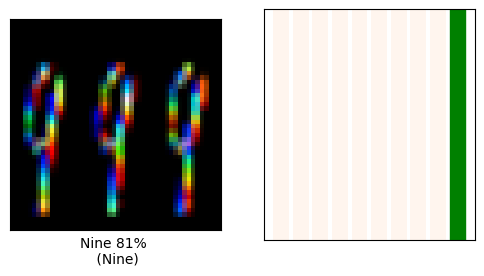

In [ ]:
# Prediction of individual images taken from internet

# call the function

# defining parameters to pass to function
i=random.randrange(1, 10000) # image number 12. You may change value of i for play around
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
# we are passing "val_images_Original" just to show original image instead of "val_images"
# which is preprocessed as VGG16 process and used for prediction.
plot_image(i,predictions, val_image_label, val_images_Original)
plt.subplot(1,2,2)
plot_value_array(i, predictions, val_image_label)
plt.show()

Classification of using Transfer Learning (VGG16)

Predicted, Percentage, (Original)



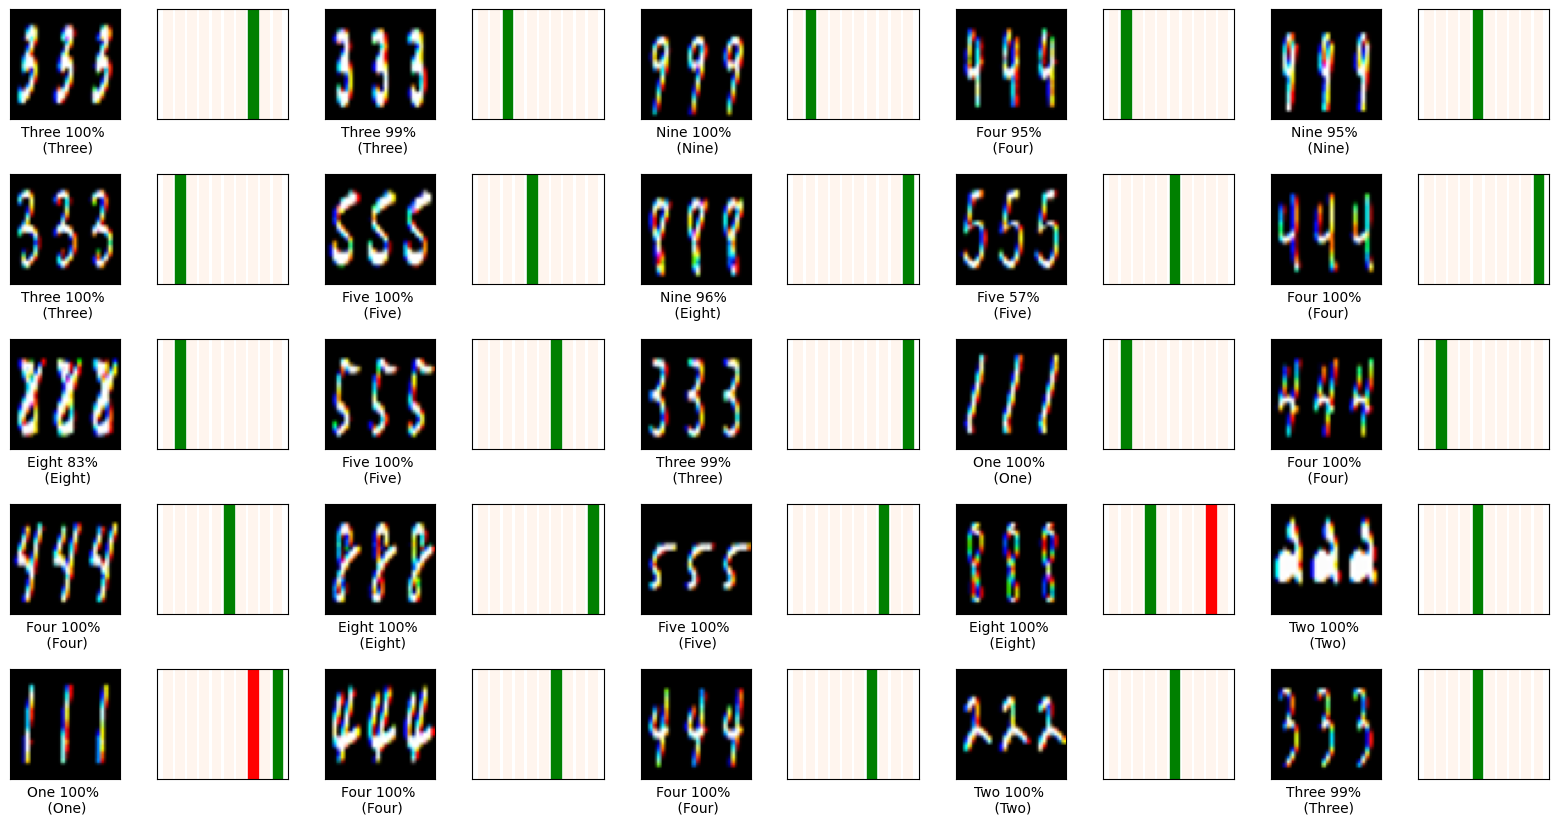

In [ ]:
# Declaring variables
num_rows=5
num_cols=5
num_images=num_rows*num_cols

plt.figure(figsize=(2*2*num_cols,2*num_rows))

print("Classification of using Transfer Learning (VGG16)\n")
print("Predicted, Percentage, (Original)\n")

for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    ii=random.randrange(1,10000)
    # we are passing "val_images_Original" just to show original image instead of "val_images"
    # which is preprocessed as VGG16 process and used for prediction.
    plot_image(ii,predictions, val_image_label, val_images_Original)

    plt.subplot(num_rows, 2*num_cols, 2*i+2)

    plot_value_array(i, predictions, val_image_label)
plt.subplots_adjust(hspace=0.5)
plt.show()

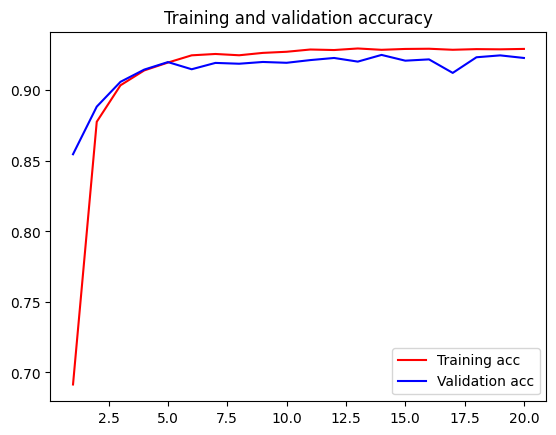

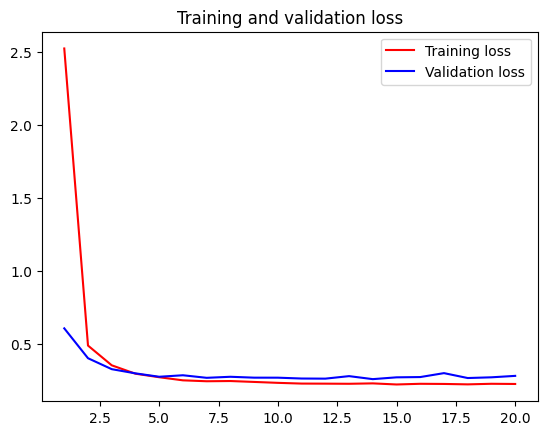

In [ ]:
# plot the loss and accuracy

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')

plt.legend()

plt.show()

In [34]:
from keras.preprocessing.image import ImageDataGenerator
dataset = '/content/test_data'
datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
batch_size = 32
test_generator = datagen.flow_from_directory(
    dataset,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',  # Change this based on your dataset
    shuffle=False
)

Found 635 images belonging to 2 classes.
